In [1]:
import dill
import codecs
import pyautogui
import time
import pyperclip
from pyperiscope import Scope

In [7]:
# comment: Automated step generated with pyPeriscope V2 
payload = '''gASVvBoAAAAAAAB9lCiMBGFyZWGUWJwaAABpVkJPUncwS0dnb0FBQUFOU1VoRVVnQUFBTWdBQUFBOENBSUFBQUNzT1dMR0FBQVR1MGxFUVZSNG5PMWRYMmhjMWJyLzF0cTdEMnFTQ3FLY0pEMzVjMHVkMW5weTJxWTliY0RVaW9KbHVEMHZWK21EZ1FTTEtJNCtxSkMyU2lwdHF0YkN1ZGJiTzYxZUtEVFhnTlNIKzNEa3pxVlNSRHVDbEo2cnRsaGxLTFVrVisyRENOWmJFY25lYTUySGI2L2YvdmFlU1RwSko1bjBNTi9ETUxObjdiVVdzMzd6ZmIvMVc5OWFXNjM5UXljSlUwcFphNVZTUkdTdDVWZWxsREhHOHp4K2cyTFdXdC96UW1PMFVrVEViNVJTV210cmJSQUV2dThiWTdod1ZMOU8xRytNMFZxN2o0U3YwQTMrYUt6UlNnVmg2SHNlVjhobHVGZGMwbHFydFE2Q2dOOGYrdmQzcUdIMU15M1J3NE5FYnN5MDF2eWV4eDdEQ1Nnb3BVSmpyTFhHV211dHB6V2pMUXhEdnAxQllJeUpxdFhLV3NzQTVSWjkzK2QrTUtvWWtmeEtSTVlZcm9yTExQRjlvRTBhQTVRYlFzY1cvcWRzbURRZllHSkFZRnh4blloNHdNSXdCRlpTQ0NBaVJxSG5lV0VZU28vQ2VHV2NoV0ZveVFKVnNpcStnd1FtK0xveFJtbGxqQW10OWJUbURuQUJiaWdNUTlrVzM2NDl6V1hXckZtek1MOWp3MUtXOEZqc2loQlo0TDI0S01JTlFJYnIycmtsMUlZNmlZZ0xXMnM5MytPN2dFdlhFQmtUMzhKWVlRREJhNkpMc2ovU2p5YjZhZXdDL1g0Tm04YTBNWWJkQ2JNaXZzb1h5YUVLYm9tL1lrd1FrZWRDcEhFRkFKZW9kcTNacjBqWXlRb2Rqc25WbEhBOGtUZWlCSkxJWVM1VklmNFBpTHdOcTZQNU11UjVua2R1a0h6ZkIzZmhXSVl5d0FwZnNkWnFoejhBa1pISDVKcUVSNVR1VUlaQ1l5eGppL2srZ0JKNVIwOHJoeWVnbG11R0lVeFRnMk10QXROQUEvN29xVkFvd3haZjU3RkhGUmgreWYxVHppbnlRRUhJZkp6SkhGcXgxbW9kSVF6RW40M1pIbHJoYnFBaHJrMDJ4Q1Z4c1dIMU1nMHF3NU0xRW42TFMyQ1FBQ1lNZkZRRmh6T3RwNElBYUZCQ21DQ0VLcTIwTUZtTUhMSTl6NU1NblVUZ1E2U0RTd01EZzZpUjRtRU5xNWRGODZ5cHFTbjJGa1FFS1NnMXVpb1o3OWdpY1BDVXpYays1UlNtVkdQd0pmQ0ZGT3NYc2NSQVNWZ0R3YWxRaTFhNERLYUgxQWlGaThBMHZCUTdMWExqelIvbDJPTTZKWWx6RUlhZTFrRVFTSllEMms3T0ZTbWxUQmlKVzVKRkVWRVFCT0JiNkJram0ra2QzeGoxMlBXRWI4SGZRR29mRGZKZWQ5T3hldWxDQ1NJUkpvelRVUmJBS3pURzg3eEF5QVNTdWxGU25XS1RYRjVyYmEwaEowMGg2cEh3YmRiRUgxRmhDdTdhS2JUejluTTFyRnFMVk0yVTFpQWxBMmpvUUp2azhscHJUMnRyakZMS2R5eE5KY1Y2Y29Ed2ZBOUt1bXlSSW1SWVFJMGMxWlBka05vSDFGcHlmd2xKdkJxaHNPNFd4VFdlYWtXWGRId1I1ZVE4RVZlTVc4OWhhTW9DVXJpQ1h3bURFQ0tDYk5INU5ndjRRb3dnSjhDaVhVbS9sR0IxZ0RJcWFWZ2RUUU1RR0NlUWFBa0NjbjZJWElqRVJFdzdnUlJJZ2xlVDB6UjRGNnhDbGhQOEZLYjVYc3hicmFrUVhybHdFQVJXNkJlU3F6V3NMdWJMTVFDZGdyZGdrOHQvNUtSSXJBQVNZOUhORGNIUzJDQjRrbHZDNHlBSTcwSkM2MHBGTWNTNElBeXR0VXQ4MzloNGFWd0tiNUJJR3BCYUpCWlA4VlJ5ZlRBbGNzSlZ3Sk5GdkZ1cGtKZW9qZEZKSlluSFcwWTBFMFpROEFRYmt3R1V0Vk55UGc4ZlNaQXRGbGRsdDBtNHVnYXdGb25wRkpJd1grT3ZKWSttNUZLZzVER2UxcDZRQThqeEtxaFFrV0RoYWJCc09YbDA4d0NWb3Vjb1lLMzF0SmJMbElDVS9BL29aSm1HMWRGOEhnYXBLVmlYZnlkMUtVcHlHcXhiRzNjTEFHcGM4cDExcEQ1ZVovUTlHZWswRW1QaWkvSEVVT3BWUUxaY3pFRWxKUERIcjQwbG5icWJMOTBQSnZCeVZVZkdNbmtGb3lpbmJCQXQ1Y3BNTEM5WnNzWXFIWlZmdSs1UExTMUxNeXRYdDdhMi9hNjFQYk55ZFhOenkvbzEvNFNtNFllSXlEQkFGY25PS0xHWVE4a01uL243eVQ3KytPT3hzYkV2di94eVltSmk2ZEtsWFYxZFc3ZHVIUndjdk9PT08rYXYwWnZPZkVSQVhGSWlGWk5FR2hiMExlUHkvcFJTbnRiR1dwZnpFbUdVTXlQQ01PUTNyVzNMdnYyL2lRY2VmRGlUdWFlMWJWbGIrN0s3TS9jME43ZFU3RkFLRXpFNmxkSytCMmNwNXcwU1ZSSm5OYmZ2dnZ0dWFHam96Smt6VFUxTmE5YXNlZUNCQjM3NDRZZlBQdnRzNzk2OUJ3NGNlT1dWVjU1NDRvbjVhUGRtTkI5QkRYU0h2d0RMeG5XZ2lvZ1lOSWc0ek55Tk1TdFhyVzVxYmxtL2ZoTVI5YTdmMU5UY2tsbDVEeEgxOW5UOTVkQi9WTk1oR1ZMNVNvUVlhN1h3VXBBVmxKZ3h3S0hPQjhlNmNPSEN0bTNicmwyN3RuLy8vbHd1SjRXU2l4Y3ZQdlhVVXkrODhNS0ZDeGNPSFRwVTg2WnZSdk5qdllDSWhGZ3EvL3BXckxGSXowUlJ1cWJ4dFA3ci94VGIycFpOMTB6NWd2UjBaa1N5UExDaXRWWkVpcFNOUEZSTTRTczYxNXA3cko5Ly92bXh4eDd6ZmI5WUxHWXltZFMzSzFhcytPQ0REL2JzMlhQNDhPSFZxMWMzL0JheDNNQW1CektWaFVKbDZab2dPb0Z6V2pPZ2ltYXpLb3labmV4WTFCK0tvNTRWS3o5U1RhVXlFYTRtOXZycnIzL3p6VGVIRHg4dVJ4V2I1M243OXUzYnNHSERTeSs5OU9PUFA5YTI5WnZSRXU2S0xmVVI4Nnh5N3NLTGc1N1c0ZldXVUtxZnBpSHNHcEgxWmEwTmpXSGxYWkwzVlBJRnp4aGtHSzJKL2ZycnIrKzg4ODRqanp6eThNTVB6MURNODd5MzNucnJ0OTkrR3hzYnEySHJpODRteDRmNit2cEdpek9YOHVXL241TGJiTmhzMmNKT05ITmsvWjJsOXV0NWlPcGRDQ3NZWUg2NEhleFBDZzJzNE12NjU4TmRuVGx6NXFlZmZ0cTZkZXQxUzY1WXNhSzd1L3ZreVpQUFAvLzhIQnFhSEIvYW5pL05VQ0NUTzNGOG9HTU9OUys4eFR2MUVQTGsxSytpMXNDM3NKZlMxWVc1MmJKcGRBbXpDdmt0b3o5RnA4b2x0MXJaNWN1WGlXanQyclhWRkY2M2J0MG5uM3d5MTZhV3kwaGJLcFdJaUVUMFhUN1hlaGZlL01SNm4xaWV3OFJlVXZVVUNxbHM4V2M2cXo0VVdoc3RXUnFSaVJycnNhSHhmUS95R0FtK0pjRlVXMkQ5OHNzdlJIVFhYWGRWVS9qT08rKzhldlhxM0JycUdCZzVQb0JQN0wreUI0K1A5TSt0dXJxYTFzbU5YMUoza0d2SmxJeUpTM3hmdVlYQ2FnaE45UjVMcVVSaWhYYXIyaWlBSGxxUmd5VnVyd3JvczdKVnExWVIwYmx6NTZvcGZQNzgrYzdPenV1WCswZTNCUG1WMEpHcW8zSXJ5cmpPZUFybllXR09zY0piNzYzSUtBU0dGTVZkZ2dIYzFzWkpYYlV5QnRibm4zOSszWkpoR0o0N2QrN2VlKyt0WWV2U2lxTjlsWGx6Z2xBWFIvdjYrb2JHSjRrbWk2TkRRMzJSRFkyT0Z5Y3JWRHBaSEIrTkN3Mk5WaXhVMGVTZDZSdDlaTW1sYUs4cTA5OFJsWWpJR0xORWJBS3oxdmIyZEtta3VLcVRTZWpyLzloTllFSXF1Z2hRQXNkYWEydGpOWXVjaTRwTGlrMzZjajJBa2hwWXRUOU9GZGJXMW5iZmZmY2RQWHAwYUdobzZkS2xNNVRNNS9QWHJsMGJIQnlzWWV2UytyZGtxVkFvZkZRYzZVK0V4OG5UcDBwRTJTMkppeFBqUThQNVVpYWJ6UzRub2t1RlFpRS9YRGlWb3Y5dXZwQ0pTdzF2djFUTkhHR2lPRG84WE9EcUwxMHFsRXFGNGUxMDhGTVh0MzJNaElSRkNsVlMxZ0wzbW5MUlV5dWx0VDc3eFRjejlLSzNwK3R2NXk1ZnA2dEVSTFIrVFRmRE42WE5DcG5LZWxvSFlWRE8zTkh0bWs4TUR4dzRzSG56NXVIaDRiZmZmbnU2TXFWU2FmLysvUnMzYnJ6Ly92dHIyM3BzL1lPNVRDR2ZSbFlsWEpYeXc2WHN3UlBIK3gxQVJnYkhoN2JuUy9rOTQ1dUJtdUxvOW55SnNnZFBqTGhpWENwUnFMSVY4c2V5QjA5ODZ1N2p5Z3ZIeGdmNytiNG94VVhtWk1JNVlUMkg3MFV5QW4vMFBjLzNQTThkNVREekQxTDlTQnZEeTgwbTFUUjZpTzdKVzl5TmNlaXNzcmtxcmFlbnA3ZTM5OTEzMzMzeXlTY3Jjdk9USjA5dTI3YXRxYW5wK1BIanRXMDZhUjJiSDhvUUZUNlMwWER5OUtrU1pYS0RTWTZmeWNWdzRWc0g5dVV5UktWVHA2T1FOVGwrckVDVVBaZ28xakd3SXlzTFRXdlpIZkkrdm8xS2x5ZWlDN0djYUVWMk1tTkZabE9Sa0JYNEltZDExcHhtZVo1bnlvUlE0MDdua2lWVFJKQUU4YXA1MnN6T25UdlBuajI3WWNPR0V5ZE9iTnk0OGMwMzN6eDkrdlRWcTFjdlhyejQzbnZ2UGY3NDQ0OCsrdWl0dDk3Ni92dnZ0N2UzMTdicGxKVWppM0gxME9ha2d5bTdnSHZkNEZlTW4wVFUyWjJSQ0puR010MnBHVXBudDF5VG1Jd1hvU2thMVBpTUJuS0x6Vk5UVTBpRVF2cWVVc3BZNjR1d05ZTlZQMDJ6MWhKWnJUMFppK0VwbFV2Nlk2YkZuVm15Wkluc1E4MFhvWGZ1M0huMDZOR25uMzc2d0lFRDU4K2YzN1ZyMThqSWlDeHcrKzIzUC92c3N6dDM3bXhwcVp5eVVVdnIyUHhRSmwrS28ySGtyOHBoVk9uZXp1VkVwVXNUazlUZlFST1hTMFJVR080cnpLVWJ5enRuYkhEQ1YwSzV0aTQ5UnJtc0dDV1dkY0ZnNURraUtaOHhuYzEycEZsL1Q1RjBCTWVJenZzYUIwYkFhK3JrOXZ3YnQxMjdkZ0ZWUk5UVDAxTW9GSzVjdWZMVlYxOTkvZlhYdDkxMlcxZFgxNlpObTI2NTVaWWFOanFqSlpFMUcxelI1TVFsU21FaVl1MWxsblpJc3pXZmtvc2tLVTBJWVFYT0xBVXBjbXJUek0xVVA5aU9yY2RyUjNqRDNRT3JRM2E4bkZxQzhsZlozTXkyYTlldUkwZU9BRld3MXRiVzF0YldCeDk4c0NhdHpOWTZCblprODhPTXJPSll2a1RaZzFXdTg3Q1Rpb3hEM3ZJdEkvTWh3SGJHdStubFpjbC81UW9QZkppMTF2YzhQcnZSSnJlZVZyUlpoVUt0dGRieEdyT2M4UkZSYUF5ZlBzSjlZOFVMS2E4VjJkamNiRHBVTFFMcjM1SmxubFg4cUZDSkpsRmwrbDM4cUVCeDhZN081WlNlQjlUTU9xTC9PcGhXU3JpQ01pblpOTGwwZzhDZHcxSERVTWpyZ0VTa1ZLejFtK1FVUVNzVmhpRnZ1dWRGUTBnaENPS3ovU1ZTdG52MzdpTkhqdVJ5dWNXSEtpSWdhM1JhWEJHVjhudkdKYlFtaTZQREJaS3p4LzdCWElhb01KeVdSQ2VMbytNM2pEYWNMUnRGRUNsWjRjemoxS3lRUkJxN1VpbzB4dFA2eXZmZnRrNmZraldya2RaYUs2V05DWlhMY0UvdHpOSHVPSzdRUklkUVlnSUxtamlIM3dLMmUvZnVmRDZmeStWZWUrMjFHNmxuSGkyU1NxZkhWU2FicGZ6MnZsT1o3UEpJK1N3UlVTYTNiMEJxQlB0eXA3Ym5DOFBiQzVtb1hGUXdlM0NrVXFXek1GOHlYK2todERnWVNNNFpNWElwY3ZQbjdHWmp6TXBWOXpZMU5hOWJ2MUVydGJaM1kwdEx5OTJaZTJiVklZZUp4TTVCeU90OHBrMWdqS2NqNXU3T2tZd0tnOHZQK1JkNThjVVhGenVxaUp4VVdpcVRyMkRkZzhkUGJCbmRjNnhRS0JBUlpUTFpoM1lNRHZRbnlWakh3UEVUbmVOangwNFZTZ1dYUzVITjdSZ2N1R0hhcFhyLzJFM2xsTno5OVZPd2s5TkQzbGx2M2U1bjQwNDFuZ29DM21NWU1ocUlXbHZicjF6NTdwLy8vQy90N2I5ZmNmZXE1cGFXM3ZXYnB1dlEralZSZnp6UG41cWFrbkZXcWc5TTh2aEFaWHdMaGNKYSs4YmgvNlRabjVyODhzc3Z2L0hHRzg4ODg4eXJyNzQ2cXhzWDNvcWpmY09GaWdsYTAzK3pnT1pETjlmSncxc1FneEFjbGNpb0lhTFFHTjlSZm82R3hsckR4NU02T0xMcitQNzdiNG5vdjkvL0w1QTJJdUtOWDIzdHkxcmJsdDJkV2RYY0hLTU5lZ2ZPcEV4TkRNa2RJMmlDNkxCdUhMOTJnK1Q5d3c4L2ZPNjU1L2J1M1h0RFArb0NHS3ZtbFZUUVJXSStNdVpTdEYwR3Zpam9pRk1Tak50V0wzbDlpdnZEdDVHSXA1aGpYcnYyLzUvOTc1bS9uZjJVbnlxQUNDdHkyRTBZSmxKYk9mNXljN3dwaU05RnduOUF0amczS3hiblpZNVVjeXVPNVV0RTJSMkxONTNVMTBJV2t1UXB0WHBJWlFTZjM4TnBCZTR3ZDFRTnpDbjNVYnRqL3VKSm5JNjN5Wk5Eand0cXNlQnB4WUowcEs0Wm84Uk9JWVkrZWw3OXBxQ2J5eWJIUi9kY3B1VWcySXM0QTlBbmQ1aU1NUVpxTzVYTjR5U2VJSlpxclFPM2JSV29rbkZUS3hXVURYYnFQVzl1aG1URi9aRlB5RkZpVFRCZWZlTC9RR2o0UEFodXd2Zjl3RWxjLzZCMnFWUW9sU2lUeWUzWWQrTUVlejVOcmV2cG91VE9RY1FVK0JXODRYc0FGQ05PbmtFbG50YXNiL21leDR3ZXp5YUJxa2t5MTFrOHRna1RRQnV2M3JpT2l1VWREdCtlMXRxTHdqUXJ0SmdTS3FYKzlkL0dxUEhJay9xWmorQkN5ZnlUY3RsVERMYkY2RW9RYURjOWxESUVBcGwydTVaTjh2a0FKQ2g1R1VsUzBFdlJLR002Q0FKanJaa0tQRDllcmphTm8yWVdqV2tpNHRFQ2hVOFJlZEFtT0JXYnpEV1FIb3VOYTV0eXA2dkpHOUVLN3dGRTVUaEVSQ2ZQVVpLWlBISm02bmtlSjE3aHVDeGd0UHd2MGJDRk41M0NCTlFnT0JnWm5rZ0VUWWtBaEVYcG5IZ2xNWEM4TFRVOUpIQW1ZNjE0OEJpSkRSRkt4UXM3YURybVo5YUc0dGwzMGhySEdOWGRFazhrVEdXcDh4c1pzUENWZk9xT2RTc3FRQjRYQzVNSlZaUVVYYVVvQU9qSWhCeW55aVo4cEd5QytSeDZpSWdKY2FSaGRUUXRoNDNFSXFCMUNhVnk5WkRFb1ZtUzEwdDJMNWZxckRnaVJva3RHem81aTVSaExtV3BZbEo2SUNLVFBPRlNQcnR3d1gvSmhpVXNzV2dEcHFXVHUvbGtncktreGpMd2FmYzBIaUJQQ2RraU5iV1VMRnQ3R25NOStXaFdiaUlNZzlRRE1oQ0ZqVHM3Q2NCRnlZYkhxcnZGY3pvTU9ZbnNPZWxPcUV5SklNR1p3akRrQi9KUVVuQ1N2b1NTcDVoR01rUVFtakN4SVpZRWZKWFNPR3JibEowMktOdXk0bHp1aHNlcXV5WFNacFNRSWlYWmtwaFRJclJKL0dGQ0ozMlZaZlhCY1dxWjlNeVZTeEVmajZMQXVvME1oVlF1Z0NuRkdoamZ4ZnhNVG1rYlZrZUxZeHpvUzdrc1pFUytPZUtkNUVsZ1l4aDFUQko5RjU3WUpDR0RkK1N2Y0R1Sk03ZjVJcHlmUEozYldvdURqYVNETkZWczdtallmQnU4aWNLanZ4Q001SHF6RmFvM3VlVTVob2dSTzZReHVseUo3MWFPNWNYVVZNQkxQb0dIdThVWHRkWkt4WHE2TEtQZGliZnlrZU9wTU4yd09scjh1Q3o0QnN3VDRUOUFmZUFiNUd4UnhrUUdoTzllQS9GMFFnbmZxTzJ5SjlSUmN2WUhsOGJWeWhrQXQraDVXdEsrMUJTaFlYVTBMUWRETzBzUkxMeVNvT0hJUk1Db2d3TUY3dUc4WEJLaE0wWEZLTG1ZSStPajcvdEFvUlVKMDBBTXR4V0dNVVdUM3E1QjN1dHVQdHlKY1FmL2svTk1mRjVlUmVGQXVnUXBkNUhUc2JUV0ljNzdjN00ycWFQQ1hjazM3Q1p4cXFCMUtkSEtKU1duUkRKS0hobFNIZ2UvK09LTGhmZ1ZHMVptOFNGQkdINXlZVEdLYTc2UDBxRHpHSElTenpnaE1jeXFUTGMwSW4wVWhibGFZTWk2SFJ6YVpZbnhMYndWdStLOVdCekVreEFaZnd2ejh6VnNPdnM3TnNrOStZcmROUHNBQUFBQVNVVk9SSzVDWUlJPZSMDWNsZWFuX3ByZXZpZXeUWEzwAQBpVkJPUncwS0dnb0FBQUFOU1VoRVVnQUFBb0FBQUFLQUNBSUFBQUNEcjE1MEFBRUFBRWxFUVZSNG5PeWRkNXhWMWJYNDF5Nm4zajR6REVNSEFTczJOSlpZc0dISEVodjI5R2RlVEl5SmVhYS9aNTYvbDZJcHByNW9YcUtKSlZZUUVRdUNEUVZSc2FLQ1VvYzI3Zlo3Nmk2L1A4N01aWUFCQmh5bXNiK2ZqM2puM24zUDJtZmZzODg2YSsyMTEwSVBQS1liaGtFcHBkU3c3VnFLNHhzMk9xdFg1Wll1WGQvU0xGdGJvRmlDWk1xd3paU2RTQ09namhPMnRyVzF0V1RIakQ1bzVjZXROVFUxUVJBRVFRQUtoVUtoMkFOSUtTV0FkOWo0eW5uSCtNY2NJQW5XbDY2SnpWcG92Zm9CRGhoQ3FLODdxTmhOcUdHSE1kdXl6Vm9ockhLQmJOaVErMlJaODVyVmhiWTJxV21KbXBST0lUQ01PS1VtTU9MNUl0Zm1sL0xNZDBHSXZ1NjdRcUZRREdxa2xNTFF2TWtUS3RPTzhTZFBBQUJqeVNleFdRdk4xNWRqTGhCQ29MVHZRSVltRXhsRGp4T2NjRXBvN2FyYysrOXRXckhjYldzRlRkZUdEeDlHTlZ1d0xLTEUwRFVoR2VlQlFUVUNGRWtRcksvN3JsQU1Jc1JlK1VpTE1lN3JMdlJIcEpSU3luRFVFUGVrUTl5VERtV2o2eEhqNXFzZnhHWXRNdDllZ1FDVTZoMGNVSjNVZVJYSTUwcU5qWlVWeS9KclZybVZFaENpeGV5aHRwWGhBbkVHU0RDcFV4Qk1jaVk0Y09aTENWTDJkZDhWaWtHQjQ3aWNNMHlNdnU1SUh5QzREd0NKUktLdk85SmZrRklLUy9jbVQzUk9POXcvWXFJMGRkSldqRDIrMEpyM2x2SGhXb1NRY2pnUEptaGJrMTdJTytzYWk2dFc1Vm8yY2M4aG1oNmp1cTNyRnVNeUNEek9lZUFHUWtnRUlFSWhtR3VaUEpGQ3c0ZVR4clY5M1gyRllpQWpwUVFBemxsaXlGRjkzWmMrd3krdmNaeFd5N0wyWnRYU2J2S09xWGRQT3RTZGNnZ2JOUVF4cmk5ZFk4MTd5M3oxQTFLb0lJU1E4aFlNT3VqeXBTWEhEVnBhdzBJVytSNlZZRW5RT0dObHA0aUl3SmpvQnZIY3dITUZKVHBHaUxHU2FiSDZZYkVSb3pLd3FLbXYrNjlRREZRaTdTdWxSR2l2dnJFYThUR2xscVpvTlBaQ0hSeVp2TzZSKzdxblRmWW5UNUNHUmxvS3NSbXZXUFBmTnBhdGEvYzJLOVU3U0tITFB5eGlUSVBRRWlFU0xQUjl4bmpJQkpkU2hMeG8yemFsRkZCSU1iVU1YZE0xUDhnYWxxd2ZTbXJyekI3c0IwSkk5cUpUZTNDTDZ3NkRld1Q2dnpqWmlhMCtxc2trRVVKdDJVTDBaeWFUSkFTM3R1YWo3MDArYlAvUFgzVnVHTEkxYXpjV1M1WEdkYzN6WDN4OTU4S2wvTnBYTHBvd1lmUk4zLy90L3Z1T3ZlVENVMi81MlYrN3FlMGlyNmVVNGhlMzN2RGRIL3dXSVF3Z1R6djVNOWQ5K2VKTHIvNis0T0x6VjA5YnMzYmoyREhEMWpZMnRYZEd5cTk4OFlJRnI3eDEzcmtuUGZQY3duZmYvMFJLMlBFUVZUL0ZHUGZ6MzY1SHhFVS9mVEN1d1QzcEVHL0tJV3hFSFdKY2YyKzFOVytKdGVnakhKbTh2Zkk0MHY4bnl5QVdSNXMyVmd3clJnbGxUSGQ5djF4eHBRU2lJUzVrV0hhNWNHT1d6YVdqR1NTUnhFU1RKVGMwYlc0bndiSzYrMURXVTBQUXplTU1ZbkhSaE94T3M1N3FVaStMNjI4RHZvZkV5UzNacXFVUThudmZ1ZVpYdjd1dnRTMWZXNU82NllhcmZ2bWJmMVMvZVBTUkI4eWQ5OHFNV2ZPbUhEZjVoOS83V210YkxwL1BYMzNGTkFENDE4UFBURGxoY2pxVmVPR2xOMXZhY2wrNCtqek8rVFBQTFhycTJWZWw1RUt5ZkM1LzVtbEhyMXF6bm5OMjN0bkhuWFRpWnl6TC9NV3Y3NTUrOFJrYUpVT0daTlp2YUI0eGZPZ0REejBkaEdIMDlhZm5Mc3ptQ2xkZmZrNCtYOFJJU3NrUndsS0lFNDQ3N0lXWEYwODk1VE5QejMzMTBzK2Qxcmh1L2FpUkk1cGIybzZjdkg4NmxYaHUvcUpNT29Fd2w1SmZlZGtaMTE1NTdvc3Z2emx6OW9zQTI5VW9uUWRubHdiejB6ZnJrZU4wYzdKRXZ6aVBtZDZSRTkzVEp2dUhqWmVHUnByejhVZGZ0dWEvclgrOEFVV1BJRHN6ZWRYY0hCemlLR0FhaEx6aWxFcEZ2K3lFZ0pCcG1xYXBoeUtRNEFzdXVIVGlTWWluQk5ZS1ZDZTZ4YWtGaWFTaEc2U2I4cnJUNlo1cU03akY5Y011S1hHNzNTYTZGMjhiL0p3dmxHNi80OTZiYnJqcTd2dG1mLzdLYzIvLzNiM1pYTEg2bmZ2K05mdnFLODc5Zi8vMXpWY1h2dm5RbzNOV3Jtbzg3OXdwdjdqOXpsS3A4cTF2WHUzNzdORVpUNy8yeHRMLy9mMVA4dmxDR0xKSkIrNHo1K2tGRWlSSXVXanhXOGNlUFhsdDQzck8yY0pGYjNFZW5qemw2QVAzR3lVRWUvTHBsdzdjZjN5cFhGbTRhTW1rQThjZWZ0aEIwZGYzbXppcXR1YmcvL2Z6UHd2Qi8rTTdYNDdPSWhZejR6SHJMM2M5OC9YcnJuN3FtWmNlZnV5cGo1WjlzdCsrNHo5WnNlYllZeVkvT3VQcFJhKy9OL253L1RsalVvZ25ucHkzWU9IYnY3ajFwaG16bmtkNHV6Y05JVVFVRWQwZFgzU2YvM2E3MmliNlZCQWNqaDNxVGpuRW5YSUlIMWFEUXFhL3U4cDY3aTN6dFE5SnljVVlRL2ZVYWpmYjlPQ2hsTGc5Skk1NnZxQlVDSTVsdE1hUE1NWVVFTEZOUzlOTnhsMHV2VmdNRFIxdVo5SUpUU2RHb3F6cEtKSFNHRmY3a0JTS1hhYXo3U3VFNkhMM1VXdGIvdlk3N3YzT042LzgxZS91NjNBK0F3QUFRa2RNbnZUZ3c4OXNhbTc1MlU5dldMRnFuWWcySkNBRUNMRXdCQ2s5UHdRSkxTMXR2Ly9UUFg3QXhvMGRMU0dhOEFnQXpabzliOXJaVTZRVTMvejZsVysrdFhURnlqVlNjcEF5Q0FMT09lZUNjODQ1YjI1dS9jT2YvK0VIYk9Ud29WZE1QdzhoakRDMDI2OVNublg2WnljZE9QR0c2Njg1L3JOSEpwTXhBRVFJcmFwTXp3OFI0UFkvRUFCZ2duQzAxb2xndXdvNEdwRElPQmcwSzhIdGVsZW53Y1FSM2xINytaL1pqNDBkS2lraG0zTHhoMTZ5bm45Ylg3RlJyZkx1elZBSmhwQUVVeHlMRVVvMXppVkdDQ05wR1hZOFpiZ2V5aFU4WWtBOFJlc2FiR3BJcENjd3dacUpLNFZLWDNkZW9SaW9kTmJCWFRab2JjdC8vei8vdU8zN2dvdWYvUEJybnVldldyVjI1Y3JHYzg0NDhkSEhuL3Z1alY4RWdQdnVmL3lrazQ0R2hCQW1NMlk5ZC9OTjEya2FmZnlKNXhHczdsaUJSVzhzK2VDMFV6OHJPRnUxdXZFelIweEtweEtyVnpkS0tRRndwS1VsZ0pSeXh1UFBSbDkvNkpHblpzMmUvNzN2ZmptWEt6TEdBRUJLZnN4UkIxOXg3YmZYYjJpNjVxb0xUenY1cUJXcjFrMDc1K1M1OHhhZWZlYUpoV0lsNm9DSWRJK1FaMHc5L29MelRwMy93bXVYWDNxRzU3T2FUSEw5eHBieFkwY3MvWERsUzYrOFZYVktWOGNCWXp6UTFYRDdMeHUzZ2dOR2VVZnQ3eDh4a1kyc0E0Und0bVMrc3RSODlRTno4VEpTOGRSZVhnV2FldklJUU1JMDlVVGNscEpYaWlYWGRRR2g0Y09ISmRJeFB5aHVhRjVSTzlRYVBqcFROelNHS0N1VnNnQWdKT1Ezalhudzd2VXFGYVZDc1V0VURkOEl6amtBaXRjZDJiM3ZDc0VESVppVUFxbzNiNFE2ZHVValFJQ3hoakFSSXBTY0FVSVlhNWhvSUFYbklRQWdoQVVQcEJDQVFJSkVnQkRDZ0ZEblNHd3BKWXF5SHlLRUVKRlNnQlJTU29RdzBRd0FKRmdBSUFFaEtRVWdCQkpBaW81dklrSjBRRWdLRGxJS3lVRUtRQmdoaEJIcHJHOFFJZ2kzMjgybGxzV0VFRUlJeGpoU3dBTnh3MnY3K200NjVoK3lqMy8wL3Y1aDQzbDlHZ0RJcHB6eDlpZm1vby8wOTFhUm9qTVFUMDJ4aDZDSEhYcXk0eFlOWFRZMHBDMERsWXE1Y3Jrc3BXeG9HQkZMR0dXdm5LcXhhWXhwUmxDb1ZMd2doMmtnaFJCY0Q5bmVtTGhIb2VoQnFuN1hiclpIQ0dHc0lVUWtTSVFRU0FSSUFrQzdqemxhT1VVWUlVQklsNGdDQUVJWUlRUkFDRUdBb2pkSWg4S1dIZDlDVzRaSHRZZnB0aDhSZ1JSU2drUUlSM3FhVUFPaXIwZ0JJRUdDUkJJa3lNak5IUzMwSWlJQk1BaVFzbDFFOVRtaFhTcnVmTjVkeHFNTkNLS2VzNkZwLzdBSjNqSDdCd2VQRTZrWVNFblhOc2NlVzJDKzlwSHhVU055L0hhOXExek5pazdRdFkzWjVwYjF2cGV0emVpWnRJNVFpQ1ZvbXNsOGJzWnNMZ1BQNDRZdXNBbVNpNUF6em53cEFDVG12Sy83cmxEc2RTQ0V5UTVXVWp1MUEwUTZOVU9BRUtrZW9sdVNPcjhtMi9tc2VzeXV2bzhBWU11dURpYkRMM3BlQ0VmVytVZnU2eDIxWDNEZ2FHbWJpSEc2WW1Qc2lVWEc0bVg2aWcwNDVLQ1dlQWM3M1ltL2F5ZWFBQmhKaklGZ1NURDk2S1BWYmEwYlhUZVhUTUN3QnFNdUU3Y01reExwbGppaXVPS1hHWGF0V2pGMFZNSktBcUk2OHdJQXpFUEsrQ0NhVEFxRlFyRkRvanVwQk9BSkt4dzdOSmcwemo5cXYzRGlDS2xUNUFYNnNuWEdheDhaYnl6WDF6WWowZUhWR0V4UEhBT2Y3bXdTMi94SEZKRk9NR0FFR0V0S0pFYVNFdENJMUtqVUtHaEU2cHJVcWRTcDFEV3BhOUtnWUVRdk92NDFhSHNiUTRQb2hVYWxSa0NqVWlPU1VycHFaU1BqanFHQnBwTkVJbFZiVTZOUkhQbzhueTk3Z2QrU2J3MlJzQXRnSmdnMUROQU1oQUpDS0FnY1NuVnRLUlE5Z3F5eG0vdTZEMzFKcWE4N3NEM2FJK1VvWWZXcGNQenc4SURSd1g2ajJKaDZrWW9CQUM0NXhwS1BqVVVmR205OW9tM01vZXJ1S2FWM1B6VzdZRlpDNVBCQkVpUEFDQWlXaEVpTXBFYUJFcW1SU08yQjNxRUxPelNpMURXbzZzak5palA2aUlKR08vUmwrM0dBRUVrd0VBd0VTNHhneHpGMFVRK0ZSRUlBRjRnTFlCeHhBU0ZESVVkK2lNb3VDaG10ZUs1dW9GalNySzFMMjNHNzdKWURwOElacDhRTWc0cEdKVUlRT0ZBdUJ1bDBDaVJJN25BcEVFRkU2NUZ4VmlnVTZvN2RYNURWTkZXMkVZNnNDL1lkR1I0NE9wZzRrZytya1lZR0FMam8wTVptL2JrbDJnZHI5YVZyYUZ1eGZYRjNMLzRKZDFOWkVnd0VDNHlBRUtrUm9PMlc1V2JsMTZFbTIxOUVScVRSV1UyMksxVFEyNy9ZZmh4S2dFVC9Zc0NvbThvU2NRRkNBaGVJYytBQ01RNGhSeUhEcmc4aFIwR0lBb1lDaG9JUUJTSHlHZmpSaTQ1L2ZkYmV4ZzhoZWhFeUZQSjJqY3NZTUlHRkFDNkFDeVFrU0FsUzBuMG1EZy84aW0yTFdOeGtqR1Z6elZqd3VwcTYrdnBoeFZLcE9kZGE4b3VTU0pPYXVtNGF0czdLWlM0Q3h2amVXVDFOb1ZBTU1xcStaVmFUWU9NYWdnTkdCZnVQWnVNYWVGMFNFQUl1U0V2QmVQTmovWU0xMnJKR2JYVVRLVGpSdlh3Z0x1NStPbVdKZ1dKSk96bFJJMzFadFIxMVRScTBrelhaeWNUczVLM2R3b3RMU1dTenRpdExndHZsYnIrTElDVVNjZ3RsR1RKZ0hJVWNWM3dVTWdnNmRHR0hSa1JCQ0ZVZHVWbGx0dXRVQ0ZtSHZtdy9EbkNPaGR4S1dXNDVNRHQ2M3VwV1dDVkNnQkRkLzZDRzFwYU5ncnVtaFNnQmhBalZqSGlpcmpZem5JdG1rc3NEbDhRQWhBTk5aNW5hQkVPSmNxVWNoajVDZE9jeUZBcUZvdDlRVlREUkppdHA2YXd1RlU0Y0hodzRKdHgzSkJzMVJNUk1BRUJ1UU5lM0dxOHYwejljcXkxZnAyM0lJaStJN3FxOVp1enV4b0psNStnZVNiQ2twTjBIcTFIb01DN2IvYXQ2aDk5MTY5VktUUm9VcXNwUzA2Uk9RS09TRXRDb0pCaG91eHRXWXR5ZWJhVTd5cEozdUdFNVJ5RUh4bEhJY01YZHJQdzYxR1Q3aThpSXJPckk2a2RCdU5rWWpTeFV4bEdIR2dZaDk2aXkzSG16WFljT0g1V2tlcVZjWUxySjQ1WnBHME93eEhaTWMvMjg1NWU0Y0N3YkUxdTRicUZZcEVNYVl2WDF0YUtKQllGazNWc0Q3bWJPVW96eFRrM3FIc3pJMmgxeDNleVNFdGZMNHJwekdmUlBjUU4wbTAwdjA1MGJZbmNHUEtKOWR4UEczTlpGT3M3cjA3eWhoZzJyNGNOcVdFT05xRTJJZEZ4U0FsTGlYRmxidms3N2NLMytVYU8yWWlOdEt3SVhrWHNaWXl5MmIrbDJ6cDNaNVUvYytVMkVrQVFBakNUYWpsbEp5YzU5c0ZYMXVjMkNaYnZHcFJSb2gxblpuUVZMQUpBU2hFUXlVcFljTVFHTW84Z2NaQXc3UGdvWkNyWTBMbjJHT3JsaE41dVluYnkxa1JjWGhheGRXUXE1V1ZueTlyM2puUWRuaTRIYVpqQzN1amE2bmxOYm5tay92eFZRdzBTSnBNNUM2UVU1M3d1WTd6TWZtbHBBY0JBQ2lBWjE5WFlBYnJuQW1qWTJEUm1hSERhcU5wRTB3MUFXUzkxU3dOMjg2WFJuT3ZWZ1ZzL3VpT3VwTGlseFBTdXVPODBHcnJpOWtHb1c2SWp1Ykl6ZWFzQTcyN1dTRW1HYnZDWXU2cEs4UHMzcTA2STJLZEp4RVROQnB5QmtaSEpoeDllWHI4TzVFbWt0MHZXdFpGTVc1eW9vQ0RlTDd2QytDb3c1UnFCclcyaEtTclplcmV5a0drR24yd25xcVZxV0hkN1gzVE1ycXd1V1FpRFdhY0dTZFVUM2JGYVREUHdRaGF6RG11eTBXdW1IS0dCUTFaY2hRMEcwWU1uYVZhK1FpUEgyTUNJaHE2STdocWNuek1vZG51bE9EeklJYmdYMC9ROWVwd1Ewd2t5YkV4eElEcllPcWFTVlNkZFNYVE1NVTdPTk5ldldmTHd5bDgvQit2VnJZa211NnpDa0xpM0xzZTUwV3FGUURDRFM2ZlFOTjl5QU1TYUUvT01mLzFpK2ZQbXVIa0ZLT1gzNjlQWHIxeTlZc0dDbmpRdUZnaE0zMEltSEdvdVhNY2FpKzFlWG1iRGF6VGlNSkNEQWFMTVJpUkVRSW5RTk5BSWFrUWdEUVJJaFhISlIyYU5ybWdCSHRtQjdRR3hId0U2N2FtVERhc0l4UXp0VVp2djduU0pnQ1ZRMTdtNXB5czBLYkN1ek10eWhXUmwyQ3ZQcDBnY2I4dDVlc056eHlTcDJDOXJVbEs4ZkNrUHFVM1VaT3hhM1RZM0ZUSnBJMmlPR05SRE5rSUo0akNNampmUktvUnhRRW1SejY1S3BWQ0llYzJJOVdROVlvVkQwT1ZMS0N5KzhjT0hDaGJObXpSby9mdncrKyt5ajYvcjA2ZE01NXkrODhFSkxTOHVsbDE0S0FETm56anoyMkdNcHBYVjFkUnMzYmh3MmJOaU1HVFBDTUx6c3NzczQ1ODgrKyt5MGFkTmFXMXNQUGZUUVpESzVZTUdDS1ZPbTNIWFhYUk1tVE5odnYvMys3Ly8rcjNySEQ0S2d0Ty93MXQ5Y0J3REk5WWROKzBucHlJbklOc0hTd1RMQjFEcTVWVHNNUjcxVG9Dd2xWVk95ZmIyVEVxQllFZ3lFdEMrSTdsUk53bmJpZWhpUGxDV0VJYTU0N1g3VUxxTjdPcFl0MnczTnlPNk1kR1FRUmk1Y0ZQTG9nSmlManRYS1hUWXJ1OU9nL1dTVnBod2cwRXdkREI5bDdqTW1NN1ErVmovVVRDYzBLVjBXVkV5cm9tdkNEMEV5UG55VW1SazZyclVsbXl0bGhRaFlVQko2ZXFCRi95a1VpcDBnaEtpdnIzL2lpU2NPUC96d2FkT21GUXFGTVdQR0ZBb0Z4dGo0OGVPUE9PS0lPKzY0bzF3dVgzZmRkVUVRUFB2c3MvdnV1MitsVWxtOGVQRysrKzU3eUNHSFJDM0hqUnMzYytiTWxTdFhIblhVVWJObXpYcnJyYmN3eHFlY2NzcUlFU1B1dmZmZXpoNW0zL2ZMRjU4UXZaYVd3UnN5NWVsVDVOQWFpSmxnR2FCMWhIbFdUY2xvaGJKakhiRjliMldrMkJ3L0N1MXB0eWxEdG9VYk5ySXN3MDVya3dHcnZtNWZvWXcyamZCdGJFb3BRZXlhVGRtZEJsR2p6ZjhxOWtyb0tXZlVwek9KK3RxRVplQjBXa1BjOTd4S0pjaFdBb2t3MGpTZGNjRVJzMU94RWJaQldyUlNnV3NJbVZUVGlZcUNWaWdHRlZMS0RSczJISG5ra2JObnp6WU00NGdqam1ocGFibnp6anNaWXcwTkRSZGZmSEhrR1E3RFVFb1pCRUZVVENLaWM4dWpqam9xT21BUUJCampaNTU1NXBaYmJtR01OVFkyVXJyNXZxSHJ1ajEzaVhmY1FaRnNzaWtYZitoRlRBZ0NoS05sVGhaWm9nd3hnVGlYa1l1VkN4VGwwRzVQZ3kwUlFMdWxLNkZkTVVjTG9veWhhakxJcnVodUZtNWxVeXIyREhUc2hGak0wblF0OUp4U3JnQmg0SWFlNTdnbFhjTVNDY3N5T0pLdUc2QWdUM1REc0Rnd1NzQU9QT0ZVM0w3dXZFS2g2RWtRUXZmZGQ5L05OOTk4d2drblNDbC8rY3RmRGgwNjlNWWJiNlNVenB3NWMvYnMyZGRmZnowQVBQVFFROGNmZi96bWJUa0FBREI3OXV5bzVlT1BQNzU2OWVxcFU2Y1dpMFVBd0JoVFNuM2ZYN0prU1ZUcHFDck9NSXo0b28vd0RYOE9EaDRibS9rcVk4eDY5VU9NTWNLNFBjK2ZxVXZiRUhHYjE4UkZNaVpTTVpHS2lYUmNwR3lSakltRUxXS210SFRRcVNSNEN4MHBCQW81TGxTMFR6Ym9TMWZySDZ5bHE1dEkyZDJxendwRjM0TCs4VXl0cnVzZ1pERlh4TzMxU2lUam5xbnBUUHFtYVNBTktvN3ZCcURyZ0tYQjNSajNFcm1zM0xDMlljWkRhMVE1UW9WaWwraGNqakN5SFJGQ1k4YU02ZXQrQVFCSUtSbGpqTEhJVVl3eHJ0WnJpcFJXTlVnS3RsRmpYYmFrbEJKQ1RqbmxsT09PTys2blAvMXBkTXl0aERMR05tM2FKS1dNSXIrNkxFZllPWEMwL1RWQ2ttRFFLVGMwR1RORjNCSkpXeVp0bm95SmxCMnBhajY4bG8yb2s0WUdVdUo4UlZ1NVVWKzZSdjlnamJaeUk4bFhOaWZUVUNqNkNOcmExbVpaaUNETjkwUExTdWhVMTZrbUpNTllCbHduRkZHZFNxUWp6ZU5jOElBRUhuR0x2S1hKS1JhY3Z1NjhRcUhvU1JCQ2xOSkk3d0pBcEN3alZWcFZ4dEFScGJ6VmR6dC9DaDI3aVNMbXpwMzc5Tk5QUjBmZVZpaWxsREhXNVVlZE85YkZheUhCQzRrWFFzR0JiWGFKU0NtQjRMQStIVTRjRVV3YUd4NHdPamhnbEgvRVJBREFKWmV1YWRJL1dLc3ZYYTE5c29HMkZsR25uaXNVdlFZbENDUUhqS21tVWROSWdNUmhDSDdBZEoyR1hJWWh4d3daUnRxMmlPZUdaVDhzRjJVNUZ6cGxBVklsZzFZb0Joc0lJVUsycUNHNFk5VzRVNlNVa1YyN2xmKzV4OWsyU3dOSU1KcnkrcVpjN09YM0pRQ3JUWVFUaGdjSGpRME9ITTNHTmdTVHhnS2NpTnlBTnJib0g2M1YzMSt0ZmJ5ZWJzb2h4cnQ4d2xBb2VoeHEyNVJ6NEJ3aDBKQTBIU2NvWkl1NVFxRzJyZ1lSeVFVWHdFMWJqOFZqbkptY002ZVN5eGY4a0d1NllmVjE1eFVLUlgrbno1Vlp1OE1jUU0rV3RkZVcyYTh0azFMeVZDd2MxeEFjTkNZNGNBd2JQNnd5N1pqS2VjZWlnSkVOYmZxeVJuM3BHbTFabzdhK0RmbGhuL2RmTVlpaEdGT240Z0hEdW1ZaU1BT1B0YmI0R3pkQjRCYmo2UVFtbXV0NlFKeDRRcmVzT0FZRHBPczRaYytSdHFuMklTa1Vpb0ZFZGZVYWwxejZ6a3JyblpWU1NoRzN3dEZEZ2dOR0I1UEdoaE5HT0ZNbk8yY2NDVnpRcHB6MjhYcDk2UnJ0dzdYNjJtYmsrRW9aSzNvV0NvaHlnYmlRSnRVMXc1TElkNE9nV0laUXNoRmFZTnUyNHdrdktBWUIxTlRweVZnYzY1clBXTmxuaFByZGxOSE5ITTQ5MVFaNktLdW5FamZveFhVbnQxd3ZpMU4waHg2NW5LSUdHR1BzK1BTamRlYUhqZkxSQmRMVXd4RzF3UUdqZzRQR2h2dU45STQ3eUoxeUNFaEpXb3ZhaWczNjBqWEc2OHYwbFp0UWx4N3ZRVDFaZWxsY1A1eWJlMEljTFhsY2Fqb1RVUFFjNU9SaU5iR0cwVU1EMkZnc1FzV3ZJTXFvQVNZbG1ETEd5NjVQZE5zYVBuWjBjM01lZkxiVEhrZjBWQTduSHN3RnJjUXBjZjFUbktJNzdJbmZ0OTI2RFJoWjFXU3MzQ1JudnlZMXlob3l3WDZqZ2tsand2MUgrWWVOOTQ0NUFGMXptdjdPU252ZVc4YWlqMGpaclM2UTk4L0xTWW5yNStJb0IrQVNDU1JEWUFFTEFCR2lJU3VHQlloNFVvdkhZMXd3My9NeGxnZ3poRGsyVEdwcWhvMlpLZ2VzVUNnR0krM0ttQXV5dmsxZjF3cnozcElZc1NHcDRJRFI3cW1IKzRlTjk0L2NselRuclpmZnMrYS9yWCs4WVZ1RFdLSG9EclFqTTV4a2pMbXVLemhDU05xMlNVbVF6aVFUaVZnWXNBcEJRY0FrTU1ZRFNrMU54NFpsU0kvcy9QQUtoV0xYd1JqYnRqMzQ3dWxTU3NkeHVsbEpzSi9Rdm13c1FXOHVhRTN2MnMrL0U0d2Q2cDU4cURmbGtQSkZKMVRPLzZ6KzNtcHIzaEp6NFllazZLaEZZc1V1MFo0V0RpSEVPWE5DSnd5WjVJaFFaQkxETWczTE5BbngvUUI1ZnVBSGpJZUlhSm9RSEdFaFlDRE5Jb1ZpQUdIYmRyRllISHo1YlhSZFR5YVQ1WEs1cnp1eW0wVDYxVnpiWXR3OVZ6ejRvbnZrdnU2cGgvdEhUUFFQSDA5YUN1WXI3MXZ6M2phV3JWTUdzYUtiVUJZS2hJamdrbk1aQm00WU1nSlVTSWt4QXBBU09JQUE0RUtFWVFBK0NCSmd6eE1oQzRYbzdocXdRcUhZSlJCQ2cwLzdBa0FRQklORE15R0VpQmZHWG43ZmZ1bTljSFM5ZTlJaDdrbUhWaTQ0cmpMdFdIM3BHbnZlVythclMwbStvZ3hpeFk2aHZoOGlKRGdEenJuZ0lBUnJyMFF0Z1RFV2hJSHM4QmR4QVlLRkFaUURobjNPQlBDKzdicENzVGNncGZ6eWw3ODhhZEtrVXFuMDNudnZqUmd4WXQ2OGVlKzk5MTZYTGErNjZxcDE2OWE5OU5KTEt1YXJGNGowcTdHdVZmL252TVRETDNtVEp6cW5IZTRmc1cvK2tISGsycW5tSzB1dGVXOFpIemFpVGdXZ0ZJck8wQ0NVQUF3RWxpSjZXaU1TTUlERUdBc2hHT2NJQWRXcFpoaGMrQUVBNTB3Z0RGaGdvaTRwaFdLUEUrV09uakZqeHJ4NTh3RGdwcHR1WW93ZGNzZ2hWMXh4QlFBOCt1aWpkWFYxeHg5L3ZHVlp0OTkrK3dVWFhKRFA1MTk4OGNXKzd2WGVCVUtJK014KzlRUHJsYVhoeURwM3lpSHVTWWRXcGgxVE9lY28vY08xMXJ5M3pWZVcwbXhKR2NTS3JjQkNBR2ZBbVpRQ0k5QVEwaEFpQ0JHTXFVUUlBR05FcVdib3VxSHBCcVVhb3Bob2hGQ0VpVXJFb1ZEc2NhSWN5K2VmZi83Ly9NLy9mUGF6bjQzMDhibm5udnZyWC8vNmxsdHVPZTIwMDE1NzdiVVhYbmloVXFsTW5EanhzY2NldStlZWUvcFZsTk0zdi9uTjZNWE5OOS9jdHozWjB5Q0VNTWJHaG16cS91ZnJyLzlEelkvdnRsNStQeHpYVVBqbUJTMS91U0YzNCtlOFNXTUZVaHZTRkp1aG1Cb3NGSXlGUWtnQ2toQmduSWVNc1ZBZ1RNRUpOVVB6UEFiSTREeGtRa2dBaVlRUUVtSDFLS2RROUJJelpzeVlQMzgrQUJ4NzdMR2M4K3BObkhOKzNYWFh2ZlhXV3l0WHJpU0VSRHFnWDVsWkN4Y3UvT1kzdjJsWjFwdzVjL3E2TDcwRVFvaUUzSDV0bWJYb28zQjRqWGZpSWU3Smh6cG5IK1djOVJuOW8wWnIvdHZtZ3ZkcGExRVp4QXFLRWNXWUEwYkFSY2lsNzNzOGxFeEluNFFja0dtYWhnVGZZMXpJSUpSY1lNWTRrNWhMa0tGYUExWW9lb05JM1JKQ2hCQnIxNjQ5OGNRVEgzLzg4Vzk5NjFzQThPQ0REeDUwMEVGSEhIRkVLcFZhdTNidHFsV3JMcnp3d3NXTEYzdWUxOGVkN3VEMTExOEhBTS96dWx5M0hzUzByeEJ2eXVzUHZoaC9iSUYvNkQ3T2FaUDlvL1lyZlAyODBsV25tb3MrdEo1N3kzaC9OZVpDcWVHOUZ2U1R1NU9jY3hZQ0Q0WG5obDZGQlFFSUFib09oa0VNWGROMXcvTjlQMlRjWjRKZ0xnVVR5UGNrTGgzMDRveFdWUTlZb2RnbHVsTVBPSkZJdExTMFJLK2paZ0JBS1pWU1J1YnZWdlZ4TzFjUGpNb1piVlhScVA4d1pNaVFVcW0wMVp1clY2K09pZ0Z2cng3d0lDRDZtZGpRakh2aUpQZmt3OElKd3dGQSszaDkvTUVYN1FWTFZhRFczZ2xsakFraEVLS0Vhb1FJSmxuSUFRa0FDVUhBT1pOZUtEbm5MQkNjQXdhTU5DM3cvREFBcmVlV21UREdsbVV4eG54L1IvbWxlekNiYms5bDlUUk5reERpT002T1cvWnlydUR1SENvV2l3a2hYTmZ0SFhFOWRYYWFwdW02N3ZzK1l6dmFCZGZMaVplN0l5NUtyRkdwVkhiajRKRTJqVzdRMGV2TzRxclNxM2Z3UVg4ckg0aHpzOTBnYmkxcWp5eUl6MXpvSHp6V1BlMXc5NFNEY3orNndubno0L2lETDVodnI0emFxTG5aZyt6UnVibDc0anBESGM5QkNGRUNHT3VJWUtJQkZZQWtZSXFEVUFSTUVNRU13OUFNckNNS0NDT0t5NDVnSXJSb2R5ZjVUdnNVUFJ2MlZPUkliLzdBUW9ocTlmTGVvYWZPcmpzRDNnK25TdFRuSHJsVWVqQURlM2NRWWhjOGpVSUl3ekNpNTlIT3R1QkF0d3QxWGUrMUFMRitPemNSUW9RTDY2MFY1cEpQWWpOZUtWODZ4VDNoNE9DdzhlYUw3OFlmZWtsZnViSHpHditubE5WVHFMblpnK0k2SHdmZDhDY0FBQTBaQ0JFUjRpQmdnZ0hDUkRJb1Z5b0JBNUNRU3FZdzBnQ3d4MWdvZUw1UVlvSEl3S0h6SHRta1hOQUt4UzdSSFJjMEFNUmlzV3FpLzBHREVLSkxPMk52Y0VGM1NXUjdlSk1ubEtlZjVCOCtBVG0rL2RUcjhSa0x0T2JDM25ENkNtckZETTQ1RDRRUUFpUE5zSFNLVFlSSjRJWStDME1XaENFRUlVY2dPWWRpcWVJd0xnRW9waGoxMDBVbWhXSVFVQ3dXZCt6S0c0Z1FRaWlsZmQyTGZrVDBuR0c5dGNKOFo2Vno0c0hsUzZkVUxqcmVPL25RMk14WDdTY1cwWXFuMVBEZ2hob0dZUUc0QWVjQkE4Q2FvZXNhSVpnZ0xuUktBb3g4SVhrb3BaUkJ5TW9WSG5DSXhXak10R2lvSnBKQ3NhZm96NEZVaXA0RklZUWt4RjU0MTFyMFllV01JOHNYSFYvODRobk8xTW54aDEreTU3MkZRNjdVOEdDRlVpb0VCNElRQjRJa3hseGlIbEJBWERKZ2dVazBLMlVHSEh0QnlCbm9CR3JUaVdROEliZ0lQTFVOU2FGUUtIcUdLSjFXNHZHRjFvdnZWczQvdG5MdU1mbHZYK1NjZVdUOHdSZXRoUitxQWcrREVxcFRSQkhWSlBFUWt5RXlkV3FibXFGVEhsYmlwbEVPd1E4a0MyVGdTU0dGcVZ0amhvMmlGR2Zic21XL3YydzBWQ2dHR2FvYzRWNExRa2dyT01tNzUxcHpsMVF1UHRHWk9qbjdYMWVicjMwVWYvQkY0LzNWZThuUytONER4U0F4a2FCTEtURFNzS0ZoUW9BSlRvaVdUTVlDeDh0bks2V3k3M25DdHMwUm94cnE2K3BjcnhJR2ZyL1o2SzlRRERaVU9jSzlISXl4c1RHbjNUSERldWFOOG1WVHZPTU84bytZYU0xL08vN3d5OXFhcHNFWG5iZlhRcEhFaEJCRXFjU01TeENTUzRrUkVFS1Fwc1dFOE1vRk45c0NuSU5OUkUwOFkrdFd1Vmp3S280cUI2eFE3Q0ZVT1VJRkFHQ016V1hyakovZTUzNW0zL0psVTV3emp2U09POGllc3pnMjR4V3RyYVJHY2hCQUswV1BFbDBLNFRpQlV3bUVBSU1TblJvNmlTR0RJUWxZUU9pQ3FVSEdTbVRzVk9pRTVYd1pKSXJaNmlsTW9kampkQzVIV0NnVWJyLzk5dWpPSzZYOC9PYy92MmpSb21YTGxsVmJxbktFZzR6STQyeS92dHhjOG9sejBxR1ZTMDhzWHpyRlBmbXcySXhYWWsrOVRsU1k5QUNIMmthYUMrQUNXNFpOVU9nNFRzWHhjNzVqa2lDVEpvbWtQWHg0alZmTXBwUDZQcU5IRGE4Yjhzb2JDL1BsUEtaYVBKa0NhTzdyL2lzVWc1eHFPY0xubm52dXR0dHVPK1NRUTY2ODhrb0FlUERCQjlQcE5FTG9XOS82bHFacDlmWDEvL3JYdjFRNXdrRUpRb2dJR1ovM2xyWHdnOHBabjZsODdyamlWODkyVHA4Y2YvaGwrL2wzTUZOaDBnTVZLbnpOODBNdWtFWXRRbUtFNkJJS0hEeEVxZU81Y1ZOckdKWUpYV2ZNOEhIN2pCd05RcjZ6cEZHTFFjUHdHbXhwZmQxNWhXTHdFK1ZxdVBMS0swODY2YVEzM25naktrUllLcFcrOXJXdk1jWTQ1MEtJdVhQbkNpRU9QL3p3eHg1N3JMR3hNVW9DMWRjZGIrZWIzL3ptNzM3M093QzQrZWFiZi9HTFgvUjFkd1l3Q0NIcUJzbEhGMWpQdjFPNThEam43S1B5Mzcya1BVeDY4VElWSmowUW9lV2l3emdDcEFrR0FSTkJTSkxKaGhISkdKYXNhZE82VWprL0pGVTNiSGpkdmhQMnNmWFk4dVhyV2xzZ0xTRDB3TmZDdnU2OFFyRzM4TTkvL25QZXZIbFN5bHR1dVNWNlJ3aFJMY1BndW00WWhwcW1CVUdneWhFT2JoQkNlcTVNLy9xVS9leWI1VXRPZEU4OUxQdmYxNXF2TEkwLzlKTHg0ZHIrOCtDbDZBNjBjVTBKRUdoYVNTSXpWL1JESmthTkhERjhlRjBpcVpmTCtVcSs0QWJsRVNQRzFOYlY1bHVjano5WkU3T0FoWkRQdVJSM0t3eTZ1bDYxNDJZWTR4NUpUZHlENHJyWkpTV3VsOFYxNXpMb24rSjJlMTIyV281UVNsa3RSUGpBQXc5TW1US2xtdE03MnFDeWV2WHFnVjZPc0tleTh2YlBxN2VueEJGQzhMcFc3VmVQMkUrL1hyN3NKTys0Zy96UDdHYy85WHJpbjgvUmtsc2RRelUzKzZlNHpibWcvKzBINEljQUFFSkFOZzlsRCtycjdiSDdqQjQ3dHNHdDVGbzJyY3MxdDQwZnRtOXRhbVJ6WS9IMXhSOFZIVnIyWFVyNWlPRUh2ekIzZzhvRnJWRHNFcCttSENFQVJPWExxaTJqZTBmMURpS2xSS29jNGQ1RTVBTnhqOW0vZk5sSndVRmp0RTgySk8rYVl5NzVSSm5DQXdLNnoxZ29sc0YxSVdEQUJBUUJ0TFk2bnJjTVNUNW16TkJZTEwyc3FjMGkyWHliYUZwWHpwZjlWRzI5MDl3V2NrZEtOVDBVaWozT3R1VUlxL2ZXYlZWVXBJQ1Y2dHA3YUErVFh2U1IrYzdLNHZTVEtoZWRrUDNwdGZGSFhrNDgrQUwyUW5VbDlIUG9BUk1iU2hXLzRrTEF6RUlKR3RjWEdodWQ1bzBTd2NlSnVNMDREa0xJNWtyTU1oa0FKa1FpMEV6RElGalRqYjd1dkVJeE9ObGVPVUlBR05DV1RXK1dJOXlyUUFnUkwwejk3Um5qblpYRnI1eGR1dklVLzVCeHlUdm5HQjgxRHVnTFp0QkRFeVpLMkRZSG5VbXI0bXJ4bUNYWkJ0L3p5Z1ZZdTJvVFFZSmdDTGcwNDNZWWhpRnNhczAzVThPd0RRTkFiVFJVS1BZSWxVb2xIbzhuazhtKzdrZ1BzNzF5aElvZUFXTnNMZmxFKzQrN1N0ZE9yWng3ZFBiblg0cmZOejgrNHhYTWQ2RVd0YUkzb1lGYk1PMjRaV2xNTWdCSXhmR1FtcmhUNGE0UGJVM1prSWNnZ1ZKTnQzVHFNbDlDb1ZpdXJlTWgxeW9WbFU5T29kaFRxSEtFaXQwQUlhU1Z2ZlR2SDlmZldWbjYwcG5GcjU0ZEhMcFA4cTQ1K3RvV3BZUDdJUlF6QVlIUHNaUTRsQXdSSkMwTDFkVWtIWmZrMnNwQkdGS0tFNG00bEQ0MTJMQ1JHbHNmWXAweDRFSW9DMWloMkZQMDUwQXFSVDhIWXh4NytYMzlvOGJpRjg5d1R6MDhtRGdpZWZlenNhZmZ3RW9IOXpPd1JSSXlSSUhqY2VaUkZCQlNzWXdnSHBPbUFYYmNTQ2FUcG1YcGh0M1NWaW9WL0V5bVBoSFRFY1BjSjRLckoxbUZRcUhvanlDRTlOWml6UzhlU3YvNlVRU1EvL1pGMmU5ZEZneEpxaHlsL1Fwc2tGb1QxNGlRT0lVU0JuL0VzUGpZc2ZIYUlUTGtMWlZ5cmxJdUF1ZHV5UzFsOTUvNjlZOS9kZW1sUTJ0SDZVZmY4NDgvZlhUTjVUL3M2ODRyK2kvVi9hbUtIWU14Vm1FeWlqMEVSaWorOUJ1MTM3M0xYUFNoZThwaHJiZDl0WExpd1dwaTloOW9NWWMxMDlTTkdtSVlXSmVZU2p1T2h0YmJwWklBNlZZcXlDM3piTTZ0SEhqak9VUG4vL20vSG5FWkZRSUJySG43c1ovMWRlY1YvWkZJOVZZK2QzeXc3OGpVblUrU1hGa3RQblZHZHNJd0RIL3lSR25wemE4c3JhdXI2NnlKMCtuMERUZmNFTzJPL2NjLy9yRjgrZkxkRURSOSt2VDE2OWN2V0xDZ1I4OUFNWkJBQ09tTkxUVzMzRnUrNExQbEswL0ovV0I2Y09nK2lYdm0wcUtqSm1hZlF4Y3UvaVJURjZzYlppZUhHSEdiR0thcFdWb3NaU0Jhc1dQbDV1YnltdFhGWXN2QkY1MXo2dHA3ejN4c1E0bGlLM1FCUUlZVmxZcFMwVTY3UGpIMWNGUWQ4a0wzbE1OS1Y1MEtBTzZwaHcyZityM0NWODZPV3JVSHpuZDJna1d2cTNsaDJ2L2YwYURhdnN2M04zOTk4K0UySDJUTEkyL3h1dlBSdG1nTUFJQmd5Mk51L2Ezb1JMYjU3cGJEc1hVM3F1OUxLVU11UXlhRHdGeTJMditsczV3elB3TUErb2RyNlkxL3FhbXA2V2dvTDd6d3dvVUxGODZhTld2OCtQSDc3TE9QcnV2VHAwL25uTC93d2dzdExTMlhYbm9wQU15Y09mUFlZNCtsbE5iVjFXM2N1SEhZc0dFelpzd0l3L0N5eXk3am5ELzc3TFBUcGsxcmJXMDk5TkJEazhua2dnVUxwa3laY3RkZGQwMllNR0cvL2ZiN3YvLzdQM1gvM1V1SWFqa2tIbmxaZjI5VjhhdG5WNllkRXh3MEpublhVK1lieTVYM3BXK2hMNzhXMUEwTnhrM0lqUXJUOVJCTEVtckhUTk0wYTJwSXhST2xpaXVGck5SZGNNekl1Yis5YVdIVFNLSnJVamdTQUVTbzFoSVVJS1ZrTWRNNzlnRC9xUDJDL1VieG9lbWFuOTduSHpHeC9XT0VwR1dVTHpvT3F2TjhMNy9wY3dGK0FCVVBTazdzMjNlNnB4d2V2UjBjTUxwenpMTVFvcjYrL29rbm5qajg4TU9uVFp0V0tCVEdqQmxUS0JRWVkrUEhqei9paUNQdXVPT09jcmw4M1hYWEJVSHc3TFBQN3J2dnZwVktaZkhpeGZ2dXUrOGhoeHdTdFJ3M2J0ek1tVE5Ycmx4NTFGRkh6Wm8xNjYyMzNzSVluM0xLS1NOR2pMajMzbnVqbEIxOU5BcUtQZ0JqYkM1ZnIvL3c3dEpsVThxWG5Kajk2VFd4Unhja0gzZ2V1NnBJYzU5QlF3MThCS1VBV25KZWhYdG1hOVpPeEJPSmpCdWdRcjVZS0xRNUZURnE2cG5qVmovMXNjbmphV0taMUkzS0lIWDcwYWszcytuMllGWlBKVzdING9RUTRjZzY1NnpQdUZNTzRVTXppSEd5b2MyZXV3U0VTTjQ1cC9VMzF3R0E5c2tHRklSMTMvcmY2SEFBQU8wenZkUHI2dVRmZkJOb2Z5VTdOOWptMDYyL3VOVk5wTk8zWkpjZjdlU0xYWDlGYnZ1VmJmdS8vWjRBZ09CQ2hrd0dqRk5zelg5cnN3WGNhWCtPbEhMRGhnMUhIbm5rN05tekRjTTQ0b2dqV2xwYTdyenpUc1pZUTBQRHhSZGZIR1huQ01OUVNoa0VRVFdySmVlOGM4dWpqam9xT21CVXBPR1paNTY1NVpaYkdHT05qWTM5ZGp0UUwrZUNIcFJ6YzN1SFFnaVJnQ1h2bWF1L3M3TDQxYlBMMDA4S0RoNlh2SE9POGNHYUhadkNlMDl5NWw0V1IvYy9MSkZLVzZtTWlYRFFtdHZrckFmVGRHUEpNbWNrbXl0djJnVDVIT3c3ZFB5cVp4LzV3RVFUYXpBbElDZ0FBSUtkejVPSTdweGJkK0lDdW5PY2JzYjQ5ZFNoOWs1eFVrcVd0Q3NYZkxaeTNyRWlhZE1OYmZINzU5dnozNkViMmxESW9zdHIyTmsvRkprRWFjb1JRcXpsNjd2VDdVL0pRQW52N0p3TE9uMzdJOWI4ZDZTbG02OHNUZGZWVmRzZ2hPNjc3NzZiYjc3NWhCTk9rRkwrOHBlL0hEcDA2STAzM2tncG5UbHo1dXpaczYrLy9ub0FlT2loaDQ0Ly92ak82YUFCWVBiczJWSEx4eDkvZlBYcTFWT25UaTBXaXdDQU1hYVUrcjYvWk1tUy9sWXhxVFBkTWMwSDBHVHBoK0l3eHRZN0s3V2IvMXE2K3JUS2VjZTIvZXdMaWZ1Zmp6LzJ5ZzdxQ3ZmZzJmWFVyWDV3aUtPWmtYWXlGVS9HWW43Z3luS3BWS2tVU3FEblhVTDBZaDc4Q2pEL21ER2pBWmFDcG9NRUhqQ0hSZXRmZ25lbjA0cEJoaERDT2ZIZzBoZlBaQ05xYVdOTDhxNDUxc3Z2RThkdm43b1lBd0JDQ0hNSnJVWG94WjJzL1ZhamJFdTEySUR2Ky9MVjl4QkM5YU5HZFc2QU1mWjkveWMvK1Vta2pUREd6YzNONzc3N2JqVXQ1ZHR2dngwZFo4bVNKUWlocFV1WFJsOWN0R2lSbExKenk1ZGVlZ2tBS0tXRWtOTk9PODJ5ckhuejVnMmdzVkxzQ1JCQ1dzVlAvK2tKNDUyVnhTK2ZWZnp5V2Y2aCt5VHZlc3BZM2FTdWpkNkVsbGtPaDVKSUNwZ2lQWWxJNkR1QlY0R1liYktBSVdueFVPTVNWaXg3aldqZ0JhSGdZY2dBWU96UlgvelBlNy94amI3dXY2TDNrRkt5dUZtNlptcmx2R093R3lUdW1SdDcvRlZhOWhCQ2Uvdks3cWRBaUM3U0JDS0VLS1VZNCtoaE9YSVBSZy9YMFp2UisxM1dYZWo4S1hRcXo0QVFtanQzN3ROUFB4MGRlYytmbWFLL2d6RzJYLzFBVzlaWStzSVp6dFRKYlJOSEpPNlpHNS96T2xMeEFiMEZkWGpBeW5tUFNRcUdGeURHRE0vam9TZVl6Mnk3TnZRMDVwRW81eFVtd0RrUUFnR1hBS3RmKzlzdGZkMTVSZThocGZUSERpM2MrTG5nZ05INjB0WEovMzJ5UGMrN21xaDdobW9ScENxZlVtdEtLYU5LU3YzWi82em9aUkJDZXJhY3VmMFIvWjJWcFMrY1hyamh3dUN3OFluL2UxcmZsRk1YU1M5QTIvSmcyMEhJZklOb3pBT3MyWnFPT1FzcHRUVnFZNFFRSWhoZy9MNUh5K2RmMTVDSXg5SVY5Y1BzWlFnaDNLUDJLM3p6QWw2ZmpqLzBVdksrZWRnTmtMS2lCaFNxVEtGaWUyQ0U0bk9YNkIrc0tYNzVMSGZLSWNGK281SjNQbW0vL0w3eWxPeHBjRnNiaEw0bXBTWEJMSmE5aXV2NUxOUTBUUWhoV21aOWZVMDZzMkxGYWdBQUVkQjByQ0dtMWFnazBIc1ZRb2pLNlVma2ZuU2xTTVpTZjNnOGRkY2NvdXFNS2hTREM0U1F2cjZ0OXIvdlMvM3BDUmt6ODkrZlhycjBSREZBQWhzSExqandJUEIxa0labEpRU0E0emlWaWdOWUZKMGlBQ1Rqc1ZReXZuemxpbkduWDNRQW8xakVBZ2NKM3A2d1FESG9FVUtVenoyNjhLMExzZXRuYnIwdlBtdVJlaWhXS0FZbENDRXNJVEh6MWN4Ly9ZTnN5aFcvY25idWhndTRxUTJVL1FVREVVd2tlQTV6eXlFbFdpSVIxM1JnRWhqM0docUdBQkxyTnphdVc5LzQ1ckpQWU56RUNTRU9QZHpTbE9OY0FnRHVwOXNJRlQyR0VLSjA4UW1GNjgvSDJWTG0xdnZ0MTFYZUhJVmlrSU1Rc3Q1YlhmT2p2eHRMUG5iT09icnRKMWNGRFJtbGcvY1FHR01BaVFsQm1vN2pNY00wcWFhQnhJTHhvRmdzNWJLdG5sT3NmZlpYZDYyYWVzYjViSDFqMW5lRTlzeVhqam4yNUFWdGZkMTN4WjVFQ0ZHZWRrenh5MmZSVGRuTXJmZWI3NjlXYnVjOUFhVlUwN1MrN29WQ3NSbUVrTDR4VjN2THZmYWN4ZjRSRTdQLzd3dmVwTEZLQis4SnNHbVFSTnhNcG1LWWNEdW1wV3RpbVJwS0NQSThyNUF2Q2s0em1acDBldlVUejYwODVkOXZHWlgzUVZEVE1Dd1RhY29DSHJ3SUlTcG5IRkg4MnJta3BaRCsyYi9NWmV1VTl0MFRFRUpHTll3K2JMOGpTcVhTVmg4ZGZQREJ0OTU2NjMvKzUzOSs1U3RmcWQ3N3BKVFhYMy85Z1FjZTJPWFJwSlNYWFhiWlp6LzcyU3V2dkhMaXhJbGR0bEVvdWdOQ2lIaGg1cmN6a245OWlqZGtzcmRjVTU0NldaVlI2bkZvd283RmJjdlFpT1JoTEc1b1pBamllT09HMW1LeDRoUmdTQ28xY3Y5OTFxOHVML3ZEalhlZE91UFJ1ejQ1L2RabkJKUzU0S2JkMTMxWDdCbWtsTzd4a3dyZnVBQVhuY3d2SHpTWHIxZmFkMCtBTVI1V04veG4vLzZiaWxmNXk0emZyOWl3UEpGSVJCOEpJUTQvL1BEbm4zOSt6cHc1SjV4d3dxUkpreTYvL0hMTytkeTVjNk9zazVNbVRkcTJOc09zV2JPbVRadTJZY09HMWF0WFk0d25UWnEwVmMyR0lVT0dQUEhFRTRzV0xWSS9xS0k3WUlRU0Q3NUlObVlMWHo4di81MkwrTENheEgzemlZckM3VG1vZ1hXLzdJZVdoMHc5V1JNbjhTUUZ3eTJ4VW10VzEwZzhucVpFYTI3YVJPbjZQNTIvejkyMklWQTVoRUw5YUdQWW1NdzdiN1gyVkQ5NktrV3FFdmNweFVrcHZVbGo4OSs2RUFVc2ZkdkQ1dnRyZG5xekhrQm4xMy9FSVlRYWFvZmQ5WU43TC9yZVdTRUxINzl0N2cvLzk2Yk9PdmlSUng2NTVKSkxmdkNESHl4WnN1U0NDeTZJNml2c3M4OCtrUUsrOXRwcnQ2ck5VQ3FWVXFuVXpKa3pWNnhZY2ZUUlIzUE9wMDJiMXJsbXc3eDU4NlNVeHg5Ly9NS0ZDd2U2QXU3L3YrK2dFWWN4anIzOFBtbktGYjcxdWRKVnA3SmhOYWsvUFVGTGJwZVgwSUE3dXo0UnQwVXVhTSt0YURyMlBWSXV5bmhNU3lYUzZWVE5zQVl1UTlzdllkY0wybHBXRlVxdGt1dTZiaHFXREJGTHBxMHgrMlRTbVZnUDlyc0hHZHppOWloU3ltQjBmZjQ3RjB2YlNOLytpTFhrazk2OFV3L3VIMjRyY1ZMS1RXMGIvL1RvSFo4LzU2dlpZdHVzbHgvN2NQWDd0YlcxMVFhSEhucm96Smt6bTVxYWZ2empIM2V1cjNEV1dXZHh6bHRiVy8veWw3OXNWWnVCRUZMZDdNczVyK2JBQ3NOUUNPRjVYaGlHaEpCQmM3bnVsTUUwTi9zUWhKRDE4UWJ5NDdzTDM3akFQZlZ3M3BCSi8yYUd2clo1ejkwY0J2ZXRvRFBVTklYdnU4V0NpeURCZ2hRQU5nd2preDdDWERNbjNmVnRMWTJOVFFFSGdsM2JrcWxhelV6b3c4ZWxHb1ludkdKMzF3UDZRLzd4UVNPdU8reTJPSmF5ODkvK0hCdGVrL3JmMmZiOHQ3dVphbU53RC9pZUU4YzVuL1BLNDJjZmQvNklJU1B2ZnZMT3p0b1hBSVFRTjkxMGsrLzdLMWV1ZlAzMTE2dVZHQm9iRzQ4NzdyaHF4WVZxYlFhRTBLeFpzOWFzV1JOVlg1QlNkbG16b1pxb2NrRFQ1Ny9kYmpOd3hXbHRwWnIvZWFENGhkUExuenUrN2RiUHAzNC8wMXE4Ykt0dEVZTm1idmFhT1BTalArelQwdEtTTDVTWWdQSGpSNDhaUGQ2MjBxV2lYODZ6bFIrdmJWeTVzYlc1b0dzSWhEUjFtcWt6SjAwZW02bzFBZk1OcStMMy9ubDVUVTFORUFSQkVIVG5CQlQ5R1U1dzd1WkwzU21IeEI5K0tYWG5ITFhqYUEvUnVSb1M1MXpUTklUUTBLRkRPN2VwbGhlc1puV3VtclBRTVlFN3Z4TWxsSzYraGkzVFIwZnZWMzlRUWdqcHhTSVozU0ZhdEk0NkZtWEtWSG03K2lkQ2lQSjV4eFMvZkRZQUpQODZSeVVHK0pUUWh2cGh1cVlKM3JoeGs1TnRhYTFOMTlwMjBvN3B4VndwbDl2aytvVlVEUXhycUtFSURFdUxKWWdWRHl0TzNnOERQeGpSMTUxWDlCaENpT0tYem5TbkhHSzkrRzd5N21mVnBPbzFQTS9yc2hoRDVFK0dMV3VqVnQrcEdySmIxV2FBYlJRemJKT0VVaWsyeFc2RE1ZN1BXa1EyNVFyZnVLQncvZmw4ZUczeTc4L2lnS21MYXZlZ29STUdEck4wYThRd21rb25TcVVDcGsyWlRHYjAyQ0hyTmxnTUNocVdkaXJFV0ppRzFFekNvQkp5bDNFbXVDcEhPRWlJMGwyVkx6bEIvM0J0NmcrUEU2WTJHL1F4a2NyODlJOUI2a0ZLMGVOZ2pPM1hsOU1mM1oyLzhjTHlSU2V3WWJXcDM4L1Uya3BLQis4RzJLdndscVpjYTB1QlVqMlpUSElSRklvYlM1Vm1qZ3REaCtzanhwaUpPdEJqRlRzWm1BbmZzSm5ybGhtWGdjOFlVd3A0TUNDbDlDWlBLSDdsTE5KYVNQMzJNVnB3K3JwSENvV2lYNE1RMHRjMjEvemtIOWI4dDczUEhwajk3ODk3KzQ0WUJMRUZ2UStOMjdaZ2ZPTjYxcFp0MVEyWnFva1RBbVduUmFKS1BJMFJqZVd5TGtiYzBwR1VMcWFTaHhwbnpQY0RTbFQ2bmdHUGxESVlVVnY0NW9WQVNPcjNqeHVydGx1T2U5dE1FWHNWMWQxQkNvVUNBQkJDV3RuTDNQWXczZEJXdXVMazdFK3ZUZjF4bHYzU2U4cnBza3ZRZUl3T0c1b1dVSEU4eHNKeXhXRzJiWERCbUhRdFN6UGpKQVVtQ3dOZHd3YlZPTU9NUitFaFRJUmhYM2RlOFduaHRsSDQ1Z1ZzUkczeWYyZGJDei9zTXV4WlNsa3VsNjhZZnZBd1l5OVZRbHlLMzY1ZUZJL0hlODNKaGpHMmJYdncrZlNrbEk3anFJUktnd1lpWlBLZXVXUmp0bmpkdWZudlhjYUgxU1FlZWdrUHV1dDJ6MEVCdS9VTmlYaHFaRnNoS3hHRUxIQThJWkNnRFBsQmhXSUFCTHF1SVl5QWdLbFJrRVRLSUF3SkMvdFhJS1ZpVnhGU0ZyOThsbi80aE5qczF4S1B2ZExsbzJzMXdHZXYxYjRBUUJDR1Rwc0hla0V2MnJiZDB0TGlPSU50T2NDeXJQcjYrbks1M05jZFVmUVlHT1A0M0NWMFl6Wi80K2VLWHo2TERhOU4zVG1IT1A3Z2UzemNFOUNTczRGUUdvdlRRSnF1eDhLUSt6NFBPU2NFWVExMGlnbEdIQ1RDZ2xvRzFuVTdob1R3UXduZzkzWmZHV044cjR6ODBuVzl4NjltSVVUcG91TXI1eDV0dlBWSjhxOVBiZnZRV3QzcnN1M1NqcFZPQWtKdXJ0RHhad0poNG1UejdWOEVPZlRnL1E2NzlHek9XR0Y5ODJ0M1BVaWkxQkJTSG4vOTFjdm12ekpxOHFUR3hlKzJmYndhYmFla3BaQnk4clVYTmh3NDBTOVh2R0pwd1IzL0lMdDcra0xLUXk4N3A3Q2hhZldDTnorbGE2eHpwUEdlQmlFMCtMUXZBTGh1MXhtVUZBTWFoSkQ1L3VxYUgvNjljTU9GenRsSDhZWk02bzRaK3NhYytxMTNDczNsV29VQXhvWEhwQVRDQVlVTWZDWjBRNHRadGtheDQ1U1k3MnNhMW9sRkNkZ21OUzBxa0NGTHZWcU5vVlFxNFpxa05uWjBid3J0SjVTWExBT0VFdkY0VHgxUVN1a2VlMERwQzJmUTlXMnBPMllReDRldXBvcnNZT3YzaFRqdStxc1gvdVZmVGpadlo1TEhYbmZGcTMrNnIvb3BGM0xvWWZ1Lysvd3Jiei8xL0lISEgzM3MxNiswVWdtTThmSlgzZ3dFcndRK1RjWURrTWY4KzFWWUk0a2h0ZS9QZWk1d3ZNblR6eFdjcjNoaDhZcjVDMFBKQTg1ZWUvenBwYysvZXZuL2ZHL2MxR01uSG5la1pob3YvdjRmaDF4NHVwV01yM3oxVGFvYjR6NTdlUFZOVEVtOHRxYXdxVG5WVVAvdWpHY0ZDdysvN0Z6QitYdlB2SFRRdEZQSzJYdzVYemh5K2pUQitmTDVDNGNkdEsrVmlxOWUrTmJLNTEvcnZydHNpKzN6UFhSbm9aUWFwb2tRenVmejZYUzZPMS81eWxlK3NtREJndlBPTysvcHA1OSs3NzMzaEJBMzMzeHo5SHB3Sk5sUURFUVFRdnFtWE8xUDc4MS85V3pubktPenQzNGg5ZHZIclBkVUNiV2RRSFZzbFgydlZBN2NVSVFNT0VLSWFFVFRLYkZCYWl5UW5GRVdZQkRVZHdsR2lIT2ZjUzZsbE5CTFUxMUs2WGllY2ZSQitrSGplMGRpZjBNL2JML1MzMmIxbEFVbXBmVEhEUzE4NDN6Z1BQVzdHZnFHN0xiSGxKM1lkc1hPSzVZWC91Lzl4MTUzeFRzUHpUbjAwck1YL3U4RGJyNVkvVlNBWFB6b25Na1huMzMrOTY5ZjhlYTdnZUFmUHZ2Q2lrVnZuZkdkcjdJZ0REZ1hVcmc4Q0FUN2FONnJVb2p4Ung4K2JNSStwVUtCTTViWmJ5eWI5NHFRa2t2NTJlbm5IekRsbUJWTDNsMisrQzJYaGZzZmYxUmk0dWlBcy9kbVBidmg3US9qOVRXbDBLdSt1WFQreThQMjNjY3ZPODVyU3hyMkhUdjZrQU9qQThiR0RWODQ4Nm1tMVkzSFhUNnRWQ2h5eHV4eHczM0IzcHYxYk5NN3kyeENZVHRXK0xZSUlUcDc2VC85RDRFeEhudjBoY2Q4NlU4QThNR1R2L240MmQrblVxbHRtMGtwdi9lOTc2WFRhWXp4aXkrK21NbGtxcG56YnIzMTFnY2ZmTEQ2K3VHSEh6Nzk5Tk9mZnZycE1BelBQZmZjOTk1N2IrclVxUmpqLy83di8yNXJVOVZERlh1VzlnSktkOHlrRzlwS256ODk5MS9YOEwvTWpqM3pwZ3JMMmdHVW9FekNCb0pDVVNxMXRXYWRRTnFKb0hab2tsSzlYSEo0RUdJaU1iWTVFNVZ5S0RpUzRFb0lFUVlXZHNzYjNEbU53QTdBR0c5N282OTZRUVZqZTYzMmpVQ216am52WmdLakxnZXpDa3ZaaFc5OWp0ZWxVbmZNTUpkOHNyMThrNXNIdjZ0RE9kbkN3dis5LzVoL3V5S3lnN2VRRG1qVUlRZStOZlBaZkhQTE9ULzZSbGh5TUtGVTB5UkNVa29CVWdKd0lZUUUzL05Fd0FMT2NxMnR6OTU1cndqWmlER2pSY2VsOHRMOWozMzR3a0lLK0lJZmZYUGxPMHMzclZyckM4YWxaSDZBRVRyeFM5TS9lZnY5NkUwaFpSZ0VnZ3N1Qk9mYzV5emYydnJNbmZlS2tHV0cxVS80ekdFZ1phRzFyZnJPNUROUFlYNUFNZDZlRDd4TG9teFQwSlhxM2ZHQVIyeWJieFpqZk9SVnY0eGVIM2pPamU4L2NYdVhYNHdlZzU1ODhza0ZDeGI4NUNjL2NWMDN5cEIxNDQwM1B2REFBMisrK2VicHA1OGV2WDdqalRlbVRwMGE1ZGdLdzdDK3ZyNmxwZVdwcDU1cWJXMGRRSVpJZDdyYXpaVDNzTHQzbnQxb284UkZ6VEJBNHFHWHlNWnM0ZnJ6ODkrK2lOZW5rL2ZPNyt4bjZsbHhQVElDdlMrdWVoeTY2dU5TelpBNjNVaHFtQVpoTm1BUXc1cGxXUmlEejBMUHJWQ0NOVXdsRTRFclhZZHBtZ1FFUkFja3UrV0M3cVpQYkh1ZDNwNVhyY2FPSTRUYUt1MTdZekoybkdEY1dpNENBQWo1dGVOUFAzakVtSzgvK0ZjQjR0WnpMeGRDL0dUT2c5dHFHaW5FOTZaZStNd0hiNys3Y2EwRWtDQkJ5TThmZlhKanJuWCt4Ky9MTGU4RGFjUDYwWmtYVTB3d1FuZTg4T1NLYkhOM3pxc0hpWFJoZDdMMDdlQUs0QlFYdm5GQmNNRG8rRU12eFo5Y3ZPUEFxMnJHeEM0UDVXUUw4My8yNXk2K0RsSUtlZlozL3kzMC9IVXJWOGVUaVlOUE8zN3kyYWNzZWU3RldES3g3L0dmRVVKSUtVRktDa1FnSVNXOCtjUno1My9ycTVUU3BVKy9XRVpydUpRSWdBQktVQU1CdERWdUdIZjRKRHVWYUY3VENGSlNoQW5nMXJXYjM1UlNFb1FSQUc2M1orV2JzOXNQK01hc1ozTnIxaDk4Mm9sdnpaNFh2Yk40NXRQUlFUUkVkaWxjTXhyOEtQTlU5RTcxVitoT1dHOFhubndweXkxcjBpTVBBb0RRMjFFZUF5a2xwVFJLV2xsOTg1TlBQam5paUNPZWV1cXB6cS9ETUl6Rllvd3hLZVZUVHowMWZ2ejRMMzNwUzMvKzg1OC8rT0NEN3A5cDN4Smw4dHBwbSs0Y3B6dml1dlBiN2Q3dnV4ZUtxMlpuaXkxWVNwdHkrVzlmWExwbXFqVDAxTitlcWQ1b2VsemNqdW5uNHVoN2J6V05HeTlxRzRhRUlBbmd1Q1ZpY2NNd05BSENNQXpmOXowMzlBUkhDQ09Ca1JRWUJNWkl0MGdNOU81MGVyZnA3QVhkOWxNaDVmZE91K0JYODJlMWxrdTFzZmhOcDU3L3krZG10bitSTWVHSEpxYjdwR3FiU3ZtTVlUY1hjcE9IanY3aWlhZHp3WjllK2haQ2FPb0JoMktFLyt2eCsyVEl6ajNnOE90T09QMyt4Uys5dE9vakVZYVhUdjVzYTZtUUx4ZXVQdlpVQUhob3lTdXZybDR1aGJ4eThuR3ZMSDMzb1ZlZlAyVHMrQU5IakxyNHNHT2YvbUJKeVBrNUJ4MkJNVXJic2VjL2ZHL3FwTU4vK2V4ait6ZU1uRHhxL01zZnYvK0Z6NTdHQlgvbXczZWUrdkN0TGhkWmQyTkFPcWNiM05VakNDR0tYempMUGZIZzd1U2IzUEg0N3dBRTZKTlhYbi92cFZlNUVGeUtzNzcxbFpjZm1MbmhnNDhwSUVCUnp6RkZNRy81S29vSUF0aTRiSVdROHBIM2JrTUlMS0xaVkplQUZ0NzlNQVljb3pvSDhlby9IblY1aUFCcEdILzgzS3NXb1FUalYvN3hTT2MzS2NKTlN6K09PckJxMFZzUzVDUHYzb1lRYUlnSWtNdGVYb3drUFBMbWV3Z0JRV2pONHJkTlRHMnFkOS8vdk5XQTlJaEJLWVNZKzdPemovdTN1elF6OGVxZFgwMG1renRvZk5aWloxMXd3UVZ6NXN3NStPQ0RvKzgrK3VpajA2Wk5PLzMwMDZXVTBlc3p6amhqNGNLRjExNTc3YVpObS9MNS9Na25ueng1OG1RaFJGdGJXMC8xV2FIb0RnZ2g0K01ObVovZW0vL2VaZVhMcGtoVFQvM2xTY0xWOXJPdG9hWkdHbGUzTkxlMTFBNUxhVlFTQ3dnT0dYY0R4dU9KTk5GaUxTMXRsV0lsOElWRy9HUXNGYnF5cmJtWUw3TGhOWHN3TThPTzF5QUJJTzlXYnAvMytFMm5ubi8zYTg5Ly91aVRiNTgvSyt1MDcyMlFRb0lRcjM3dzdybVRqbWdxNU41ZXNXeElQUG5sNDZmbWk2V1FzLzB5OVFYUGFXbHJlK3JkMTl1eU9jbkZ2SGNYQjRLZmRPamtGejlaS3JsNCtKWDVLOWF2UCsrSW8zN3gySDBsMS8zK1JWZStzdUpEeWNYd1ZNM01oUzhoWFh0LzA3cjMxNjg5b0dHVThFUEJXZUE0dXFZLyt0WUxpMVl1anhIdDlBa0hqeHZTOEs5WFg3ang3TTlGRWlmVmo1anozaHRJKzdReGE5WFJpTExWNytyWGhSQ2xpMDhvWDNTOHZuUk42dmVQZDNNeTdFWlFEMGJJSkJwRldBSXdJZWIvL202TVVJb2FGQk9JM0F5QU1BQWd3SUFBd0FRcEpRZ3BBSUJpZ2dGaFJHTFVRQUFZSVF3a3FadTIwS01qSTBBRUlZd1EwWEhuTnp2YnNoSWtTT0JTQUFCQnVOMjNVWDA4UnhnQW9vUHMwbm4xZUlpVGxOSjNuUmQrZHpWQ2FNaVFJWlFhTzJoNXp6MzN2UFBPT3dEdzVKTlBJb1RlZi85OUFIajMzWGNSUXBFUkhMMldVcjcwMGt2UnR4QkMvL3puUDZGZlZsOVFESG9RUXZyR2JPYS83OHYveDZXVjg0K1ZwcGIrd3l3U3NMN3VWLytDamg1NVFMN1k2ckdzNzNqRUJrMUhsQ0loQXdBc0JKTlNJa3l4WmxERU5hcHBoaVY5RU1MeHlxeXdoMWZXcS9wbWUwWjlhNlYwKzd6SHYzUHFlYithUDZ2ZCtWd0Z3ZklOamVjZGZmelFSUHJ2ejgyZU52bVk1bHpiSDU1NHhPZGlkUDNRMW5KeC9OQmhYenI1N01yVGp3R0NrdThHbkZIQWtnbUVFV0FzUUlBUWdCQmdKRG1YakFQQTJwYW1ZL2FidE9IOTF5ZU5HRFBhVG9Vc2pGR05JY3lERUFqMVdJZ3BlZnJ0MTM1NC9oVWFJUjgxcm16SlpYOC82eUdmaTNFalIwb2hQcjMxVWExeXM2MExkS2RJS1N1blRTNTk2VXk2b1MzOW0wZHAwZm4wRnZuMndBanBpT2lZQUFDWDBwSWFBdGpWQlZjZGJWWVlCcUxHTmhjYlFYamJOd2NjVXNvZ0NCQkNsTzdvK2V6blAvODVBRlRMQkhWMmhNQ1dOUmlncTJjbVpmc3ErZ1NFa05aYXpQeS8rL00zWGVLY2NhUTA5ZlJ2WjVCS0Y5Vkg5bHJvOENFVFdJaEt6U1dmVjRaWWhxbGhoSVRubHlVUXhLU1FXS05nR0lRU1FqQUZBTlBXYmR1eVlxVTlsODJtYW1yczFBWGFXaWw5ZjlaOTI3NHZBUUZDSDY5Ylc1Tk1jUUFBTkdQaFN6ZGZlcTFHNmFPTFhqcGsvTDZIajlsSENKNHRGYVdVa2hJQUtVQUNTRUJvWmN1bWN3NC81dEUzRm54MzJxVUE4UENpRndFQU1QNi9GNTY1OVpKcnB4eDRDQUQ2MVJNUHRoWHoxNTU4NXFaY1cwdGJXN3RpTkl5eTcyTkFuMnhjQjRUT2VQMlZTT0xqU3hhaTNLWlBQeXpSR3VSdXVFQ2xsTTVuOWkxZWZ4NHF1ZW5iSHRiWHR2VGFCQ0FJRWFSc3IxMUdDR0hiZHJRVk9LcU1CSjMwNkxZdnR2ZG1mOE8yYlpVR2E2OENJVVFMVHVibkQrYS9kYUU3NVJCcGFPbmJINkZGcHo5ZnBiMEordloxNTY5ZTkvRzZUY3VFeGlkTWlxV0dVS1FIbm5TQllHcVlHSFEvbEw3SGc0QnpKakFuRm9xRkhuSXFBZmlqM25peGVVL1VBKzdzZk9hY1IvOG12bmhlZDc4ZWhOejFKZU9TTVVBSVVRSlNRclJ0Q2lHa0VaQlNlQUVnaEhVTkFBSEJDSUVVQXBzR0lvUlhYQmxsMlpRQUFNalFpRzBDeHNMMWhldEpMaERCaUZJcHBReENrREl5bElsbFlzdVVJZU9sQ2lDRWJWTXlMdjBBRU1LbWppMERmVG9mWVBuK3A4RVBPeGRNN2FZaldrcnBIam91OTRNcnBLbG5mdmFBdmVpajdrUzRWSDBQMGZnTElRNGJPdWJUOUgrZzgzYlRta2dSUnVOZk5VWjM0MUJ5eTNyQW5IT0UwSmd4V3c5dkxCWWJmUHMzaEJDVlNtWGI5MVU5NEVFUE4yaisrdk9kMDQ4dzNscVIvdVZEV2x0Ui9iNEFRRnViQ3VXOHkzelFOVEJJWE1OWUlvUTRBeVFZWXdRUkpFSElnUEV3OENYM0FIU3dqYVJsMW9KZkI5QWJrY0M3SEFSRUtiRlJGR2NMVlFjZFNCQVNKQ0NNQVNRMkRFQUFrUTZMTGdNSlFEQkNpTmltNUJvZ2FEZUpLVUdFQUVLUmVwWkNJSXdpYlNvWkI1QVNBR0dNQ0VFWWdVNUpNZ1lJWVVLa0xxUk8yNC9RRTNmUzNRZ0NrbEo2QjQ3TzMzeVp0STMwYngvYlhyYm43cEMzMUd6cFZZckZJbU9EYmNHTUVMSmpaN3Rpc0VKOGx2N3RET1FGbGZPT3pmMzRpdlF2SGxTcHNnQ0FVb3B0MjY0aGRVYUNhZFJHQUZJQXdSSlRDQVVYRWhqalBBZzVpMktiSVBBOURTeEptTkZ2d3pwd0ZHYTdCVHYrYzR1UE5OcGx3QlFpR0JGOXE1WmJ0MEVJR1hxSENJejY5RjRqcGZRbWpjbjl4MlVpSFUvOWJxYjkzRnVEejZJYXhLaklLY1VnZzNDUi90TVR5QXZMbDU2WSs4bFZtWjg5cUs5dDNzdDFNSzdKR0RVMWRtMG1rVTZtQW8rN1pjNERxa0dDeUFTRUpnc0paNWd4QUE0VUFTWVFoTUp4UE5mMXVZb3A3OGRJS2Qwakp1WitkS1dvVFNULy9FVHNxZGVWOWxVb0ZIMExscEQ2NjFPSmZ6d1g3ak1zKzU5WCtST0g5K3pPZ2dFSEpWUmd3Z0dFbExKU2NMaWtGaklzd3dwWktFSUdnRUJnNEQ0Q1JqQUNKRENoR3Rac0syWlNxemM3V2p2LzNkNFUxOTl3d2wwb1F5R0VjS1ljVXJqaEFxblIxRzlueEo1VjJlRDZMOUZ5ZmwvM1FxSG9KVEJDeVg4K2g3eWcrS1V6c3orK0t2UExCODMzMSt5MWRqQnV5MjVzYWw1ZkxPVTRDME9mVlVwZTRBbGd0Rnp3S3dWV3pBVmVXUklSb3locDBuUmRac1NJNFdQSGpCay9ac3pZbUIzcndYN3NpWUkvZXljQ29IVDV5Zm52WFFZQTZkc2UzcDcyMVRSTmVUaTdqMm1hbi9MNjdITDVFeUZrV1ZZc0Z0c3FqRkZLK1pPZi9LU3VyazVLK2JuUGZlNkNDeTZvR2dwU3l1dXZ2LzdBQXcvOE5KM1pHeUNFbUtiWjE3M1lIUWJ1M05UMWJtVm53aGduSG40cDlhZFpvamFSKzlHVjdoRVQrOVlPN3NQUUJOcVdiU21WaXBwR05LcFRQVVZNVEFsbHZtaHJ6a2trdVpSTUNrcG9NcFVlV2p1c0pwMU8yVEZOTTFrSWEzUGRkVUh2TklVbUlVVFROSXl4NTNrOWNWS0RsaDJIaGtvcHczU3M5TVV6bkRNL1E5YzBwWDg3dzF5NnBzdW9LNFNRcnV0U3loM1h2QnVna2FoU3ltdXZ2ZmFnZ3c0cWxVb2ZmZlRSd3c4LzNHVzFpZW5UcDY5ZnYzN0JnZ1U3UFdBdWx6djIyR05mZSsyMU1BcVAzNGJ1SklDTmxFSG51S3JvVjdqcHBwdmk4Zml0dDk0YWo4ZXI5eThoeEtKRmkwNDU1WlFISG5qZ29JTU8rdld2ZjMzNjZhZC85ck9mTlUzempqdnVFRUl3eHI3KzlhOC8vL3p6WVJpZWZ2cnBMNzc0NHZUcDB6bm5MNzc0NHJ4NTh3YmlyMWFscDNKQlJ3Tk9LZDF4TE52dTVmSHVzZzMwUkQ3aDdzL05IaEVIUFpjdFdkZDFUZE9rbE51YkpwM0ZZWXpqc3hZaEx5eDg0L3pjRDZiTFh6MXF2YkswYWlyMDh0bHRPemYzcUxndGNrR1hpaTVuRUk5YmlVU0thRWpRTUdDZTQzaSs0d3NFQ0dQZGpBMnBIVFo4NU1naHRmV0dvVnVhY0Z3M2w4dDN2NmoyVGp2Tk9RK0NZUERGZlBZNE93aUJGa0s0Uis5Zi9NcFpiTXhRNDQzbDZUdG1hRTM1N2QzTHBKUys3Ky8wUXVueDNFKzlRN1RQNS9ISEgzL2hoUmNRUW1lZmZYYWt1djd3aHovVTFOUmNjc2tsQURCcjFxeHAwNlpsczlsOFBuL3BwWmNDd015Wk00ODk5dGhrTXJsdzRjTG5uMysrT25TNVhHN3k1TWtYWEhEQmtVY2UrY2MvL3JITGl0VGQyZHZxZVY3bjI0cW1hWnp6bTI2NnFiYTJGZ0IrOUtNZmRkYkJDS0c1YytmKytNYy9ycXVyODMwL2w4dTk4Y1liakxIampqdHU0c1NKVWtyR1dIVVhVeEFFVjF4eFJhRlFZSXp0dDk5K3p6MzMzSUJXd04wSjh1L09aZWw1bnFacE83MnI5RlN1NEc3T2xKMDI2LzdjN0JGeDBITWpFQVRCVHJWdlozRVk0OWl6YnlJdktOejR1ZHgvWENwL044T2U5M2FrZzN2NTdLcHpzM2ZFZFQ0T2xZTFUxTlFQSHpsczFNamhvZkJ5NVZ5eFhDbzVGWTJZQ09OWU1qVjgrTWl4WXllbWErcGtDT1ZLY1VQVGhteTJwVFdYay82d25VcnFQanY5MlJUYlF3Z1JqcWl0WEh5aWMrYVJ3SGppbnJtSmgxL0NBZHZ4SlRXSUgzZWk1NFpwMDZhZGZQTEp6ejMzWEZWMTdiZmZmcE1uVDc3ampqdEtwVklxbFpvNWMrYnExYXZQUFBQTU8rNjRvMXd1WDNmZGRiN3Z6NW8xNjUxMzNxazZBS3ZhRndCR2poejU5YTkvL1k5Ly9PUHVQWlJFSll5R0RCbXkzMzc3alJrelp1SENoU3RXck1obXM1RUNMcFZLakxHcVhJUlFFQVNsVXVtODg4NTc3YlhYRUVKZi92S1gzMzc3N2RXclYxZFBNQXhEeTdJMFRRdUNvS1dsNWM0NzcyU01qUjQ5ZWlBK00rMEpvcWVUdnU3RjdqQnc1K2F1M3NZeHhyR1gzMGQrbUwvcDR2eTNMeGFtdnIwS01YdVVQcnhPYUNKVmwwb21DRFpiVzBxRlVqWVVMdFhzaHFFMW1YUlNZbWxhOFdRbVkrcFdhMU5MdHFWUUxPWENNT3Y1NVNEMFRLTG1lZSt4N1VYWmZoY2VYdXVlUHJseTdqRWlGZE0vWEp2NDYxUG11NnN3eG5zdTArUkE0ZkhISDMveHhSY1JRai80d1EvZWVlZWQxYXRYUnpXQ0lyODZJYVJ6V2pHRVVCaUdVV0xJemtPZFNDUVdMMTU4Mm1tbnhlTnhBSmd6Wjg3dXFUY3BaVU5EdzVRcFV6Uk5lL1BOTnhjdlhseXBWS1NVZi92YjM3NzR4UzltTXBsZi9lcFh0YlcxblJVd1F1akZGMS84MnRlK2RzODk5d0RBMnJWckR6Lzg4R1F5dVhidDJzYkd4aE5PT09IMTExKy8vUExMbTVxYTJ0cmFacytlZmVPTk4xSktuM3JxcVFGdC9pcjJOaEJDOXVKbDZQL2RuLytQUzR2WG55OE5QZkhZZ3IwbkxCR2RkZUkrbzhhTUhENTh1Qmt6aStVOEltREU5SFJOUWhMbXVvNFgrQkloeGxpeFZIWmRUL0NRc1lKRW9VQ004TkhQUExhcUZ6SmhSY21ZeG80ZDI0TWllb0ZVS25YRERUZFFTakhHZDkxMTE1bzFhM2J2T0VLSTF0Wlc1K3lqa0I5YTg5NEt3eEFUSW1xVGJPSUk3L1FqdktQMms3WkpHMXZpRDc5a3ozOTdwNFp2ZCtneUU5WUFHbi9PK1RYWFhMTml4WW9GQ3haSUthKzY2cW94WThZa2s4bG5uMzIycWFucDhzc3ZSd2pObWpXTEVITHl5U2ZQbmowN2Nrby85TkJEeHg5Ly9QUFBQNzk4K2ZMT1k4Z1l5K1Z5UC9qQkQrNi8vLzRWSzFaSUtYY3BFNWFVTXBQSkRCMDZsRkphTEJiWHJsMExuZW84Y3M0Tnd3Q0F6dG8zSXFycEs0U0lMcUV3REtQbjlNNFowQ0ovVitjRTBWRTR5WURUd1NvVDFsNk9sTkxiYjJUK2U1ZXg0YldKdStjbUgzaCtWMnVsREZEUTBZZWtEajc0NFAzM1A3Q21yczRQQThCSVltSEhqWktieitWYlc5bzJsU3RGeGdJSkFoTkVDR0RNaEF5WThJQ05lblpHbzFMQVhTS2wvUHpuUDc5cDA2YVpNMmNlZE5CQjQ4ZVAzM2ZmZmFPUW1kTk9PdzFqbkV3bUZ5eFljTkpKSi8zeGozK2NNR0hDSVljY3NtalJvaTdqYUxMWjdNYmZmUzNjZHlRQW1LOHNUZnhwVnU1TFovQUpJMlZkRWlqUmw2KzM1cjFsdmZndUxmZFlpdk9Ccm9DakdLVnFDdVVnQ0NMVkZmMVpOWG1oWXpGR2RzcVkxcVVDaTNSd3BBNTNOUlhsNU1tVGp6MzIyRWNlZVdUVHBrMVZvVnVsb3NRWWp4NDl1c3NUcWZaV2RwUUZpdzVTTmQ5aHk0aVZUNU1qc3c5UkNsZ2hwZlRITmVTL2QxazRyaUgrcnhkU2YzOTJiN0NDYVM1WENEaUxKUklOdzRlelVCVExoYWEycGx5aHRlVG1ITGRZS0xXV1Nqa3VROXUyNHFhdDZWUndKQ1NSR01zZUtQQXphQkZDTkRRMFBQbmtreGpqWmN1V2ZmVFJSeE1tVElqdXRyN3Y2N28rYTlhc0pVdVd4R0t4RTA4OGNjeVlNVE5tekxqdXV1dTZqS05oakVYYUZ3RDhvL2RQLytKQm1VNW95OWZwenpTWjc2MDBscTFIVWRDS3VsdDFnRHFLQzBWanFPdDY1MEpTblpWV1JQV2RxbTdiNm9DVVV0ZDFwWlM3dERra21VeWVjY1laeFdMeHIzLzlxKy83T3c1ZjcvTDl6bzQ0dFYxWU1iaEJDQm1yTm1WK2VtL3VlOVBMMDArU2hwYTZjdzRSZzN5aGs5YldaNFNVcmRrV1NWQkxTMHVoWENoWGNrdzZrdmk2QWVrTWpTWGlnZThSU2dEOFFqNWJManVZWU4xR01WM2Q4YmVMbEhMZHVuV2YrY3huV2x0Yjk5OS8vK0hEaDFkRFpxSmduQ0FJQ0NIUFBmZmN0Ny85YlVycDh1WExXMXRiLy9LWHYyd2JSNk5wbXJGNG1YL1VmZ0JnUC9XNkRGbk5qKzhtYmhDdFlpclZ1eTFiR1U4OW9ycWlVbFRkYjE5YlczdnNzY2UrKys2N0gzMjA4K29YQ29VQ29pMVk2OXRxL3Z2ZTNIOWNXcm53T0ducTZUL09JdUdBaktUckpuVFlpT0dZb2cyYjFtOXFhOHJsMnBnTUVBNDBDMWtXQUE2WllJQVkxUm5ucnVmNWp1czdMcE1nTFVITXhFQU4xZXNGRUVMMzNYZmY5Ny8vL2VPT093NEEvdkNIUDdTMXRWVkRacXJlUXRkMU1jWXJWNjVFQ00yWk02ZkxPSnAwT3MxKytIZi9vREVvWUhSWkkrZWNmTHBxUElvOUNzWjR5cFFwTFMwdGMrZk8zYkhocTFBb3RnSWhwRFVYTXJmZW4vL3VKYzVabjVHR2x2N2RUT0lNMm5tRXBsOHltVklLU0RBWmxzbzVJSUVkSTRtTWxVeVRnRmNDVnBGU1VJSVk0NDRUK0s2b0ZJVUVUS2hJMmdlKzhGUnZsQ01jb0d2QWpMR281OVdvbVdxd2UrUWpwWlFLSWFKNjdJUVFLV1ZVbWE3TFpjaDE2OVpGaTRYVk5jaHVsaVBjdmM0UDZEWGdQY0hxMWF2Unpzb1JTaWxyYTJ2UE9lZWNWYXRXdmZMS0s5dHpMSGRlQTQ1R1dFcTVOdzl2VzF0YnVWeU9SbFd0QVNzZ3VuL0d6UHgzTHZLT24yUysra0g2VjQvUWtqc29yd2NhaGh4cjFMUU1EUkdCRFRkMFFXTllSd0lqQ1M0UEhDWVlJYWJFSUlFQnd2RmtRdGRNSmtNUkRITHYvS2NoVXJIUm9pTjBMT1p0dGNra2NvMUdpUmVpbGxHekx2MmxBelFueHQ2RGxQTFFRdzg5NFlRVG5uenl5VldyVnUzMFp0RjV5UmtodEhyMTZnR2FmZkJURWoyVmJtLzFYYkYzZ2hDaUZhL210b2R6WHVpZWRuak91RHp6ODMvUmdqUDRyaEJxV0RIVHBMcE9RczZJam5qb3U3NVBYTWVJMjdwTmRNTm1RbHFHeVNYV3FPbTVVZ1M2WlNXNVlGN1o3dXZPOTJ1cVViaFZ0dFdzbmR1b0tKc0JpcFF5Rm91TkdUTW1ETU8vLy8zdmpyUHoyMFIxMTFEMGkwY3hZZ00wYThTbkp4cUh6azRGWmY0cUVFTEVDek8vZVJSN1FlWGNvL00zWFpMKytZTzAwbU43UGZvSjFMWnR3RElJZlpjNWlDSkNLUk9Wa3VPelZzZU9hYnBPSVNwQVQwM05OQUVqaHdtSmhHWWFWTWE3S1FOMUw1T3FzdkI2Q2pYZ1BZdVUwcmJ0YmRkWnBKU0dZUng1NUpHSEhYYllndzgrMk5yYXVvTzdRK2NCNzZ4cHFtNlBhakIyai94MjNmeDllMW5jOXI0YmpVUDFSWGUrMGxOWGJ5OVBGaVZ1bDhRUkpsSi9la0pTNHB4NVpQNDdGOVhjOWpEeE5pZmJHZ1NUaFJLTmNoNzZ2dS82dnAzRWhHaE1VTi9qQVlPS0Y4WXNwaGw2NFBsVVI0Wm1Ja3dDNFVDSWJFcEluMWFiVnlpNkpOcUJ2V3JWcXBkZWVxbWI3YWRQbjk3WTJEaDU4dVRubjMvK3d3OC8zTXJiTDZWc2JXMjk5dHBySDN6d3dYS25CT2k2cmsrZVBQbm9vNDkrNDQwMy92clh2MFpyK2QyUldEVi9vVVB2YnFXYkIvbzlaVGVhYmFXRGQzb2N4ZUNtODNWQ3VFai80WEdwVS9lVXczSWh6L3o2VVJJTW52aGZxaHM0RENYM1E4Y3ZnMFBkd1BPWkVBaDhGN0FEZ2t0YlNCY0NXUWsxNGtrSm9SY2dFRXlqd0xzN0N0MlptY29hNjBIMjVnR3ZoamhGaXUzZ2d3Kys3TExMT09mUFAvLzhRUWNkUkNrZE1tVElyRm16WE5lOSt1cXJzOWtzWSt5d3d3NWJ2Mzc5NnRXclR6dnR0R3V1dWVheHh4NWJ0R2dSNnNodTBkcmFlczAxMSt5Ly8vNVJ2UVJDeU5peFl6bm5zVmlNYzM3WFhYZDF4K2NNV3c3NFZ1MjNVa3ZkT1ZwUHRla1A0anE3blRzL25leUFIcng2ZTNteUtIRzcwWWFFUEhQSERLa1I5K1JEVVJDbTc1aEp1Tmh6NHZiMG9UcTNvVzNaZFlRaUNUNmxnQkNBeEdFb0t3NFFFd3dNUVFDNnJudCttV2dra0NFaHhBOURUS1RHTmVBOUdmbXNVUFFJMVJCNkFCQkNYSEhGRmZsOG5qRTJidHc0SWNTOGVmT2tsRWNmZlhSTlRjM1BmLzV6aE5DMTExNDdjK2JNVHo3NTVKaGpqbm5oaFJjWVk4Y2ZmL3pDaFFzalRkRGEybnI1NVpmdnYvLytBRUFJK2Y3M3YzL3JyYmVXeStWc05sdXBWRDVONkZEMXUxRnY5M0t6ci9OSTd1VkRvZWdTN0FicFh6K2ExelhuakNOUnlGTi9uRFU0Y25UUVlya3BGcmQxblpvbXhsUWloQkJnZ2tHamhCSnM2S1pwV0FJNEZ3R1hnaEpFTkFoRkdJckFKR3FlS1BvcGtTMGxoR2hwYVluU216UTBOSngxMWxtZTUwVkpsU08xRiszN2dvNzR1RXFsRW9aaHRDVXNPa2hkWGQwRER6d0FBQWNmZkhBUUJMZmVlcXZuZVZIZXhFK3ZKNnJXbmxJNUVXb2NGTnNESVVRcmZ2cTJoM00vbUY0NTkyZ0l3dlJmNWd5Q21GVUs0Q0tNRWRZQitZd2hRSnhTcXV2Q01DekQxQ3pMTUMyVFExQnhYQzVBQXFjNkFBZEFITUhPQ3g4cUZMMlBsUEtjYzg0NTZhU1RGaTFhOU9TVFQwYnBUV2JNbUZFMU5LV1V6enp6ekhlKzg1MThQczg1WDdObXpkU3BVNHZGWXZYVHppdXlWUjM4OE1NUHUyNFBiMFpVS2tlaDZDWUlJVnAwMHI5NEtQZWpLeXFmT3g0RkxQVzNad1o2elFaMCtWVkRORk1UQXZMRmdoOXlRRVFpNUFkaElwMHlMRE9XTURRVFhEZGZLTGY2Z1RRTTBEVUVDQ3pEam9sRFpqK3dzaGNTY1VncENTR0pSQ0lxQ1ZkdGMrMjExeDU0NElIZi8vNzNoUkEzMzN5ekVPSzIyMjdiOW80bXBmekdONzdSWlh6TkFLS3hzWkZ6M2prUmhFckUwU1ZSYnBQTytVK2lMSktkM1p0Q2lNTVBQL3lNTTg0d0RHUFJva1hWMUdQVkxXSFJPRmVQS2FWc2JtNk9hcDN1YWpFR2hVTFJnMGdwdy9wVTdvZFhCQWVNVHZ6anVlUS9ueHZRdXpkcDZETk4weEFtR05FZ2NCR21nREhubkZMZE5BMUtLV01CeHBoaUVtTEdHR0FOSUpRTU00RTRkSXA1NmNFK2RWYkFoQkIyOExqc3Y1OVhlWGRsNnM0NVE0WU1xYllSUXVpNlBtclVxT2JtNWxRcTFkcmFPbW5TcE1zdnY1eHovc0lMTHdEQWxDbFRNTWEzM1hhYkVHTGIrQnJGb0FRaHBHbWE3TWgvVW4zazZxeUFwWlR2dlBQT20yKytHVDNiUmJsUU9pdlViWU9rSXR0Mzc4eVZvVkQwSHhCQ1duTWgvZk1IY3orNXNuVDFxU2hraVgrOU1IQjFNRzFwemc4alZqSnRveVFOUThHbERCam5BWmRjaUpBSEJCanppSTR3cGhnenpvR0ZNZ3dBd0k4YlFzVE04dWxIQkJnOEFsSWpVdGNrSmFBUlNRaFFMQWtCdkZ1bEFqaVhBUVBQbDQ1ZmUrLzgxanYrSFFEQy9VWWl4NC9OV0dUYk5uUW80TVdMRjArZE9yVzV1Zm05OTk2cnJhMjk4c29ybzRKQysreXpUN0ZZYkdscG1UZHZYamFiRlVKc0ZWL1QwOE9vNkM5MFUwMmlqdlNmeXBaVktBWVdDQ0Y5WXpienMzOWxmM3hsOFl0blFNQVNqeTBZb0RxWVNtYUFzSFNhMGszcEJ5Q1FLRmNxbmhlNnJzOEV4eTZTRUNRenBwUkVjcEFDZUFnQUlBUklLYVZHUkNZdWl4VmNLQ1BIUjE2QS9CQXhCdFg2RlJoTFNrQ24wcURTTktSdENOdVFsaUV0UThRTWFSblMxS1dsUzFPWGhpWU5UV3BVYWhSQXlpQUV4MGR0UlpIY25HOHJuREM4YzdZZ2hOQW5uM3h5MWxsbkRSa3k1TDc3N2p2ampETmFXbHJ1dlBOT3h0anc0Y056dWR6WXNXT3Z1dXFxTysrOEU3YUpyMUhzNVF6UTZhcFFLQ0RTd1d0Yk1qLzdWKzdIVnhXL2VqWUt3dmpzMXdiaXBLYkpSTWJVTFlKMGduSE1URkNkSUtCT3hROGM3bnNoSm9pWUtNR0o0SWd6a0FJRUlNUFVkU3lGQUptd3k1ZWY3RXZoeTA1WjlLUkVYQUFYS0dRUU1CUXc1QWZJQzdIckl6ZEFybzhkSHprKzJaVERybzhjSHprK2RuM2toY2dMa0JlZ2tFay9oSUJKRnNxUUl5NzFwV3VDZzhhQWhOUWZabG1XMWJuM0NLRVZLMVprTXBsb25XLzI3TmxSeE0wVFR6eHg4TUVIVDVvMFNRaVJ6K2M3Ujk4b0JheFFLQlFESFlTUXNYSlQrdWYveXYzb2l1Sy9UME1oaXozejVvRFR3ZWhILzNIYXFyVnJTcVdTSFlzTkh6bXE3RGdiV3BvMmJOcVlTS1pIakJxbW0xcWgyTmFhM1JCTEdWd0V4YklIRXVxSHhpek4wUGsrejg3WmFCOXppRS9CMDdDd0RCa3pxNlp0aDZXclMxT1hwaTUxVGVwVWFoUTBJZ21HTHF2WVZqVjN4VU5sRjNJbGFDdVFkYTAxRDcyRUpDQS9qTWZqa2Y4WkFJUVFqTEZvK2JtekMxRjJwTmlOTnBsQVIyUk50Y0ZXOFRVREJSV0UxYmQwcHhxU1FxSG9aYVNVM3FReHVSOWVJZUpXK2xlUDJNKy9NN0IwTUYyelpsVXhuNWNTRVl6amRpeVp6aGhtRENQVER3TWthQmhJSGlJRU9nVVRFYXlUd0hGRXBSZ3dJcEs2UUFHejNsK05mWjlzR1FXOWhaV0prQ1FZTkNJSWtUcVZodGF1a2sxZDJvYXdER25yMGpKRXpKUldoNDlhb3hJaklZVFVLS3RQTjExemF1cTNqMjJsQUJCQ2xOTE8yMFdnazRGYkRXcmRkbXUvdW1rcWRvTnFybWFGUXRGL1FBaVo3NjlKLy9LaDNBOHV6My9yY3loZzlxc2ZES0NiUEYzWHVDYmtUS01HTmZRZ0NPcnI2ZzB6Z2FqUmxzM0hZakVnZ0RIUlRUT1p0QUN4VXF5WXorYzBqV0loQ05LaVEyeHJDbXl0OENSSW54Rmc0UGlkbTIyVmZxK3FQbVZIY2lBT1VpQmdzTjNrc1QwNEVBT0NicDQxeG5pbmNlbmRhVE9nQjFsSytmblBmLzZVVTA2WlAzLyszWGZmdlZXRXM1VHl4ei8rOFU5Lyt0UHVuR0FZaHBadHNaQnRyMkJSTndmejAyUkxIZ1RpcWlPdnhQVklsN29qcmdkLzMzNHJEaUZrdmJWQzN2WncvdWJMOHQrNUdNSi8yYTh2cjg3cmZqNVpxT3N5SVNCQVBwQkNhMnRyS2wxcnhkSU5kY04wR3FPNmpna0VpVFNYbm00UUNXSE1UUnM0QmtoaXlYVG9WaldrSGZSNFc3WGQyWkNWVW9LUXdEbmhYS1g4aU9obTJzTHU3QXJyVHBzQnZXUXVwYnp6emp2SGpoMTc1NTEzM25qampacW1SVm1nZ3lDNCtPS0xpOFVpQUZUM3JUMy8vUE1qUm96STVYTDc3Ny8vM0xsejMzdnZ2ZXB4d2pETUYvS2YvZG9KSDg1WjJycWlwY3NCNmVaZ2RyUGJPMjB6UU1WMXMwdEszQUQ5ZmZ0UUhFTElYcndNZnYxbzdydVg1TDk3Q2ZxZmYxbHZyNmh1K3U5eGNUdGdWOFhSVk1JSUdQZDg1cnJ1eXBXcnNybXlic2FGSkV4SVJLaHAyVVpNczIyRFlxb1p1cVZyOXJBVTFRQkpWbTdUdXROcGhhSlAyQ295SU1vQ2ZkUlJSOVhXMXY3NjE3L21uUC9idi8xYmRkL2FoQWtUL3ZLWHYvenFWNzlhdTNidDIyKy9YVjFmcjJwZmF0Q0RMenowdlJudnRLMXM3ZFBUVWlnVVhZQVFzaGE4TDNXYS8vWkYrWnN2UmJmZWJ5NWQwLzhkZUZRSVlSbTZiY2MxM2ZSRFVTbVZLK1dBNmpIUFo4VnlHUkZpMm1ZeWFYTmdJSm5yVjNTTnhHTm1QR0VRVWRmWG5WY290a3QxUTNBVWxCRmxnWTZlVDZOM3dqQ3M3bHNiT1hLa3J1dU1zYzR4QkFCUXFWVHE5eHRLamZiS202TS9NeWE3cW0zZ2VnVVVpa0VNeHRpZS83YlVhT0dHQzNJM1g1YTU5VDV6K2ZwK3JvTXBJU1Flajl2eGxHNVl6YTI1WXNrTkdiT1F6cm5JNTR0Q1FEcVRqTnNXRTh5dGxBdWx2QkRNc3JSTU9qWWsweTBYdEtLbkNFYlZFVUlKRnlUa0pPU0VDOHdFYktrd0l2cjVOZGM3U0NtLzhJVXZqQjA3ZHZyMDZWR29mUFRtbkRsemJyamhobncrSDRiaFUwODlGZTFiZS9MSkowODY2YVNaTTJkT25qejVxS09PZXVPTk42TDI2WFE2dHlMNzBWTWY3SC9XZ1lWMStiY2ZXc0k1SDFoaGxnckYzZ1BHT1BiTUcxS25oYStmbC8vKzlNeFA3ek5XYmVyUDkwTTA3YlJFYlUxZFBKWFdxTEYrUTFPaDVBcEprNms2THRHcTFZMUNRTU9JaHZFVHhyTFF5eGV5TFMwdCtVSkJ5TEFtYlkwZWVmQ3pUMy9VQzdtZ28rMDNJMGFNNkVFUkE0N0d4c2JzTmFmS01VTWhrMENKR05Jb3dnaUhIRHMrS2ptNDZPQkNCUmNjWEhSd3NZSkxMaTY3eVBGeGxCcUZkNkduZDNCUkRvNXRTRUtJTUF3Wlk1RS9PZEthVVoxZzZOaXVocmFzUnhUcGFVSUlwYlR6K09UeitjejRtcVlQTndWQm9MWWhLUlQ5SENGRTZYUEhGNjg3aDY1cHJ2bnYrL1RHbG40N1ZXa3lrWkpTbHN0bDEybHJiY3RXM0VEVDRpRnY0UXdGdmx1cHVDRnpiWlBFRTJZNm1heXJxZG0wc1cxZDQxcXZ3Z0t2NjRqUW51OGlwV09INzdPaGRWMWQzUlpPNzZqV2VoaUdHelpzdVBQT082c216amUrOFkzNTgrZC84TUVIMng1S1NqbDkrdlRHeHNaeDQ4WXRYcno0NDQ4LzdwMVQ2QkhNMXo2U2phMHdOQ1ByTTdJK0xldlNJaDNuRFRYUzBLUkdvTE5aRnUyb0RqbnlBbHp4Y0tsRE1lY3JPRi9HaFFyT1YzRFJ3U1VIVlR6aWh4QXd4RGhzdVp0cm9EdGFvNDFxMVYzZ25kZURPL3VaWlZlUEpsdE4xM1E2dmVIOTlXRVlLdHRYb2VqL1lJd1RqeTBBblJhL2VFYnUrOU16LzMydnZqSFhQM1V3TFJhTG5QT0FNOWYxUFI4MHFsR0NNSklWeHhNc3BBaUlsRTZ4d0FPSHhXdzdGbWN1YzB1QnBpT0M5VjdvSDhaNHpMQnhmL3FQdnoyejZNay9QM1pIVlFkSEJXMmVmLzc1T1hQbW5IRENDZFZ3MXJsejUwWjIyNlJKazZaUG54NFZabWhwYWJuMDBrc0JZTmFzV2RPbVRkdXdZVU5VMG5YU3BFblIrek5uemp6MjJHTXBwVU9HREhuaWlTZjZaOEVHNDRPMVpObjZxdm1GS1FXTkNFTnIzMFVkTjBYQ0ZrbGJwR0lpR1JNcFd5UmpJbW1KaE0zcjArR1lldEMxOWhRb0VaR1NEa0xzQmloUzBvWElqSzdnbGdMT0ZxQ3RoSElsV2F6SWlvdTIzRDgySUVBOVdqdkI5LzErZUVrb0ZJb3V3UmduL3ZXQzFHbnA2dFB5MzV1ZXVmVityYVhRRDZjd092b3d3Qmd3QnNZQVlaeE1wQXdyRVRKVUtRZFNTaUVnREgzVG9wUlNUY2RTMGxLZXIxbXpBUkZ4eEZISExYNzlrejNxZ3BaU2pobzY1djlkZC91MVA3MzBqR1BPbVRCeTM2b09Ga0xFNC9GTExybWtycTV1eVpJbFU2ZE9qY0paVzFwYWJOdCs3cm5udnZqRkwwYnZGQXFGZERyOTk3Ly92VlFxcFZLcEtWT21yRml4NHVpamozN3V1ZWN1dU9DQ3YvLzk3K1Z5K2JycnJndUM0T1dYWDVaU0huLzg4WC8rODUvN202M1RuVXhZblczVzZ1c29GemMzTkJucjBORHBtRWpGUkRvdTBqR1JqSW1rTFJLMmlKblMxS1ZPQVNQd1EzQjlLTHVRTDZHV1BHeklwdjQwYThDNW9Ic1dsUWxMb1Jod0NDa0xYenF6Zk5rVS9kMVZtVnZ2MC9LVi9qWm5xUjlBT2czeFdKSXh6amd5VEIxakxEaXpMU09aVEdtYTdwVEtYQWFHb2Z1ZXUzRmpjN2FWT1dYQkpPUnp4VjdvWDhVclU2cFJvc1hNZUw2Yzc2d1hEejMwMEprelp6WTFOZjM0eHordWhyTTJORFNjZGRaWm5QUFcxdGEvL09VdjBUc1hYM3h4ZEx1TWNtTkZ2MEZVYVRqNk00cVBqUUpsQjI3QmhxNlhlSVVFTHlSZUNBVUhJTnVGa2taSUVpd05UVmg2cEtSNTNCS1d6aXhkVU15bEZDSHIxZE5RS0JTS25nQWpsUHJiTTFLbmxRdVB5OTk4V2ViVys3Vis1c3lqaVJRazB6SGJ0aXBsTjNUOElQQ1lDRXRGRjZSdUcxWjk3ZENHMmlHTWMxMmp1WHhiTWVjMGg4MkdCcEpETDZUSGtGSzI1bHF1di8xTGovNTh6a1B6N24vd3VYL1cxTlJVUHhWQzNIVFRUYjd2cjF5NTh2WFhYNC9DV1dmT25OblkySGpjY2NkVkN6UE1uRGx6OXV6WjExOS9QVUpvMXF4WmE5YXNtVHAxYXJGWWxGSkc3d1BBUXc4OWRQenh4M2RlQWQzVHA5WlhiRmRKdXdHNEFXVEwwQkdwVkEzQzJsNzZKNFZDb2VqbllJRFVuWE5BbzVWemp5NTg4NExNN1E4VDFvOFNPNkZ6ejlKamRvSlN6WEc4TUpBRTYyVW5iRzdLQnc3VTF0Wk9PdkRnQ1JNbUlDRkRGbVN6clkyTkd6NytlR1crN0xnQjMvZWd3ejlhdHFFWG9xQUJvTDUyYU1rcGJxVjlJOTFRRGFMcEhNNjZWYVFyZEFTNGRzNk5VZzJMaFE1VlZEV3YrMkhCaHI0cXhoQ05jL3R5d0toUi9jMHozd3RJS2RldVhSdWQrRmFEMzkvY1dRcUZva3U0UnJJM1grcWRjSEJzNWl2cFA4M0cvV2JtVWswakVzS0FDMFNSYlZpV21kUTEzeXV6MW5LNWtDc1c4d1VpcVc1b3VtYndoUERxQXNjdDI0VmkwUTFNczF0QldKOCtSU3JudktsMTA4aVJJN2M2N0ZhMUZqcUhzNkpPbWFXak5QcGJCYjV1cFl5M3VwbjIyeHRyTjIvNlBaSnZ0cnAxSjFMR1VzcDE2OWIxZ0c4QXRmKzM1VHNkLyt2K3dNdE8vOXVxVXozcXdLZ09lRlhwYnZzVDlQTjhzLzFFM0tlL0Zld2w0Z1o2Y3VaK0tBNEhMUDNiR2RsVXJITEJjVGhYU2Q0L3Y3TXQwWWVUaFFvaWZSRUlEcHhMMnlLYWptTnhNNUcwYzlreTg4Tml2bFF1VmRLWlZDS1IwQ2p4QTdmaTFsaEpNK2tGdXRVdEJkd2pLVklaMjNvWk1yb1BmbnFEYkdDWmROR1R4RTUxOEtmTU43dlYxUjhOMFo1NEtPa3FhZ3dCUmtDSjBLZzBOR20xVjhvU3RpRmpwb3lab2xyalVxZWdVWW54WnAwdEFRa0JBVU5CaUx5d3ZmSjB4Y09PanlwdVZJVWFlUUh5UXh3eVlBSTZPVDg2bjNpWG9FNVUvNngrMnMvenpmWVRjVDF5SzlnYnhBM1EzN2MvaTBNSTBaS2J2djJSM0MzWGxLNDlEUmZLOFNjWFYyLytmWGgyMUdFZXhsaUNGQ0NGRndhaGo2VnA2TFMrSnVPN0hHUHN1NTVJeEUxZEk5aE9KbU8reUZpQlFVdWxnQS9haFZJRmRITExidzZvN3JXbGNTNkJoOUFlT0xhWnpWRmpHcEU2RmFZdUxVUEVUUm16Uk1JU2NVdkdMUkUzcFcyS21wUXdOYTdUclhkZUNRa2hRMTZBM1FBNVBpNjdxT0xoc290S0xpNTd1T0lpeDBldWp3T0dRZ1ppQzU5SzlNQ25QTThLeFVBRUlhUnZ5cVZ2ZXpoN3k5WEZyMDBqK1VwL0tGeElKYUVjQ2NtbEJBaUZRS2hNcFFDa1d6YlJxVzdveEhHS3JtTldIQXNoU1FtTnhXTFVwaHp4YktGdmU2N1lnMngxWGZZN1A0RUE4Qmg0RFBKTzEzSGRHcEVhRmJZaGJVUEVMWkd3UmNLV1NZc25iSm0wUmR3VVE5Smc2aXpLWWRMWkNHWUNRb2I4RURrZXJuaTQ3T0tTaTBzT0xudTQ0dUdLUnlvK2RuemloOVVVWXdOaThVS2hVQ0NFakU4MnBILzFhTzVIVitSdi9Cd3VWc3ozMS9UdG5LVkUwd1VMTVFIZHdCckZXQUppRWhob0FENWlubDlzYXQ1QWRTcWt0QXdEQ0dScTZvcHVQbHNvYk9zVzNrTkVOa2RyYSt0V21iRDJLcUpndE42OFZxcXl1cmxBMHI4UUFENERuMEd1MHJXR3Bsam9tclNNOWdRbUNZdW5ZakxWa2NBa2JzbE1nZyt2WTZZdU5RSUVBOFpBQ0dnRUNFWVNrQisycHhqTFYzQ2hnbk1sa2l2amZMazl4VmpaUlk2SGZZWVkzNlVrb0FxRllvK0NFTEtXZkNKKy8zaitwb3Z6MzdrazgxLy9NTlkwOStHVXBBME5EWlZLU1hEUHRyU1lwUXZPZzBvUWVwSmo2YnBlcVZRcWxjcTZiZ1krcjAxbjR1bFk2TE44cnBqTFpUbFA5RUwvcWtOVExwZkw1Ykt1OTBiNnJmNUdFQVJWRzdRM1hhQURXd2QzMFBWd0NRQXZCQytFWEhrN0dwcElRNU9tSnVLV1NGb2lHUmMxQ1psSjhOcUV5Q1JFS2lhU05tdW9rZU9HU1owQzZlUWhFQUpGU1VETFVYNnhTcnRpenBWSXU0YXU0S0tMS2g3MncwaERLL1dzVVBRYUNDRjcvdHNpSFN0Y2QyNyt1NWZVL09jL3RiWmlYODA3T25UNDBId2I4WU55TW1rbUV3WUwvQUlxTU9ZTEZCQkRDaG5rODRGdE5tRmtwT04xQ0JrQ25HS2h0R0g5SnMzY1UyN0pyV0tWTzZmUjc5bjlUZ09MNmhvazlPSnRlbS9RQjl2UjBCMTdvM09WclQ2UlVtNlp2Y1FTU1p1bll5SWRGNW00U01kNUppNVNNWkd3ZVYweUhEMEVkRTFTMHZuN0tHQmJhT2hjdWQyR3pwVnd2b3dMRGk2NTJQVlJwS0dWQWExUTlDZ1k0L2hqci9CVXJIekZLZm52WEZUei94NmdmWlNnZ3haTE9TY29ZY0xqS2FOdVNEcndmQmI0cnV1VjhnNFFRek9JRUx5bHRkWFFVNW1rQ3dTM2xqZms4Z1dFcUs1cmU3Um5WVTFUamNJZHVFYllwNmR6QkZDZjNJTFZmYjlLKzFCc21iMmtDek9hWUdsbzNOQmszR3JQMFIzcDVreENaT0k4SFJQSkdCK1NDa2ZYUzBQYjJvWU9HSEo4WFBHaUVocnR1amxYYm5kMEZ4MVVjb2dYb0lBQjM0Vllib1ZDRVlFeFR2M2pPWkdPTzJjZmxiLyt2TXl2SGlWN1ByWFV0dENtMWpWaDZNZmlCb2NFMFpCRmpVUTZGb2FpbFBkTGpvOG9yUnVhZElveWx5dXNsbXNNMjZ6d1hDVXNncVNtYnUyNWJuVjJmc0tXc2JoN0o2Z3IrcnBUaXMxMG9RSWxiRTRDdXI1dHV4cmExR1Vpc3FIakloMFhOWWwySlIxNXVZZlh5ZkhEcFU0N1Y3dENqRU1RWXNkSFpSY1hIWklyYjdhaHExN3Vzb2NqRGEwV29SV0tyc0FTMHY4N1c2Umk3cW1INDN3bC9aY25lejlCQnlXR1lDQkM2WmJkWXFGc1dvWkJUU09kMFFxWk1OdlNKakFaTm1KNGpqajVObTl0WmFOdWFnNHZjdXpIRWpGalR5cmdpTWpzcTZiUjJKdDFjT2ZOTUVyN0RrUjJwS0h6RmRqV2hvNjgzS1l1TEYwa0xKR01pVXhjWk9JOGsyaDNkS2ZqTW1HeE1VUEQvVVpKblc1VjV3cDVRYlRES3FvK1NYSWxuTzJ3b1F1VnFCSWw5a01VYmgwbXBpNHR4ZDREOXNMMGJ4L0xwbUtWaTQ0bitYTGlYeS8wOG80UFdqUEVyamdjQUlpT0FobENpQVRTZE51d2swRXNGYmF1cjJ4b2JnbGRqQ2dOSGVZV2ZZZVZnSVFZRTdHSDl3R2pqdXlTVzczZWEra3lCWVJpME5DRmhoWVNIQjhjSDlwSzBMbkNWYWZkVnNMUXBHMktwQ1ZTY1I0dFFrYzJkRHBhaDdaNGZVYWFtcVJrQ3czZEhpYm1vcEtMQ3hYUzd0OHU0Y2lZTGxad3ljVnVnTHhBYmJWU0RHSVFRclRncEc5N09IdkxOY1hQbjQ0TGxkaFRyL2VtRHFiVUZMckVDSWh1VXFKUkliQ1FTQUxDUkJjWWN3eGVFSENHQlJPQUNRWWdCQ05OdzBEWW5pK1NvNmI5dHFoeDJHdnB3a2hsZ2pBZktqNjBGTHFPNWRhcE1IVVJNOXZMVUtianZDWWhJaGQzT2k2U3RxaEpzRkYxVzRlSlJZdlFib0RMYnZ0V3EzeVpaRXZ0NjlENUNpNVdVTWtsWG9EOFVDMUNLd1kwQ0NGOVl6WjkrOE81LzdxNjhMVnBPRisyRjMzVWE5Y3c5Wm5MZ1NPQWtMT0FoUVFSUUVoSUpEQVFqUnFXR1FoQUd1YU1ZUUpNaEFoSkFvZ0ZvZWQxTjJ5c08vRlRPMml6cTV0aFBxVzRYV3JUVFpTNEh1eVNFdGRsbTYxVVlIdWJrSlBRaFpJTG0zSmRMMExybEp0NmU1aFk1eGl4RGh1NmZhdVZzY1VpTkhDQi9CQzdQaXE1dU9pUWZIbUxRTzVDQlJjZFhISzNYWVR1aml1clB3em03b25yRGtwY1AveDlNY2JtOHZYcFh6K2ErK0VWK1JzdndyZjgwL3hnN2JaWDZaNDRPeHJscm1TTUZjcGxpZlJVTXFZWkprYzRCQ0VwMG13cXVFQWF4VmhTcVdOWEJveHd3ZnpBQy92cmpxQzllYWw0UU5QTFA5emVkcDEwdVFpTkFrNThaM3RoWXRGbWFHSHBJbTVGVWR6dHVya20wZTdpVHNiWW1QcHd2NUhiWFlRdXVWRmNXR1JBazJ3SmR5eEN0N3U0dDlsbjFZUHNiVC94b0tIM2Z6aUVrUFhHeC93UHN3cmZ1U2gvMHlVMS8va1B2YkdsRit4Z09yUmhOR09zWEtvNFRoQXlpWWxtMktZSXdiQ3BabUhpU1BBRUFNTUdqdHQyRXVLaDV6b1Z4M0ZjNkViVzZZaWVTbVhlZzcrS0VxZkU5Yks0SGt6NHZvZkVkYjBJdlhtclZVc1hZV0tVQ0lQS21Da1MwVDZyR004a1JDYkJheEtSeDFza0xONlFrYWErUlZMdXppN3VZcVU5TkN4WEltMmxkZ082c04wb2J0UzlPam5kWjRCZVRrcGNENHFUSGRkWTdMa2xJaDByZnZYcy9FMFhaMjY1Vjh1V09rK0tQVEUzNmFpUit3QkFxVmhwYm1zTEE4NGs0eUNvanV0SDFBa3VESzJjUStWOGk4c2xsaWl3ckZRcVlUbVdXU2xYZEkzdVZKSkNvUmcwZEtHaHVTQk9BRTRBTGNVZExVSW5Pcm00YXhJaUUyMjFpb3RrakEydmt4Tkc3TVNBamdMRXNxWDJEVmVGTWk2NTJGR0pTaFE5RE1ZNDhjakxJaFVyVHo4cC8rMkxhdjduQWVydVdVY3ZKY2kyYlR1UnJMZmptZWJtVFJYWFliek5NbVAxUStwTnFnK3BEUXREbk9YdnI5NjR0clVsMitLWlhqb2VSeEppbHFsYjVoN3RtVUtoR0VCMHJRV3JpOUFic2wyN3VOdjNXWFdPRVV1MFI0cEZVZHc3TnFBTEZad3ZrMXdaWjB2dFlXSTczQWF0MUxOaXgyQ01rL2ZNRmVtNGMrYVJoYTlQUy8vNk1TTDJvRCtjRmdvRlhkZHJhNFphZHR6encxeSs3RGt1Z0E2SVpHcUhES3UzL1FaWnpvZk5Hd3ZOclc0SjNKS1pqOWxtTXBsT2RLOGVzRUtoVU1ETzlsbHQxNENPVnFDM01xQnIycU80MllnNk9iRXJBOW9Oa09QaFludW16M1lET2x2QytRb3VsSEZSWmZwVWJCY2laUHJQVDRoVXpKbDZCTTVYVW5jOXRlY1NkRkROWUtWS3E5UG9FR3BaWm5MWXNQRnRyZmxjbTRONVllekl0Qm1yOFN2bGd3NCtvcTNaTCtVKzJyU0JtdzFDVXBMM3NucTQ5OVltVWlnVVBjdU9ET2hpOXd6b1RJY0IzWjZySkNaU01UNnNScHA2RjV1c29reWZ5b0JXZEFWMmc5UnZIaFhKcTh1WG5JZ0xsY1NETCs2aHpjRlVTbzZ4UmlrbGxDS2t4Mk1HU0NzZUMzUk41eHg1QWJOaUtiOVVUQ1FTcGhVanRPZ3huc0RJaWh0WVY5ZWlRcUhvSlQ2ZEFSMFQ2VmlrbmpjbktrbmFiT1QyRGVqSzVsSVptdzNvS0V1Sk1xQUhPd2doTFY5SjMvNXc5cWZYbGo1L09zNlhZOCs4dVNkME1HVUJKeGhoSW9Ya1FqQkNjVHdlc3l3ejlFTTM4QWdxMXlaamxtM1cxTlltMHltdHFRaUlHS1lSU3hxR1lmUjRieFFLaFdJMzJIMEQyalpFd2hLcFRnWjA1Ti9lSlFPNnJkaUZBUjJxV3BNREdJU1F2cjR0ZmR2RHVmKzZ1dkR2NStGQ3hYNXRXWS8vZ3BUN3dMQkF3Q1VLSlVoQVZBb3NKUStaSjRCNVFFTG1KUkt4VkUwcWxySTFBNmloeGRPcG1scUxZcnRudTZKUUtCUjdpQjBaMEszYkQrR3VHdENaaml3bG5USjlkbTFBTTQ2OEFKVzlqaFFsSGRaenRrVHlaVnh3VU1raGJvQUNGdTNrVkJxNjM0SVFNajlxVFAzNjBkd1BMaTlFQ1RvK2JPelozNGhLcHNtUUlxcFRxZ01oZ0VnWU1pNFlJWWdBQ3BpYkw3UU5yOS9IanB0RUl5RUhpV1Vza2FpcFN3bVc3TUYrS0JRS1JWK3h5d1owdFZSR1pFQ25PK3BrMUVZcjBBbVJqa1ZwUHFXaGQ2NDEyVjdKcXVMaFlzY2U2TGJpNWhRbCtRb3VPV3FIVmY4QklXUzk5cEg0NDZ6Q2paL0wzM1JKelUvdTBkZTM5ZUFQUWJNdGpoMUhhVWpZbVpocFcwd0tGeHdoUW93MUF0Unp2Rkk1SDlaNmlFck5BS1FCQjg0aFJBUlRSSForZUlWQ29SajQ3TXlBM2xUOXRGMVZZeXdOeWkxREppeVJqRVh4Mjd3bU1xQ2pFRzZMMTZlM3JwTlI5VzlYZDFobG93Q3hJdTRvQlkzTGJyV01sVkxQdlFER09QYnNteUlkSzM3NXJQeDNMcTc1ejM5b1phK25EazZYTDIxTTE5YU1IV3VuNHJVNnNiRU1RaFJRUXFRRWdyR3VVeWx4dVp4RG1OVU5TWTNkSngzNHZPSVdOalN6V00vdFFrSUkyYllkQkVFWWhqMTIwRjVCMTNWS3FlTTRmZDJSWGNhMmJTR0U1L1hZbGRRN0VFSk0wM1JkVjNRN0VWcy93VFJOaEpEcnVuM2RrVjFqb005TjEzVjdJYTloMTRyUVo4Um5rSzhBdEhaUnlVcW53dEE2Y256R1JDYkJhenV0UUtkaWJOUVF1ZTgyT1Q0N3lsamhvdE9lb2lSYnhOa1N5WFprNGE1NHVDdi9kaStvNTJodWVwN0hPZC9Uc25vVzB6UXh4anU0aldPTUV3Ky96R3VUbGM4ZFgvajZlWm5iSHU2cHpjRjA5U2R0UThzeUhSczZmQmpDWE1OQ1NJNFFKMUp3elNTYVpXT0RlcjVEcUdnWVVTUGsrS2FtMWxLbFVOalFVaHZUdWlsanAvbXBxNG5hUCtWeHFnZnBUdmJ0bmQ3QnU1bkZlM1BpK3owdnJwdG4xODFEZFdmQWUwcGNOMGRncCtLaVFNU2RIcTJueEVIUG5WMTBxZXk0VFErSzY2bDA5bEdmZHhyLzJXL241bzdiOUtDNEhaOWR0U2RSZ1hPQXlML05vZXh0V3llRGFocEh3SFVxWW9aSWJONEFIUm5RSXBQZ0tac1BTWVdqNjZXaGJlWGZSbjdZSHIrZHIrQmNtV1JMT0Z2c25JS2JPUDVXTmF5aUVkaHBoWXdkbkYzMTFLQWJ0L0VCT2pjeFFxbS9QY1ByMCs0cGg1SG1mT3IvbnU1eVV1enE1WVNPT2pGbTJlYXdFUTNqSm93YlBySkJ0eWxnTG5Gb21qcVhUSEpSS2pvZ0FUZ3hxTWtZMzlUUy9ONjc3NjlidnpGRzl2LzRyZGFhbXBvZ0NJTCtXcGhCb1ZBb0JqUmRsN0V5Tkc0Wk1tN3hkS3lqQ0hTaVhVbW5ZaUpoeTVncHJXMHlpUGtNdXo0cU9iamdrRnhVSHFPTXM4WDJkTndsQjVVOUhDMC9LLy8yTmtncHczUXM5OU5yZy8xR3BuNDNNejc3dFUrL01ZbGFORTZSbm11dGVPN3lWU3ZYTkl3WTBqQ2lZVWhEbWdVc255dm04OWxLcFZKWFd6ZWtwajZWU2trSk5UWHhTaVZmY2NwaHVVZE9TcUZRS0JUYnBjc3lWdUNGeEFzaFY0Ykd6VVV5dGs3QkhUZWpHbGJ0YTgvUk51aE1YQ1R0cm10WWhSeTVQaTU3VVhRWXpwZEpXM0Z6Q3U1aUJaZmRkdi8yWHBtZkpOb2NuUHJObzluLy9uenhxK2VRNXJ6OSt2SlBlZTVVTWtRb1lRN1BWb3JGY2k3YmtndGNiaHMyeHJDK3NXM1RwdldtcmcwZk1zTFVkWUl3RTRGdXd0Q0dkRk56dW8zMTFIa3BGQXFGWWpmcFFoRldVM0J2M0tZT2RIc05LMDNHVEpHMHEvbEpPZ0xFNGlJWjQwTXo0ZGlHcllwQXQyK3Y2cWlRUVhJbG5HMWZnY2E1TXNsWFVOa2w3dGIrN2EwN05zQkJDQm1ybWxKM3pNajk2TXJDdHk0a1A3ckhXTFhwMDV3ZEJjWU5UVVBFRkNCYVcxdWJObVFwTVMweldTcm5WNjllNVhubGZmZWYwRkE3UEJHTCszN0Y4NXlTbXdNUnB0TVdyNmhjMEFxRlF0R3YyVTROS3g4Y0gxb0syL1Z2MjRaSTJDSmx0NmYyckswbStJeUxwTTBiTXNGVytVbTRRSDZJblVnOVYzQ3VSSElsM0ZhS2tvZ05wdTFWQ0NGcjhUSis1NU9GYjE2US8vWkZOVCs1Ujh1VmQvc1VhT0E3d0dOU2lJcFR5VFV4aVpoVFd1MlV3MHFsVWl6bkxWdGpMcWJJMG9uaGNUZndBczRsb1NpUk5KR2ZBdGpRcytlbVVDZ1VpbDVqUi83dGJCazZyVUIza1orazZ0K3VUZkNhWktTZWVTckd4eWVsTldZSDI2czJKOSt1TGo4WEhWUnhzUmNpTHZyLzhqUEdPRDc3TlQ0MFU1NStVdUdiRjlUODdGOGszTTNBYjFwZmw2NnJ6WGdCSzVWS0JnVnFZQTJidVpheTcvbEVqMUdoNVZzckc5YTFnVVJjQ0JFaTI3QjBIV0hDTks0U2NTZ1VDc1ZnWnJ2KzdlM2xKOUZJKy9Kek10YXVrbXVUN1N2UTBmYXEwZlhodHR1ckFvYThBSmM2a3BOa1N6aFhJbTBsbk92SXY5M1BzbnRHVlF1am9PakNsODVNLzNuMjdsVk1vcGwwUXRNUVk4TFFhZjJRbEtiRkFPdU1Jek9PcUVFUStNVnNaZlVualc2bFpGb1VFeWE5d0V5aHVHMTZKdTN4czFJb0ZBckZRS0VMWGNnRUtYdFE5bUJUdnN2MFljTFVaTXphdlB4Y2srUTFjVkdUNU9tNFNNZFlRNDNjWjVqVU95MC9iNXZkTThwTWtpMlJ0aExPbDNHaGI2TERpSkNwUDg3aVExS1ZDNDhqVGJuRW93dDJJeWlhSnVMWTkwc3NaSlpCOU5vYWdReUNUUW5FVGlRNDkwdmxuQis0VFJ0YnNzMU5wa1hpS2RQTzBGcGttVGFYZklCbFFsQW9GQXBGcjlGbCtqRGlCT0FFWFM0L1MwcWtvUW5MaU5TenlNUjVUWEtMN0o2MUNUWnFTQmU3bjdlS0RtdHJUNzZOY3lWU3FLQlNGQjNXODhtM2FjbE4vL3JSN0sxZktIM3hUTktjankxWXVxc0hwSjY3eVhXRFVqRUlRdzJFNWZnbGhMUmt1a2JEZXE1MUV3czlqV0szV056UTJ1YjVianhsV0NrNWNtek51SDJISXBuK05GMVhLQlFLeFY1TDE5azkzUURjQUxKZDFaZkVXSm9hTjNXWnNEZnZmcTVKaXBwNFIzWlBtdytyQ1F4dG0raXdBRmY4emNVbG8rUWtiVkZ5a2pJdXVzVHhJR0M3RVIwV1ZVeEsvZmJSM0UrdUxseC9QbWtwbU12VzdaSU9waGo1cG9WWnFCZUNzRlFxbEIxT3FJa0o0c0lwbFZwQkJJQms2RnI1YktGU0FjY0prZ0hFNDdSY2w5UTFaUUVyRkFxRm91ZnBXaEZHMFdINXluWjNQMGZSWWVtNFNNZmJQZHRSZ3M5MFhLUnNQaVRWWGx4eXkrZ3c3R3labktTdGhMTWxraXUxSjkrdStNZ0x0cWVlRVVMV082djRuNS9JZitmaXdyY3ZJaisrVzJzdWRGOEhVemR3VFNNUmk1bE94V1BNQ1h4aFlKQ1NBK0pVRTM3Z093NVVJSEI4SUFRc1V5TVlmRmUydGpqeCtBQkxJNnhRS0JTS3djSHVSb2UxSjk5dXordFprK1ExaWFqMmM5ZkpTUUxXbnB5a0VPMnQyckwyYzdUODdJZjIzQ1hhbWlidnN3ZTZ4eDFFbmx5TUE5Wk5IVXdGSnhLb3BwdXhCTFljemhHMmJUT1d0QTBUU1lnUlQ3aXVLemxvR3BnNkpKUDIwR0VaWXNoeXdmY3F1ZTRQVTY4bGdCMjQ0bm93UmVyZ0Z0ZWJxYWQ3Vmx5UEpHZnVRWEVEZDdLb3Vkay94ZldmdWRrNStYYTd1TTNSWVR0TVRwS3llVHJlWGhzakNoQkx4MFU2em9iWHlnbkR1Nmo5N0FZZHBhc3FPRmNpUWxhbVRpYlpqdWl3a292OU1Jb082ekkwakRZM2g1UzJHWHBGU0l4cFlNVmtNb1dUYVQwZWo1Y2RYUy9wbkxjWlZPT2NBUUxMSWpVMUtjLzNjc1Y4d0VvN0hwM05wOWNOdWxQY3BqdUhHcmppZXFwTGcxNWNkNW9wY1lON3NxaTUyVC9GRFpUSnNxdkpTZHFqdyt3b09pek9Nd2xSRStjMVNWR1RFSms0VDhkNGZYcnIzR0ZTSWk2UUc2Q0tpNHNPeVpXckc2dmF0MWNWS3JqczBtSUJKSUpFd2t1a2pmcTBIVXVtR29hT1NtZUdyRjNkbEN1RXJkbHNyczNOMUloRXpLQWFVQ29SNHI3ck9hV3l3SFhkR1NPRlFxRlFLQVlLTzRvT2F5dDFVZnU1b3phR1NOb2lGUVZ2SjBSdGt0ZDA1QTdMSk5qSU9tbm8yd1p2VXlFQkNDQUR0SmlNcFZGdG5aa1pZdGcyd1pyd3c2QlljZ3BGc09OQkttMWJjV3FiRkpBUU1nd1pvMGF2RFloQ29WQW9GSDNQam10alNDbjlNZlgrNFJOd3NaTDh2NmRwU3dFd2xnYmxwaTZUTmsvRlJMVm9WVzJDWnhLMHRvRVNLbU1wYXNheHhMNGI1TnJ5ME5UVzJsWW9PbjVSWXRBTXdKUndJUUlXRUlaU0JKbW1vUkdWaFVPaFVDZ1VpczBnaEl3MXpleU41Zm52WGVZZE42bm1SMy9YTjJTeHo0alBvT0JBWSt0V3dkdDA0b0dqN2JpQmFjaUVGNHF3VkNtM3JzK0R0SUlBUytJbE1qU2V3TFp0Q3BDZWgyeFR4MGpURGRPeUxOQ1VEbFlvRkFxRllqTUlJZnVsOS9qUVRQR3JaeGR1dkNqelgvL1VITC96cDUxZlVEdXBKNUl4cXJGQUVEOTBmZWtXeXF4U0tTR2dIbWVJRXRPMkNVS3U2d2NlWndHdGxOb0srVXF4VktxcEc5bzM1NmRRS0JRS1JYOEZZNXg0NUdVK05GTTUvOWpDMTgvTC9Pb1JJcnFPRjZOdCtRSkRJaFluU0JQVVJyYlVUUmVWWFVrSllnSkFDZ0d5N01oS21jc1FUdjdSSjk4OW1vZGhHQVRCYTYrOTlvMXZmS09YVDB5aFVDZ1VpbjRPUmlqMTE2ZDRmZG85N1hEYWxFdmUvV3lYbWFMcGl0VWJrN2xzS2tPVE5VYXF4cktUUm9hbG1Dd0hqaUZRNkFYU2M5elF4ekR4Zng3KzYxZUc4L20vT09QZkhzMW1BejhjTi83TTNqOHJoVUtoVUNqNlA5Z1BVNytid2V1U3BjdFBJazI1MkZPdmI2dURNZWMwWC9SYmM1Vjh1ZXdHTGlJUVQ4WXpkYlZVMXpRZENRbkZTbEIycnJyOWIvODJhc0gzVHAzNnJSZXdvUnRVMDdHbU5mWEpXU2tVQ29WQzBjOUJDR2x0cGZSdkhpWFpVdUc2Yzd3ajk5MTI0ekxPMUF5aHVzMEVCQUdxVk1KaU9RZ1lwN29XUzhZeXRSbmROSjBLN1BQdjN6b1I1bjcvSy9kVkhFOENveHJTVFVKb3Y2dVRyRkFvRkFwRlB3RWhaSHl5TWZXN21ZQngvb1lML1RIMVcrbGdiTVpNUkxBUUd1TkdvU2cyYlN5MTVTcXV4elJOcjYxUHA5TUpSSTQ1OTdUeE1QZUp1NHRPRUhpNjRUY013MlBHeGhLcFhhNTlxRkFvRkFyRjNnTkN5RnI0WWZLdlQvR2g2Y0szTDJJcHU3TU94aElDTG53aEJPZWlVbWJaTmkvWDVsVkt6QTBDelNTeGhHRm9reWJ1QXlzL1hzcDVLSkZMdEVxNkJnOGRibHNtMllIVXJYclFhMjBHdmJqdU1MaEhRSWxUNHBTNGZ0Z2xKVzU3YlRERzhjY1h4aDkrT1RoZ2RPRWJGNGhPMVJMcDBQbzQxdHh5dWN3QzMvWERRZ2tRQlBGNHJyNWhTT2lYQW8rWmh4NDRIdURqWmE5cEJnVE1Cd1N4ZU5yUXJRRHAzZWswZER1eFowOHh1TVgxSm9ON0pQdW51UDdaS3lXdXY0a2J4S2MyS01WaGpKTjNQOHVIcHQwcGg1QU5iYW4vZXpvS3lLTGp4ZzFOMXhpNVhLNVFydVFMcFNBSU9RUEJlZUM3Vk1OaHdFR1RBREIrLzZNVHlUZFRHYTdieUF0OWtGUnNaMlBUN3RHRDJkV1ZPQ1Z1NElyckRvTjdCSlE0Slc1UWlpTmNwUDQ0aXpYVWxDK2JRdGUzeHA5NUV5R0VUUlBYMWlhR0RrM1ZadXgweXFxdk16TTF1bUVSUHlnSFFaRm92cmwyK1NxQWZTWk9JbFN6TEl0eFZDcTcrYUlUaHF5blRreWhVQ2dVaXNFTnpWZlNkenhHc3FYaXY1M2pIakpPU29uWHJ2NDRuOXZFbVV1cFNDYU1JVU5TUSt0VDZaUWxKT2VDWStwVDQ1NW41Z09jZHM3NUhBQmhQK0NPRjFSOE53akR2ajRkaFVLaFVDZ0dCdTFCMFgrWUpRMnRjTU9GUVVNR2IxaS92clY1ZmFtY0RWa0ZZV1phMkxLb2FSRktnVkxRTExEVDR1bnYzekFQVHYrZk82NG81Smpqa3BCaDM4ZU1xVzFJQ29WQ29WQjBGNFNRdGVEOXhEMXoyYWdoaFc5ZWdCRUd6bmtRQkl3eElRVG5URXBKS2RVTk1Bd2NTK0ZrRGFvYmZ2OU5uLy9mTlNmLzVvMzcvMnRNaFJaTHRGQUExeDNXMStlaVVDZ1VDc1ZBQW1PY2VPZ2wrNm5YL1NQM1JkLzRZUndBT0hBdWdISEVwT1NjY2dBbVFxSkpxZ3ZQSVpXc2xtMUN4Vlp4NWkyTlA5d3lGM1JOVFUwUUJFRVE5UFZKS1JRS2hVSXhNR0Mya2YzUHE2aHVwRHpQQ3dPUFMrRUVRY1g1Lyt6OWVaeGRSWjMvajc5ck85dTl0L2Z1N1B1ZVFBSkpDSkFRUUJaUkJBVlJGc0dGR1oyUkVSR1hFZWJMTUlvZi9Ja0tPanFPakk2akErcW9LTExLSHZaQVNDQWhrSDN0YkwxdmR6dGJiYjgvVHJnMFdUbzNTU2ZwRHZYOEk0L092WFhxWFZXM3pubWRxbnJYdXdTWEFCZ3lsV21wdFJKY1kwazlVam1FVVp1KzlLTUo1OHNvamlQQjlhZ2hNNDkxRlF3R2c4RmdHSHlRWWxqNWt3ZG9GTEY4MGZmOU9CSThqTUVQUVFNd0M5d01wUVFwaEFTT0JJbG9DdExVWXpZTmZSUjF4UkVYUXFwalhRV0R3V0F3R0FZZkNDRnJWeWZkdGF0YmFJRXd3UVJiTm1nY2F5Q1kybHhvcFRVQ1VJb29DQkZCbWRyS29jTnJjcDBCSmhwbmk5UXlUbGdHZzhGZ01Cd0tDQ0c2cXltTEtUZ3VzbFBNc21ncWxRYkVOTUpDY2lVbEpjaTJYWUl0SGd0TWtWZHBWMVpYZXhWZVcwc25pK214THIvQllEQVlESU1WSEVZUUJwRDNkYkVRY3lrSUlaWkZDVVdNWXFtNGpFTUU0RHEyNjdrWVVPZ0hsRkRIY3h6SDZiL1F4UWFEd1dBd3ZPL0FnSUU1S0owbVhvcFFpZ0J4clNLa1k0bzEwaUtPZUZETWlqaWdvTENXVVJpRWthOUIyUjVsVnJtbklSM2xHT1hHbkRGM2xDT3c3MzNPdGpHM3p6VEhkM2N5NWdhZ3VRRitzMUNFb2FLaVlzaXdDdGZEWEJTRHVLaEVDSUNVVmhiVGdJQmlRSklyclFGaGhGQVlGUkFtWHNvU3NWTk9vYUgvSW5iMlkrUlBZODZZNjBkelNoM1lJZEdZRzd5L3J6RTNlTTBOOEp1RkVnS3V4K3BxS2lxcnJTQ2tuVDF4VUNqR1VpSUFpd0d6TVNGVVNTbUZSZ2hqUnFRdVdwYnJVaW9qVms2aERRYUR3V0F3N0ExMUdERE1LVkdPeFNqeG90QVZZU1NsWW93QmFDUkJhUzJGRWtJeVNoZ0JVREVCaGpFQU9XNlA0VE1ZREFhRDRVaEQ2ekxnb0Nqb2J1OVJvV1ZaTGtrckIyUGxCMEVRUmx3REVFcWtVZ0NBSFNWSWlBU05RVm5NMHNvY3htQXdHQXdHd3lGQ015NnlLQkN0UVNpcFpCQkUzZDJGbm13aGlyVFVnQkVnSnROcGwxb1lOQVRGQ0ZPQkVMSXd3V0Rjb0EwR2c4RmdPRVNvNTdqVVloaHdITVJCR1BYa2NwM2RmcUVBdmcrV0E1NEhCRWphcTBKWWgyR1F6eGRkejhLYWc4U09DWVJsTUJnTUJzT2hRa1VVWTB3d0pUelMrWjVDVjZkZktFQXN3R0ZnTWVKUUQ1QjJXVVhBZ3lqMEF4ODBGMW9vQkdCUk13STJHQXdHZytFUW9hN3RLZ0U5blQzZDJiQzdCK0lZVW1rMkpGT2pFWTE0cktSVVduQ080a0R5UU9rWWdrZ2hKWkZVZHRvNFlSa01Cb1BCY0lqUXpwWThZWUNwbmJKVE9zT0RVQ0JFZVNRcXF6SmhHQVpoUUNtSkk2a1ZJZGkyTFUyeFZjZ1ZPdG83OVpEY3NTNjh3V0F3R0F5REZZb0JrS0pZRWFXUTFnZ2hSQ20yWFdyWmlES05ZZ2xJRndzNXhsZzZuY3FrS2pWSDJVNi8wQVZoeG5oQkd3d0dnOEZ3aU9DS1RIWEtyU0RJQ3NPb21JdUNRQklLRlpWdVRaMVhYWnRLcGJEU1lYZFBXeGdYWE1ldXI2L1RHakZrVjJSc3gzS1BkZUVOQm9QQllCaXNVQXU3bUZGTEs2V3hocUttVUZtZFNsVVEyNE14bFhXVk5iU2pzeXVmSzlZMFZBMGRVbDlUUFZSTFMwbk1ZNml1cWdQWWNVQURTZHpMQXdieHdoZ2ZNSWdYUXVpQStmU2p1VEtMWk13ZFpYUGxkSU9CYWE2Y1VIWkgwOXpndlRmTm84Q1lnK1BpVVVCOVAyU09UUm5MWkRLcHFqU3lDTFlSWU1XVmIyR1dxYlNaVjVmT3BTeWJBZFZBTldDSktSWmhIUE95cHFETERMTjVsT1BObG1PdUg0T0lHbk1EUENMcis5UGM0TDAzemFQQW1Dc3oyUUEzUjN0eUJTdU1IYysxMDA0cWxiWlREb2U0R09YRG9NQTBzeDA3WGVsWnJoV0VNb2lLaFdMTzloQ3haTUhQSXQxZFRxRU5Cb1BCWUREc0RaV0tSMXp4b2d5VkVJQmNwRFRWc1ZROWhUd3VLbXJiNlV6R3Nwd29GcjZNcE5aS2tGQVdDbUUzUlVPUGRlRU5Cb1BCWUJpczBGVEd3eGhMb0xIVVBkbGlOb3lKZ3pWVFFhQ1JCVG91NW91QjU2VUFDQ1V1VTFGVlRVMVZuQWxqYm5IcldCZmVZREFZREliQkNzMWtQRXlaQnFzWWlXekJ6eFh6UUFCWkdDeVVzaDBKVVRZZmhuRU9FeXVUSWc2NGdjamJLVEprZUwzT1YyamNYT2JzdWNGZ01CZ01odDVRWWdFaUdBQXpiVXNWRndyNWdBdGlZNmVDTW9jaENoRVBRV3NKa1ZJRlJaQ1Zxa2hWcGV0cXFvc3RWYW82QXlZaXRNRmdNQmdNQnc5V1FMbFFzUUNodEFMRXVZd2lIWVF5RG5uTWhlQmFLOUNJeFRGazg3eXpxMUFvY2tKVFZiWDFsZFZWMnJPRDA2YVpRYkRCWURBWURBY0wzYnl0VFFNR0lJQ3BrRUNKcnFsbTFRMlZOUTJWMlVKM3JsaDBYVGNJZVJDVFlsR2dUcEhQZDhaaHBZcERFdG1nZGVHcXM5T3ZyNE9zaVlwbE1CZ01Cc05CZ0VlTW1WQlZXOC9zRkdnaXBiWXNxNmFxY2toRGZYVmxtaEtzbEZKU1I1RXNGbVdoQ0lVaWRIVkhtemUxYk42eUkxY29vbnpBeHd3SjU4OHdnMkNEd1dBd0dBNEtPbnI0NlBiMlRneTVNQXh4eklsRmhnNXJHRHEwTmhZQjBnZ0FVV3Boa0JoeHh3TEFTRW5aM3RHdWhVeU5yTVhGRUFXUi82RTVtU2VYRW1VMDJHQXdHQXlHY3NHRlF1QVhJd0RzdVJXMVZmWERHMFlPcVJ0U2thblNHaEhNMG00NjdicVdaYVZjcTZxcW9xYXl4clVkclhVK2w4OFhDa2hJWjhtNmVPcm9jUGJFd3h3RVk0ejdxMHBIbVVGYWNveHhFb0J0MERGSUd4d2haQnI4S0ROSVMyN3V6YU1NUXVoWWxSeHYyYnl6dWJrOTMxMlFFbHduVTFWWjYzbVZTRk9IdWJYVjlmVjFkU2szbmZRRkRBaTBWaEp6RG9WOG5Nc1ZBY0I3K2cwQUNNNmUxWWNBSDdBekVVSmMxM1VjcCs5a1pYYktjcEwxVnhyWGRWM1hQZUNQMTQ5RjZwZXNFRUpKeVErL1NHVW02NjgwbG1XNXJrc3BQVHJtK2pFcnovTTh6enRxNXZxcmR1YmVMRE5OUDJZMXFPOU54dGpSTWRlUFdYbWVkOEFHNzBkenZkTlFKUkZHdHBKSVJocGxHQ09PNHJvZ1FveHBaVVcxcTcxYzRGc1dDeVBCbzRoTDRGeXJHSGdJUWFBQXdGcS9rMjF0OXVkT2xsVXBuQXYyYWUrQWcyTXBwWlNTSHlpNGREOUc3T3d2T09lVTBuTGlmL1lML1ZVMXJiVVE0b0RGUHNwTCsrV1lFMElRUXFTVVI4ZGMrY2tPQ09lOG5KdXpIMy9pZmtsbTdzM3k2YS9hRGVwN1V3aHhkTXlWbit5QUhNTjdrMDZjTURXS2VDNlhGMXd4Nm9BbWZqSEsrVjNFRWl4RkxZZFZwdEwxTlRXZ2UzcDZnamptU0dITFlnUTBhQUFBSkpYejZ0ckNwODZPNWs2bWk5NDg1Sm1UTUF6N3BXNWwwbC9CM0lVUTVYUzRmb3dkWHc3bFpCVkYwZEUwMTErMVUwb0Z3YjdmODQ2RXVUSXB4MXdjeDBmVFhEOWk3azF6YjVhRHVUZkxOTmNiUEdiTStOR2p4OVRYRFV1bEttMHJoVEVOd3ppWEs3UzFkZWF5ZVNHRTY5bTFOWlZWbVF5bGdFQ0NsaW5YVGFWZFNqQUFJSVRzVjlZaUlZT0ZKeHBmYUlQQllEQVl5b1Q2eFZBSVJZbk5hQ3dpSGhLaUZjS1lGUE5GUkxoQ01TNWlMaFNtMm5WSkdHaUNOZWlRVVp2UzNZc3IxclpXdG5GWFBHT01yRTdqckg5czYyTXdHQXdHdzZDQXRyYTJNMllMcmptWFFrUWhqNFFPZ2lnSWlqNW1Ja2FoQUM2VmtnQVdCUzlGbFpCYWF0Q2NrTjFaSUszdDVSdmphYVBqNldQb0syc0dxZitld1dBd0dBeEhFOXphM3RtZHpVWlJwQlNFUE01bXMrM3Q3YTB0TFlWaUxnaUtjZVRIa1M5bGdMR3lISnp5aUdOcjIrV0VocFM4NnlaZ3Y3RVJ0QTVQbVd4bW9RMEdnOEZnS0FkYUtCU1VVcDZ0RUVLMmJXc3Rnc0R2NnU3V0NKRGxLd3lhQWNJQUlFQVRCTUt4QVFBSnBDbmRyYlVJSVd0VEUybnBqbWROMERZRDNnOGVxZ2FEd1dBd0hOL2dLQTdDTUF4NUxFRXp4bHpQcnFoTVYxZGxVaWtBZ0NpR21FTVVReGhLcFdMTFFaNXJwVHdubGFLVzllNVVNd3BpZStVV01id21IanZrbUZYRllEQVlESWJCQTdWdG0xa0VRTVZ4S0VSTUdLcXVyazVYV1lXd1RhS0NRb0dpVWlNUUNBakdGck9JWWlBMVlocjMycWlHRUxKV2J2RS9ORGVlTWRiWnNNc3NBeHNNQm9QQjBEZTB1cllLQVlsaldTd1dPZWRlaXRYVlorcHFHcmh5SkNvb1hCU0lTeTE4SHNhUkVCd1JZSkpMa0hGdmxVVUlXV3Uzb1ZqRXM4YnJ2NzVzQk5oZ01CZ01ocjZocVZSS2NCV0doU0FJb2lnazFFTzB3dkhzb1RVak5Tc3E4RU1WeER6MHd5QlhLQmF6QWZlMVVseHB0WWZLc3BadXVxT05UeDZoMGk3MisyMGp1Y0ZnTUJnTXh5WFljOU8yYlZkV1ZxWlNLVUlJUWpybVlSd0h1VnhYMFM4RW9SOEdoVGdPQVJSbHhIRVpwZ0dtTVVab0Q0ZG5wTFMxZXB1c3JlRGpoaGhmYUlQQllEQVkrb2FtMDJtTUtVRG91cTVTMHJMQjkvMm1wcHpsUnRTVEVoVWlHVGd1Y3p3UEU3QWRJamdWWE1oUXliMmlsVm9ydHhRL2VubzhmWXl6YWx2dno5RmVhcjAzL1pnR3lvZ0hac3daYytXa01lWUdyN25qdnZjZTMrWUdXbmM2UXVhb2xxQ2xVa0ppUUl3eGpLWHY1MFd4WUxsUkpiVWxCTVhRQjB3dGwxQm1ZV0tKV0lSVUFQQTlSOEFJc1UyN1VNVGo2V08wMXIwbnFQc3JIbWsveGpVMTVvdzVZKzc0TmpjQWkyVE1HWE43cEtHKzcrZHl1V3cyVnl3V0xZc3hseWxpSWNVMFJKbE1takNHaXRLeUFXR3BkSVF4WUlLWVpkazJadkdleDA3UnRpeHQ2dVFUaG1uUGh2QUF4NmNZREFhRHdmQitob280RG9yRmJGZTNINFdWbFJXT0poaGptOW5WOWVsaHcrcW9FM3RGaXJCQVZFYzgwZ29qaEN6bWtqU2djTS9EVFpHUWJNTk8vL3paZkVRdDJkeHlUT3BqTUJnTUJzT2dBSGQzZDNJZVVVWXd5RnkrYTFmVDlyYTIxcGlIbVV4S0t1V0hJZWRjS0JIR1FhNlE3K3hvbDBwUnlod3Y1ZTUxUmpkQ3lGcTlEVENPcDR3eWZsZ0dnOEZnTVBRQjNybGpTeTdiZ1RDM2JDeFZuTXQxRllvOUNPbmF1anBLcVpRS05KWlN4WkdJNHlnSWVSd0xwUlFnQkh0dDlrVUlzZlU3UVNvK2ZiUVJZSVBCWURBWStvQjJkalZibHVWNWFkdDFLaW9kMjZzRUtsS1p0SmRKeDBKUmJWRnd1SkJTSVl3WVpacUhDbUdsWll6RlBsWjVXWE1uNmN6eENjTTFKYUNNQmhzTUJvUEJzRytvRUxxeWlxYlNGclB4a09GRHVRd1ZscWxLMTNXOFNzK3pmZHJSbzFNcHQ0cldGdjFDNEVza1hSRUNDQ3prbms1WUFJQ0NtRzF0aVdhT2w3VVowcDQ3K3ZVeEdBd0dnMkZRUUNrRHBjSW9SaHJidG9OdDdCYkRmRTlQMTY1ZHU0aUxoUFFsWU51eU1NSnAxM0lzSkNJUURPSkE2TUkrNGswbXM5RGhxVlA1MktHc0xXdGlVaG9NQm9QQnNFOW9iYTFOQ05GSUNLbThsRVVkRnJRWDI1cGJJaGxvSWgyUFZsU2w0dGlsTmtVWU1BSWh0T0E4RElPWXAvZVpJOXV3RXdENGxKR3dkUDBoRkNpZnp4OVdoUVk1bVV6bVdCZkJZREFZREVjRE9ucjBTQzVGcnBBdEJINHNJcXh4ek1QMkRqL3YrNEFoWFdGeklmeGlpQW5HQkNSU0dHdkJSVkFvMG1BZkFvd1FZbzB0S0lqNTVKRjdoT000SUZyclFxRm9wMFphM3ZEK3ErRGdRdWZibDZYVGFUTnpZREFZRE1jOWROcU1FK0k0YkdscjN0RzBTd2l1dFdYYmRqcU5tVTBSQWNac0tWRGdDNFJCS1MxVVpIbFl5amlPQXF6M0hXcURkT1pwU3hjZk8wUzdGa1NpekhKb3JiWFdBUHA5ckw0QThKNTRiMGFHRFFhRDRUZ0doMEdzTkVLSWFLMDdPanE2c3oxUzhreEZSVjFkWFcxTnZldW1RV0dwa09DZ0pNYkFIR1paRnJWZHhteTZ6eHlSa0hSTHM2cXRFQTNWQUlBUU9xQ1FKR1BsZmU1Y3FxbXVxSzJwTFAyM3VycWlycTZxZE4zc2s2Yjg5TTZ2My9XOXI5eHczZVdmdStZajU1NTlTbG1hcGZWMW4vLzRYWGZjaUJCTW16TDIzMjcrKy9JM1RTR0VNRVlJNlI5ODl3YXRrMmpZK3J3UHpQM0w3Ky9BR0lIV243dm1vZytjT2VmYVQxLzBibUcwL3NLMUg1czJlZlJOWC92TVNUTW5ZWHlBQm5ublhXUWZVYzNLYVV3QXdCajNTNXFCYWE2L2luVGNtK3V2SWcxQWM0TzM5eHB6QS9ObU9WYjNKbjN6cmJkcWEydUZpQ2kxNGpoV1N0bTJQV1JvdlZKS1NCRVUvU2lNS0NXWUlJdlpidHAySGN5MERyWEVjdCtsUVFpeERidUNjMC9tNDRkYTI5c09XSnBFYjVSUysxUkJwZlROWC8vTVhULzlmVWRuVDIxTjVUZStjczBQZm54djZjSlQ1MDU3ZXRIaUJ4NWVkTmFDMmJmY2ZGMUhaM2RQVDgrblAzVXhBUHp4ejArZXRYQjJWV1htK1JmZmFPL3N2dmJUSDVWU1B2bk1rc2VmZWtWcnFiVG82ZTc1MEhtbmJ0MjJTMHJ4MFFzWG5IM21LYTdyZlA5SC8zdmxKeTVnbE5UWFYrOXFhaHN4Zk1nZjduc2k1ank1L0ltblgrM3F6bjc2cW8vMDlPUXcwbHBMaExCV2F1R0NrNTUvYWVuNTU1enl4Tk92WFA3eDgzYnMzRFZxNUlpMjlzNjVzNmRXVldhZWVYWkpkVlVHWWFtMXZQcUtDejU3OVVVdnZQVEdnNCsra0l4Mzk5a2dlLzlPZTN6Vk4ycXZjeklPTGMzQU5GZE9NbU91SDBQZ0RrQnpnN2YzR25PRDlHWTVRdWJ3Njh0M2JkclMySjNMWTBJd3hoWWx0czJxTW1rQUpUa1BDb1Y4TGxjbzVuMC80SUl6eGdpbGpGSUFVRXJ1TTNlRUVOdmNCQUI4MG9oeWlsSmluMFh2eWVidi9NbnZ2bjdEMVZNbWovbkdWNjY1ODZlLzYrck9sUzcrL1I4ZkhUMXE2SGUvZlVNNjdkNTMvMk8vK3MxOUg3M29yTy9mK2N0Ly9kYVB6enRuamxMeS9nZWVlT3pKNS8vK3N4L0w1WEk5UGRrVHBvL1hTbW5Rb1BXU3BTdE9tVE9kWUpCU3ZMcGt4YUxuWGlrV2k5T25qRkpLL08ySjU1WXVXN2x1L2FhLy9QWHhFNmFQS1YwK1pkS29pejUweG5mdnVQcy9mbjV2VW5ZQVNLV2NkTXI5NndOUG5ybGd0bGJpejM5OS9IOS8rOWVrTUVxSit4OTQ0c2xuWHRKYVNTRzBVby84YmRIWGI3NWp3ZW16OVA1L3ArUmRwTVFCMjlCZ01CZ01neEZxTzFEd2k3YkhxcngwUmFXTFFRV0ZiTDdvTjdjMmN3Nk95enlYQ1NIVHJsTmJWMXRWbFlwNHQxQVNsQ2FZN0RmVDdXMjRFUENKSThyeHd5cXA3LzdlSFRvNmV4SU52dXVudisvbzZIbjNDNFRtekQ3aFQzOStzcVd0L1h2Zitjcm1yVHVWMXFCMUVxVkxjQTVhaHhFSERlM3RuZi94ODN1aVdJd2JPMXBESW1rSUFEMzg2S0tMTHp4TGEzWERsNjUrWThYcXpWdTJhUzFCNnppT3BaUlNLaW1sbExLdHJlTm5kOThieFdMazhDR2Z1dktqQ0dHRVlmZjRWZXNQZjNEK0NkTW5mZVg2ejV3eGYyNUZSUW9BRVVKTHRRNGpqZ0R2L2c4Q0FFd1FCdEJhS3dUN2JrQ2xWSEs1V1FNMkdBeUc0eGc2WW5RZFFwb3habGtXUmlqMGcxaUdHRlIxSmlPMHdvUkdjUXkyVlZkZlUxOVg0M2hXVDg2UC9FQkp4ZEQrQlRqcms2WXVNYnBlcFJ3Y3hQdEwxbnV4cysvUlhrZG56Nzk4NnovMy9seEo5VyszWEJlRzBkYXQyN2RzMmZHUkM4NjgvNkZuL3ZtcmZ3Y0F2LysvaDg0KysxUkFDR0h5d01QUDNQU05MekpHSDNya09RU05ldmNjQUhwOStacnp6cDJ2cE5qYXVPT1VPU2RVVldZYUczZG9yUUZ3VWhRTm9MVis0S0dua3N2dis4dmpEei82N00zLy9QbnU3cHdRQWdDMGxxZk5PL0ZUbi8zYXJxYld6MXh6NlhrZm1MZDU2ODZMUC9LQnB4ZTlldUdIenN6bWlra0JsTllBb0pTKzRQd3pMdm5vdWM4Ky85cFZsMThRUnFLbXVtSlhjL3VFc1NOV3I5M3k0dUlWaVVRbkFvd3hOdDVZQm9QQmNCeURQdjM1bWRsY04wR3FwcWJDdGtqUno4YmNweFpMcFZKY1NxRmtMbCtnampWNjlOaTYraHBFZEVmWHpxNnV0aUFzT0dycVkzL2NWVk5URThkeEhMOUhaWlZTM1YvL2hQL0IyZlhYL1lmVDJMby8yNzNIdmdsU3lrejl2REtMcnJWU01sWkthSzJnRkprYUlkRHZqSEVSWU13UUprcHhMUVVnaERIRGhJRldVbklBUUFnckdXdWxBSUVHalFBaGhBRWhoSEF2S3hvbHM4MG9jVlZUb0pYV0dpRk1tQTJBbElnQk5DQ2t0UUtFUUFNa3psbGFhNFFJc1FBaHJTUm9yYlFFclFCaGhCQkdwSGN3YllRSXdoUWhsRzlmaWpFbWhPQjNLTk5Cd0dBd0dBeURDNG9RRWtKd0djZXh3NmdEZ0NseGJHcGx2S3FJUjNtL0tHTk5xUWF0UVNIR0NFR0VFQUtBaE5qM0dqQWt5OENibXVCRGM4WDRvWHByUzVuNmNiRHJuUWdoakJsQ1JJTkdDSUZHZ0RRQVFPOXhJOElJQVVLV1JoUUFFTUlJSVFCQ0NJSmtsaGVUZHdSYnYzTVZlcTk3MUxzT3lRZ2hRS0NWMXFBUndvbE9FMnBEY29sV0FCbzBhS1JCZzA2bXVaT0pla1EwQUFZRld1ODJVWHBQMkcwVmx4cXA5MlRBd2U2bE5oZ01Cc05nZ2ZiMDlQaStEMUlVQ3I1ajIxV1Z0UTZ6cUcxcHBZTlFob1hZTHdaeEhIZTFkVmlFVnRkWEVNSW9aZ1NZRXZ2VlM0UVEyOUlFV3ZPSncySFJtMGVzOEFoaHNyK1YxUGVtQTBSNkpVT0EzcGsvN3ozWTdTdUgzbitUL1h4WHluTmYxeU1BZUc5UmpiQWFEQWJEK3hrYVJSd2pxcEVPQTY0VnFhMFpVbDFSZ3hDMHRiYUpLQi82MHM5SEVrRHJGcTAwcFFoVGdoREJpR2k4NzMzQXUvUGQyWUVMSVo4dzNJemhEQWFEd1dEWUcwb3BzeXlMUjRFUU1vNDBCWnVBSFlWaHRydm81K0s0S0hnSVFrSlcrVGJwVHFWU1ZYVWUxb1JncTI4QkpsbWZOSGVKa1hWOSsySHRqWTZiRDd0U0JvUEJZREFNZENqQmpER21oWXI4UWxpSThybFF5MXcrbjJ0cDdnckNZbEFVSUFCcjBBS2lNQTc4TUJWWkNCRUVHS0crQkJpVVlsdWIvUW16eFpBcTJuamdjQndsNnFvUFBLVjhIRlBJSHVzU0dBd0dnK0dvUU9NZ3RvamxzSlN3ZEJ5cnRwYk9EdWpwNmNsMmQvZEVQSXpqMEhiU3JrZGlHVXNCUFowOWpvc1IxVmdUM09jSWVMY2YxZ1Z6eGRpaGVtdXJtWVUyR0F3R2c2RTNXRXNjRkVPbDhKQzZJY09IanFEVTZ1N090clcxQjBIRUkwRXg4eHczNWFZelhwb0FLaFNLZmhBQllFS1kzazhreFFTRUVOdmNEQUI4NHZ2NWNJVitwaDlqbHZaajhONmptY2FZTStZR3BqbHpieHB6aDVDR1pydzBZOVR6VW81bENTRjZ1clBacnA3SUR6M1Brd2dvd3hnUTU3RlFuQXNWQmtHMnA4ZjE2bTNMNHZFQjVvckpyZzVjRFBtRVljWVBxNy9veDVpbC9SaTh0Ny9pWlJwenh0emdOV2Z1VFdQdUVNelIydHBhMjdhMVZEM2RYVjFkWFdIUjU1d2pCTGJObEVhVVlxVjVJVmVVRUNNa3VZSmlvUmhIbFJhekNPMXpEUmlBOWhSSlM1Y1lWYTg5RzhKOW4xMW9lSjl3bElOYUczUEczTUEwTndBNXZodDhnSnVqakZnOGluTTkyZGEybHJCWVlCUmJqQ0NFRVFpQ0ZXR1lJU0lSNVZJaWpFRnhBaWdLSXd5SXFBUDVOaXRGdDdhR1o4OFU5VlZrUi91aDErbllVVlZWOVpXdmZDVUpUWFh2dmZkdTJMRGhZSFBRV2w5NTVaVzdkdTE2K2VXWEQ1aXlxNnZMcmF4QVhFaTUzeUFuQm9QQllEZytvTmxzdGxESTViSTlrVjhFTFFraG51ZFlOdE5hQzhFeFJvNXJNeGR4UWFXT0ZjSk95aEdDWjdPUlEveStzMFlJc1UyN2d2Tk81bU9IV052YkJ0MHN0TmI2MGtzdmZmWFZWeDkrK09FSkV5YU1Iei9lc3F3cnI3eFNTdm44ODgrM3Q3ZGZmdm5sQVBEZ2d3K2VmdnJwbE5LNnVycm01dVpodzRZOThNQURuUE1ycnJoQ1N2blVVMDlkZlBIRkhSMGRzMmJOcXFpb2VQbmxsODg2NjZ6Ly91Ly9uamh4NHBRcFUvN25mLzZuMUN5ZG5aM3QvNzlybzdtVEFXRElwNzh2MjNzVXhnU0Ixb0EwSUtWM2g4NTY3eHRXUDY1d0dBd0dnK0ZvUWx1YWRna2h0SXlaUlVBQklNVUlaRklPNXp5bUNyQjJIQXNvTFJTRWxtQlpqbVZScFZVVXg5UVNCOHo5WFQrc0Y5OCs4blhwWjVSU0RRME5qenp5eU1rbm4zenh4UmRuczlreFk4WmtzMWtoeElRSkUrYk1tZk9Ubi95a1VDaDg4WXRmak9QNHFhZWVtang1Y3JGWVhMcDA2ZVRKazJmT25KbWtIRGR1M0lNUFByaGx5NVo1OCtZOS9QRERLMWFzd0JpZmM4NDVJMGFNK04zdmZ0ZDdkVnk0VnFLK0FOQno0OGU5UHo2WC9mUjV5TEhBcGdnVGtCSnhpWVFFTGxBc0VKZUlDK0FDN2Y2dmdQaWR2MlB4VHBwMy9rNFNDNGxpZ2FRRUxwR1VLQlk0akZFc1FDcllTNlNOWmhzTUJzT1JoblozZHpQR1BJZFpOZ1VsbFJaeEhHZXpXVW94RUxCdDVxVXNoV1MyRU1keHhCd0VRQkRTbENLTUR4REVFU0ZFZDdZalArSVRCMlU4TEsxMVUxUFQzTGx6SDMzMFVkdTI1OHlaMDk3ZS9zdGYvbElJTVhUbzBFOTg0aE9KSXlMblhHc2R4M0Z5bUVSQzc1VHo1dTArWGlLT1k0enhrMDgrZWR0dHR3a2hkdXpZUVh1dG8yTS9LdjNOdGpScmhFaHJOMVI0a1BHMFp3Tmp5cldCRWswSllLd0pCb0lCSTQzeDd0TU9EOWk4eWRCWmFhUTFTSVdFUkg2RWlpSE8rempuNDJ3Ujl4UklUeEgzRkhET3g3a2l6Z2ZJajNERUVaZWc5aFRwUWZkckdnd0d3MENEVmxiWFlBd1lFR0RrT2t4cFVjaGxPM3U2bVlWZDE4cGcxNDZSMEdFVUZ5UW9qVlZGeGxhZ3RmSjRkQUFuTEFDZzNRWGEyaTFHMVd2SGd2akFJK1lCQlVMbzk3Ly8vVTAzM2JSdzRVS3Q5UTkrOElNaFE0Wjg5YXRmcFpRKytPQ0Rqejc2NlBYWFh3OEE5OTEzM3hsbm5MSEhDYjZQUHZwb2t2S2hoeDVxYkd3OC8venpjN2tjQUdDTUthVlJGQzFmdmp3NTZhaGt6blBkdWkvL1ovWXJsMXBydDFmODRtK2M4NXBsNnpFaENDRkU4RzZoSlZoanJESFNsQUFsbW1LZ1ZGT2lHUUZLTktQYW9zQ29aa1JiVERNQ0ZudnYzMVJiVkRNS2pDalBWaFVwblhhVFgwZGJGSHEvVVdtTnVFUlJqUHdJRjhMZGt0eFR4TmtDN2k3Z2JCRm5pemdmNEVLQWdnaEhBZ2tKcGZNcWVqWGcwZmlkREFhRFlYQ0NMdi80ckd3Mnk2T1FFREoyOUNqSHNmeGlmdnZPcldHWXB4WlVWS1lxYWxJYTgxeStSMk9vckVvTkc5N0F1UXpDMk04UGYrcVJiZnM4anJDRVVxcnJYNjRNenp5eC9oOS9ZdS9zMk9QYlBZNGpsRklxcGNhT0hYdkVLMTBlV21zaGhCQWlHYjRuQi9RbWZ5ZlNvbnFOQy9jUW0zMm1wSlFTUXM0NTU1d0ZDeFo4NXp2ZlNmTHNmVlVVUlYxZFhVbWJKQ2NTSm1uS1Y3S0QyOENBa0taRTIweTVsa281T3VPcHlwU3NTcW5LbEtwS3ErU1BqS2ZTcnZac2JUTnQwZmVNczVWQ1hLSXd4c1VRRllKM2h0RkYwbFBBUFlsSSs3Z1E0R3dSRjBNa1pLa1dScGdOQm9NQkFDakNPT1pjU0VFSXFheXNIRHEwUVNxQmlON1YxS2gwVkZJSXloaG1DR09zbE5KYXhYSE05eU82dmRudGgzWE9TWHpzRUd0SCsrQjY4aUtFS0tXSjdnSkEwaFNKbEpiRUdQYXpJNzczdC9ET3FZSUpUei85OUJOUFBKSGt2TWRWdG0xSFVZUVFJdVFRNDNFZXRFK1dWT0JINEVmUW1ZZjM2dmZ1dnhIU0ZsVVcxWjZqTXE3S2VLclNVNVZwVloxU2xXbFpsVklWS1ZYaHF1cTBIRjZySFVzVC9KNXpqb1ZFUVl4N0NxUWpTMXE2YVhNWGFlNGtyVDJrTTBmeVBnbzU5RnFiR0Z6ZHcyQXdHQTRUbXMvbjR6aldTa1k4N3VqdWFtaW9hMmhvWUF4aVhzejUzWmhxd0ZwcGpURkdDR0llKzc2dk5SSmNRbmtibnQ3MXczcHAxUkd1Uy8renR4WWVjT1c3YjdUV3lkRDJvTWExUjQxOVR5QnpTYmlFWWdUdFdkaW5TQk9zR1ZVT1U1NmpNcTZ1OEdSbFdsV2xWRlZhVmFia2tDcFpWOGtuam9obWpkODl5NjAxaWdYT0ZVbEhqclQxa09ZdTB0SkZXN3BKZXhaMzU0a2ZnVlJHbFEwR3czRVBEWUtBRUJLTE9BaUNqUnMzdXE1TkdVbWxVcFpyNHhESGNZQUNvVUFDRWxnaklYUVlSZ2poUkpJUG1EdENpRzV2UjM1a3ppVk1LRE9BM0VCbUh5S3RBV0pCWWdHNUFGcTY5NWdHMTFwclNsVEtrVFVaV1Y4cGg5WElZVFZpYUkxc3FKSU5WWHpDY0czdGRpWkFRcUppaUxzTHBMMkh0blFud2t6YWt1RnlnR0pSR2k0UDlqWTBHQXdHQUtDY2MyWVJwaGhqdEpEUDc5eTVVOFJocGlvVlJUR1hJb3hERHBwU2paQkNHbUdzZTdxRlVxQTE5dXl5UnNDa3AwQmJ1OFdZaHNIb2gyVTRCUGF4bzBscGtnOVlQdENOcmNtSFdtdEFTTHVXcUV5cHVnbzVwRm9rd2p5a1d0VlY4dWxqb3JtVGQwOWxhNDFDanJORjBwa2xyVDIwdVlzMGQ1SFdMdEtlSlZrZit4RW9NMXcyR0F5REVpcGtUTFhqT0k3ajJMWnRoM0cwZGRzMnE0VllOa3BjZ1NnRlppR3BZNlVrSVRnT1pjU0JFT25aNVFXd0ZwSnViUW5QUEZFTXFTSTc5dlRETWh3VXBSWGxBeWJycnpUOWEyNVBwUXc1Q1h1Z3RVZXYycFo4cnJYV0ZwVXBSOVZrWkVPVkhGWWpodFhJb1RXeXZrb01yK05UUm1tNmUwVUFDWW55QWVuT2s3WWUwdEpObXJ2WWpqYXlxNE4yNWxIRXl4a29sMVBzZzZyZDRhY3g1dm8zRFF6bW0rVjlibTZnZGFjalpJNENnSlRDdFczSGNWelB6dWV6ZmhSeG9XS0pMUnRadHVPbE1ITnBGQmVGaUpoRlU0N2ord0ZneTdHZEE1WTRNY1kyN0F6T09ZbVBHMnB0SDJSK1dBT053UnZ3dmU4MDd4Rm1vVWpXaDZ5dnQ3UzhleTNHeXJObHBTZnJLK1dRbXQzQ1BLUksxbGFLV1JQMHFTd1pMcU5ZNEs0YzNkVkpHMXRaWXd2ZDFrWmJ1a2pPTHkwcTkrNSt4MnRqR25NRHRrakduREczUnhxS3RNN25lclFTbGsycnE2dmpPSXlpSUFnTEZuSXR5OHBVdXJYMWFjcHdSMGR6dTEva1hIZ08wd29EQXFYS2pUck5OamNCQUo4MEFsNFlmUEd3RE1lS1BZYkwySStvSDBGenQ5WmJvVFNKYlZHWmNWVk5SZ3lwRm1PSDhuRkR4S2g2UG5WVU5Ic2lJQVJhNDJKSTJucm9qbmJhMk1xMnR0Q2Q3YlE5aS96SXJDVWJESVpqRHJVZEppU1JVaGFMUmNhWVVzcTJiVUNLRUN5bEZFSklxU2tEcmJXVXdCVmdGV3ROdE5KUmVPQnRTUENPSHhZdWhvY1dEd3RqN0huZWNmbWcxRnI3dnAvc2F6S1V6M3UwazB2U1ZZQ3VndDdZQkMrdjFsb0R3YUl5SllmV2lERU5mTnhRTVhhSUdGNGJ6cCt1ejVvSkFFaEkzRk1nelYxMGV4dmIya0szdGRKZG5hU25pTGd3a213d0dJNHl0S3Fxd3JZSjV6S093MXl1Sjlra3d4Z0x3NklmUkVJR3RvMmt0R0llYXdGYWdTWUlBWlZDaHJvc0FZYmtYTUxtTGpHcTRSRE9KZlE4TDVmTDdTL1F4NkRHc3F5S2lvcENvWENzQzNJODhLNThhckI2aXRCVDFHdTNRN0tvN0ZpaU5pTkcxSW14US9pNFlXSjB2UmpkRUo4d2R2ZXNkUkNUaml6ZDFiRjdpTHlqamJSMGswSm9QSzROQnNPUmhsWlZwNnVxMDFFVWRYZGx3ekFFQU1xd1VxcFE4R01PbkFlWkNwL2FvTFdtRkxRR3hsd3RTUnhIdXZ6bmtsSnNVNVAvd2RsOGVDMTVaMkd2VEJCQ3g2WDZBa0FjeCtiaGZ1UjRWejVqUVpxN3JhWXVXTFlobWJpV0dWY09xUktqRy9qWW9XTHNFREd5UGpwcFFuamFOQUFBclhIT0p5M2RkSHNiYTJ5aGphMTBad2Z0eXFNd05ucHNNQmo2RjRvQjB1azBwTk1ZVUd0cmF4ekhzUVFBclJRZ0JJNkRVNmxVMmt1QmxrcEl3YldTT2d3NDU4cTFyVEp0SUlUWStoM3dvYmw4d25CN2MvTWhQOEswMXAvLy9PZFBPT0dFZkQ3Lzl0dHZqeGd4WXRHaVJXKy92WTkxWmEzMU5kZGNzM1BuemhkZmZMSE1CWGJEOFUxditjU0ZrQlZhOUtabWdKVmFhODJvckU2TDRUVml6RkErYm9nWU0wUU9xd2tuREF2b2JOanQySlduVFIxMFd6SnIzVVozZFpDY2ozcGxhekFZREljQTlZT0M0MXEyNWFiVHFWek9CUUFoQkNFa2hTV0FySzJ0cWE4YmtzcFlsSUdVY1Q0ZjlIUUhmbEVnaEt1ckRud1lRd0pDaUcxcUFxMzUxRkh3MUJ1SFhOWWtTUElERHp5d2FORWlBUGpHTjc0aGhKZzVjK2FuUHZVcEFMai8vdnZyNnVyT09PTU0xM1h2dlBQT1N5NjVwS2VuNTRVWFhqaGtjNGJqbTNjbFdTclNrV1B0V1ZpNUZRQTBnUEpzV1ZjcFJ0YnRYa1VlM2NBbmo0eE9mc2V4S3gvUUhlMXM0eTYyZmlmYjNNUmF1bEJneHNjR2crR2dvVHdNSXIrSWxLWVl1NjZMRUJLQ1UwWThiVWtWdTQ1TkNTWUkyOVQxbkZRVWFpV0xjU1FSVWdBSDhheGhPenR3ZDRGUEhLNFA2ckwza2dSWS90akhQbmJ1dWVjKyt1aWppUjVmZE5GRlAvclJqL0w1L0kwMzN2aUxYL3hDQ0hIbW1XZE9talRwcjMvOTY0NGRPNVJTaHhrOHNuKzU0WVliZnZyVG53TEFUVGZkOVAzdmYvOVlGOGZ3THU4NlhRUGdJS1k3MnEzdGJmREttc1N4UzFaNFlsaU5HTjNBeHczbGswYUkwUTN4OU5HQUVCSVNkK1JZWXd2YnNKT3QzOGthVzJsbkx0bjFaTVRZWUREMERVV0ljYTRSNGhhekxVTEJjVGpIektLRTZDQlVVb29nOEJFVlFMVGoyUjRYbGgwaUJscG9xUThpckJVdUJHeDdHNTg0WEZTbHJLeC9PQ1YrNElFSG5uMzJXUUE0L2ZUVHBaU2xHV1lwNVJlLytNVVZLMVpzMmJLRkVJSU84aHlobzhPcnI3NTZ3dzAzdUs3NzJHT1BIZXV5R0E1QWI4Y3VuUFZaMXRkcmR3Q0FCcEFaVjR5czU1Tkd4Rk5IOFluRFNrdklLSWhwVXlmYjNNVFc3V0FiZDlHZEhhUVFtTUd4d1dEWUo3U21jbWhIUjBkblo3UFcwdk04YWhHcDRsdzJJQmJZRGluNEFla1dKNDZhS2pYdnpIVmsvV3hscmV0VmVUS1dnQTlDZ0JGQ2JNT3U2S1FKWXV4UTl1Ym13MWtHQmdCQ2lGSnErL2J0WjU1NTVrTVBQWFRqalRjQ3dKLys5S2NaTTJiTW1UT25zckp5Ky9idFc3ZHV2ZlRTUzVjdVhacDRsZzBRbGkxYkJnQmhHTzV6NmRvd3dOa3RwY2txOHJvZHp0cnQrcUZYTkNXeXRvS1BHOEtuaklvbmp4UmpoL2pubmd3Zm5BTmE0NTRpMjk3R051eGs2M2F3TGMyMHJRZkZacitUd1dEWURUcm50UG9vaXFRVXpDS1daV0dzTkphQUpMSEFjakVtMHN2WUV5YVBqWG5VMHJvcm15MVlUa1lyQkJvVFBlYjVwM2IxZlI1d0NhMjFQMzk2MTdjL25mbk5rNVYvZUw0VTJFeS9jeDR3SVNTT1l5SEVIdWNCWnpLWjl2YjI1Ty9rekdBQW9KUnFyWlBoN3g2SDgraGVSd2NtWnhrZDh0RitSNEg2K3ZwOFB0LzdrOGJHeGxLeEQrRTg0UEp4SEVkS3lmbkI3UW83NW1DTWJkc093M0NnK2RZbDVkRmFhOC9tUTJ2NHBPRjh5aWcrY2JnWVdhOHlMZ0FnTGtoYkQ5M1NiSzNmeWRidnBOdmJhSGRoVUhoeU9ZN0RPVTl1dlVFRXBaUlNPcURldjh2RXRtMmxsTGszanhxV1pTR0VvaWc2K3FacG9WQlFTakZHRTZFU1FtQ0ttRVdycWlzdEJ5a1VjeFUxTjdjR2tSOEVSWTBJd2tScFFBaFRYSllYZE9uaHdqWTNvVERtMDBidkhZNERZNXhJamhCOWphcExod01tbHlkLzkvNnhTekUyajlmby9HVkdaRTJPYmU0N24wVGcrNzdKKzh0Y21XbktNWmVjbzN6QXJ0SmY1cUM4NEs0bGN3Z2hDRGxwYkxXM3RzQlR5eldBckVyeDBRMTg4a2crWlNRZlB5dzZkVnE0OEVRQXdJV0E3T3BrbTNaWjYzYXdUVTJzcVRPSnoxVk9qeTJ6ZHYwUzRMZjBDdHUzQVBkalBPSCs2azZNc2VUY3o3NVRIczNlVzJaV3lRQmprTjZibE5LK1MzNnM3czArWUl3QndBRUZ1TC9NdlNjVzlNaVJJNE1naU9NWVk0U3dSb1F5UnBqTExOdXhYYUl3aS9KeGEydEhJWXdwZzB3bXBSRkVNWmRDTTY5dks3dDUxMUo3bHU3cTVCT0c3UjJPUXlrVlJkRStINmxKWks2a2FYby9ubzRESnhmTHNnNDJERmFacjVZSHpGWnJIUVRCQVhQckwzTmxwaW5IWERKTmNzRGMrc3RjbWNuMk52ZnVaSFhXcDI5dGRkL2FDZ0NLRXRGUXljY1A0MU5HOGNranhaZ0dmL0lJL3lPbmdsS2tNMCszdFZycmQ3TDFPOWpXRnRLUlEwTHVyNVAzViszS1NTT2xESUtnbkI3VkwrYWcvN3BURUFUbFBBMlBadTh0TXl0emJ4N1JlM052Zkw4c3Q2VCtNdmVlV05DZzhUdjNtTVFVMlE1elhjdGl0cFE2Q21LQk9CY3FWNHlqR0Z3RVVtc1I4U0NLNGxpNjlDRGpZMGpGTnV6MEw1akRSOWFSVGMxbDFxMVlMS2JUNllxS2lvT3pOUmhRU2hXTHhXTm8vVmlaUGt3R1hjbExJa3FrMmgwUzVPWFZXbXVWZHZtSVdqNXBCSjh5a2s4Y0VTZUhNQUtnaUpPV0xyYTUyVnE3M1ZxemplMW9UN1k1SGFzM3prSFg0Q1VHYWNrSGFiRmgwSmI4R002WjAydzJxNVJpakZIcWVtbXZ1cnF5c2pianBaMmVYSGMrNk1ubC9VanlNQUtFUVdud1E4bEZGSEdwT01RSHVVU0JFTExXYlBNL2ZFbzhaWlM5c2FuOHAwa3VsK3Q3dm5HUVFnaWh0Tnk5MUliamhwSVRGdllqdXJISjJiQkxQL29hWUN4cU1tTHNrSGozWlBYUThNd1RnM05PQXFWSVc1WnQzR20vM1dpdGJqem1ZbXd3R1BvUjJ0blZidHUyNTNtdTYxWlVWRlJXVm5xdWg1QlNDdnhpV0N6NkNra3BnUkpRRXNJd0Nqa0FBZzJnNE9EZUdoQkNiTjBPSkdROGM1eCtaRW41VDVBQjdraGxNQndPSlRXMXV2S3NNK2Urc1ZGcnJXMG1odGJFVTBiR0o0NkxwNDZLVHBzV0xqd1J0Q1p0UFd6RFRudFZJMXU5emRyUlh2NnlzY0ZnR0lCUXBkUTd6c01hSVNTRTZPN3VMdmlGOXE3V1hMRkhJWkdxU0JNY1lZU0UwaklHUUlBd0lBU1lISFNBQzdhcmt6UjF4bE5IYWRlQzZEZ2MxQm9NaDhPN081UzRKRHZhcmUxdCtxazNOQ1ZpV0UwOGJYUjg0dGg0NnVqM2lQSEdYZmJiVzltYTdkYjJOaVBHQnNPZ2c1NHdiWnJXV29MR0dGTk00ampPRlhOZFBWM0ZvT0JsMGhxSk9CS080MnFraFpLVUNHcURaVEdsTUtNSFBTcEZYRmhydHZzZm5NMUgxZSs5REx4UHpIR0VodmN0dXdWVmFiS3IwOXJaOGE0WVR4MFZuemd1bmpZcU9uVnFlTVlKb0RWcHo3SU5PNjIzRzYwMTI0d1lHd3lEQldyYnRnYkpZeG5KeUE4RWpvREhrZGJLWXN5MWJJMHNKQUtOQUJHZ2xDTENLbXRjU2tuZ1IramdoUU1oWkwyMXhmL1EzUGlFc2ZiR3BuSXVNY2NSR2d5d3R4Zy92VnhUSW9aV3gxTkh4eWVPamFlUGp1YTlWNHhYTlZxcmpSZ2JEQU1hV2l6a05GSkNLTTRqQU1DTWFnU1VVSXlBRVVzUlRSVG5VaUNzR2JVb1F5NTFMSmNSUkZWdzBGUFFDQ0ZyN1hZVWkyam0rUFJmRjVmelVFRG1PRUtENGIyOEs4Wk5YZGF1VHYzTWU4U1lUK3NseGgxWnRtSFhiakhlMW1yRTJHQVlVTkNlYkFkQ1NHa3RwY1NZTWtrVUFxRzRGRExBaU5oRVN5VjRMQ0pwVzhyeFdERmZZTFRDcFRhbjdCRHNzZVl1MnRnYVR4OGpLenlhRHc3cTJ0N0hFV2F6MlR2dnZMTzBYL3R6bi92Y2tpVkwxcTlmWDBwcGppTTB2Qi9ZbnhqenFhT2lFOGZ4YWFPalU2YUVDMmJzRnVPTlRkYmJXNjNWMjlqMk5sd01qUmdiRE1jV1dsVlZrWVE5aStOWVNoM3pNSTdqa0hNdWdCU0xUc3F5SEFwQ1JxSGdXTVFSS0VFc2d0eFVocUJET1dVSUtXMnYyRlM0NHF4NDJtankycnFEdXJaMEhPRXp6enp6d3gvK2NPYk1tVmRmZlRVQS9PbFBmNnFxcWtJSTNYampqWXl4aG9hR1AvN3hqK1k0UXNQN2pUM0UySHRteFc0eG5qSnl0eGpQbVJUT253NWFrNDRjMjdqTFdyWFZXcjJOYlROaWJEQWNHK2lvVVNPbGxHRVlGZ3BGMy9lRElKQmNFSUNJQTQrQjB0aHhHQ1BNSWtJSTRFWHd0YVMwU0pEbGxCV0pjaC9ZYjJ3c1hIRldOR2VTZS9BQ3JMVysrdXFyeno3NzdOZGZmNzEwRU9GMTExMG5oSkJTS3FXZWZ2cHBwZFRKSjU5c2ppTTB2Si9aVTR3WHZha3BFVU9xZG8rTXArNHB4dmJLemRiS0xXeEhlM0pjaEJGamcrRW9RTFVTakJLVzlpZ2hHQUZDd0JoTjZYUW1qa01lMnE3anVCWkN5SFVkSVhrWUZqVm9KRUJMaWNvKzJMZDM2RXVFa0xWeEYybnZpVTRhcnlqQjRxQWp2UC8ydDc5ZHRHaVIxdnEyMjI1TFB1bTFrd3FDSU9DY004YmlPRDcramlQc3h4Q3AvUmk4dHgvTmxiTmVZTXdkYkpwM3hiaTUyMnJxMmkzR0RWVjh0emYxTzJJc0ZkM1ZZYTFxdE4vWWFLM2RUanR5eWMyRE1SN0l0ZXNqRFJ6WE44dnhiVzZnZGFjalpJN3VhbW5OWkRKZXl0RkVJNGFvalpoakkwcHRtd1ZCSUpRa0JBTkJsbVZwRGZrQzB6S3dITXNpakpROXN0eWpRTGdRV0c5dERjNmVHVThjWnEvZFVXWW12Yk1paEdpdFN3Y1IvdUVQZnpqcnJMT1NDV3A0NTNIVDJOaDQvQjFIMkk4aFV2c3hlSzh4TjRqTXZTdkdMZDFXYzFmcXVaVWFJejYwT2o1aFhEUjdZang5alAvaFUvd0w1eUUvWkp1YTdUYzMyVzl1dGpZM0g5QjdhNERVYm9BWHlaZ3o1dlpJZzZaTmdoRWpxa2VPSE1Fc2tzdDFGZjBjeHVDNHRtV3hmRDdQT1NlRVVrUVlzd0NoS0F3UjRwWk5IYy9CZE56amp6V1dlUnpoSHViOStkTzd2blZOK2cvUFZmejZTZjNPaVlUSkhIS1p4eEVDd0I2QnY5OE5ZdkRPWkRVeXh4RWFET1dSM0RMYXMrT3hRNk9USnNRblQrQVRoNnUwbSt4cnN0WnV0OS9ZYUsxcVpFMmRTTDNud0RHRHdYRElVTXdBVWNKY081TnhFVk9LY001REFaRVVJVmQreElVS2dXaE1LV09FQVFJdUlpRzQxTkx4RGpHVUZVTElXcm1adFBlRTg2YW1mN3NJeGVYR2xFWjdIVWRZV3QvZCszR1FDTEI1VEJnTTViRDdaZ201dTI2SHMzYTcvcjluUlYwRm56bzZtajB4T25Gc3VHQkdjTlpNRkF1NnZjMWF1Y1Zlc2NsYXY0UDBGTTB0WmpBY0RqUlZZVnV1VFczcXBsMWlBOWRCTHMrbEZJelNWQ2FOSVBUOVVBRkkwRmdyZ2drZ0lwUWtBdEFoZVVFbmtFSm9MOXZvbjN0U1BIbUU5ZmJXUGxMdTd6aENBQmhRM2xXSHdDRWNSMmd3SEFXU0c4M3FLckRGcTczRnF4WEJmSFI5Zk9MNDZPUUpmTnJvNG1WbkZDODdBMmVMYk1OT2U4VW1lK1VXdHEwTlJkeUlzY0Z3c05EcW1ncG1JUzU4SVcxQ3RlM2FyckM1aE1xS0NzZHhna0xRM3Q0aEk4VXNoeEdiRUJLRXhUaU9OQ0RRaDM2eklZVGNsOTcyenozSlArL2t2Z1hZSEVkb01Cd3JkazgxS1UwYTIreXRyZW1IWHBGcGwwOGVFWjA4TVo0MVBqNXhYSFRLRkZDS05uVlpxeHJ0NVJ1dE5kdHBXdy9xZGEzQllPZ0RLaUhLKzM3Y21pdUczWmFOZ3pnSS9Yd3N1WmV5NnlxcXZKUlRDQXE1dUVjb2piRlNraUdNTWFGU1Fjd1AvVFFGaEpEejVtWnIzWTVvN21RK3JJWTJkZmFSMkJ4SGFEQWNjNUlCTHZZanVtS3p1Mkt6QnVCRHErTVpZK1BaRStJWlkvMEw1dmdmbW91Q21HMXBzdC9jWXIyNXlkclVqQXVCR1JZYkRIMUFHeHBxb2pqUVdramdYSUhXUW1PcHBHUXViaGhlWDFOVFUxR1Yycko1UzdZbkwzZ2tCZmQ5VG9CUlpnRWMxZ3d3VXRwOThvMzRIeThNRnA2UStzTnpmYVFjNEk1VUJzUDdpdDNlamdCMmE0L1Zza0kvczF3N1ZqeDJTRHhyZkhUU0JENTVaRHhqTEZ4OUR1bklzblU3N0RjMjJtODMwbDBkV0Nvd3cyS0Q0YjFRMjdPeGhhVGtnSVNVWEdxaGtVSVVNTlVJcTB4bGF0aUlocTVzUnpISSttRVFoaERHUUFGU3hDYmtVRUpSbGtBSXVhK3VLVjU4YXZpQldjN3pLM0dmZzJDRHdUQUEyVDNBallXN1laZXpmcWYrMHd1aU9zMm5qb3BtVDR4UEhKOGMxb1NFcE52YnJMZTIyaXMyc2JYYmFYZkJESXNOaGdRYWhzbnNMcEZTU28yMVJwVFpCQlJna2l2bXU3UGRNUTgxVWhJMEVBQUNtQ0llU1Q4S000ZnRRRVNLWWVyK2w3TFhYbEQ4MENucC8zbjg4Q3RqTUJpT0ZidGR0N0krVzdMT1c3Sk9FU3hHMUVZbmpvdFBuaGhQRzEzODJPbkZTK2Jqdk04MjdMSmYzMkF2MzhpMnQ1dGhzZUY5RHUxdTh3bEZRRUJycVVCaGdqWEdVb3EyOWp3WHVLTXp4K013bTgzR1VtSkNMQnRoYkFrQ2l1dUlsN3Q5YUg4Z2hMeVhWZ1d6SjBWekp6bEwxNmMyN0ZLVnFiYTJ0cXFxS3N0Nk45QmxWVlhWVjc3eUZZd3hJZVRlZSsvZHNHSER3UnJTV2w5NTVaVzdkdTE2K2VXWEQ3UE1Cb09oYjk1MTNkclJZVzF2MTQrK3B0SnVQR0ZZZk5LRTZLUUo4ZlF4MFp4SlNFaTZyZFZldnNsK2ZZTzFmcWNKUm0xNGY0SnUvTnFGbkhNL0tPVDliQmdWdVF3bGNLbEN6QWlsUUNsbzBDQUZnQ1lVWTJScFFhWEVrdXUwTmY2bDU3Y2RRaUNPRWtrSWptaG9kYzluemgzeXcvdWJIL21PZGl3VVJNTSsrcTJHK3ZwU21yLzd1Ny9idFd2WHd3OC9QR0hDaFBIangzZDNkMTk1NVpWU3l1ZWZmNzY5dmYzeXl5OEhnQWNmZlBEMDAwK25sTmJWMVRVM053OGJOdXlCQng3Z25GOXh4UlZTeXFlZWV1cTY2NjdyNk9qWXVIRmpSVVhGeXkrL2ZOWlpaLzMzZi8vM3hJa1RwMHlaOGovLzh6OEQ1ODQzZ1RnTXh5Vko5QjhOSUlaVVJiTW1SS2RNams4Y0oyc3lBRURhZTZ5M3RqckwxbHR2YmFYdFdhUEVodmNQZE1TUXliR0kvS0NROXd1K253dmlZc1I5TGdLdU9CZEJHSE5NTktVMmdKWVNOQ1pLS295UTQ5Z1VIOVlhY0FKQ2lEVjFWdjMzNC83NXM3VmpBWUIyN2VEY2srTFh0eWFEWUtWVVEwUERJNDg4Y3ZMSkoxOTg4Y1haYkhiTW1ESFpiRllJTVdIQ2hEbHo1dnprSno4cEZBcGYvT0lYNHpoKzZxbW5KaytlWEN3V2x5NWRPbm55NUprelp5WXB4NDBiOStDREQyN1pzbVhldkhrUFAvendpaFVyTU1ibm5IUE9pQkVqZnZlNzN5VWhPdzYvTG9hQlE1bkJYWTI1bzJhdTVMcGx0V1haVTIra25ueGRadHg0MnVqb2xNblJTUk9EczJjRjU1Nk1peUhic05OZXRzRmV2cEZ0YXpNVDFJYkRaNERmTERTT05JRGwyZFdPWGFHcjZvVVdHbkdnS3BmckN1SXdDQXRSVkF5aklJNmlXTVpLY2lWaVFxaHJFNnRzL2UyN1RBZ2gycEhEbTV2ZUxkUG01cExiczlhNnFhbHA3dHk1ano3NnFHM2JjK2JNYVc5di8rVXZmeW1FR0RwMDZDYys4WW5rZlpsenJyV080emdKVjVuUU8rVzhlZk9TREpOREdwNTg4c25iYnJ0TkNMRmp4NDVCdEJmSVJHQXZQMWwvNVdQTTlidTUzVHVhaWhGZHRzRmJ0a0ZSd3NjT2llWk1pdVpPanFlTWlrNmVtUGh0MlNzMjJjczJXT3QzN3IyZHFSOXJOM2h2bHFOc2JxQTFlUG5KK2l1ZkkyR09ybCt6WGlGRkNLRVd0V3hxZXl4VGtmWmNwNzV1aU5JaVY4eDJkWFZrczkyY2M2MmxCbEhJZFNrdEtYTExqNFJWVHFIcHBxYnE3LzVmOGVMVFVnKy82dTNzSk5YVnBiTCsvdmUvdittbW14WXVYS2kxL3NFUGZqQmt5SkN2ZnZXcmxOSUhIM3p3MFVjZnZmNzY2d0hndnZ2dU8rT01NMUN2Y05BQThPaWpqeVlwSDNyb29jYkd4dlBQUHorWHl3RUF4cGhTR2tYUjh1WExCOWNFNy9zblJya3g5MzR3dDN1MVdDcXl1ZG5lMUtULzlJSm9xSXBtalk5T21SeWZNTFp3MmNMQ1pRdEplOVo2ZTZ1OWJJUDk5aGJhbGtVSDh4dzBaejhZY3dQY0hEcnZyQmxhYTR5QjJwWmxVZHUxMHBYcFZFV3FJdU5aTHRPZ2kwRStpbU5Lc0dWVEFDVjRnY2R4SEtrZ2wzNzhrUldIdVFaY09vbWhkSkJSVFUyTjR6aTkwd2doaEJESmkzTnlNbHJ2T00rbEM2R1g5UGJPZjQrVWxGSkN5RG5ubkxOZ3dZTHZmT2M3U1o2SFVQZ2poRmtETnJ6UFNXNWJtWGI0MU5IaEtaUGpreWZ5MFExQU1QSkRhLzB1KzQwTjl2S05iR3VybWFBMkhBZWcrYWNNRlZKaWpLbHRFWUkxQXN3d3RXaE5iYVhqdWVtMFo5dU1PVFpqbEZJS0lBa1JXRU1ZaXE0MmN2OGZYKzVIQWQ3bmFVandqcTlXOHRhUWlHVWlwU1V4aHIzQ1JQZk9IM3BOMTZCM0VFSklLUk14SGxEM3NCRmdneUVodVhrVndYemNrR2oycEdqdTVIanlDTzA1SUJYYjNtYXQyT1FzMjhEVzdTQW0zcFpoMEVLZGxJNGlycFJDUkFMR1Fnb2RvSmdqaERqTzRwenJaU29yTXVrTVVJS1UxcHFuUE12elhBUUhjUjd3WVlMZU9RU3B4R0dPV2JYV2lid1piVE1ZQml6dmJtZmEzR0p2YXRiM3ZTZ2FLcU1UeHljZTFNV1BuMUg4K0Jta0kydXRhclNYYmJCWGJrbkNVSnM3MmpDSW9GNlZxSEZTaERBdWhSU0tVZzlqeWlVVWkzNGNRUmdFeFdLUTh3b2FpT1FLUUZHcUNjRlNLWXNNT2RhRlAwVE0rN0xCTUxoSTdsaXJQY2NXclVnOXMxeWwzWGpLeU9pVXlkSEpFOE16VGdqT25vWDh5TnE0eTM1OWcvM0dSdGJZaW9VRUk4YUdBUSt0RzVyV1dzZFJqSFJzdTFiS3N4bXpwVUNVNGlDSWN0bWdwN3NybjgwanpEQmdRckNRTWJNd0FsU1JxVHpXaFRjWURPOHZkbnRRK3hGWnZzbGR2a2tSek1jMFJMTW5SYWRNNXBOSFJyUEd3K2MrU0hlMDIyOXVzcGR0c05ac054UFVob0VNZFN3V0JBR1BmU21FYlZrV3c0UUJnTklxcEZoVExGVWNTT0NFV293d3BaRlNQa2dMS01YazZHMnVNaGdNaHQ2OE8wRzl0ZFhlMHFMLy9LS29yNHhuamd0UG1STFBIRmU4WkVIeGtnV2tJMnU5dGRWWnN0WmF1WVYyNVkwU0d3WWF0S3U3UXlrbGxhU1VVUXBLeHlLTWcxREVZVUNZNWRvV1R3a3RnVExHaUlVeDBrZ3pDekhtdUs1MTRPd1BrZ0hsa0d3d0dBWUZpYkphblhuMjdFcHYwWnNxNWNSVFJrWnpKMGR6Sndkbnp3ek9PUW5uZkd0Vm83TmtyYjFpRTIzcE5rcHNHQ0RRUXQ1M1hiY2lVK1c2TGtJb2luaXhHUGpGQ0FNaENHeEdYSWVwV0N0QVNHbENBTENrR0JHcUxkYlBSd1FpaEd6YkZrSU1vc2dZQm9OaDRMQjdnanFJeVlyTjdvck42amRQeGVPSFJ2T21SS2RNaVU2WkhNNmZqdnpJV3JmZGVXMmQvY1pHdHIzZE9HMFpqaTJVTWR2ejBoVVZWWXdSMy9kOTN3OEtQbzhrWTVhTXVkYkVZWlpDRUlVcWpyamcwdmFra2lCbHJPRndUMFBxVGFLKy8zUEwvLzM5ZHo5VlUxUFRXNE5QUFBIRUs2NjRnblBlMU5UMHkxLytzclNuNk10Zi92S3p6ejY3WnMyYXZYUFRXbDk1NVpVN2R1d1lOMjdjMHFWTE4yN2MySTlGTlJnTUE1eFNpQTkzWTVPellaZisvWE44VkgxNHl1Um8zdFI0MnBobzlpUVVDN1pwbDcxMHZiTjBQZHZhWW5ZVkc0NEpsREViQU1leENNT3dVQ2o0dms4cFRYa1ZCSkV3RkR3R2k5cUFDUStMVW5BcGVTck5rRmFhQzNYWXh4R1dTRFlhL2ZwZi8vRFlLdy92b2NGS3FaTlBQdm01NTU1NzdMSEhGaTVjZU1JSkoxeDExVlZTeXFlZmZqclpPbnpDQ1Nmc2ZUYkR3dzgvZlBIRkZ6YzFOVFUyTm1LTVR6amhoRDNPYktpdnIzL2trVWVXTEZsaWJqbUQ0ZmdtbVc2MmQ3UmIyOXYwL1Mvem9kWFI3SW5ScWRQaUU4YkUwOGZrUDMwZWEyeTFYOS9ndkxiTzJyQVRSZHhNVUJ1T0d1aVN5NnNJSVlRZ0tYa1VSWVNRK3RyYW11cDZtN210TGUxZEhYa0VWQ3VXN3lrV0N3RW11cUtLYVNJVkl0VzEweFk5dWZHQWdUajZpRmxhQ3NTQkVQclpOMzYxWk5VcnYzdmkxNSs1OFBPblREdjF5M2Q5b2JhMmxoQ2lsRXFuMDUvODVDZnI2dXFXTDE5Ky92bm5KK2NydExlM2U1NzN6RFBQL04zZi9WM3lTVGFicmFxcStzMXZmcFBQNXlzcks4ODY2NnpObXplZmV1cXB6enp6ekNXWFhQS2IzL3ltZEdiRFN5KzlwTFUrNDR3ejdyNzc3b0cyNnR4M0lJNHlBOEJpakEvNGVsUk9tb0ZwcnB4SWhNWmNQOFlUSG9EbURyUEJreWVQcUsySVo0MFBUNXNXenhvdmF6S2dOZDNWYVMvZjZDeFphNjNkMFRzQTllQzlXWTV2YzhmQnZVbUZpb1FDNEVxRFlneFhWMmVHRDYrdmI2akhtbVV5M2xhOG8zSFREb3lzS0l5a2tFcnJPTUpSSEFCbHJsZldlY0RseE1hVVVsNS81K2QvOW8xZmVZNTM0b1JaSmZWTnZwMDFhOWFERHo3WTJ0cDY2NjIzOWo1ZjRjTWYvckNVc3FPajR4ZS8rTVVlWnpNazhhMlNacFZTbG1KZ2NjNlZVbUVZY3M0SklmMFNXZnRvVW1hQnk1bWNLQ2ZOd0RSWFRqSmpyaDlENEE1QWM0ZFpwTjFPVzkwRjl0eEs3OWszWllVWHp4Z1Ruall0bWoyeCtOSFRpeDg5bmJUMzJHOXV0cGVzczkvYVFucUt1b3dEMHdaTzdkNC81bzZEZTVOVzFXV0VpS1hrb0NSQ1drRXhGN1NUYmtteEZRWWlDTHZEdUFBU0JaSFdHaGl5UVFLUGRPQUhxWXBEQ1QrNVA0UVExOS81K2YvNCtuL3ZvYjVKbGI3eGpXOUVVYlJseTVabHk1YVZUbUxZc1dQSGdnVUxTaWN1bE01bVFBZzkvUEREMjdadFMwNWYwRnJ2ODh5R1VxQktnOEh3L21TMzAxWWhwRXZXdWErdTFaNGRUUmtWbmpvMW1qdkpQMisyZi80YzNGT3czdDdxTEZsbnY3bVp0dldZMldsRC80Sys4bS9qdE5hQWhGTFNMK2FEUWdFajhHeTN0cnFCWUN2eVZWZGJEcVRWMlpuUDkvZ2kxZ2paMVBJMEpabnE4VXRlM2RLUHNhQ1ZVclp0NzYyK3lkbUNwYWpPdmM5WFNEN2M0OFNGM24vRGU4TkhseWFVa3N5VG1kN0Rhci8reHNTQ05oaU9JYnNEVURNU1R4d2V6WnNTbmpKRmpCK21LY0hGa0szWnR0dDllbGVuY1o4MjlBdlVTakhic2RKcGgyTG83dXBzYXhGeEVDS21tQVdWRmVuMGlHbzl3Y0xLYnR6Y3RISGRwbDI3dXBFV21jcVVuVW96Mit2Zm9taXRneURZUXhGTDg4bnczcG42MGllbGdld2VaelBBWHNJTWV3V2hOTGVRd1dEb3pXNzNhYUhjZFR1ZHRUc3FmcnNvSGpNa09tVnlPRzlxUEhOOGRNb1VGSEcyWWFmejJqcjc5UTFXWXl0U0I1NmROaGoyQjlWSWE2UVFBZHQxcWlDaklaS3hjQ3k3MHF1d0tNVUVOQ0NMTXR1MWlHVnhDYTVsRlgyUkxlUXFhcXI2dlRSN3p3bnZuaU02YkZlcGdlWnNaVEFZQmpnSUlhVEJhV3kxdDdaazdudVJENitKNWt3S1Q1M0dwNC9PblRnT2ZlNkRkRXVMczJ5OXZYUzl0YmtKeHdMTU83M2hJS0ZWdFRWeEhQcCt5RVdNdEhLOU5QSzBSVzNRdUxPcnA2ZHpaeUVyVW5aTjRHdXRVV1dGcTRVejdGUDMvLzltUDNQVHJZOGM2OEliREFiREVXZjNScWJtYnV1UjE5SVBMeEgxbGRGSkU2TFRwa1VuanN0ZmZVNytVeCtnTzlydFpSdWNWOWZZNjNmaWlJTlJZa041MEZTNlV1WjBQcGVWdVlCZ1lCZ3pnaVhtY1NIZjBacHRhKzdwN29DMGsyY3NSWkdiOGlxN3Uza3NBYlNXNG1pVUQyUHNlZDV4Mlp1MTFyN3Y5K04yYW9QQmNFVFo3VDdkbVdmUHJFZzl2VnhXcHVJVHg0V25UWTFPbmxpODdJeml4eGZRWFozMjYrdWRWOWJhNjdhaklEWk9XNGErb1IxdG5mbDhOcGZ2aVlNQVljMElkWmhGc1JYNlliSEFZMGtCUk15UmxrcFRrQktLUVJ3SURVcng4R2dvc09kNTdlM3R2dThmQlZ0SEdkZDFHeG9hQ29YQ3NTNkl3V0E0T0hZdmplVUR1bmkxKy9JcWxYYWo2YVBEK2RPak9aT0xseXdvZm13K2JlcXkzOWpndkxMR1hyc2QrWkZSWXNNK29SdldyQTNEVUFpRktUQnFJU1NMVkZzVXBaMmFkQlZRcHBIS011UnFTWkRHQ3FSUUtCSGd5SStPUXZrUVFzZWwrZ0pBRUFUbW5qUVlCalc3bGRpUHlMSU43dEwxMnJPakdXUEMwNmVIY3lmdjNsTGMzT1c4dnNGNWRZMjFaanN1aGthSkRiMmhYZTIrMW9BcGVKUlI2aEJNaVdVejVscHVCbWttdVIvSm5rS3hVSkdxU25zWnhoeW5SeVpYYXVqblRiU1VVb3l4Ny91ZXQyLy9hcTMxelRmZi9NUVRUN3o5OXR0bUY2L0JZQmc0N0ZiV2tMdXZiM1NXYmRDZUhVMGJIWjQrUFpvN3FYalJxY1dMVHlNdDNmYnlqYzRyYSt6VjI3QTVwZGdBQUFBVWErQUNBQU1obHVlbUxNdlJHR2xGcFpJRXFHM2JWWldWM1hFV0liQXM1anFPMXUxSHBCeVVUam52SHlhYytlbE5MOXk3NVlYZjFOYlc3cDJtSkxxMzMzNzdYLzd5RndENHpHYytBd0IvL09NZnp6cnJyS3FxcXVlZmY3NmpvK01MWC9oQ1oyY25wYlNycSt1Sko1N2duRjkwMFVWdnYvMzIrZWVmanpIK2YvL3YvM1YyZGg2SktoZ01Cc083U3J4OGsvUEdSdTFZMGRSUjRmenAwZHpKL29kUDhTK2NSOXA2RWlXMjNtNGtSb25mMzFCR0hTVkRrRWhKREVBeHBncEFhUjJHa1JhY0lhZW12bFlKekxEdGVGN2FTeEcwSmVrdENNcnROQWNNb1lrUXFocy81NlJQZmhzQVRyNzh0czR0cjR2YzluMGVTcWkxL3VwWHYvcUhQL3hoMmJKbHQ5OSsrL2UvLy8xOFBuL2pqVGRHVVhULy9mZS85dHBydDk5Kys3ZS8vVzJFMEEwMzNGQ0s3OEU1YjJob2FHOXZmL3p4eHpzNk9nWnZkKy9IbUtWbHBqbSt6WlV6aVdMTURWSnp4N3ozN2xiV1dMZ3J0N2dydHlpTFJsTkhSYWRQQzArWjRsOHcxLy9RS2FROWE2L1k1THl5eG5wckM4bS9xOFNEb25aSDJ0eEE2MDVIeUJ6MWk0SnpRRVJqeWdrTkJGZVVVZ0NrTlZheFFneDd0cDFPZXd3NWxzc3NpM3FlUnc1U3dNcXBXN3ArYksrL3grUjZHdmVYY3RPbVRYUG16SG44OGNkTG53Z2hBQ0FNdzZSdUpkSGxuS2RTS1NHRTF2cnh4eCtmTUdIQzMvLzkzOTk5OTkzN1BNRndVTkNQTVV2N01YaXZNV2ZNRFVCekE2ZEl1NE43Y09tK3RkVjlhNnY2elZQeDVCSGhhZFBEZVZQODgyZjdINXhET25QV2lzM09LNnZ0bFZ0SXppOW5URHh3YW1mTUhVNGFDcG9KTGtRRUdISEhFWlJTenJrUUVpSHNVSTh4U2lsTlpUd2xVRDZmYlcxcWtrcFJBQmc3dnI3LzFvQzExdHVXL25YV0oyNTFLaHJDYk92MlpRODFORFRzTCtYOTk5OS84Y1VYWDNEQkJRODg4TUEvLy9NL0E4RHZmLy83czg4K0d3QVFRbi83Mjk5dXZmWFc3dTV1cGRRcnI3eHk3YlhYdHJTMDlQVDBmT0FESDVnOWU3WlNxck96VTVjUld0MWdNQmo2bDVJU082dTJPYXUycVh1ZWlpZU5DRStiRnMyYkVwd3pLemp2Wk55VnQ5L2M3THl5eGw2NW1mUVV6ZXowY1EvNjBNZnJ3OUNQUmNRczdLUXMyMkVhS1NtbHpXekg5aXJUMVRaTEViQnpPYit6cGF1OXBiV1l4VFhYUFA3ckt6ZmVldEVQbm16cjZLOVkwRnByU2ltbWxwYTh1cnE2TlArY3lXUWFHeHVUdjBzcFlWOVRJa25NNUxsejUxNTAwVVdPNDd6ODhzc1BQZlJRS1VGcDFEK2c0aitQSFRzMm44LzMvc1RFZ2pZWTNqL3NEajFOU1R4eGVIamExT2pVcVh6Y1VNQVk5eFRzbFZ1Y3hhdXROemZUN29KUjR1TVZLb1IwM1pSSFVqSDNpN2xpUHEvVEdUdGRVVkdSenNTUjhIMmZFNVZKRVNsaVRGUW1rOHAxWjljL3Vhanh5czlNUGZrSFR6N1piK1hRV29kaHFKUS9kdXpZL2FWSmxBbmVDZklNdlFTNDFEdVhMVnUyWk1rU3JUWEdlSjlDYS9xeHdXQVlJT3dlRTB2bHJ0L3ByTnVoZnJzb25qZzhPblZxZU9yVTRJd1Rnck5tNG16UlhybkZlWFdOdFdJejdjd1pKVDdPb0VJSTI3WXNSZ0VVNXpIbnNkYklzZHkwbStvT2VxaEZNcG1VUmVtdzRjT0dEUm1hNjh4eXZ6SFk4djkrL2NKblBuTFJsK0hKYngzcDhpbWxQTTlMdGdLWGV0N2VmNVFvalJjSGZrLzFQTStFd1RJWURBa0lJYUswdTJHWHMzNW41dmZQOG5GRHc5T21ocWRPQytkUEQ4NDhFZWQ4NjYwdHpxdHI3ZVViYVlkUjR1TUVpakdPWTg0NUJ5UXN5MmFNMk5RQ0NVRVFlNm0wNHFpN3N3Y2cxMUF6MUhHOFRDWlRVZUZWVmZyUDNqUngzWWR2T3dybEt4YUxkWFYxeCtWUkNrcXBZckY0ckV0aE1CZ0dGb2tTazgzTjlxYW1pdjk3TGg0M05KdzNOVHB0YW5UYXRQQ01FM0Erc043ZTZpeGViYit4MFl5SkJ6dVVNUmJIc1JEY3NtZ3E3U0drRVFJZUtvZmhURldWbHFoWTlBdlpRaTZiQzRvaHcxWXE1VlJYdTBKQmFzdGZqazRSYzdsYzR1ZDhuRUVJMmVkV0s0UEJZSURTY1V4Yld1ek56ZnFQejhkakc2SjVVOFBUcDBYenBvVHpwK084YjYzYzRpNWViUzNmUkx2eVJva0hJelFaWEdxdENXR1VXRnBySVFSbzRER0V2cWhJVnpXTUdyNExkaFlLZmtldWkyR0twSEFjcUtxaXJudVVYSmtHbE51VXdXQXdIR1VTYVhVYTIreXRyWm43WG96SE5rU25UZ3RQbjdaN1RKeXNFeTllYmEvWVJJekgxcUNDeG5Ha2xDU0VFa0sxeHB4ekxZRVJ5M015SUtqblpFWU5INDhVYTIxdTRhRVNjZFRUMHdPZ01GR0V5bU5kZUlQQllIZ2Y4UjRsL3RNTDhiZ2g0V25Ud3RPbjcxNG56aGJ0TnpjN0w2K3kzelM3bUFZSHRGZ3NhcTB0eTlZSzhWaEdrV1RFWXRSbHlKRlNGWE5SODg3bWp0YXVRczZQL05ndkZzSW9jbXhDcWFhcy8wdGoyM2IvWjJvd0dBekhGN3VWZUd1cnZhV2w0by9QeCtPSGhxZE5DMCtidnR0M3VydGdyOWprTEY1dHY3bTV6TWdlaG1NQ2pTS3VOU2lKS0ltMHhDSldtQUVDeTdFcktLWThqTFpzM2w0c0ZJSmlVTWo3VVJ3Nmp1dWxMY3V5TER2VnYwV3hMT3UwMDA1Nzg4MDNxNnFxU2g5cXJiLzFyVy85L09jL2IyOXZ2K3l5eTVSU0R6endRR2tQMHBlLy9PVm5uMzEyOEVhMk1oZ01oc05oOXpyeDVoWjdVM1BtRDgvejhVUEQwNmVIcDAwTHpwNFpuSE1TNmNwYkt6YTVMNisyM2lvM3hwYmhhRUpCZ1JRQVVuQ21pRlNLZzBaSXhTQzU4aktPNy92ZDNkMUs2U0R5L2RBbkZIbnBkRVZsS3BWeUVNcjBWeUV3eHBUU2VmUG1YWExKSlFEUVc0T1ZVa3VXTERubm5IUCs4SWMvekpneDQwYy8rdEVIUC9qQitmUG5PNDd6azUvOFJDa2xoUGpTbDc3MDNIUFBjYzQvK01FUHZ2RENDMWRlZWFXVThvVVhYbGkwYU5IN3M3ZVZFNDgwbFVvcHBZSWdPRHJteW95MmVrQVlZNVpsUlZIVXQxOWVmNWtyazNMTWVaNkhFT29Ydi9laldUdU1zZXU2UW9nb09ockhqMEwvMWM1eEhFS0k3L3NIREVSLzFIcHZtVmtkMnIyNTIzZDZVN085c1NueisyZmppY1BEMDZkRnAwNExQakFyT1BkazBwbXpsMjkwRnEreFZtN1o0d1FJYzI4ZXczdVRFbzdUcnB0T1pWS3BER0FyaW5paFVOaXhmVnRYWjJjbTQzbWVhNlVzaEpWbWJveDRGSVYrSkMwdW1SQVllRCtXcWFTK2wxNTZLZlRTWUlUUTAwOC9mZXV0dDliVjFVVlIxTjNkL2ZycnJ3c2hGaXhZTUduU3BNUmxUQ2tscFpSU3huSDhxVTk5S3B2TkNpR21USm55ekRQUEhHY0NYR1pJOUhKSVlwQWQwTnhBdTFXU012ZkwvdWwrak1CZURrcXBjbnBqZjVucnI5cnREdFhVVDEzbGFOWk9LWVV4SG1nZHVCeVNFSUdIYkt2M2ZtTDEyMFh4cEJIaC9PblJxVlA5ODJiNzU4OGg3Vmw3K1VabjhXcjc3Y2J5VDBVMDkyWS9tdXVkRDgyazBwWmwyWlpGQ0VFSUJHaUVOSURLWmp1RkNpSnUyNDZOS0ZWS1VBY0JzUWttR2loWEN1dHl0d2IxVVdpdGRXMXRMZWU4dmYzZFV3N2IyOXRMYnM4SW9UaU84L244UnovNjBkZGVldzBoOVBuUGYvN05OOTlNNGxNbVBaVno3cnB1c3ArcXZiMzlsNy84cFJCaTlPalJSL1BlT3pyMFk5RHdKTGJKVVRQWFgybWtsT1c4cUE3QUNPekpZU0ZIelZ4LzFVNXIzVjhOWG1heS9rcFRab2pjQWRoVit1dmUzSzNFU1l5dGU1K0pKNDhJNTA4UDUwMzFQempIdjJBdWFlK3hYOS9vTEY1dHIyckV4YkJ2SlRiM1pqK2E2NTBHWFhMcDBDVGdNTUVNWThxbERzTXdET05pNERQR0tDVkFNS0dhWUV3b1FZQzFacDdqVUFJVU5UejkxUHJEaVFXdGxEcnh4Qk5uekpqeDFGTlB0YmUzVDV3NDhRdGYrTUl2Zi9uTGxwYVdUT2JkK1cwaHhMeDU4NjY3N3JvdmZPRUxuUE5ycnJsbXpKZ3hGUlVWVHozMVZDYVRxYTJ0WGJseTVWVlhYZFhhMnRyWjJmbnFxNjllY2NVVmxOTEhIMy84MVZkZkhYUVJQRXdzYUlQQmNDVFlQWm5CU0R4bFpIajY5UERVcVdKVVBTQkVXcnZ0TnpZNmkxYzdxeHFSSDVsMTRxTUordFExb3lMQlpSeHBUQ2lsbEZoYVlhR0FjNm0xanJtSTRwaUxBR05zT3dSakpqbWl4R1lVVXZib0Y1N2ZjamdDUEh2MjdCRWpSdnp0YjM4THd6Q1pMNW80Y2VJZTZnc0F5ZG1DU2lsS0tjYVljeTZsaEY1UkorR2RlWStrNnlTUm9wTXdGNE91SnhrQk5oZ01SNVRkU216UmFNckljUDZNYU40VU1iSU9FQ0l0WGM2eURjNHJhK3cxMjR3U0h4M1FWWjhkRmtaUkZQb2FBV1BNdGx5TW1kUVVOSkZTQ1NHaktDcjRlVURTWWdRQThqbU9BZHZNcXErWi9zckwydzVaZ0JzYUdtcHFhalpzMkJESGNYTE1rWlNTVWpwOCtQQzlFeWVISUpYMHRTUzM4TTU4K3Q1SEpDVzZOZWc2a0JGZ2c4RndkSGhYaWFlTjJxM0V3MnNCSWRyVWFiKyt3Vm04Mmw2N0hZY2N6QmsyUnd3cWxkSWdOVkphUzZWMEtDUUNXd29rQlVFSVc1YmpPSmJVRmlEQkxKQVN1QkJTZ0ZUeWNGWllodzhmUG5yMDZNU2RxdmZuK3hQeTNqUEppU1lkc21tRHdXQXdRSy96aWQyVlc5MlZXOVd2bjR5bWp3N256NGhPbVZ6ODZPbkZpMCtqVFozMnN2WE80dFgyMmgwNEZtQ1V1TCtoR2hQQUZGR2lsWmFndEZSS0tzR1JWcFFReThhWVVhb1JSMFE1TGhGQ0JHRlVMQWlLQU9GRC9DVW9wUmRlZU9Hamp6N0tlYmwrMUFhRHdXQTRRdXhXNGxpNEt6WTd5emRwejQ2bWpRNFh6QWhQbVZ5OFpFSHhZL1Bwemc3bnRYWE9LNnV0OVRzeGwyQ1V1SitnQkZOSkZCWlVJYTFBZ2s3bUpiQmxPUmdUeGhpbFNDak1MT0k2VENoU1cxZUJVVjVMZ3RDaGpJQzExbWVlZWVhcVZhdWFtNXY3dlRJR2c4RmdPR1IyTDl1RjNGMit5WGxqby9iczhJU3g0WUlaMGR6SmhVOHNMRngyQnQzVzZpeFo1N3k2eHRxd0M4dXlkdThZK29BS2lmd2dEdnhJYXA3TTd0cU1lWjVuVzJtYk9kUWlQSTRCSUFwRHBTSk1FWUNvcmtsSG9jVDBVT2FCUjR3WU1YTGt5Ti85N25mNzIxT1ZlR01kYnJXT0Ywei9OaGdNUjUrU0VudkxOcmhMMTZ1MEc1MDRObHd3STVvenFYRGwyWVhMejJSYlc1MGxhKzFYMTFpYm00MFNIekxvM0k5VlIxSGcreUhuUUJsNExuTXNGMlBtT0s1bE1jdXlFZEpoVkNnV2UySVJJbEJPeWlMVW9XQzdlUEtpSnpZZXJCUFdpU2VlMk5uWjJkVFVCTy9zNGsyY3FxU1V5Yi93UGw3bExYbDNKeDVZQ1lQUmxjeGdNQnhuSk05cW1YSGpXUk9DTTJaRUowOVVOUm1RaW0xdWRwYXNjVjVkYTIxdFFVcWJoOVZCZ2VhZGd5bWxVa3JmbDBxQjU1RjBLa01JeFFoSktSRUF3cUJrRklSRnJRQXpjRHpLSER2Rk1tbHJ5aE9QckRzb0FhNnZyNitxcXRxNGNXUHkzMUtRbmNUSldVcVppUEh4RjBDalRCS3R4YjFBNzNDc2kyWXdHQXdBSlNXdVRFVW5UUWdUSmE1TUlTSFp4bDNPcTJ2dEpXdXR4bFprWnUvS2cxSUdtWXhyV3luZkR3djVJZ0FHd0lTd0tQU2pLSXlpU0VwQUFKU0NiUk9MTVFTSWFKYkl3MEZaSW9SOC9PTWYvKzF2ZjF2NnBMUm5OL21wa3JoeFJ6bjg0WUNpSkxlbHJVZEdmUTBHdzRCaTl6TXFIOUFYMy9aZWVFdFdwNlBaRTRNRk0rSlpFM0ovZHdINjlMbHN3MDdubFRYT2Erdlk5bmFqeEgxREsyc2RTb2pOc090V1o5SVZ2aC9IWVJRVWlyRUlBUWxLSUdrOFNoRldMUFIxdXNJbDJLWFV3NGlXWTZDME4zZldyRm5yMTY4dkZvdDcvQjRseVlFREJVRXRSNXQ3YndYdUE0enhBV09XbHBPbTM4Mmg5M0tremZXZFptQ2FLNmNiREV4ei9SWGV0ci9NOWVQdmUzeWJHN3czeXhFMXQvdlJuZlhwc3l1OVJXK0syb3BvenFSd3dZeDQ1cmpjakxINXozNlFyZHZ1TEY3akxGM0hkbldXbEhoZzNwdEgyVndwSC9TNXJ3L3Y2c3lGQmVtNWxaNVRIWVp4WjN0WE50ZU5NVEFMS0FHdGdXQ0dFT1dCeXZ1UmJWdVpxa3hWcHFMQ0hmdmtZMnZLbklLbWxQN2pQLzdqLy83di8rNGRMRFFwaXU1RjMxa2QzNVIwMTB3K0d3eUd3VVh5QUJmMWxkSGN5ZUdDR2RHSlk3WG5vSWhiYTdZNWk5Zll5OWF4cGk3eldPc05IVHFzTWdnS1hlMEZ2eGltVXdJQlJVZzdOcU5VSWF3d0JrS29oVjBwa1VDeFZqamJFNGR4VG9TSzFwWVZ3RHBoNXN5WnExYXRLaFFLK3h6VkpUUFBVUFlvNGZpbXR3WWY2N0lZREFaRHVTVFBMcXN6ejU1NFBmWDRNakdrT2p4bGNyaGdSanhqYkhUeVJCUjh5RnJkNkN4ZTdTemJRRnU3alJJREFLMnVTWGQxdWExTnVhNE9YU2gwdUphVlNxWHFNN1VFQ1M0Q3JhUmwyd3g3VVNSalgxZ0VLUW84NUhtVXI4NlU2L2xNQ0RuOTlOUC85My8vZDMvTjNmdHo4NU9BYVFTRHdUQ1kyYTNFN1ZuMnQ2WHBSMS9qdzJ1amVWUEMrVFBpRThkRmN5Zm5pNkcxcXRGWnZOcCtmUU50ejc2ZmxaaGlBdFUxRlExRGNxQ0R6amFRT0xhd1YxdFY2VGpZOS9OeDZDdXB0SW9aUVhVMXFkcWFqTTlGRU1WYUtNWkltVGJxNitzZmUreXhBNTVVOWI3OURRd0dnK0c0SkJGWHU2WGJldWpWOUVPdjhoRzE0YWxUdy9rem9wTW5ocWRPeGZuQWVudXI4L0lxZS9rbTJwbDdIeW94Yld0cm84UVpPclNCUUZhRVBWcUFFTDd2OTdoV0pVRWFJeEJLQ0I0alJGSnV4bkc5Q29SOFA0d2lZVm5sT21HTkdERmkxYXBWUjdvbUJvUEJZQmlZSk5KcU4zVlpmMTJjK2V0aVByb2hQRzFxZVByMGFONlVjUDUwblBQdE56YzdpMWZiS3phUjdzTDdSNGxwVjF0UFJVVlZ5dlhZQ0VjSjNkMlJWU0lPd3A1Y1htZ3RoUkJTY3M1alFpeE10WnV5aVdVeGkrUnlQc2dEK0hvbFRKNDh1YUdoSVlxaUkxMFRnOEZnTUF4d2RpdnhqblpyZTF2bXp5L0ZZNGVFcDAyTFRwOFd6cDhlbkhraTdpbllLelk3TDYreTM5eE1jdjV4cjhSVXhpamJsZGNWcExhNnhwbEF0bFBkM3BZTDQ0Z1NqZ0FqU0x5QnRGSWk1cEVmRkd6a2FSQUlTVUJsQ2ZDcHA1NzYrT09QSCtGYUdBd0dnMkV3a1VpcjA5aHFiMjNSZjNvK0hqODBQRzE2ZVBxMDRLd1Rndy9Nd2wxNWU4VW1aL0ZxZStXVzQxaUphZHF0OFlOaUZJUzZJcXFwVFdsVmk4SHY3QlNPcllXUVVtQkFRQ3dDUUlTS2doQWtFZ0NZV1JqRWdhZWd4NHdaVXlnVTJ0cmFqc3UyTXhnTUJzTmhnaEJDR3B6TkxmYW01c3dmbm9zbkRvOU9teGFlTmkzNHdLemczSk5KWjg1ZXZ0Rlp2TVphdVlVVWd1Tk1pV21GVjY4RkNZTnNTM1B6c09FMWRiVXAxeGxaVmQzbDUrTkNQZ29EQ1FDVU1Vb3BwVVJqTGJVQWphUkVTTXUrczlaYXo1czM3OVZYWHoyZTJzdGdNQmdNUndLRUVGSGEzYkRMV2I4ejg3dEY4ZVFSNGVuVG8xT24rdWZOOXMrZlE5cXo5aHNiblZkVzIyODM0dU5GaWFrV3RveEpNUmRsUmRaMWRNV29obUhEYWlzeTNwYk51NkpJSVJJcnRkdVRUV2dKUWlrTlNpSWhGTU1IMklZMGRPaFEyN1ozN3R4NWRHcGlNQmdNaHVPQTNVcThicWV6ZG9lNjk1bDQ4b2h3L3ZUdzFLbitCWFA4RDgwbGJUMzI2eHVjeGF2dDFkdHdNUnpVU2t5TGVWWE1xemlRQ2tCTEZjZXhxeXpLY0RybHhSRkVrZVl4WUl5RkVMSGtRaWhDTEFDS01iSHNBOFNDcnF5c2ZPYVpaNDVPTlF3R2c4RnduSUVRSWxJNWE3WTdhN2FyZTUrSko0L2NyY1FmUHNXL2NCNXA2WFplMytDOHN0cGV2UTM1MFdCVVlscm81akxHY2FCakNhMHQzWlZWYnFZaWJWc3VaYmJXQVNFTUtQYWpNSTZGQnBBU2dpQkdSSUpHalBRMUJlMDRUanFkM3JCaEE1UWR1TFcvMGtBL1JmVTA1bzU3Y3dNdE9QUEFORGQ0ZjE5ajd2Z3dsL3lYY09tc2FuUldOYXIvZlNxYU9pcWNQejJhTjdYNGtYbkZpMDRselYzT3N2WE9LMnZzTmR0UUVQZFc0Z0grS0tDQnJ3QlpGS2VDc0pqdGdZNzJuT2VsS2lvc0FLU2tGa0pKQ1lJcktZRlFZQmFSV2dFZ3JmdjZNYlRXOCtmUFg3ZHVYZW0vQjZ6YjBVeGp6Qmx6L1d2dWdMZmNvRFkzQUJ2Y21IdC9taXNwc2Z2V1Z2ZXRyZW8zVDBYVFJvZnpwMGVuVENsKzlQVGlSMCtudXpydFpldWN4V3ZzZFR0d3hNc3BjNWxGS2pQWndkNmJOUENGNnpGbXBiUVB1U3kwdGhReTZhSnRWV2pGQURHdElpR0VrRW9wb0pqYWxpMFVWeEpKcFdEL2hVbW4wOU9tVFh2aGhSZktxWlhCWURBWURPV3pXNGxqNGI2NTJWbXhTYnRXTkgxTXVHQkdPSGR5OFpJRnhZL05wN3M2N2RmV09hK3VzZGZ0d0xFb1hUTFFvRW9CeHBaTjBvNmR5UmZ5eFFMMGRBZTJYZVJjV1piak9DcmlBUURDR0RDbUNCRkdRVUJ5ZXNLKzE0QzExck5uejM3dHRkZWtQSUNidE1GZ01CZ01oOHp1MmVaSXVNczNPVzlzMUo0ZHpSZ1RMSmdSelpsY3ZPeU00c2NYMEIzdHp0TDF6aXVycmZVN01aY3d3SlNZSXNJQUUwd2QyNm1ReWtkSTV2SmM2VTdMY2pBbWx1T3lRQWdxTlNDTXNCQWltY0VtQkNHODcycDRuamQ3OXV5Nzc3NzdLTmZFWURBWURPOVBkaXR4eU4zWE56ckxOcWlVRTUwd05sd3dJNW96cWZDSmhZWEx6cURiMnB5bDY1ekZhNnlOdTdDUUEwU0dxV1ZaQ0NFQXpKanJPaFVLZ21JaDlvdWg1M211NjBtSk1NYVc0d0NBU0NhakVTaWxBZkErSjhTVDRlK1NKVXVpS0JvZ05UUVlEQWJEKzRSRWlYRVFrNlhyM2RmV3FiUWJuVGcyWERBam1qMnBjUGxaaFUrZXlScGI3ZGZXT2Erc3NUYnV3bElkVzUyaTFDS0lnTktnZ1dqRWhJemlLSlpTRllLYzZ3WUlLRUxJZGx5bHRCQkNnMVpLYXRCYVl5bkYzdGxabGlXRVdMRmloVkZmZzhGZ01Cd3JkaXV4SDVFbDY5eFgxOHEwRzg4YUh5NllIczJlVkxqeTdNTGxaN0t0TGM2U2RmYVN0ZGFtcG1PbHhKUlNqREZJaGJVaVVtQXBRV2t0RlFRRkNFTk9DVStsTEkvaVpEMDNDUTBOQUVwcHRhL0RHSVlQSDc1ang0NDRMdmVvWUlQQllEQVlqaHdsSmFhdnJIRVhyNVlWWGpScmZMaGdSblR5eFB6VjUrU3ZPcHR0YmJGZlcrY3NXV2R0YXNMaXFLNFRvd3MvUEwyaG9ZRXlYUFI3Y3RubVZBWW9rNEJFTnB1TllpazBVQXEyZ3h3bmc2a25ZcFV2OWtSaExEWFVWWjc0Mm90dE5UVTFjUnduaWx0WldYbjU1WmYvei8vOFR6bXUyQWFEd1dBd0hIMjAxbHByV1ptS1Rwb1F6cDhlblRSQjFXUkFLZGJZYWk5ZDc3eTYxdHEwNitoNGJOR2ViSWZyTWM5TEF3QmpqR0JBV0NpbGhaQ1VnbTFoU3JFQ3pYa01uRW9KRm5Nd0lrSnBnc2tlVlZxNGNPSGl4WXVOK2g1Tk1NYlYxZFdFa0FNbk5SZ01Ca012OUxwV1dOZXFuTVZpWkIyZk1GeU1ydGNUeDhLRXNiZ3J4N2Eyc2kzTnBMVWJTUVZIVElscFYzZWI0eEpNdEcwVEoyVlpydElLU1NVMUJrS3g0emlNa2tod3lSR1hVZ2hKS2NJWVV3U0VZQURRV21PTUFXRGN1SEhwZEhyTm1qVkhvcFNHL1dIVTEyQXdHQTZOM2Z1Skk0NDNOVm1ibXBSamlSRjFZdUl3UHFvK21qc3Btak1KZCtWWll3dmIwa0phdTlFUm1KMm1NWWNnekVxVnR1eUtqRnVCYVJUNllSUkwyeUVBb0xWVWdCTTNhU21sNERLS0lrSXdwaFJqckxXT29paVZTZ2toemozMzNFY2VlYVFmUzJZb0I2TytCb1BCY0ppOHE4U2JtNnpOVGNwbVltU2RHRCtNajI2STVreUtaay9DUFFXMnRZVnVhYVl0L2FuRTFFNEJrQmdRdDJ4VVdlVm9RRklUQ0hVUzAxSnFCVUx3V0lheEZwekZrUkJhV1phMktFMnNSMUdVeVdUR2p4Ly81cHR2dHJhMkhuS1orakZpNS92S25KUnlidzArYm1yM1BqUlhEc2QzQ3hoenh0d3hORmVLc1lVM04xdWJtN1hOK0loYU1YNDRIOU1Relo0WW5Ud1I5eFJvWXl2YjBreGJ1dEJlNjhRSGE0NVdWSUxsYUVJRlljSngwMExHbENLRU5lY2NBQkJCU3FsWWlpaldpaU1OaURGQ0dhYUVKbXU5UWdqYnRoc2FHbDU3N2JYOXFlOEFmRHdOWG5ONzBOM2RmZVJtb1kvdmxoeVk1Z1ptcVl5NWdXYnVPSzdhQURHWHlCbUtoYldseGRyU29tM0doOWVLQ2NQNDZJYjQ1QW54U1JOd3RrQWIyOWlXSnRxOER5VXUweHl0cU1RWUUySnBqYmlDS09LK2tMRlNRZ0VvQlVnSXpDeEtxV01qeVd5dEVLRVlRQW9wWTdGN0g3RHYreXRYcmt5bjAwcXBLSXFNRTlaUkpwL1BIK3NpR0F3R3czR09ibTNYeTllcWxCTlBIeDJkT2kyY00xR2VQd3NBYUhPbi9jWkdlOGxhZTkyT2d6MFZFWDNzU2xzcHlLU3JLaW9xcW12U1JiK25rTy91NmNsR3NRNUR3QWljRkdQTXdjaFcwdUd4VnBvSG9SL3p1TktidE96bDl0MjVJRVFwdFN6THRtMFRnc05nTUJnTXh5dkorRlc3VmpSbFpIanExUGpraVdKb0RRQ1ExbTU3eFdabjZWcHIzVTdzUjFER21KZ3loeWdGWEhFSmd2TW9qa00vTERLYklveUZpQUFCd1FSalRDakZtSEFlRi9KK0dBWmN5QXJuUFFYaW5IUE9pOFhpRWF5M3dXQXdHQXdEaEYwdDhPenJGSUMrODRFQzhBSDhzak9naEdJUUNpSEFHQU5TaWJZVFFsd25qUkRtVW1HTVl4R3BVQWdSaEw2TWVTeUVCRzM4YncwR2c4RmdPSFNvMXBwU2lvREVjUnpHbWxqTWRkMG9paEVscVV3RnM0aldrTTNsZXdyRlFsSHhFQ3piWW9ScWdHUG5lR1F3R0F3R3c2Q0hDaTRkeDFaUzUzSTVoRk8xZFJVMkk2MnRiVkpLMTBsVlZLU1ZCaTVFdHFlZ05XQUNhYytqbElWaEtNUjdqdnYxUEMrZFR0dTJuY1RsTUJnTUJvUEIwQWRVQVlxNWpFTWVSWkhqV3BSYUdHSENHQ1FydTBJZ0RJd1IyN1ZjenBGbW51ZFFhbW10NFozRGtCQkN0YlcxMWRYVmxtVkpLWTBYdE1GZ01CZ01CNFFTekh3L2pIeUpFT0t4RFB5UU1leDU2WHpPOTBVeDVMNXRNMHlSNjFsaHFGV3NFZEtLeDFKeStvNTdWMTFkWFYxZEhlZTh1N3Y3bU5iRllEQVlESVpCQXdYQVNtbkFDQkNLb2ppZkwyWXFQRXBwR0laU1Nna2lrMDU1YVpkU3pDZ1JXaUVNVW5BbE9LSUFBS2xVcXFhbUpvcWlNQXlQZFYwTUJvUEJZQmcwVUNFeG9RN1NpSXNvREdNZVN1MHBwTEFXV2dvZWNZMVVIbUVRUWxrMjh0eTBUV21JTkE1VTRvTlZVVkdCTVRicWF6QVlEQWJEUVVGN3N0eXlxTU1zeDNHeVhXMDlYVDBXSXRVMVZWVmV4YTdtTnFHQWViYVdtR0xrVnJtTVdReGJwQWhTV1pvRHh0anp2T1F3NEw2eGJac3hkalJqZENSYms2TW9LaWZ4MFMrZTRUamdvUHFZd1dBdzdBSE5Gd0xIc1lsSENDYWdjUnlKS0lxVjBLN3RWYVpjb1pSanA1QldFUmRTRlNYbmdzWkJHR3BRam1OampESEdTZFRvL1pHSWRCUkZYVjFkUjlNL0s3R2J5V1NLeFdJZmRvOVY4UVk3OWZYMTdlM3R4N29VeDVneSs1akJZRERzRXhySEFpRlFqazJJaFJubFBBckRNSTVqMTNWVHFYVEVZNHFRVkNDRWtpRVBJS0NVeHJGaXpMVXR1eHdEbnVmbGNybHlSc245aTFLcVVDakVjVnhaV2RsSHRPUmpWVHpEY1VDWmZjeGdNQmoyQ2FZVWE2MWpLYlRXdG0wakJFSW9IZ3ZMWXBSYWtxdklqNFhRQkRCRlZHc2tZMFVJY1ZoWjZtdmJkaFJGNWNzYjZzVmhWT3BkNGpnT2dzQzI5MTNhZ3kyZXdiQTNmZmN4ZzhGZzJCK1VPWllXWEVvdUJMY3NTOFZNYXgxRmtaSWFBZWF4Q0hsb1djUk5PWFk2WTdtV0VrcElyU1VXc1R4ZzdveXhycTZ1QXlaTDVIYkVpQkV6Wjg1TTRuaG9yVmV1WE5uVTFLUzFQc3h6cVh6ZlQveTBEN2w0QmtQZjlOSEhEQWFEWVg5UXovTVVqeTFHQUlBeEpxaWx0UXI5SUE0NHhaaGlIUG1hUjRKU1dWUGoxZGZYUzZWNnVyTTkzVVhCeFFGelJ3ajF2VGFHRUdLTVhYamhoUi8vK01lSER4Kyt4N2ZOemMwUFB2amdvNDgrR3NmeEljdXdVcXFQZzRyTjBwM2g4T21qanhrTUJzUCt3Rkp5UWdoakRBQUlJWlJTQWxRcGtGSTdscFAyTWpZRHBFQUpEUUpBZzBVWUtDMkZRSWNkQ3hvaE5HWEtsRi85NmxmWFgzLzkzdW9MQU1PR0RmdmlGNy80cTEvOWF0cTBhZVlCWnpBWURJYmpDZHpkblE4alh5a2xwUVFBUW9obFdaYmxXSlE2dHBmeTBta3Y3VHFVWVNvaUVlUjhIa1NhSzRvSndZZDFHaEpDYU1HQ0JYZmVlZWMrcFRjaGw4czk5dGhqR09NZi92Q0hDeGN1TkJwc01CZ01odU1HNnVmQlpseHJiZG1XRnRLelBhUkJTNDBRcWF5c3BvaDJkWGJaSHBPZ2lubGZDR0ZUckFFeFJCQTZyRU1YSmsrZWZQUE5OenVPczc4RUhSMGQxMTEzWFhkMzk4U0pFMy8rODUvZmZQUE43ZTN0NjlhdE84d2w0WU5GYS8zdGIzLzd6RFBQTE5uTjUvTWJObXk0NTU1NzFxNWRxNVQ2MWE5K1ZTd1diN3p4eGtQTy96QnpPRHA1SGxveHZ2M3RiOCtiTisraWl5NHF0ZDZJRVNQdXVPT09xcXFxNzM3M3UwdVdMRG5rbk8rNTU1NDRqci93aFM4TXV0Y3lyZlUxMTF4ejhjVVgzM0hISFN0WHJ0eWpQOTk5OTkwOVBUMDMzWFRUVDM3eWt6aU92L25OYnc2UUNtcXR2L2ExcjUxNjZxazdkdXo0NWplL3VVZXhNNW5NVDMvNlU4L3ovdktYdjl4MzMzMEhWV2F0OVE5LytFUGY5Ny85N1cvM2M2RU5ob0VOMWdxMEJLUTBRaGhqU2dnaENHT0FPQlphSTB3WUFzeTVpb0xZenhkN09yc0wyWHhVREVES3c1RmZTdWt0dDl6U2gvcEtLZSs0NDQ2ZW5oNEFTUFlaVzVaMXl5MjNXSloxR0dZUEJhV1VVb3B6L3JPZi9leG5QL3ZaejMvKzg2ZWZmbnJpeEluZi9lNTNSNDhlclpUU1dpZi9IbkwraDVuRDBjbnowSXFSTExFbmt5c0FVRk5UOCsxdmY3dTJ0dmI3My8vKzRzV0xENmZSdXJxNkJ1bldiYTMxVTA4OUpZUTQvZlRUZTVkZmF6MXYzcnpxNnVvbFM1WWtrZFc3dTd0TFRYZk1LVTJTalI0OWV2cjA2YjBsVm10OTl0bG51NjRMQUZMS2cvMVprMHRLK1JzTTd4OG9BY0FhdE5aYUtzQmFJNlNrRXJFc0ZvTElEeFFYU3FvNGlzSWc1QklRQUVsejIzRXRpMUQ3MEtlZ0w3NzQ0cUZEaCs3dlc2MzFiMy83MjJSd2dCQzY3cnJya3J0OTZOQ2hGMTEwMFYvLyt0ZWpQd2dXUXZ6Zi8vMWY2Yi9QUGZmY2YvekhmMXg4OGNVLy92R1BTeDhlMmtpbGQxMUtKemtlcHU5MzZkcFNxWktkWFlmdlVuNElKU2taVGFmVHQ5MTIyK2pSbzMvNHd4OHVXclNJVW5vNFk3c3ZmZWxMQUVBcDdiZXlIaTBRUWp0MjdGaS9mdjJzV2JONmY2NjFQdlhVVStNNFhyUm9FVUxvNXB0dkJvQ2ovOGE1UDVMZnNiT3owL084RDN6Z0E2dFdyU3I5ZkVuSkd4c2J4NDRkZXdpdmZib1h5U2ZIcXJzYURFY1phdHRBTVZaQ2N5NkpCbzJFaURrUHVRampMc2ZCZ0hna0JKZHhEQnFCaFFGTGpZUWlEUEJockFGLzVDTWY2ZVBZNEJVclZ2emYvLzFmSWg1WFgzMzE3Tm16UzdmNlJSZGQ5TUFERHh5VDI1SXhSZ2hKSGdyTGx5L1A1WEpEaGd6Wll3UldWVlYxelRYWHpKOC92NmFtcGxBb3ZQYmFhNy84NVM5N2VucXV2ZmJhYTY2NTVwWmJibG02ZEdsUytQcjYrbnZ1dWVlVlYxNzUxcmUrbFZ6NzhZOS8vTW9ycjZ5c3JHeHZiMy9nZ1FmKyt0ZS85cEZuTnBzRkFJVFErZWVmZjlsbGw0MGFOWXB6dm5IanhudnZ2ZmZ0dDkvZW8rUzF0YlhmKzk3M2FtdHJiNzMxMWpWcjFoenhsdG9YbE5KLys3ZC9tenAxNm4vOHgzODgrdWlqU1dNQ0FFTG9neC84NEdXWFhUWnk1RWdwNWFwVnEzNzV5MTgyTmpZcXBmcG90TnR1dSszZWUrOHRGQXBmK2NwWGt2bjJycTZ1OWV2WFgzREJCWldWbGEydHJmZmNjODl6enoyWFhJVVErdWhIUDNycHBaY09IVHEwVUNqODZVOS9tak5uenRDaFF6LzcyYzhlazlsZGhCQWg1TlZYWC8zODV6OS94aGxuTEY2OE9QbWNNVFp6NXN3MWE5WjBkblpTU24vODR4Lzd2bC9xSG1lZGRkYUZGMTQ0Yk5nd0tlVzZkZXQrLy92Zjc5cTFTeWwxOGNVWFgzUE5OWGZlZWVmcnI3K2VDT0hYdnZhMTExOS8vYzQ3NzB3dS9NLy8vTS8yOXZadmZldGIvVkpacGRUYmI3OTk4c2tudTY1YmlnQS9lZkxrQ1JNbVBQVFFRMlBIamkybHJLaW91UFRTUzA4NTVaU3FxcXBpc1pqYzFMbGNMcGx3N3U3dXptYXpjK2ZPYldwcSt1WTN2OW5iUkZWVjFjMDMzMXhkWFgzbm5YZHUzTGh4ZjNWUDdzUTlzcnJsbGxzR3lJeTl3VkFPT08wUmpMR1NVbkVSeDdGZkRIdy84UDJ3a1BlN3U3dHp1WnlVRWlOTUNUZ1dlRFltR0dPbHNkSjAvd3JhTnlOSGpodzlldlQrdnUzczdMempqanNTWVpzNWMrWTExMXpUVzZwSGpSbzFhdFNvMG4vVDZmU2hsZUVRU09KdUpoN2o0OGFOOHp3dm1TRXZvYlgrbDMvNWw0c3V1dWlOTjk3NHovLzh6K2VmZi82ODg4NjcvdnJydGRZUFBmUlFGRVhublhkZUlnbGE2dzkvK01PV1pUM3l5Q1BKSjZOR2picmlpaXNlZSt5eC8vcXYvK3JvNlBpbmYvcW5TeSs5dE84OEFlQ0RIL3pnMTcvK2RjNzVyMzcxcXovLytjL0RoZzFMaHBpOVMxVlJVWEhiYmJmVjFkWGRldXV0YjcvOTlnSGZYWTVRazk1eXl5MXo1c3o1elc5K2M5OTk5NVhVdDFTRmZENy9YLy8xWDMvNjA1OG1UcHg0KysyM1YxVlZBVUFmalpZTXN4S1N2eWRQbmp4anhveWYvL3puUC9yUmp4QkNYLzNxVnhzYUdoSVRGMTEwMFplLy9PVnNOdnVMWC96aWtVY2UrY1FuUGpGbXpKamt3bkpLZmlRYUJHUDgzSFBQK2I1LzZxbW5sbW8zZi83OFRDYXplUEhpNUQwditUQ3AzWmxubnZtUC8vaVBoVUxobm52dWVlaWhoOGFORzNmVFRUZFZWRlJvclY5NjZTVWh4SWtubnBpMHhna25uQUFBRXlaTVNHbzNZY0tFMnRyYU45OThzNy9tNmdraEw3MzBVaXFWT3VlY2M1SlBsRklmK01BSE9PZExseTR0SmROYVgzLzk5ZWVkZDk3S2xTdC8vZXRmdi9MS0t3c1hMdnpzWnorcnRVNG1uQ2RQbmp4aXhJamYvZTUzOTk5L2YrK3lwZFBwYjN6akc3VzF0VC80d1E4U0g0djkxUjNlbWJ2ZVgxWUd3OENIcGxJcHlRWFdRQkNsQ0hFVnlsaHFxUlNDS09TYWFRQ3dMQXRoUlFsbUdERG5JSlhrZ2g3cU1IVDgrUEg3KzBvcDlmM3Zmejg1VjdpcXF1cGYvdVZmOXA1akhEZHUzUGJ0MjdYVzA2Wk51K09PTzI2NDRZWnQyN2IxVHZDMXIzMXR5SkFoTjkxMDA2RVZiNTlRU2tlUEhvMHhSZ2lOR1RQbVU1LzZGQUE4K2VTVGV4Uit5Wklseno3NzdJTVBQcGo4dDY2dWJ0YXNXVXFwMXRiVzExOS8vWlJUVG5FY0p3eERyZldDQlF1MmJObXliTmt5QU5CYVYxWlczbkRERFN0V3JOQmEvK0VQZjdqbm5ucys4WWxQUFBEQUEzM2tpUkQ2MUtjK3RYUG56dXV1dXk2S0lxMzFNODg4YzhzdHQweVlNR0hUcGsxSmtWS3AxRzIzM1RaeTVNaGJicmxseFlvVkJ6eHc0a2cwcWRiNlMxLzZVdUxFL3VTVFQxSktTMjlVU3FtcnJycHEzYnAxTjk1NFkxS0ZOOTk4ODhjLy92SEhQdmF4WC8vNjEzMDNXaWx6ZUdlbS9aLy8rWitMeGFMV3VydTcrM3ZmKzk3OCtmT1QxWXJMTDc5OHk1WXRYL3JTbDVMZDVFdVhMdjNKVDM2eWMrZk9jdVpSamxBZnd4ajd2cjl5NWNxVFRqb3BsVXI1dnA4c0FPZnorUmRmZkJGam5FaExpVXN1dVdUanhvMy8rcS8veWpuWFdxOWF0ZW83My9uTytlZWZmOTk5OTdXMnRtN2R1blh5NU1tSldrK2VQSG5Ka2lXbm5YYmExS2xUMTY5ZlAzdjJiSzExYVpCOStDQ0VYbmpoaGM5KzlyUHo1OC8vMjkvK2x1empuenQzN3NxVks0TWdLQ1ZUU3IzeHhoc3Z2ZlJTc290QktWVlRVek45K3ZSU3ZZSWd1T1dXVzRyRll1K1ZDTS96dnY3MXJ3OGRPdlNPTys1WXZYcDFzamR5ZjNYLzg1Ly92SGRXeVNVR3cyQUJwNzIwWlZtTU1kZDFQYytqMUVJSVlZd2R4N010aXlDc2xVSUlwVHd2bFVvUlFrQnBKWVNJZURtQk9QWkpUVTNOL3I1NjhjVVhFeEVDZ0c5Kzg1dTF0YlY5WE43YzNCekg4VTkvK3RNeFk4YVV2djNhMTc1MjFsbG43Zkc0UEh3WVkvZmNjODl2ZnZPYlgvLzYxOS82MXJkcWEydnZ1dXV1NWN1WDk5WXpoTkI5OTkzM3lDT1BUSnMyN2VLTEwvNkhmL2lIQ1JNbUpKNHBHT01ubm5naW5VNmZmLzc1QUhEQ0NTZE1tRERoMldlZlRVYlZBTEJ0MjdhVksxY3l4bXpiSm9TOCtPS0xRNGNPSFR0MjdQN3kxRnFQR1RObXhJZ1JMN3p3Z3BUU3RtM0hjYlp0Mi9iNXozKys5RnFBRUxydHR0dG16cHg1MjIyM0xWKyt2TGZ5N1k4ajBhU2U1MTEyMldYUFAvOThITWMzM1hSVDc1ZUFNV1BHakJ3NThvVVhYdkE4cjY2dXJxNnVidDI2ZFMwdExkT21UU3VuMFhyVDJOZ1lSWkZsV2JadHIxMjdGZ0FxS3l1VFZobzJiTmpMTDcrc2xMSnQyN2J0NWN1WGI5MjZ0Y3pDSDZFK2xzeEN2L1RTUzY3ckxseTRNR21sR1RObXJGaXhnbk8reDB2UzhPSERodzhmL3VxcnI2WlNxYVNWTm0vZTNOYldObW5TSkswMUllVHR0OThlUFhwMFhWM2RrQ0ZEUm8wYTlleXp6L2IwOUp4MDBrbFN5cWxUcDI3ZnZuM256cDBIL09uTEx6a0F2UHJxcXhNbVRKZ3dZUUlBTEZ5NHNMS3k4cm5ubnR2alhuajQ0WWVmZWVhWnFWT25YbkRCQlovKzlLZkhqQm5qT0U3cHBhZTV1VGtNUThkeFN2MEJJZlNOYjN4ajJyUnBkOTExMTZwVnE1SnBrajdxWGhyczdwMlZ3VEJZb0k3TGxDQVlZOWQxTFVLaklBU01FUUUzbmJJZFIzREJoU1lNUE11eGJCekpTR0hRUWtzcERsbUFTOU9QZTFPNlB5bWxwU25FL2FYcDZlbjV3aGUrOE4vLy9kOC8vZWxQa3pGSzhtUjg4c2tuZi83em54OWEyZnJnOXR0dlR3WVpIUjBkYjc3NXB0YWFNYWJmNjBKMTJXV1hmZktUbjJ4b2FNam44MjF0YmNuRE5IbEtQdmZjYzd0MjdUcnJyTE1lZnZqaEQzM29RMkVZUHZMSUk4bTNBSkRMNVNpbHBaYnA2dXJTV2xkWFZ5T0VMci84OHIzelRJYkNBTkRSMFZGUzFtU29VUXJ2TlhQbXpHUm9tRTZuTGNzcTU5bDBoSnIwTDMvNXkxMTMzZlhsTDMvNTZxdXZ2dnJxcTMvM3U5OEJnTlk2ZWNINnAzLzZwK3V1dTY1MyttdzJxNVJLNW1uN2FMUVNTWlVKSVJqamt1Zk8vbHBKYTkzVDAxTmZYMTlPeVk5Y0g4TVl2L3p5eTlkZWUrMHBwNXp5K09PUG4zSEdHWjdudmZEQ0M0U1FQUnlNcTZ1ckFlQnpuL3ZjNXo3M3VkNDU1UE41clRYR2VNbVNKWmRlZXVuSko1OU1DT0djdi9IR0crdldyWnMwYVJLbGRQejQ4Yzg5OTl3ZWVSNG1oSkFubjN6eXd4Lys4RG5ubkxOeDQ4YjU4K2UzdHJZdVhydzQwZU5TN1Q3NjBZOWVmUEhGdGJXMXhXS3h2YjFkQ0pIOGNLV1NsRHA4OHNuMDZkT1R2MU9wVk1uZm91KzZsLzdiKzk0eEdBWVJWTWw4UmFWbk1kZXlYTmQyMnJzNi9UaTBHYXRxcUk1RGtlMHBaQXRoS0hnMmw4dFVrcUYxMVExRGgwVkIzTjdXbGMwV0Q4MWtaMmZuL3I1YXVIRGhwRW1UTm03Y0tJUzQ2NjY3ZnZTakgrMDlwOVE3ZW5QdjUrT0xMNzU0NXBsblB2SEVFM2ZmZmZlaEZhd1BnaUI0N0xISFNnZEZKSXZCR0dNaDNuMExtVDU5K2ovOTB6Kzk4Y1liTjk5ODg3cDE2NVJTLy9xdi8zcnV1ZWNDUUpMK3hSZGYvT1FuUDFsYld6dHYzcnpYWG5zdG04MFNRcVNVQ0tHcXFxclNnd2tobEx4OHRMZTN6NWd4WTM5NXRyYTJBa0I5ZlgzdkM1TVorMlRoMFBmOXIzemxLLy8yYi8vMnRhOTlyYm01ZWZQbXplVk11aDZKSnYzM2YvOTN4dGgvL2RkL3pabzE2NnFycm5ycnJiZVMxZWlPamc0QWVPcXBwNTU3N3Jra1pmS0FMaFFLcFViZVg2UHR6OVllSjNra3l4azFOVFdsRHpIR3lRcGltUnloUHBiOFdLKy8vdnE1NTU2YlRxZm56cDNiMnRyNnhodHY3TzMyM05uWnFiVis0WVVYWG5ubGxlU1Q1SGYwZlQvSlovMzY5YTJ0cmRPbVRjTVliOTY4bVhPK2F0V3FLNjY0WXZiczJhN3JMbDI2dEgvSGhSampuVHQzcmxxMTZxU1RUcXF0clowMmJkcWpqejZhM0E2bE5KTW1UZnJzWnovNzFsdHYzWDc3N1JzM2J0UmEzM2pqamNsWWYzOEVRZkN2Ly9xdlgvLzYxNy80eFMrMnQ3Y255MHg5MTkxZ0dPemdLQXFpdUpnY0NoUnpJVFVvQkJ3VWw5SVBnNTVDSVZ1RUtKYUlJaUM0NEJkOUhnRWxxYW9LTDMySXg3OXMzcng1ZjE5UlNyLys5YThub3J0MjdkcDllbFUwTmpiMkZwTGsrUmpIOFpGVDM0UmtldE95ckdUR3Z2ZVdvZVNQb1VPSElvU2VlT0tKVFpzMldaYmxlVjd2Q0pvWTQ0Y2ZmbGhyZmUyMTE5YlYxU1hyWjhtM1d1dlJvMGZQbVRNbitjUzI3VFBPT0tPbHBXWHIxcTE5NU5uWTJMaGp4NDZGQ3hlNnJwdGNPSGJzMkYvOTZsY1hYbmhoWW5IRGhnMnJWcTI2L2ZiYk1jYi84aS8vVXI0elVmODJhUkFFakxHa3hlNjQ0NDRvaW02ODhjWmtDL2lXTFZ0Mjd0dzVjdVRJbDE5KythV1hYbnJwcFpkZWYvMzFxVk9ubGtac2ZUUmFtYXhmdjc2OXZYM0JnZ1hKK2oxQ2FQcjA2ZVBHalR1b0toeUpQcGJNUWovMzNIT1UwZ1VMRmt5ZE9uWHAwcVg3SEtwdTM3NjlxYWxwMkxCaFM1Y3VmZTIxMTE1NzdiV1ZLMWNtQTl5U1krRHExYXZIamgwN2R1ellWYXRXVVVxWExGbmllZDdDaFF1N3U3dFhybHpadndLY2xQejU1NSt2cTZ1NzRvb3JBT0RKSjUvcy9idG9yZXZxNnBJSmpLMWJ0enFPazBxbEprMmExSGN4Tm0vZXZHN2R1c1NIN3ZycnIvYzg3NEIxNzhkS0dRekhCQnBGWEFxa0dGVkNVMHlRVmd3akRNQ2pzRkRJRlFwRnpnRlI2cVU5Wm1rLzluTytuM0hUbHVkNkxIVm9KbmZzMkxGOSsvYmVPeFo2TTJIQ2hLdXV1dXJlZSsvVld0OTc3NzBMRml6bzdmYThmZnYyN2R1MzczRko4bnk4NnFxcmpwejZBa0F5SnR2Nzgxd3VOM2JzMkk5OTdHTkxsaXp4ZmYvYWE2OGRNV0pFSE1jTEZpem9QWXVlakJ0V3JGaHg0WVVYYnR1MmJjbVNKYjM5eTFwYlcyKzY2YVpubm5rbW44OHZXTEJnL1BqeHlRN2pOOTk4YzU5NUpzKzdlKzY1NSthYmI3N3JycnRlZXVrbHgzSE9QLzk4MTNWWHJWcFZtdWl6TEd2VnFsVS8rOW5QdnZuTmIzN2pHOSs0N2JiYnluUVQ3ZDhtVFpvT0liUnQyN1pmL09JWC8velAvM3o5OWRmZmVlZWRHT043NzczM205Lzg1dDEzMzcxNDhXS0UwTUtGQ3lkUG5yeGp4NDZTQVBmUmFHWGF2Zi8rKzcvNHhTL2VkZGRkaXhjdlRxZlRGMXh3UVM2WE85Z3FISWsrbGd4ZXQyM2Jkc2tsbHppT3M4KzU0a1R0L3Z6blAxOS8vZlhmLy83M2x5MWJoaENhTjIvZStQSGptNXVia3pRWTQyUWtqUkJhdG13WklhU2pvMlBidG0ybm4zNzZ5eSsvbkxSOGY1VTVJWm1adVBycXE4ODU1NXpseTVlM3RyYjIvbDIwMXF0WHIvWjkvNG9ycmhnMmJCam4vSlJUVGtuV0F2cHVEY3V5Tm03YytPdGYvL3BMWC9yU1AvN2pQLzc3di8vN0FldHVNQXhxc05aYUNCRkZVUmlHY1J3eWdqelBkUjFIU3NrNUp3VFNGVkJaVmVsbEtxampTRTF5UVpBTmdrSVVLSHpvbTNHVG5TVDcrL2FxcTY2YU9IRWlRaWlPNDlkZWU2MzNlUGVSUng3WjV5VTlQVDFIVG4zNzJMS0NFUHJMWC83Q09mL2lGNytZU3FWdXYvMzJNQXl2dWVhYVQzN3lrNDJOallzV0xTck5VWmZHRFZycjU1NTdycmNua2RaNjY5YXQ5OXh6ejNubm5YZnR0ZGRXVmxiKzlLYy8vZXRmLzRveGJtbHAyVitlaVkvUzdiZmZqaEQ2OUtjL2Zja2xsK3pjdWZPbW0yNUtYS0NUV1dpTU1XUHM0WWNmdnYvKysrZlBuLy9wVDMrNm5Gbm9oSDVwMHQ1TmwweTZQdmpnZzRzV0xUcnZ2UFBPT2VjY2pQRmpqejEyKysyM1Uwby84NW5QZlBhem44VVkzM3JyclU4OTlkUUJHNjBVWm11UHZ4T2pwVGxxUXNodmYvdmJuLy84NTdXMXRmL3dELy93a1k5ODVNOS8vdlBXclZ2TGI0Y1MvZDdITU1iSmFMVzZ1bnJqeG8xYnRtenAvVzFwTVpzUTh1eXp6Lzc0eHovR0dIL2lFNS80NUNjL2lSRDYvdmUvLzhJTEw1VHlXYlpzV1M2WGEycHEyckpsUzlKb3ExZXZWa290WDc2OEh3VzQ5L282QUN4ZXZGaEsrZnp6ejVmZUc1Sm1Sd2kxdDdmLys3Ly9leFJGbDExMjJVVVhYYlJqeDQ2WFgzNjU5S09VOHRrajV5UVEvVk5QUGZXM3YvMXQ3dHk1SC8vNHh6SEdmZGQ5NzZ3TWhrRUV1dUJpV3l0RUFHTk1xNnFxdEJRYUJDaHczVlIzVjY1UWpMUkcxYlhWaENvQmNlam5xRkkyWlZxQm5aNjI2Tm1tY2VQR2NjNzNkNlo5SnBOcGIyL2YrM05LNmE5Kzlhc1JJMGJzNzlIUTJOaDQ2NjIzYXEyLzk3M3ZsVWJBVFUxTmYvLzNmNTlFcGp3bzZ1dnI4L2w4K2NYcmpaUXkyYjVpV2RiZXc2OGtTbVhpWUVJcFRjTHA5ZlkwU2Q3cms3MFdVc292Zi9uTEgvbklSNjY2NnFxdXJxN0ViU1RKUDNHZUtqMU5rZzBWaVV0Umt2OCs4MHhla2tyQi81SXlKSzVoeVM5aVdSWWhSQWpCT1ZkS0pWUEIvZkk0cnErdlA3U21FMElrWldPTUpTMjJSeFdTbmRZbDk1dytHZzNlQ1JUVnU3SWxFeGpqeFBVTVl6eHMyTEJObXpZbGJZZ1Erc01mL3REVDAzUEREVGYwWXlDdC9mV3hBelpSRkVXY2MwS0liZHNsajRma25SZ0FFcS80NUlkT3VnSDArcUVUNVV2ZW9aT3dHSWt6Y0pLdEVDTHhxKytYMmRva1Q2MjFiZHRKM3d2RFVFcVptRUFJSmMrQnBDSkpEeXpkcWtraE1jYkowa09wYWtuNzcxSFo1T2RUU2lYZHB2Y3RzRWZka3lMMXpzcGdHRnowbWppU1Fzbllvb1F5VzByRkdQTThUeW9TOFpncjd2dXhVTEZVT3NVWUI4UVZSK0lRdmFBQlFBangzZTkrOTBjLytsR3lTMmR2eG80ZCs5dmYvcmIzSjJFWWZ2ZTczeFdIWWZUUVNKN2owQ3RPNUI3Zmx0UWlTWkFNUFhzdmlTV2ZuM0hHR2VQR2pmdlFoejcwekRQUGRIWjJscHcyUy9uRE82L3pwUW5iaEpKSDZONTVKcy9mM2hhVGF4UE4yeU9aUHRSZ21ZZk1QcHV1OUlCTzZ0aTdDdkRPcEhFcC9RRWJMVW01aDVYRUJMd3pVTHZ4eGh2UFBmZmNSWXNXclYrLzNuWGQwMDQ3YmZUbzBmZmRkOS9SYW9hK3dCZ251cHMwUmVuelVoV1M5a2xjbkVwZTk3MTdDTHp6MXBMY1NxV3VtUGdySE95UytRR0xtb3hUay84bTI0cEtIUzlabHkzOU42bFg3eEZ6Y2xYeUZmVGFEYkZIWlpOOEVqZjRrbnYvUHV2ZSs4SitxYVBCY0pTaGlndUVFTUpNZ3dUTktTWU1JeTFBQzBrWkpoVEZ4UkNGRU1aUkxHS0VOV1BVWVJSVHBOQmhCWjNadUhIajk3NzN2WnR2dmpueEllbzdjUmlHZDl4eHg0WU5HNDcrZE5NZVQ4YTkyV05iNmo1MVdpbDF4UlZYakI0OStvMDMzcmo3N3J0N1B4WVBOdjl5dnQwanp3T2FPRUxzeFdEeVF3QUFjL05KUkVGVTArN2VIKzZ2Z3VVMzJoNFo5djVXS2ZXem4vMHNsOHN0WExqd3ZQUE9BNENkTzNmKzhJYy9mUGpoaHdkQzBJYWtxUHRzcGQ1RHV0S3IxZjd5MmFNTmo4UXZmc0JPdFhjWjlsZmdQVWFyZTFkMmp6YlpYMVo3WEdnd0REclFCODRCUXNDeUdHaFpWWkYySE1kaVRoaEdXaE9OYVRaYjdPanFkRkplRlBOSWNJMGdrM0l5RlM3RkdPc1JyN3pRY1doVDBDVW1UNTc4Ly8xLy85L3c0Y1AzZDY4cXBWcGFXcjc3M2U4ZWp2b2V6aFIwdjZDVWl1TTQyWEdVVEwwZTVjRm92MVBPRlBSaDBpK05scXdISnpQdys1emw3aThPYlFyYVlEQzhuNkZTQUtOQXNHSVdZd3pidGlVNTUzR3NORUZFQTVLZTV3QUdaaEdOTkVJWVlScHpIU25mWlFjK095eVpSK3JEMzJyRGhnMmYvL3puUC9LUmoxeHl5U1VqUm96WTQ5dm01dVlISG5qZ2IzLzcyeUdzKzVaSXBtUVByWGo5Ulc4Sk9SSmVxY2NsL2RKb3BWbnUzZzVFZlU4cUhBSjk5REdEd1dEWUgxUkxBQVFXUmE1REhaY3lDeWtCV3V0Y3JpZWRycUFZTVlwaUxRaEdybU14WmlGQ09JL0NJTERMQ0diQU9VK2xVbjJQRElRUUR6MzAwRU1QUFRSczJMQlpzMmFWVmxMZmV1dXRwcWFtdzY5aEtwWGEzd0M5bk9MMUM4ZHFFbmhRMDErTmRoUWF2NDgrWmpBWURQdURlZzVrVXF5eTByVWNSakFWSWc2aXVPajdVa3FFdEdWVGhRaFRnQWdGalVGRGR6YXZrV1FFcHp6bmdMbkhjWnhPcCtNNFRwd1YrNmE1dWJuZnQvZFpsdVU0enY0azlxQ0taekRzazc3N21NRmdNT3dQV2xWQmF1cXFxcXBUR21TKzRPZnpmajRYRm91YU1TeUVRQ0FvQWR0ekhOdU5ZcEhQK2RuTzJFbEI3ZEIwYlhVVndJSDFNcC9QWnpJWnk3S0t4ZUxSUEN3TVk1eEtwUnpIeWVWeWZjeGVIcXZpR1k0RHl1eGpCb1BCc0U4b296aVRjbXJyS29YZ1FlUUxHUXV0TVFNZ09KYUNnU1pVdTh5dVNEczhGTnlQTEF3V1FJcFo2ZjNzSU5vRGhGQTJtN1VzcTdxNittaEdqMU5LUlZIVTA5UFQ5L1Rqc1NyZWNVQ1o1eGtjeDVUWnh3d0dnMkdmVUtrNG96aVQ4b1FXdVlKbnViNHJ0V016U2kxS01TTmFLMDZRQXNrSlJxNU4waTVrTXF5NkltWFJjaDg2eWViNm5wNmVvendDTHZPTWxHTlN2TUZPSE1kN0h4dndmcVA4UG1Zd0dBeDdReWtHaEtYV1VtdXBRU29sbE5KU1lZWXhZMVk2aGFVZ0l2U0RJTWVRd3hCVXBQQ1FocnFhNmlvaEQ4SXpPZkZvUFhMVk9Fd0dlUEVHSUVrQUJJUEJZREFjTXRSMWdHZ2VSOFdJeDRWQ0laL24rVHdJTHZMTXI2endDRXNSTFdJUktFMFJ3VnJMK3JySyt0cEttN0ZDTmp6V2hUY1lEQWFEWWJCQ2h6ZDROZFVXUlhFdUNOcWFjMUVJU29QUUVFWWdjcjVFZmxXVjQxVzZTcWpRanlQT2h6ZlVaU3JzT05LRlFpQ2w3T3JxaXVQWTdNRXdHQXdHdy8rL3ZUOFBzK3E2RHJ6aHRZY3ozTEZ1alZBZ0pnRXFJVFNQU0RhYWJVazRsanFPRXorT2xVaXY5ZVdKMjBxbnYrNThMVHZwVDA1aXBkT08zdTYzM2UyWHBKTisvSDVTUXNlUkhRK3lZMkxKa3V3SURhQjVRZ0lCQWdwUlFGSFRIYyswaCsrUGZlK3VmVzhOVkJVRkNOZy8rK0c1ZGU0NWV6cFhhKzIxOXRwclcyWUY3ZXhNWlhNMFlxeGFHUXNDb0JTNkN1Mk9tNm1FcGJGaWlXUG9YYlRBYytqaGcwZktZY1hCdUtNbjc3b3dPbHFzVkk2ZGlNTmlzVmdzRnN1a1VEZUZFT0Z4RUZWckZRbmdaNkM5SSt2NVdSaGpqQWZ0aFV6M3drVThEQVFjNFJ3eWFkblpuUW5ET09KQkZNOG9DdHBpc1Znc0ZzdEVNQmUxSUN4VnFxTk1RbnNYTEZqWWtjMTVITVVKQ3d2dGJkMExGanB1dWxpdTFzTEE4YUdqcDBCOVhndEhxa0VKMjloUGk4VmlzVmptQ3ZWOEhJUmhJbUkvQmUwOWhYU3VzeFpDZWFUcU9HaGg3OEsyWE83bzRNakF3S0V3NUIzdDdvS0ZlY2JLbGVxSVJFazJkMGJGd1ZJL2wxOThxWnZ0bk9vR3RVbHB3ZHBQQWNDUjdUK0ZLUTQrMGlUVjRlS0hiN0d3T044dHRWZ3NGc3VaQUUybG5ZUXp4NEZjanVRSzJRUjRMYXhVU3FQdG5iM25MT3F0MWFKM2Q3NWRMbGU2T2tqWGdqeW1MT2FobjZGTHp1bXVWTG9BRHA3cTlzOERDTk56Yi9wL1p4ZjA2VU8vcDRGekRnQmQ1OTkrN0dJUk91ZnEzNjRlM2YzQk0vK1htTTJXTFl2RllyR2NEVkRYZFZ3MzhWMHZFU0tPdzlIeVdGQ05YUS8xZEJVb1JtUER3d2NIS2gwZGtNbjV4QkV4cTNVVThnN05KRUY3dFhvbTVJMUNtSzc5ekg4VnlLblZhdk5lZUJ6SGJtSFpCWi81cisvKzRBK3NEclpZTEJhTENYWmR6eUV1UWlnS2t0TFlTSG1zNGpwbzJUbTlYWjJGNGFIREIvcjNZd1M5UFcyY1JlWHlDTWFpbzZNOTVXVkt4ZXJ3OE5pcGJ2dzhjTzZOdnkrUWN6ekhIVTVQa2lRQzZMazMvL3NUVkw3RllyRllUbE53dFZ4RGlHUlQyYzcyZkJ5S3RyeTNvTE9qUFo4cGp4M2Q4ZTVidzBjcnl4YW5YQmV4bUxrT0xGN2MyOVhaRzliRXdRK1BEQStkOXNlL1VDK2JYYmpteEdsZlJaSWttZTVWMUc4N29iVllMQmFMNWZRQ3gwR1k5bFA1WE1aQjRCSG9iTXUzNTdKRThrTUg5Z1ZWNk16RDBrV2RjYTNVWG5ET1hiYWt1NzF6Nzg3K0QvY2RLaFdyRGozVmJUOXVjb3N1VW11Nkp4ckdXTnM1RjUrRWlpd1dpOFZ5dWtDcmxXcEhvWk02RkRoM01iU2wvSlRyanBUSzFkRWc2MEx2Z3N5Q3poeVcyY1ZMdWhmM2RDYlYrSzAzdG84TlFWUUY0cHoyYThCdXV1UGtITUFncFhReVU4WlhXeXdXaStVc2hBWWxLQmRIQWJzc3JxWWRjSW1rU0RnZ3U5cVFSS2hROEQyYVhMUjJkVnN1RllUVkEvc1BqZzRDa3VCVGo4RXhBb2JQTUJDQ3E5Y3MvRGUvZm5GdlorWm5XL2YvbCsrOGZzeVFhWXZGWXJGWXBvSzJ0WUZJQWk0RDM0RmN5cWZBZ01kWm55NWUyQlVFVll4Q2p5WWRXVjh3TmpvNFVoeXV0R2VKRUY3a09GVjJkbVhpK09LdnJQMjFHMWZ1UDF4ZTJISGE2MTJFVUY5ZjMxMTMzZFhSMGZIS0s2Lzg0ei8rWTh0a0lwMU9iOWl3NGZ6enovZDl2MWdzYnR1Mjdibm5uanZkajJ2czZPaTQ0NDQ3VnE1YzZYbGVzVmg4NVpWWGZ2bkxYNXFkT2lON2ZlT05OOTUyMjIwSUlYMEZJVFEwTlBSZi9zdC8wUy85ak95NEFpRjAxMTEzWFhubGxYL3pOMzl6NE1BQjgzZCtSdmI2UC95SC85RFoyZVJzKytDREQvN1gvL3BmWjhtNy9zUW5QbkhqalRkKy8vdmZmKzIxMTA2TGQwMHZ1V2hWclZhcmxLdWVFeEdhU2xqQ280QWdYTWg1UEM0TG1hUmNlYWovQTR6OHFCeWxuUXhMT1pWS2doRlBwODZ1OC92KzFmWG5Qckd0LzY5LzlQYmpmL0VycDdvdHg4dHR0OTMyOFk5L2ZIQndjRklqSGlIMG03LzVteXRXckhqNzdiZUhoNGZQUGZmY0RSczJVRXAvOFl0Zm5MNUd2K000OTl4elQwZEh4NnV2dmxxcjFjNDk5OXhQZnZLVGhKQ25ubnBLZGVxTTdEVUE3TnUzNyttbm4xYWZFVUlyVjY1Y3ZuejVybDI3OUExbmFzY1ZTNWN1dmVLS0sxNTY2YVVXN1h1bTlqcVR5ZXpidCsvZGQ5L1ZWOGJHeHZUbk03WFhpdVhMbDY5ZnYzN2J0bTB0MnZlajNHdTY1SnllYXJVNlBJd2xNRUFFUmNCaXdhWElwdEt5TFIwbjFXcHgrTWpoYWtkSE81VVpIc1RGMFdJdGhGUXE0NmJPcnZQWUg5NzA2bk52RFp6cTl6VS9YSGZkZGErKyt1cFBmL3JUUC9tVFA1bjQ3U1dYWExKcTFhcW5ubnJxNmFlZlZqL1EzLzNkMzEyL2Z2M0xMNzljTHArdW9lOVhYSEZGVDAvUDQ0OC92bTNiTnQycHE2NjZTdmZ4ak93MUFPemJ0Mi9mdm4wQWdCQzYvUExMYjdqaGhuZmVlZWZ4eHgvWG91ZE03VGdBSUlUdXVPT09TcVh5ODUvL3ZFWFVucEc5em1hem51ZjE5L2R2MmJKbFV0VnlSdlphNGJydVhYZmROVEF3OE9NZi8vZzBldGM0U1RqR2xCQWllRVF3eTJkb29lRG4wbTQyVFhwNzJqb0szdUNSYWhLQlM4REJaT2pJeU9BaGlLcmdVZW1mL2tGWXMyTExtMmVJOWdXQTczNzN1ei82MFkrbU9rVHlnZ3N1Q0lMZzJXZWYxYi9qbDE1NktaVktyVm16NWlTMmNaN2huTy9Zc2NPY0dnOE5EYVhUYVgzREdkbHJEVUxvdlBQT3UvUE9PL3Y3Ky8vaEgvN0JsRkJuY01mWHJWdTNiTm15bi8vODUyRVltazU0T0VON3ZXREJBb1JRcVZSQ0NHV3pXWXp4MmRCckFFQUliZGl3SVp2Ti91QUhQMEFJblVhOXB2MTdob2FHam9SeEpkL21aRE1FUUNaUjdHYWNsTXNCQk1WNDFUTHczYllvSUVPSFI0aUU4ODcxRnZZdXpyZmxENDVsVG5YakxYUGtuWGZlbWViYm5wNmVvMGVQbXR1ajMzLy9mU0hFNHNXTFQzelRUaFF2di96eXl5Ky9yUDlFQ0MxZHVuUm9hRWovTjNsRzlsclQyOXY3RzcveEd5TWpJMy8vOTMvZnN2WHVUTzE0THBlNytlYWIzMy8vL2RkZmYvM0NDeSs4OHNvcmYvempIdzhQRDZ0dno4aGV0N2UzQThEcTFhdHZ2dm5tZERvZEJNR0xMNzc0MUZOUDZjWE9NN0xYQUhEZWVlZXRXN2N1Q0lMZis3M2ZxOVZxYjcvOTl1Yk5tMCtMWHRPUmtaRTRDVG1ITUV4UzZWb3UyODZKRjRUUjBjRkJUQlBIbFlVMnQ3MVFpQU5LUkJTSE1vaDVOdWRsMGc0dW5mb1ZiTXVKUU1VcG1GZXExV29jeDZuVUdYSUFKVUxvVTUvNjFJSUZDeDUvL0hGOThjenU5Ym5ubnB0T3B4M0grZEtYdnJSang0NG5uM3hTK3ovT3lJNGpoRzYvL1hiWGRmLzVuLzlaU3RuWjJkblgxK2Y3UGtKSVRibk95Rjc3dnA4a1NUYWJmZUdGRjJxMTJnVVhYSER6elRjN2pyTjU4K1l6dU5jSW9kdHV1NDB4OXZ6enp4ODVjbVRObWpVZis5akhYTmY5NFE5LytOSHZOUTNqVWVvQ2NRRlRjRjNTM3Q1R1VhNWNxVlZLWXhoanp3WFBkN0paekYxYUxjV3VuNVNDS09ZQkVKK2Mvb2s0TEdjaENLSDE2OWQvN0dNZmUvMzExN2R1M1hyS296Qk9EcSsrK3VwNzc3M1gxdGEyZHUzYWE2Kzl0cU9qWTlPbVRSK0ZLTkFUeE1xVkt5Kzk5Tkxubm52dXlKRWoyaUhaNHBrODgzanV1ZWVlZSs0NS9lY0xMN3p3cFM5OWFkMjZkYzgrKyt3cFgrdzhjYXhaczJiUm9rV1BQLzY0K3MvNTdiZmZUcWZUbDE1NjZjOSs5ck1Ua2VGL2ZxSFpIS1lPSUN3SUFjL3pFRUt1NjdhMytjbmloTE5xSXNZRVQ2cWxFY0hkc0ZxcFZxTktGY2JHanFUU0NKR09VOTE0eXdraERNT1d1V0VtazNGZE53aUNVOVdrK1FJaHRHN2R1dHR2djMzMzd0M2YvLzczVGUxN3B2WmFhWjBnQ0lJZ0dCNGUvdUNERHdnaDY5YXRXN1JvMFljZmZnaG5hTWZ2dU9PT2NybThmZnYyUllzV0FVQXVsd09BOXZiMkpFbU9IRGtDWjJpdjFiczJmOVhidDI5ZnZuejVzbVhMMUtyVEdkbnJjODg5VjByNTZxdXY2bzd2M3IzNy9QUFBYN1JvMGU3ZHUrR2ozV3RhYU04QVlvUWdTaWxMK01EQVlSZUhtV3crNWFkcTVRQ1lKQktTb0JxRzFUaGtMb0ZzRmh5SGN4bHdIcDNxeHA5VXpObXpYdVkvSTgybndjSEIxYXRYdTY0YlJmVlgzTmZYaHpFK2VQRDBQbjBTSVhUbGxWZit5cS84eXY3OSt6ZHQyc1FZTTc4OVUzdDl4UlZYbE12bDk5OS9YNHVuZ1lFQkFPanU3bFlLK016cmVFZEh4NkpGaXhCQ1gvN3lsL1ZGaE5BWHZ2Q0Z3NGNQZi9PYjM0UXpzZGNBc0hMbHlrS2hZS29paFY3MVB5TjdyYUt1VXFtVVhsV2hsQUtBL2cvOG85eHI3THB1TnB0dmIrOU1wL054ekk4Y0h0bS8vMEQvdm9PVjBWcHBySXdFN2lpMHA3d01GdHgzWVhFdlhya3l2MlR4Z25RS0p5dzgxWTAvZVN6c1NOLzU4WFBWL3dsR0Y2em91UFBqSys3OCtMbUx1MC9MU0RUVXdQeFRmL3Z1dSsvNnZuL0REVGVvS0VxRTBOVlhYMTJyMWN6TmhhY2RDS0ZMTDczMHJydnUrdkRERC8vMmIvODJqdU96b2RjQWNNTU5OL3pxci81cU5wdlZMMzNWcWxWQ0NHVUl3cG5ZOFZxdDlxTm0xUHpqNmFlZmZ1YVpaOVE5WjE2dkFhQ3ZyKy9YZnUzWGxIWlJuYnJ3d2d1RElOaS9mNys2NFl6czljR0RCNldVNjlhdDA1MWFzMlpOdFZwVkUwMzRhUGVhMXFwSlB0K2V6MldMWTFVV1Z6QnloYVRsY2szRXpIRkZaMGUrcmExZFJJTVVwYktlekdheU9KMFh4Q2tISlNtWmxKSnp6aGhyTVNZUVFoTWo0RTlyVml6S2Yva3pGK0c2aHdjV2QyWHUvOHpGQVBDZi8rNlZnMGVycDdwMXM2Tzl2ZjM4ODg5WG56SEd5NVl0VzdkdW5aVHkvZmZmVnpHaWI3enh4cFZYWG5uRERUZDBkbmFxZmV0cUwwZTFlcHIxMU9TQ0N5NzQxVi85VmM3NXZuMzcxcTlmcjYrLzhjWWJnNE9EY0liMkdnQ2VmLzc1TysrODgxLy82Mys5WThlT0lBak9QZmZjRlN0V3ZQSEdHNGNPSFZJM25Ia2REOE53MjdadDVoWGY5ODg3Nzd4MzMzMVhDK1V6cjljQXNIWHIxa3N1dWVUem4vLzgyMisvWFNxVlZxMWF0WFRwMHFlZmZscjdXcy9JWHIvNTVwdnIxcTI3L3ZycjI5cmFob2VIVjYxYXRXelpzaWVlZUVLSFBYK1VlNDBlL3h0WXMrYjh6czdPdzRjR0R4MDZDdEtSakZZcXRVcTV1R2hCKzdrckZ1U3pxWVA3OTFmTGtlUVVrTy9tQ2pVUkY2dWxuUWVYUEx4eG9GQW9SRkUwNlk1U1FzaEhYQWN2V1B1cHpncytkYUtQSXdRQXgzRkczbi95OEpzL090RVZ6WVExYTliODFtLzkxc1JYODloamo3M3h4aHZxczhyYzF0ZlhsMHFsVk9hMnFiYjJueTU4NWpPZnVlcXFxeVplMzdScDAvYnQyOVhuTTYvWGlzc3V1K3k2NjY3cjZla2hoQlNMeGJmZWV1dXBwNTR5TnlPZHFSM1gzSERERGJmZGR0dkdqUnNIQmdaYWtqS2VZYjFldEdqUmJiZmR0bXpaTWtycDZPam9TeSs5OU54enowMU15bmlHOVRxYnpXN1lzT0c4ODg1VEFjOHZ2dmppODg4L2YxcjBHajM2RjdCMjdmS2VucDVEaHc0TkhCN01adG9jN0E0UERkV3E0WkxGN2JrTXJaVkxMRWlBVVpkbXZGUyttb1MxSkFwNHZPZm95di96Zng2WlJnRWpoQWo1U09lTFBqc1ZzTVZpc1ZnK0N0QXdnR3ExV3ExV2d5aUs0N2dDUmRmMUVFM1NPVWlsTVJkUnBSSzVFbktaVE5acnAxNjZObHdOZ3lweWNEWnpqT1hQajhMOFlucmk2aERHSnlPZkYwSW9yZ3lmaElvc0ZvdkZjcnFBYzNsQVNKWnI1U0NzTWltRE9BcmlFbko0VjNjcVcvQmNuNlF5a0cxTCs3NlRKRUc1UENvNDgxM1hJUlExMU9zblAvbkpVOXFGdVZNYWVPZmsyT2lVMHRMQk4wNUNSUmFMeFdJNVhjQUxGdVQ4akIvSFlTMnNjZ0FnSURCZ0J4Q1ZDUXVFWk5sY3VsQm9BeEJqWXlORHc0T0lva3d1NS90K2tqQUF1UFhXV3dIZzl0dHZQOFg5bUJNOHJwWVBiWGVjRTN1c2srTTRsU003V1hqR2JvUzNXQ3dXeXh6QXFaenIrUlFoeVJod0RvZ0FkUUU3Z0IzTXBSQlNPcDZmeXZqWnRteStJMWRvenhPSEFKYUFDU1lVQUo1NjZpbFYwR21xZy9mK3k3ZVFpRTZjRG5ZY0I4dmtnMTk4OHdTVmI3RllMSmJURkV3SWNoemlwMU9PVDRRRXpnRUJ3b1FrREtLWTFlSjRiS1I0YUhDb1VpNXpua1JKa0VnVzhTUmlqUEY2SHJzbm4zeFNmVGdkZGJBVS9OMGYvbi9Db2ZmVDZiVG5lYzc4NFhsZU9wMk9obmR2LzhFZlNNR08zUlNMeFdLeG5FMVExNk1BUUFoeEhSK2hxcFJBYUlwZ0ROaUpXU0lZWml5SmF1VWFjb2drUVJnbkl1R0VKZ3dINFhnaWpwLzk3R2RLKzk1KysrMC8rOW5QVGxsdjVvUVUvSU5mZkpPNG1meWlDOTFNMTFTM3FjUzVDeTYrQ3dDT3ZQVTRBRXdmd0JYWFJzb0RiN09vTXQvdHRWZ3NGc3VaQU1XSVJra2NSSUpMUUJnb3BhNlRkbHdVaFVGUXJXQU9SQUFQSVJKSjJrWFk4eUlXUlRFRGNFVnprUE5wcllNQmdNZlYwWDNicHJsQkpSdnB2dkRUQUhEbzdaOUFJK0daeFdLeFdDeHpnSmFySWFZT1MwQUlRUWcwb29KeHJSWndEb1NENDFJaVpUYWRUemxwZ1dsMWFJaEZFWUJ3SGZjVXQ5MWlzVmdzbHRNV0toR09FeDRFU2JVV2hpRVF3b1FBS1JBWFFEQjJLVUdJUkR4MDRnU0JSQVNxUWNJWllFeWthTEtBOVFMdzZXaitXaXdXaThWeWtxR0FTSktFdFZxdFZwTmhDTVRoUVJSTEtRbHgwaW5YZHh3Ujgwb3BMQWRSa2xRRmtGb1Fjd0NNUkdMa2Y3YmExMkt4V0N5V1dVSGptRVZSRXNWTVNrQUVNRVlBbUVrUkp6eWRKbzdqeGp5V0FERVhnc2RjQ01hQUNVQllDQ0hWb1F1MzNYYWJXaDk5OHNrblcvSmFIT2NxS1dQc0ZLNnoxbXExZERxdC96UlBML2Q5SHdEYTJ0cE9UdFVuazRHQkFYV0U2c25IOXZva2MzYjJHczdXanR0ZW4yUm0wbXRhclFaUkZIRXVDQWJQQTg5TFVjZHpIWlI0elBWVGp1OWo0cWJ6akNJWGc1c3dkcVI0aEV2d1hlb2hId0J1dWVVV2xVdFpiMGF5V0N3V2k4VnlUSEFZeEN3UkdGSEhJUVFUd1lFeGtYQ0JBSWN4SzFlRFVybGFxUWFsV3ExWXJZNldLbHdBZGxFNm0vVlRhUUI0K3VtbndXcGZpOFZpc1ZobUNXVkNZRUpTVGxwS1ZBMUN4bml0RnRBWStTbVBjMWtUbkVXOEdzVVNHSS9ESU9SQkRCbVhVTmVUVWYwOE81ME15Mkt4V0N3V3l3eWhuSE9IZXVsMEZpT0NnTmFpVUFwZ1RFUmhraEJKRU9aQ01nREpaY3hFbEVBUWdadmlpWkRNT0U5MFVqN2lod0ZiTEJhTHhYSUtvWUxKQk1Xand5TkNBcVYreXM5d0xvS3dYSWxxZnRwQmdPS0VFZXBHZ3NlQ1N3TFVBMFFvRTlLTWdwNlVqL2hod0JhTHhXS3huRUtvNTdnSkUzRllFeEpsTTU3ak8waHdoSWhna2VBT0FrZ2lKZ1NTQ0ZPUFNCQXBCL3RwbjFES2phamdGaEJDaEJCckFWc3NGb3ZGTWhVVVN5dzVrd3drU001WUZJUnhuSVJoV0lzRUlqRkNFSE9Pa1VPb0M0Q0VGSTdqT1o0ckFDVXNRUWc1amlPbGxNMXBLUzBXaThWaXNVd1BEV3Nod3NSM0tlTW9ySWJsVWpWaGdrdVFDS0tBRVFjUlFxbmpjNEVFU0NrbHhsaElsSVJoRkNlbnV2RVdpOFZpc1p5dVVLcjh4Wkp5bnNSaEVpVkFIVWo3aFBxRUE1Y0lITThqMUtuVW9qaGlUSUlId0RnTG96QkpwblJCV3l3V2k4VmltUjdhMGRFUnh5d0tHVVUwNVlMdjQwd21rMjdMQ0dEVnNCb2xDU0RDT1kvQ0pJaGpTajNYY2JrVTF1ZHNzVmdzRnN2eFFEM0hUNktxNEJ4amtrcWxKTWFFRUNRa1FoZ2hKS1ZrY1J3ekVVVXhBS0lPOVROcHdUbG5zZVBZR0N1THhXS3hXT1lJTFpkcnRWcVF4Tkp4SEFRb0RxTnFxU3hHUkxvdG00Z2s1bkhDWk1pQkpZQXBkV2pLOTlPQ2NaYkVqajJPMEdLeFdDeVd1VUlIajR3bHNYUWN6Qm4yZlY5eUlJZ2dKQ1ZQQ29VY0V6QTBVcFJSZ29BZ2NIZ2lpeU9qbEJESnBVT2RVOTE0aThWaXNWaE9WeWpCdmlBSnhoUmptdkxTbVZTYUVNd2hDVmhRTFpWakxna2gyYlJicnZJd0VrbFVxVlhLbWF5ZjhYd2tyUXZhWXJGWUxKWTVnanNMWFJrL3kyTlJLd2R4RUFJQWRRaWwyQ0VvQ3NKcUpaS2NlOVJKcHoySG9EaU1EZzNFUnc2WFNxVWFGellPeTJLeFdDeVdPVUx6K2JaYUxVZ1N4cmtRQW5pY1ZIa2NSaFVtNGlRR3dhQldpYW1QMDVrQ0pXbk9FV2UxU2dsOHB5ckpNVkpSV2l3V2k4VmltUXBhS2tmbFNzZ1p5bVN6SFIwZEdFTzFWZ3pETUdLQU1EZ1lxakVrU1VodzdMclpqSjl0eTljNEI1QkVDT3VDdGxnc0ZvdGxqdERCd2JHeFlrMXk0YVVrWU1meHFBOHN5eUljMWhBbEVvakVjUzNreFdMSklZbkVOSi9MSXdDSGtrcUVUM1hqTFJhTHhXSTVYYUhWZ0RGQmVSSWZIYXE2N3VIT3JyWjB4cy9sMnhGeEVwQ01DYytqWExLd0V0YXFGVXdjMS9WZHp5RUV5OUN1QVZzc0ZvdkZNa2Nva3k1eEllWlFyY1JrYUl6NHJwL0tVaWNUSmhVSktJZ2w0MEFkei9Od0ZJZHh6S1FNTVNFZ2hMQkJXQmFMeFdLeHpCVWFTK3A0am9jSVIwVW5uV25yV09Da01zWGl5S0hEbzVoaWlRa1hDRk1YSVNlWDl5V2dLS2drTE9ZU09PZW51dkVXaThWaXNaeXVVRUdkZ0xGeUpRaXFpZXZ6TUlicTRNamVmWHVPSGhWZFhUaVZTVWNzTGcyWHZIU21zN3VyVUNqRVVhMVNMa2RCQkxFTndySllMQmFMWlk3UVNoaHhua1NNTTRCaU5keC84QkJqOGVBZ0N3SUFrczdtT3B3NE9YS2ttdkJxdnEzZGRSMkhab3BqWTlWcU5ZeWlVOTE0aThWaXNWaE9WMmlVeEhFY2NpR0E0bW90MlgvZ3FFTUFNSFIwZWE2VGRaeHNOdThlUGpvY3gxRVFCTFZxalJDSWtyaFdpd043SExERllyRllMSE9GUml3cVZhcElRS0hONit4cGEyL0w1MUlaU3VtUncwZkRJQndlR1Z1eVpIRlB6OEpLdGNpQlZXc1Z6NldlNXhHQ2tNM0RZYkZZTEJiTFhLSFVjUndQSjRHSW9raEttVXBsSEMrVmhJbmd1RlNzaFdIYzNkM2RuczhMa1J3ZEhqd1NCYmxzUmtxRUthVldBVnNzRm92Rk1sZW9CTzY2RG9VSVl3aUNvRmdzUm03QzQ2UmFyUWtocFVCQkxVeWxxWkE4aWNNZ0FzWVRqQWlMT1VJMkNNdGlzVmdzbGpsQ1BTSUJTMDRCQ1FqSzFjTkI1RklQY1lJa1RkRzA2enB4TFVLSUljRlRQa1dJdVVRa2lRQUVWdjlhTEJhTHhUSm5xSWVGNTFIdVNCWXh4QkFGVENYRnlPV0paRXhFUVZVa01ScUxzMjFPZDBjT0U1NklhcW5FbVFmQXJBYTJXQ3dXaTJXT1VOZUZNSXppa0lPQXJPL20wbTJPazhPY2pvNVVob2NPVndPZUtvS2JBVXhTQzNKdFhrb21qRHM0NE1JZExOTlQzWGlMeFdLeFdFNVhxSnR5RTVHSWlFc0FjQ1QxU2NwMUVWQmNnbHJJS3hWZ0hBb2VjQzRKb1FRQkpxNlRvUWx6M0pwM3FodHZzVmdzRnN2cENnMTVnQnlaem9KZ2dBbHdsRWlVT0pRSUdmb3BpQk9nRHJRVm5HdzZqUkZGZ0R3dkE1S1htV1EyRmFYRllyRllMSE9GNWdvNVNxbURFSTlaSE1SSkVBeU5CWkJnSVdWYndaR1FDQUh0K1d3dWwzZXBsMG5SanJaMEZBVnhVc0hJSGtkb3NWZ3NGc3Njb2FOakk3bDB5c3ZuYyswNTJvR1RhbEllcXdUbGlDVnhMdWNpbEFDQ2JDNmQ5Z25qU1J5SlE0ZEtZUndPandWQlVEalZqYmRZTEJhTDVYU0Y4b2d6SEhEUHhaNlQ5bEljZ0VVa0NZWGpNZ0xRVm5EUzZZeVhrbHdrbFdwNVpDeU9nbXJFSUl3Z0FwdUwwbUt4V0N5V09VSWhCb1o1RXRSaVNtTUpJQ1VGN3JraXBpS0pZOGRGdWJ6RFJSZ0xXUXVLNWFvQUJBbUhCSURiNDRBdEZvdkZZcGtyMU9FQUVRUXlsR0ZTcGNRaHlFVTA2N3N1UnB4ejZubWRYYmxxclRKYUxqRXVYQi9TYlNucVpyaHdCd2JUQU1PbnV2MFdpOFZpc1p5VzBGd2F1NjdyT0FSSm5zUlJJcVdUQXMvMTg3azBjUWloMUV2NUhHS2YwV29BVVFnSmw1UTRqcGR5ZmY5VU45NWlzVmdzbHRNVm1zL2tIWWRRU2xrU3lZUUp6cmlRUEltZFRJbzZoTGhVUWdMQUVKTFVBU29oWmdKQ2hta2NKL1kwQm92RllyRlk1Z2pGRGsyRVlHR0lBQnpxQ1lUak9CNE40eVJoWHNwelhBb0VoM0hFb29RZ3lQaHV3R2dVSkdFY2xzdnRwN3J4Rm92RllyR2NybEFnT0U3aU9Jd0lCbzlRakFoSWtqQWVoQW1oTGsvaVNsQ1ZDQkhYYTh0a0JISTlSb3ZWcEJKV0JST251dkVXaThWaXNaeXVVRGVUNGhpWUZDSm1JZU1ld1o2ZnptV0pTOTIyUXI1Y0xnMGZMVkVIdWhmazJuT2RFam5GR3ErV0s0Z2hnbXd1YUl2RllyRlk1Z2psUkdLWFVPNkZndk13NFF4VDZybGVPdTJuUFRkVnc0RVVJRGtFMWNTbElTSXdkclJVSEsyRTFSaDdOaE9XeFdLeFdDeHpoSmFxTVVncEJNUWNSeUZEQWlHWklDa29rQm9HZ0d3K253Y0J4ZEhLeUhBRnNETmFUSW9WRUFDK2E0OGp0RmdzRm90bGp0QTlId3hTU2xNT2RRbE5wZHA1d29hSGEzdDNWUnh5cUx1amZXSHZ3b1VMenZjOUoySzFvYUhCSThORDJIRWNud1d4VEpnOWpNRmlzVmdzbGpsQ2F5V0JjUnc3TE9PNjBuRWxsNXc3Q0l2UlVWa3BqNDZPc1VXTGV4Y3Y2Zkw4YkxhTmg0QndsWUVUUmlQbElMS3BLQzBXaThWaW1TT1VjaXdTd1JQQnVHUUNFVVFKcHA3clZtbHBiQXlHUjhwQkZIUEpzNFYwd21wQndJTW9saGo3bVJSbjFnVnRzVmdzRnNzY29RdmJGd1pCTldHUkF4UUpMQ1VHaWFpRFUya1pSdVc0QmtPakVVUDlqb3U0VEJJdWlZZGNQMDFkejNPOFU5MTRpOFZpc1ZoT1YyaEhwbEJGcEZhcmNaNndVRERPR2VOY29HdyszOWJlRGhneEhpVnhFQ2NoRjVJRGxNY2tjYXFJVmttNjkxUTMzbUt4V0N5VzB4VWFGc3RKRXZNd1pvSW5YQ2FjeFl3bFhCTFg2ZXJvYm04dlJIRlVIQnNxbFJra0RCaFBwNEFRRE5RaG5zMEZiYkZZTEJiTEhLSDkrdzlnQ3NTaG1CSkNIRXdKT0VRbWtjUkpJb05JVUFFeG9TeVZRcDdyTWk1WUJGNHE2MmR5TVNrQUhEelY3YmRZTEJhTDViU0VIaHlBWEE1eUJaYjJVMzQ2VFYwbkZpeE1vbXF0T0RJV2x5dERJQktFd0NXRU90Z2hucHRLcDd5Y244K1BKZWxUM1hpTHhXS3hXRTVYcUo4QlNZQUJkcjEwZDgraWRGdW1FbGJIaWlOTUJuRWNSaEU0Qk5JZXBGUHBYRGJ2WUI4U042aXk0VU5IaHlLYkNjdGlzVmdzbGpsQ08zcmNNSW9Gd3RoTlpRc2RtWHcyRnNENU1BQjR2cE55Q0VhQ1lJd3hGUWxFUEVtcVNiVVVEUlZMTlM5M3FodHZzVmdzRnN2cENuVXlHZVI1MVBGZEwxME5rbkp0WkdqNHlOR1JVY0VUTDQwQUVBQ1ZBbkdHdzRURnRiZzhWQXVEWkxRYzBlNVQzWGFMeFdLeFdFNWJhTXdDMTAvbmNubmlPa2VIUm9hR0JrZUtSOE5JcG55SU9mQ0VVUVErOVdnS0J3bVVpN1ZTTVJDSkZCSXdzUzVvaThWaXNWam1DQlU0Uk5RaGpnQXNvcmhhcVpZcUpabHdvQlI4Qks2TEhVeXBrMFkwSlJnUEU4d0U0b0Fsd3ZZNFlJdkZZckZZNWd6MXMrQzZYS0phbElnNENZU01DQVVna01sQVI3dmIxZFZKQ0dVeFpnbGxrc2VBeWpFRGhqakdZRFd3eFdLeFdDeHpoUlk2SE01WW5KUjRVcE5TNUxKT0toVUxBZTFkYmtkbm9hMDlJemlweWppS2VjaEV6RmsxQW9xbEFIQ1FkVUZiTEJhTHhUSkhhTDdkSFJ1clZzc0FFcks1dHE2ZWRvUVJZeUgxVVNydFNzUVRuaVNjTVlHWlNCaVhoR0pNUEFFU1lhdUFMUmFMeFdLWkk3UVdWMk1CWGdZUTRLNmVEdC9QQUtCeWVTemh0ZEhTaUpReUNYbFFrd1JsQ1hJSmNmeDB5blZTaVVnYzZwN3F4bHNzRm92RmNycENwWVJVR2p3M1RYRGFTOUV3ckZSclliazhpcEJBR0VDZ2FoQ0hWUUJSNWdrTkk1RWtEa2ljOEFBbHdSenE4enpQOTMyRVpuU1VJZWVjRURLSFd1YUZWQ3JsZWVNblBqSEdBSURXK2dHZ1VDZ0FRRHA5b25LQk9ZN2p1cWRtZnRQVjFaWEpaRTVKMWJiWEo1bXpzOWR3dG5iYzl2b2tNNU5lbzIvOENTV09sMG0zU1lualNJd01GeXVWV3EwbVhSZlM2UlFCVWk0RlVjQ1RHQ29sS0JVQkdIaHBsNG5ZSzZ4OThZM2g3dTd1T0k3ak9ENW1hN3E3dTg4NTV4eHNIZGNXaThWaXNRRFF0bXdIZFQySHVrbkNnN2dhUmtFVVNNYWdrUE96cVh5U2NJeTU1d0ZDZ2pxUjUwUEtSWjduSmx3d09vdHFWcTVjcWF4R2k4VmlzVmdzQUVBcjViTG5jK2xMaktqck9CMXRoYXlmQUJDTWFDNlRxVllEZ2pBbUNMdVV0cEd1ZGxKb2E2Y09yZGFxUTdXWjFyRjQ4ZUsydHJiaDRlSGg0ZUV3REtXVUdPTk1KdFBWMVpYUDUwOWs3eXdXaThWaStZaENPd3BaMS9GWmdzcVZZR2hvTElvNUFEalVUNlZkU25FcTVXZXlVUnp5T0JLKzc2ZFM2YTd1Z3VkN0NjdkIwU3pBOERFcndCZ3ZYTGh3WkdUazhPSERTWktvaTV6elVxbkVHQ09FbkNvSHZjVmlzVmdzcHhCS01IY29pa05XSGlzZk9SZ0JoclkyTjVOTHA5TmVLa1U4RDB1UnJxR29HRWRobUhCZVM2VjhETkx6M1pUbno2U0NqbzRPQUJnYkc5UGFWMU9yMVlyRm9sWEFGb3ZGWWprTG9UeXBPZW1NNzFDTUpFL0E5U0NUeW5SMmR1WUxLVUE4REVMWFF6RWxVb29nQ0RrTFFjbzR5R1N5bVRqSnpxU0NYQzRIQUdFWVR2cHRFTXdsbE5waXNWZ3NsdE1kZW5Rd2RHbXBrRis0WkZIdjJNZ0hYR0JLQ1l0anpsMUFQSXFEYXEwU3hLSVdCU01qZkhRRVV2NW9XMkcwcTZ0VCtHMHpxVUR0T0pKU1R2cnRWTmN0Rm92RllqbXpvWmtNT0E3aGdpVnhRQW00SGs2bEhjOXpxdFZhclZZWks0NVdLMUVTSThZRWNTR1ZBc2FnWEFaTXk2bENxMHQ1VW1xMVdudDd1K3U2RTEzUUFHQnV0TFZZTEJhTDVleUJadE8rNzZZSVFkU0JmSnREbkpUcklzYWpvZEd4MFpIUlNnMFFBS1U0bmZVOUg3Tk9YQzNMY2lXcVZHTHdqcjMzRndDR2g0ZFZGSFFRQkVJMG5kL2d1cTZOZ3JaWUxCYkwyUW1seE1XWUlJUW94WVZDRGhGWFNCekUwZERSMFZJRkVFQW1UVjB2NVhpcGJDcEhhTFk0a2d3Y1BEbzhNaHd6a0ZJS0lhYlByWkVrU2FsVTZ1am9ZSXlOakl5b2ZGSUE0SG1lM1laa3NWZ3Nsck1XZXVoUUNTSGNzMkJ4ZDNlbXJZQ0s1ZHFoSThPSERnK0ZBV0FNS1k5U054V0VyQlpYa1hUOWpDOFJSMVFRQjFNSHBKUlJGR1d6MmFsaXJCUzdkKysrNktLTEZpNWNtTWxrYXJVYTU5eHhuR3cybTA2blo1aVQwbUt4V0N5V013emEza0VwSmNWaXNWS05HWGVDa0NXeFNQbTVJQ3o3bnVON3FXckF4a3BCR0VJNUhhZFRnUlFvU21xT0QzN0tCWUF3RFBQNXZPTTRreTd4S3FTVWI3Lzk5cXBWcTlyYTJ0cmFaaFM2WmJGWUxCYkxtUTBGeEJJV2haRVlIUWtUNWxacmlSU1lBMUNLYzdtTTQ3cUpxS1ZTVkVvaHBSdkZnbENKSE9aUVRCd0VBRW1TRkl2RlFxRlFMcGVuMThHN2R1MXlIS2V6czNQbWhxK1U4aFNheUMxSFFhZ0Y3UHc1bHdKQVplQXRBSEFjNXdSVnpSaWpkRGFwUHVlUElBaFNxZFFwcWRyMitpUnpkdllhenRhTzIxNmZaR2JTYXpwNkZESTVTUjJVY09CQzFzS1FjUUNNR1JMRXA2N3JaQ0RyMGpiQlhaNVFRQ2hrbFpqSExJNllTQUJBU2xtdFZnR2dyYTFOQ0JGRlVVdWtWUXNqSXlNakl5UHoySUVUUjYxV004ODdVZ2RPckwzeUR3RGd3TGFmQXNDSnMrWmJxajZaREF3TUxGcTA2SlJVYlh0OWtqazdldzFuYThkdHIwOHlNK2sxM2ZVdU9HNDEwMUYxczlDOUlKZnF6SmJEZUhCd09BaGhwRHlTY2pOeERVQ2s4NmxDT3BkTkVuNjB4RHd2SXlVanRHNmJDaUVxbFVvY3g3N3Z1NjQ3anlvVFkzd0tGVERuM0R4TVN0bmlEc1VBb0s2Zk9BdllkZDBUVi9qMGVKNTNxcXEydlQ3Sm5KMjlock8xNDdiWEo1bVo5SnFPRElIakEzaEEweUFSRXlBbFNPb1NIek5NU0pMd2FwV0Z4WEJZVkFnaVVrS0N3TXM1YlcxdHhNc0JIRmFscUdpc09JNHh4dlBvTkQ1bWlQVUpoVEZXcTQyZk9LRXMrKzFQZmdzQUtzUERBRkFxbFU1YzFhZlFZNk1qMVU4eXR0Y25tYk96MTNDMmR0ejIraVF6SXhlMDZ3SjF3YVdRU1JHQ2NSVEhjY2hBU0k4NkR2V0RDaStWNHJBRWtpY3NocGlCNDBHQnBsS3BORXp3TkVzcE9lZnoyNGZwSGRvbm1vbHZicXovbFdtK25VZW1XVkEvMFp6Qy9LQzIxeWVaczdQWGNMWjIzUGI2SkhQTVh0TTFheDJCa2t5QjV0b3pBa01TQmxFMTVoeW9oNUdFc0ZvYkd3YkNvZERtb0RRYks4dXhJakFVQkxXZ3JiT01FTEw3aUN3V2k4VmltUVAwL0xVNUFaSzRoSHIrYUNtaUJGSWVaSjEwWjJlWEZNUUJqMGRERG5nTGV4YTZIaXFYcTRjR1I3a0FDVnllU3RQVVlyRllMSmJURzlyVkRaaDZtTGlKY01JZ3lhZFRxVlF1bTJ0THBUSkJqWFYxMEl5WGt3eFNudWM0d3ZPazc2ZXFRWkl3RWNGeFJiVWhoUFJKRE5xTXRtY3pLQ1lPaURsY0ZvdkZZamtEb0lSVTAya0t5QkVCamtNdUdDSUlPOGdMS3NudzhGZ2NBY1VlQmdHQUpBakdnNVNmeGlTVkpDQ2l1WnlqNERqT3NtWEwydHZiMjlyYURoMDZ0SDM3OWhVclZweDc3cmxLNVJTTHhjSEJ3U05IanFqVVdyN3ZMMW15WlBmdTNXZUo3dkU4YjhHQ0JUMDlQWVZDUVYzWnMyZlAzcjE3MTY1ZDI5dmJXeXdXeDhiRzl1L2ZyelpFV1N3V2krVzBoZ3FaWUl5UmNKT0FsY2FpY3BrTEpBU3JqcFlxKy9hUFZFcEFNS1E5NkYyVXpiZjVZMk5qbGNxZ1EvT0VwRG5NT2dScDVjcVZOOTk4Y3lhVFVYK3VYYnYyM1hmZjdlN3VYcnQycmJtV1hLMVduMzc2NlgzNzlpMWF0R2pEaGcxUFBmWFU5dTNiNTYzSEgxV1dMMTkreXkyM1pMTk5weXlYeStXOWUvZmVmUFBOT2lWSXJWWjc1cGxuOXV6WmM1Wk1TaXdXaStWTWhiS0VEQS9Wc0VnUERmTVA5NVdIUjhGTEFWcGNpQUxNUWhnNkFnSmcyUkxJWk5zOG4vcXA1RUIva2VJU3lETEtMSmhWVFlzV0xicmpqanZNc0d5bGRGOTY2YVdYWG5xcDNocEtGeXhZOExHUGZleXV1KzU2L1BISDkrN2QrOEVISDl4NDQ0MTc5KzQxZHdTZGVTeGJ0dXl1dSs0NmRPalFFMDg4Y2ZqdzRaYjRhbk12VmpxZHZ1T09PMzc0d3g5KytPR0hKNzJaRm92RllwazNzRVBURHNuV0FpaU94cFVTVkVvUVZjRno4OHZQV2Iza25IT1dMb1ZseStEQ2kxWXRXYm8wbjJzSFJObzdvTGMzMzkzZFFZMDBqY2NFSWZTcFQzM3FtSnVpR0dNSER4NzgzdmUrTnpBd2NNc3R0emlPOC96enoxTktWU3FUbFN0WG5wR25KMUZLYjczMTFzT0hELy9qUC83amh4OStlTXpkVFlTUURSczJuTUlkMGhhTHhXSTVmckFRRGtLMFZvc0hqNHlVaWlBRU9JN2orK20ydHZaOFBydHdVZmZTWmQwclZpOEZJb3FWU3JVV2RuVGt1N3JiRnl6c0tiVFBRaGVxRk5BenZGbEsrY0lMTDJReW1aNmVudEhSVVNGRVoyY25BTngrKyszbm4zLytYSHI1MGFhbnB5ZWJ6Yjd3d2dzejMvU2NUcWU3dTd0UGFLc3NGb3ZGY2tMQjFXcHRyRlFwbGtyRlNzUUJ1cnJJZ3NXOTZiUVg4NmhTSzBrVXB0dWNkSTRlT25KdzE5NDlSNDdXQ01FSVNjOXpzcGxaWkxoZXZIanhySnAxNU1nUkFPanU3cFpTbXBIQVorUzI0NTZlSGdBWUhCeWMxVk9uS3NHcHhXS3hXT1lGbXNsblIwWnFtRUJubDR0SnZQaWNaVDBMRjJXeTJaZGZlMjFmL3hFdkRlMExIZW9uWGdaNzZSUkFTRDBIQ0tyV1NzWFNMTFloZWQ3c1FxWlZBcEhwbi9yVXB6NjFldlZxclo2aktEcDY5T2kyYmR1T2MzRlVTbm52dmZjeXhqWnQyblJ5OUwzS0xEM2IyT2FwQm1mVnFsV1hYSEpKVjFlWDY3clZhclcvdi8rbGwxNmFXOWJNa3o4VUZvdkZjdlpBSGMrdGhzUFZVRXFFSllhWWg3V3dFb2trWm1HMkRkcTduYmFPekdoeHVCeFdZaTdDUkFSaDdEbGVITE5LcFh3SzJ5MkVrRkl5eHJaczJRSUFHT044UG4vZWVlZDkrdE9mL3Q3M3ZqYzBORFRua3RYNVRveXhVM3NZNHR5NDZxcXIxcTFiRndUQm5qMTdnaURvN093OC8venpseXhaOHRPZi9uU0dGdlpOTjkxMDRZVVhmdXRiMzRMVGZDZ3NGb3ZsSXc0RjdQaXBMTUsxV3BpRUljUnhHQVFSVGdSeG5FSkh2cXNyazgzbDluL1lQelJjamlJSGdSZkhFYUNjNHhQSE8yVzUxQlZTU2lIRXl5Ky9yUDk4NzczM1B2LzV6MTk4OGNYUFBQUE04WlQ4RC8vd0Q5QWNlM3hhc0dUSmttdXV1ZWJRb1VNLy9PRVBhN1dheXQyeGV2WHFUMzNxVXpmZGROTmpqejAyazBLVVIwR3IyOU4wS0N3V2krV2pEdzFEbk1sMHVoNnExY2JpR0J5WGVwNkRIZHJlbVF2aUNpWWNZekV5TWxhcFFGampMcUZCeEdKV1NhZlM3WVZUYzhweEM0UVFqTEZTR3djUEhxeFdxN2xjVGx0c0YxeHd3V1dYWFZZb0ZJUVFBd01EenozMzNQRHdzSG93blU1ZmYvMzFTNWN1OVR5dlZxdTk5ZFpicjd6eWlucndubnZ1aWFMb2U5LzducFR5ZDM3bmQvVEdaVlZtcVZUNjlyZS9mY3p5VHpKU3lrc3Z2VlFJc1huejVpaUsxREZZVXNvOWUvYTgvdnJyNjlhdFc3Rml4ZDY5ZTZXVWQ5OTlkNjFXTzNqdzRDV1hYT0o1WHFWU2VmUE5OOTk0NHcwaHhIMzMzYWZpekgvLzkzOS9iR3pza1VjZTBVT2hhbG16WnMzbGwxOWVLQlNrbElPRGcxdTNibFVPZjEzczRjT0hMN2pnZ2xRcVZTNlh0MjdkdW5QblR2WGdWS045U3NiS1lyRllQZ3JRNGlndUZEb1c5S1RES2d3UGpma085YWgwZkRKV0NZUGFVY2YzTUduekhNaWtJZXVtTVNJZ3l3alZ2QlJxZzVOdEZZMk1qSXlNakxSY1JBMEFJSnZOZXA2bnNtZ0J3QVVYWEhEcnJiY2VQSGh3eTVZdHZ1OWZjc2tsZDk1NTUyT1BQVmFyMWFTVXQ5NTY2em5ublBQYWE2K05qSXdzWGJyMHV1dXVxOVZxMjdkdjExcEJmZGkyYlp2ak9NcWE3T3pzdk9DQ0N3NGVQS2owOURUbG40VFJhTkZlVXNxRkN4Y2VQSGl3WEM0VFFyUUppeEI2ODgwM3I3cnFxdVhMbDMvd3dRZnFxZTd1N213Misvenp6OWRxdFRWcjFseC8vZlZTeXRkZWUrM25QLy81MVZkZnZXVEprcC84NUNkSmt1aXpyWFIvYjdubGxzSEJ3UmRlZUlGU2V1R0ZGMzc2MDUvKy92ZS9Qemc0cUlydDZlbkJHRC83N0xPTzQxeDk5ZFczM0hMTG9VT0hTcVhTTktOOUVnYktZckZZUHByUWtlRXFTNGpudUVzV24xTXVWa2RIQnF2VmNxWXRKVVJsNGNKc1owL09kY0QzUGM5SlkyaExZbFl0aFVJaUtXS0NaN0VvT09rR205a2VOZmozZi8vM0xWY2N4MUc3Y1JCQ2hVTGhzc3N1STRUczJMRkQ2WU9ycnJycThPSEQzL3ZlOTlUTzJnTUhEdno2ci8vNkpaZGM4c0lMTDBncGUzcDZEaHc0c0dYTEZpbmwyMisvUFRRMFZDd1dXN1FhUXVqMTExOVg3Y3psY3IvNW03ODVQRHo4ODUvL0hBQ2tsTk9VUDc4cnBrSUlNbUhYZFV0VENTR3BWS3BVS3JYRWlpT0V5dVZ5RkVXWlRFWTlJcVgwUE8rNzMvM3U0T0FnUW1qbnpwMTMzMzMzWlpkZDl2cnJyMy93d1FjclZxeFl0R2pSamgwN1RDMnUrenM2T3ZxZDczeEg5ZmZkZDkvOTdkLys3YXV1dXVxZi91bWZvS0drZi9DREg4UnhMS1dzMVdwMzNYWFhpaFVyM25qampXbEcyeTR0V3l5V3N4WjYrT0JBY1dSMDhjTEZpeGN0eWFZT2pJd1VrNlRzK0NGeWs4N3VydmJPZEJBeFFnZ2dGN2lEZ0RMdUpTRk9QQWVRTy9OcWR1N2NtVXFsbEY5VW95Mm5PWU1RdXZ2dXUvVm5BUGpsTDMrNWUvZHVTbWw3ZTN1aFVIanp6VGRkMS9WOUh3Q09IRGxTS3BVV0xseW9hMSs2ZE9rblB2R0pmZnYyN2QrLy85VlhYNFVKaTUwSUlVS0lVbjUzM0hHSDcvdi85RS8vbENRSnh2aVk1Yzhqenp6enpJSUZUWG5Ia2lUWnNXTkhTMU5iUHVnLzFSVnpxSWVIaDRlR2hpaWxDQ0hPK2Q2OWV6Lys4WTkzZFhVZFBYcFUzV3c2OWhVZEhSMkZRbUhyMXExQ0NKVlFaV3hzN01NUFArenQ3ZFczRFEwTk1jYlVjQjA2ZEFnQTlPYnZtWXkyeFdLeG5GVlFJbURzYUlDaUF4blhMMlRUQUdFUVJ3QUpwWkJKWlhPWmJzWWl5Y3NIK29laldzbDFNMkUxZ0hZM2szYXhONHRNV09WeStibm5ucHVidWgwWkdSa2RIWjNxMjUvOTdHY0FrTWxrMXE5ZmYvRGd3WmRmZmxtWmJpcXA4bzAzM25qRERUZVk5d2RCb0pyeHhCTlByRisvZnZYcTFaZGNja2tVUmZ2MjdkdXlaVXUxV3Axb0JBUEFkZGRkdDJ6WnNtZWVlZWJRb1VNektYOStEYnZ0MjdlM2VHc25IbzZVSkVrUUJKTm1DaXNVQ21xdFYxK0pvZ2hqclBRZnhsaTFPWjFPdDJ5NU5xdFFDK0hWYWxVL3FQNzBQRS8xVjNVWklhUytiZkhrVHpYYXh6a3lGb3ZGY3ZwQ0wreTdhR0RndzZCV0dSczV2R0JCWVVHdk8xSWFLd1ZsbXNwNVRpZmkzVkdsVWhrZDI3RjlhSFNVZGJRRnVTejRYZ0lZb2RtWUwxZGZmZlcxMTE3N1AvN0gvNWlERHA3b2VkYkVjZnoyMjI4amhJUVFIUjBkYTlldVhiTm16YTVkdTZTVVN0KzgrKzY3NzcvL3ZycFpWYTIyMnlLRWdpRFl2SG16bEhMSmtpV3JWcTI2NG9vck1NWS8vZWxQSjlaeTdybm5YbkhGRlR0MjdIajk5ZGN4eGtvelRWLytpZWIzZi8vM3QyM2J0blhyVnZQaXdNREEwcVZMMjlyYXpGMi9Vc3FMTHJvSVk3eHYzejUxQlNHVVRxZE5pem1YeXdHQXFhRmIwUDNOWnJQbTNDS1R5VVJSWk40NTZjeGptdEcyTG1pTHhYTFdnakdnZkM2WFNUbmw0bEMxZXBTTFdzb0hRbkFoMzEwY2xXKy9QckQxK2IzOSsydkZNU2lPd3NIRHdBRWNsM2llUytnc0xPQVRCeUdFVWtvcGZlR0ZGK0k0dnVhYWE1U09IQm9hR2gwZExSUUt1M2Z2M3JWcjE2NWR1L3I3K3hjdVhLaHN0VXdtYzl0dHQxMTQ0WVdPNHd3TURQenlsNzhjR2hwU3diMHQ1YmUxdGQxODg4MWpZMk5QUGZXVU52Nk9XZjdKSHdlMVhFMEl1ZTIyMjVSK1ZheGF0ZXJTU3k4OWZQanduajE3dEMrNm82TmoyYkpsNms5SzZhcFZxNHJGNHREUWtKcGJUT3lDN3UrcVZhdjBPa0pIUjhjNTU1eHo4T0RCcWRxalA4OTh0QzBXaStYc2dZNFZod0N4ZE1hSlloUkV4WFMra00ya09mR2tjRC80WU9qTnQ0L3MyeDh0WExpZzBOYWU4aW9ja3M1T3Q2dTdrR3ZMakZYNXFXNDhRTU5aaWpFdWxVcmJ0MisvL1BMTEw3cm9vcmZlZWdzaHRHM2J0azkrOHBPZi8vem5sZTVadFdyVmdnVUx4c2JHQUtCU3FmVDI5cTVZc2FLenM3TmFyZmIyOXZiMDlMeisrdXN0aFVzcFAvR0pUMlN6MlQxNzlseCsrZVZLKzZyTng5T1hmL0pCQ1BYMzk3L3d3Z3NmKzlqSHZ2Q0ZML1QzOTRkaDJON2V2bVRKa2txbDh1U1RUNXBlNVVxbDhzbFBmdks5OTk0THczRGx5cFdkbloxUFAvMjBLcWRZTENLRWJyamhocU5IajVwK2I0VFExcTFiUC9uSlQzNzJzNS9kdlh1MzR6am5uMysrbEhMYnRtM0huSERNY0xRdEZvdmxySUtHU1lteG1CSndVeFRUSkY5b2MxTHBJS2tkR3F4K09EQTRjREFxbDJIWmlrd3UzMGJjQXNiVnJpN283R3BMcC8yanhWTjhMSHhMbW1pTThkYXRXL3Y2K2k2NzdMSjMzMzFYU3ZuT08rOHd4bFJ5S0lUUThQRHdqMy84NDkyN2Q2c29vZTkvLy9zMzNYVFRKWmRjNGpoT3RWcDk1WlZYbm4zMldXMGpxcElkeDFGQlJoZGZmTEd1bHpHMmJkczJqUEgwNVo5azFBaHMyN1p0ZUhqNDhzc3ZYNzU4dWVNNHRWcnRuWGZlMmJwMXE5cWJwRzhlR3h2YnNXUEh1blhyMUliZFgvemlGNisvL3JvS3JYcnp6VGNYTDE2OGR1MWF6cm5hbEtXR0FtTzhmZnQyenZsVlYxMTF6VFhYQ0NFT0h6NzgvUFBQRHc0T0VrSmtBN05KWnBUN05LTnRzVmdzWnlmb3IvK1lacktwdE9kVFN0dzB6ZVp5MU0xRTBoazh5djdsdWUzREkzakJnaFg1dG5ZMzVURlJTY0pSandZOVhXbmZFL3NHMnYvcS85azdReGs2aHpYZ2YvdHYvKzNXclZ1M2JkczI2YmRDQ002NWxKSlNxcU4rMUVVVnVvd3hWbithYWdCanJPTjdkUW42Sy9XdHVnNEFTbU14eG5RSnFyTzZrR25LbjJFZjUzMXd6Q1pwWjdKcWxXcThFT0szZnV1M3dqRDh6bmUrWS9aZE41dHpyb1pGcjNaREl5aTZwYjlteWVhZ21lVWdoSlJlbjJxMFp6VlFGb3ZGY2laQndRSGlPVjQrNHhEQ0pLdkZJdWU3aGV5Q3RrSzdSQXMrSEtpT2p0VXF0YkdrVXBVbzhwdzQ2L3RjUkhFb2pubHNyWWtLVFhKZHR5Vm1aeXJVUXVNMEFVMWF5Wm5CUkVwbmdLRXBsUXJSNlJWYmduVzFndEgzUTJQcmtiNUlLWjBZRjMzTThtZUZPbmxpdG9Pam5wbzRMR2FUcG1xVjZxTzU0cXR2MENXWWo4eGtQTTFCMHpkUGZCYWFSOXRpc1ZqT1dpaTREazY1YnRySEdLcWxxQlNVZ1hha2N6blA2KzVkMkZZcURiejM3cXNEUi9ZQlpvVU90S2kzNEhvZVl4RVRzV0R0TTY5R25RU3dZTUdDL3Y3K21keXZkdE5PZjM3QVJBaytxYWFaU2lOTzlWWEw5ZWtWNnR3MGJndnpPempIYkpMU29GcEJ6dXJ4R1E3YXhDdnpNbEFXaThWeUprRVRjRUtPS2trTW5JK1dTN1VxRDZOUnhrWkJvSUdCNnZZZGUzZTh0N3RVaGJZTzZPeVVMcEdlaDFrVXNDaVdZaFlocklPRGcrVnkrYnJycmhzWUdEaW02WXd4dnU2NjZ5cVZ5bXlQeUQxTk9YTGtTTGxjdnZiYWEyYzRPTmRlZTIybFVsRkhKcytCUng5OUZBQmFFbDFaTEJhTDVTU0QvdnhQOHVtVW0vSUZaMkd0Vmt0Q2duR1hUeFp0Zi92b25qMUhSMGVpaU1FNVMyRlYzOElWS3p2YWNqaUppdFZxS2FxRXhhanZiNzkvWk9aQ2ZPblNwZi9xWC8ycndjSEI1NTkvL3ZEaHc1TnFHa3Jwd29VTHI3dnV1b1VMRi83b1J6L2F2My8vdkhiMm80c2FuQ05IanJ6d3dnc25kSEJhSE1qSDIyNkx4V0t4ekJYMFJ3OWtLRVVPamFXTWtRQWtYSkcwOHlqNzBvdDdkKzhXakVGN0IxeCtWY2VxdnQ2dVRsL3djaFNWeXNWeWFhUmFZV3UvOThUUXJJVDRzbVhMYnJubEZwWDJZZElIOVNhWnA1OStXaWVPT0V0WXZuejV6VGZmUEpQQmVlYVpaL2J1M1h1eTIyZXhXQ3lXZVlVbUNSWlNDaVl3d2c2bUJHVVI5b0c2MUJHOWl3QmpTR1ZoNFVJbmx4SEFLMUZZWVJHUEExa3RRWFYySnlrQUFPemZ2LzkvLysvLzNkUFQwOVBUMDliV052R0dZckU0T0RnNE9EZzR3M0NrTTRsOSsvYlp3YkZZTEphekI2cHlPMkhrWTR3bFlDazlTbnlmK290NkM2dFdwVnlIMWNLUmhkMHBqNFJodFJ5RklVWXBrWkN3QnZHYy9KZFJGQjA0Y09EQWdRUHozWkV6QVRzNEZvdkZjdlpBNDJxeFZvTWdCSXloME9iM0x1aEt1eG1XOEdYTDJwY3Q3ZTFvUzRkaDhlamdQbzg0MlVJS1pQWkEvMWl0V0V0NUR2WDlVOTE0aThWaXNWaE9WK2lpM282amd5TnhEQWlENTdxVTRpaXBGSWNIaXlOamhWeVM4UXBKVkVuN29yczk3YWVjV3BWOUVFWkp5RG1YNE5zUUhvdkZZckZZNWdpOThvb0w5K3pkNSs0OUVDV3l2ZUQ2SGk4WHg4cmxzV29GcXNIaGhFa01VV2U3czJCaEdrQldLOFZhTlFDQWJDWVRlNzRObzdWWUxCYUxaVzdRdnZQT1JaZ0xsaFNMRlFRc0RFZFlYSElKTEYwQ3ViUWdzb1lvS3hSU0dSL0ZjY3ppYWpvTHFWU1d1aDFIUTNMTEZaMU1BRkR3VW82ZjhSQUNLUUVKd0FnREUwa1lzb1NsMCtudW51NjI5andIVml5Tkpra29PY01nZVJpQmtKSkxLU0FSSW94Qll2RFRycDkySElkUWdoREN0V29ZaG5FVUNRbVlVRUlJb2hSaEFvekZnZ3ZmOWRLcFZNK0NiaTVaR0FXVldxVlVxWVF4U0FtSUFLYllkYW5qNHBUblpsSStBS29VcStWU0JRRmtNcjduZVFsbmNSeGhqQ2dsQ0FtRXBHQk1Tb2tSa2h4SklRbWlEbkVvd2xFVUNza2NqeEpLR1pkTVlFREVkWHhBeUhFd0lWQXVqNFpSakRINEhuRW9RUWdvZGhBbXZ1TkhVWlRFSVVzaWpJRVFjRnhDQ01HQUFXR1grdFR4SzlVd1NqaEk3cnFVRW1DTU1SYUJrSVJTakpBUWtzV01jNDR4ZGh5SEVDd0JBRWtwaFpSQ1NnNElNQWFFc0pRU0VBSkVBREFBQVVBU1FBSndrTldneHJuQWxIaCtobkVlSlNKT09PTWdFUzJWZ3JFeHlUaFFDcjd2WkhNcFA0VVJrZ0FnQVRtT1V5eVc0amp4L0ZRWWhwd0poSEFxbldHSnJGV0RXbzBSRE5tMDUva3VUMFF0aUlJYWN6MmE4bE4reXVPTUNTazRZMXhJU3FqdnB6MDNoVEVpQkRDUlVqTE80emdPZzZBaWhQQzlOSFU4QUpMeU05Unh3eWdjR1MwS3lUMHZGWVVKRUNJNVp5eG1uQW5KRVVpTWNTYVRkU2dOZzZSVXFqalU1eHd3SXE3amRuZDJTUkJ4VkF2Q2lrTlJLdVZKd1lPZ2xpUVJJUEJjeDA4NUNBa0pDY0lTTUVoSmhJUW9ZbUhJcEFUSFRYbSs3MUFuaXVKYUVBQkFPcFhtUWlDRVFFck9SYUd0eTNPOUlBaEdSa2ZHUnN1T2k3UFpURGFiY24wWElTa2xGNEtYeXhYT21ldDUyVnkrbzZNN2lsZ1V4a0VRaGtFOE1qSVdCQkVDeU9heWprTWNTbE1wTDBsaXh5R080NlRUcVRnT3d6Q0k0eVJKWWlFRUlRUWhpT0xROTd4MHh2YzhKNDREVExEckV0ZHhHRXNxbFFwR0pKM09wMVA1bEorTndxUmNLaFpMb3lBWkpvSVFRU25LWnRKK3lwZFN4bEZZcVphbGxBQllDSm5FRWlHZ0xpRUVFMG9SUWtLZ0lJeXJsU1NLQUNORUhUOE9SU2FkUXdpRlVSUUdRUnduaEVBMmwvSmNCMEF3enVJb3B0UkZnQUd3bERLZnovcStsOFJSRUFaY0pBUWpUS1RuT1oxZDdWS0tXcTFXS2RjOHp5ZllrUkp4TGlXWFNjekNNQXFEV0FwSkNjRVlJd0QxMjNaZHgzVWRRSkN3SklwaWxqQ0VBUkJJaVJpWFFnTEdEZ0lxRWVaY1JGRVN4a3dLUUJnUVVsbDZCSFVvQUtpMmdVcjdoaEhDUW9KUVdkMkVFQ29aSzBqQ0JSYzhRUUFZSTBJd3dRZ2p3QmhoaExCS0VpK0VCSUdreEFnUXhoZ2p4ampHS3BRR0FaS0FBS0FSbm9vQVl3d0lDU0dFa0JoaFFpbkJEaGVTYzVBU0M0SGptQ1VSbHhJUVFoSUVZeXdSQWhCZ2lnQkpMZ0FRUVFnRFFrSktMZ1RDaUZCS0NNR0VJQVJDY000WnFMNUpBQUJDcU91NktuR3NsSkl6d1FSSENMdU93eElXaFZFY0p3akFjUnoxMHdxamtCSU1BSXdKa0VBeHBwUmd3RW1jeEpIZ0hBZ0FKZ1FCa2hLRUVCaGpJUUVCQm95a0VFSktqRlZpTzRsQVlnQ0VKRWJJVVFLYjRGVEtsVWdpTEFVSUxubkNFOFlTeGtGbGtYQXA5VndQWXlRbFVFS29ReVZHQW1TUzhDQ01vaWhtakFzQlFnSW00RGdxN3pEQ0dCQUN4aElXaXlnQWtBQVNoQUFwQUJBUUJJZ0F3VVFDNG9JektTbWhoRktFa1JCQ2NJWkFBb0FheERpSmhSQ3U2eEwxZmtHb2NVTUlsSEdaeitXRTVJd2xqREVocEpRZ0pFZ0JDUU1wUUVoQUNDZ0ZRZ0Joa0FLd1ZBSVpBSUFTREFnaEJBaVRNRTZFa01SeHFPTXhMcU1vU2hnWFVxTExMbHBtS21RekRhSGE5NkwrYk1nQ3BGSUI2NVNFbEJBdUJFWUlBTlFIbGVWUlNza1lvNVFLSVpCeHREdkNUZVdyTjlyNEUvUlhxUGxjUENFRlJvaHhUZ2xSQmFwN1ZLdlVuU3E3RTJOTWZmN20vLzEzOHp0VnNWZ3NsdE9VTDM3eDg5QXMwcUVoWmdGQWV6Sm5MUCtWMHBmRUVNaENDSVNQSWY4eG1rYit5MWI1ajlGNHlRaHh6c21NNWIrWkpWZnAxSHFPZXVOeGZadHFpWGxkZFFFaHhEbXJuelVneHB0dGZsRFA2bWFZeFNhTUVUeUowdFJWb0xybDFDaExsYUliclhNanExdDErOHcwdjF3SVpZNUpLUW5HcWdLVnNsL053blQvb2FGOXpTekVLbE0vTkxTdjZyYjZGNXFQRmdBQWgxSXpkN0ZHRDU4NWlDZmdOMnl4V0N5bkswTFVENUExUmZwYzVUOEdRN2ZWczl1U1k4bC9OSTM4bDhlVS8zU1c4dC9zbXRZSXRGRzcxcVBxekJnOUZLcTFxbElodUw1Wlg5UWw2MXpJK2xBWmRZK1FVaFZMbXBNbG00T0FEQXVXNklicVkzRFVNT2xwaTU2QTZERnRHU25kR2tLSTZvOStQZXE5cXZmQk9WZHVJRDJyMGtXcEo4RFFuZnJNSXVVNjRGSVNqRlVEMUEycUluVUlqeTVOUFk1SnZlZVhYbnJwYkgrbUZvdkZjc2J3eGh0djZNOWFhR3VOUmRWWm9zY3YvOG5NNUwrY1N2NlBuNm1qQ3pUYnFhcWJxZnpIV0gyckw1cjE2aXJNTWx0VWUwT1hqOThKelhhZDFzZDZFSFRiVEdjdEdJYXl2c2RzUTVNRmJKNkVvL1N6V1NzeURHZjFNdlIxYkV5RllJS2pROTBzcFNTMGZsYWRmbitOaWtDSThVZlVtT3J1UVNOdm9qbHQwUmYxeTI1cTUyenlWRnNzRnN1WmpaUUNvYm9ocTg5dlZjNUxtSXY4WjZiOFJ3Z0pmbXo1VHdraGs4dC9hZXFxdXZ6bnh5SC9qV2FZRjFIRE1zWU5aTU1OYm5yQ2RXTk1MYXZIemF4ZDJiNnFCRjJzVW9pTUsrdTU2U2hiM1d0ZEJSWkM2T2QxQ21KMUVacHRlZjJWYlBqVFNjTTFJUm8zeU9aamRzeVppSDQ5Wm9HTmNZRkdTVTBUbWZyc0JwcEdIQnE2dWFWQS9idlJIZytMeFdLeGdPRTFWVTVkclZlRUVIeXU4ci9GanczSGt2OWlTdmsvN3VWdWt2K01RL01NWU9ieXYrVzBONlJYcGcyTFdjOHc5RlBhaVEwTmo3M1dsOG9SYTlyUVpsMjZJcTdHdCs2dkphYXYzdlE5NkNaUjA5V2c5TG5xakhLNG16NEVmWThlMC9GQm43QTZyZHFrVnFmQm1HR1oweXZUQlNHRVZLOUFyZHZyQVZVVElrd3dhb3k3SHFDVzQ5eTFkUS9OdmdLTHhXSTV5MUYyanBSU0NYQnRCTk81eUgrR0VCWkNvUEdTWnlUL3lYVHl2eDZOMVNUL2NVUCtOMHFEMmNoL1UrbW9ad2toU0Vvd3JIenpjVk9WS3ZzV3dMQ2s1WGpWNms1emlGUWpWZHdaNHh3M0g4cXU3bStzSzQ4SFpJRnlRZXRwaFRSY0IvcDUwMTJncnFzeDBrM1hhdEpjdzI4eGR2V01ScTJybTRzQkNvenJJNlVYOExXTFFKLzByaWRLdWlKVm1sbVJ1bE5mdEZnc0Zvdld1TkE0aXJRdTl1Y2kvNTI1eVgvR3A1SC91RlgraytPUy85cUUwMnBlSyt3V1JRakcxRUZiNUNyOENwcGpzL1dZcUNyTUVyQVJjVVlNNDV1TFZrM1VNa3FOZFdPTTlRR3hlczVTTDZMUlF6M29Xa0hXWDIwOVpCd25qT2x4MUNaeVV6Y3d3Z2JtYmZvWFFBZ3hWOXJCY0Rob1g0R2VJdWtWQXRFSWRqZkh5Mkt4V0N4Z3lQT1dGYnJqbC85SWJ3RktqaVgvMFVtVi84UUlnOUxsNnpYdmx1N3IreHVhWG1uOXB2QnYwNUExbmRoYW9ab0x5UUFnQk1lTng2SGh6WVptWHpwV0pTWkpvbVlmQUtDM1VyV01Rc3RrUWI5WGhGRGQ1VzNzMmRMT0J4TnRtK3E1bGRIdThkRHpsdGV2MzdSc2RuSG9XdFE5T2h3T0REZUZ4V0t4V0ZBRC9TYzBCQ2tYSWo0KytTK2xyR2N0bVZiK3E5QWttRnorbzNtWC82YmhEdHFVYjN4dWNnTTA5anNaV2x3dGpuTXBwZUJDYXk1eitWVzdCSFNEWldNYmttaW9SYlA3NW5pcW15bWxXRThXdEpHdUY5alZSVDFHK2pvMEw0QXp6Z25HakRIVEM2K1gzNkV4OVVBSUNWN2ZIR2F1OHFwWHJoMEZadnZVK0FvaDFJUDF0OWhvaVhwRS8xeXdFUk12bTN0dXNWZ3NaelBhd2pFRk9DRkVLU1I2SFBLL3Z2eVpIRnYrY3lISXpPVy9NT1MvbUxYOE45M0ZzdG5xVlZkMGJMWnAvbXFqRm1PaWw2VXh3VW9INnpabzVhM1JWMHcxYnd5K0R1eHFEUkREb2prWVREWXZGNHZHL3ExSlg2cnVKQmVDRU1LTTdVUFNXRm93VzZEOUQ4aUl5Y0lZcTNCdFhnL2RsaTJqaGpHV29uVVF6WmVoL3pWL0dSYUx4V0tCUmt5dk5LSndsV0RuOHlILzY1WW9PeDc1WDA5ZU1hWDhuNkJFNFZqeVg5dkIrb3JXM0dZM0ZYcTZvQjlSTjlSei9ocnEzT3lkSGhtOTZpeWxwQTNUbjJCTVNEMVF5eHhrTmJDcW5McnlsODB4NkthS0ZtTGNiSVZtSGE3R2ptQXNoVUFJMGNZcUFqTEN5bldYQUlCUW90ZXV6Um9iUXpPZUFBd2FTeEZtTTNUbm9USHQwbTlYZDdKbGZtR3hXQ3dXTFptMW90VXFoODVGL284YmZIWERGeU9Wd1IrbWx2K1VUQy8vb1VuKzAzbVEvM3BOMTdTNVRZKzNxU24wVjBvWklZUzA2dFhPQUd4c2w5S3ptWmEyYVRlN2JON2ZyR3MwL2ZOVWY2MzdvK2NSK2huOVdNc2JyVHZFamNndWZiOTVzN2JjT2VNU3hrTzl6WGd3QUpXTFkzeStJNHlZY3R5ODFWalBQbFFKcWo5NmxpU2Fvd3dzRm92bExBZGp3amtEbUVUM3pFMys0NGI4QnlYSmhRUjBEUG5QT0pkU2tpbmx2OUQzeThiS0t6UXZ0Y0tNNWIvNlNtOXEwcm1hdWFFeXpmdFY5eHZ6Q1k0UTRvelhsWEU2ajNxVzRNNUY1SWJQeUtWclVJb0F3UUFDUUNETUFRbFJLK0hoQTN6ckw4VHU5K1RSSTNKMERJekVXMkRZNjdvN3VyUFVIRExUaERkZEI3b3NQUlV5cnhPTTFURU0rcldKeHFZcmMxYWlVMjRLSWRTNDZBL21xOUlMQm1Dc2JPTkdhSnpLSm0yMlRkMnNWcUIxMWVaYWdzVmlzWnpsYUxPMXhVVXNwVHBEYUZieW41dlg5ZEx2VE9RL25wUDgxNkhSMnRpRlk4bC9jMEVYREE4emJ1aGdQU3dOa3hlMHRxNVhTb2tVMHJudVY4bDFkK0tscXlHVmtjQWxjSW1rQkNaQjFnK2Nrd0tuTXppN2lpNWZRV1FnRCsyQkEzdWpuejhUdjc4SDFiY3pZZDFzTThKY2FVTnE2aXJ0N2hkR0U4M1dhMDJ1bDhmMW1qdzBZcUgxS3pHSFdGV3A4b1VxNTRNNUVkQU5hdkVlNjNhcnFaTkRxWkRqS2NLYkJxdlJNYXQ2TFJhTFpTS21naHozOU01Ri9oTWg2cm1PdGZ4WERsdVZ3SGtxK1Uvd2JPUS9HcGYvYW9WVkZUVkQrVzhxS1dsc1dESzF1L1lxYTA5eW8yU0pFRUk5eTlMM2ZJTXNYUU1lbFNBRUpCSUpBQW1nL2dVQUtVRTJzcEVnUUFnb2RaWXZKeXNXWnE0NnIvellqNnRQdmtBUUJnQ1Ztc1BNU2FJbk91TWhiZWJWcWF4K1BhMFlueE0xSmhTbUVheHZhRDA5aWpmZWhMRmFyQ3RWYjFyL0FxU1Urazh3SENicVpaak5CaU0yenlwZ2k4VmlhUUZQc0dWTlZUUWIrZDkwb0lKMjUycjM1SFR5WDV3OCthK25HbHJIeThacEUrcTJjYWMwNTdLeGhJd1E0cHdoaE9obHQrZitZSk96K25Mc2VhQnlJU05BZGUzTEFRUUNBVkpDdzMwTUlOVkp3VklDeG9LMlpSYjg2MDh2L3ZvOXpwSk90U1dwb2JGYlE4bHd5NGdicTlEajNUYVBXOUtURk5OMVFEQW14dFFER3ZGcGVoZVhLbE1mY0NHYlY2Y1Z1SEg2bzJ3c3M0TXhYeUFONzRRNTUycjVyZURtZXl3V2k4VUN5a3pFR0RlN1hsR3pPM1JtOHIrdU8zbXo2eGdmUy82cnMreW1sZjlOV1N4VVRMV1cvM2lXOGw4MjFuMjFzdGVHc202RzJVRmREa0lvL1puL2tMdnZZZHkrRU9vNmxnUFNLbFpJa0JLRUFDNlJrS0NpcEpGU3FRZ2tBaUVsUm9nakxMT1hMMS8rMEs5bkwxK0tDVlk2V0xkWmQzWThFRno3NjRVUWpERTVJVkJiTlJFTTE3ODBFb3ZvRjJtdUplaEZjajJYMFlYb1Y5Vzh0ajhlQ0kwYkNDTm1USStVTUtMYVRNY0NhbzRPdDFnc0Zndm82Q1NWY3BrUUtTVnZtSDF6a1AvRVdEQ3VmNURUeVg4Mkkva1A4eVgvVGNOWDM4bU4rR1JWb0puRVEwckpPY3Y4MmxmOFQ5eUh2Q3lBQ2dybURjK3pNbjhGZ0FRa0FKbSthRFc4U0VvRTR5Y1lBZ0xwTGNxdmV2QTJrdlZValdwUEV6ZWM1OVEwWi9XSW0ydkZMU0ZYK3NyNDNNUllMUkNOemRGbVJySHh0WDBKVWtpVk1BVUFMcnY4Nm55K3JlLzh0YjI5aXhiMkx1NDdmMjB1bDcveTBuTjExWHBlVTIrNkVHcGhBQXhmaWpEaTJmU3JSVWFUNXAxLytaZC9lZlRSUjk5NTU1MzkrL2UzdGJVdFg3Nzg5dHR2ditlZWV6bzdPMDljcFJhTHhUSm5UQlVsT0FlRXFISEV3c3psLzY3ZEIxZXZXbVRLZnpTMS9OK3g4OFB6VmkvQ3phcDY1NjZCODg5YnJHOVdSeHFvWXd4MGFSUGxmNHZOT2hQNTMxS0lVdVJLWVFtVk81TXhYWUo2SkgzMW5kNU52NFdvSjV1VmF6MzhDbVRqdWxiR3FpSWtBUkVzRUhBQUFZaUQ1QVFsQ0JpQnhDbVFTeDY1ODUwdi8xTjB1QWFOUGRQS1RFWUlVVzNPNnNwMG0vU2ZlamFrSTgxUUl3YWRZS3pMMHJwY0RTWG5YSDNvWFhUT2h3ZjIzM1RMYlgxOUYvUXVPbWZSNG5QTzY3c2dsOHRQK2tOcDBaM2pXaHdoVEltZVlabnIvK2JvbSs5ajNqbDQ4T0M5OTk2N2JkdTJiRFo3NmFXWDNuVFRUVWVQSG4zdHRkZis5RS8vOUJ2ZitNWi8ray8vNlhkKzUzZE9STDBXaThWeVBHaXB5RGxIRGFPb0pVWkozem1OL0ZjWFZWSkpiS3dsSTRSMEtrb3QvOEV3YzNITEFYckdyaUZvYkVreTdXTmxTV3I1anhyWnBtWW8vODNGWUdoNGZldnpnMmFyVitmQUlndVdwMy9qajdHWFVTcFdLa1dyUXAzSFA0TlVXaFpVWDB3bERWSWlBSTRSdzRnaHhER09NWW9SaUhTUDIvY0hsNzN6dGEwaUdNK3NLYVRFQU5UMEdKajlsNDNWY24zZGpQTld5blU4RDBoamZNOWZzemFieTE5NTVUb0F1T0xLZGRsY3Z1LzhDd0RnaW91WC85ZHYvczFNZmlpbUsxdi9BdXJOTldZOXFzSFlPTkpadnduemh6S1BiTisrL2RPZi9uU2xVdm16UC91eisrKy8zOHgwdW12WHJpOTk2VXQvOEFkL3NIMzc5bTkrODV2elhyWEZZckVjRDZaZzF3cE14Ui9OU3Y2cmJ4bm5qaUgvNjNGWVRHZ2RESVlacXRXNUVNSnhISmlRak1JVTlVM3lINEZaRHBxOS9NZU5YVG5tYXJTdTNYd0tBUEwzZnBPMDk4aHh6U3FqU2kwWUhlTThBU1FSRms1N2l1WklReVczREs5QUlCRGlCQ2NJdUJRQWtvTVVBZ0NoQktPdzg4cHMrOFh0UTF1UDZpbUZsQkpoVE1mM0VUWEdIVFVPZ05URG9UdXZPMkNPc2hTQ1lQempmOTZ5YU5FNVU3MytpWW01cDBKUGNQVElxbkZFQUFpUWJIajFUYi9FeE1uYXZGdkFwVkxwQzEvNEFxVjB5NVl0ZlgxOUxkK3VYcjM2eVNlZi9Oclh2dmF0YjMxcjdkcTExZzYyV0N3ZktiU2hwZjdVa3RQMDFzSU01RDhBN05vOU1QTjZaU1BqdE1xYllkcWRwZzlaTjBhbnVOSXgxV0Nrc05BcTg1anlYMnRyMDArdXowZHlLRlZuOStsT3BUNzJHODdTTlFBZ3VRaUxZMk9IanBUMjdXVlJqS2lMS1FHRWtPVEFFNHlFdjdUTDcwM1R6Z3ltdXQ1NmpET0FrQUpMUUlna1VpSWtHWVlZeVJoSmpqMnkrTE9MUjk4YzRVRjlCTlFNaHVxUjB0MXJjYXpyY1pTR2cxNzNpalVtUWROb1gvTUZIeFBUNTZBYkpvUWdHQ3Z0YXc0ME5PWm81a1RtUkZqQWYvRVhmL0hCQng5ODczdmZtNmg5RllTUXIzLzk2MXUzYnYyUC8vRS9mdVl6bjdIcndSYUw1YU5EeTlLZURvOHlBNTVuSXYvUFczME9hbHdBWTRWMS9HWTBYaHJvaElrTmRhdEwwMEplQ1h5ZG1tTmMva09UL0RjWGttY2kvMXMwT2hnWnIwZ2pyK0s0aGs3bC9ZOTlGbm1wcUJZY2ZuZEg2ZEJoSVFDN0daUXRJRXFCWUZTUFBSSWdlRGdjUjBlR2FIWWt0YUxkWDVScmpKQUFrQmdZaGhqakdFa0J3QUNFRkZ4aXdUbGdFTjFYRi9LcnM2TnZGZXNOVXdtOFlJSjJiUGtUTmM2T21MaTJxcEkvcTB4WTA3LyttWWNsYTNlSE1FNmRsQ3B5VEl3N1NjeDNnQm9oYzJybDMzUmZ6d3RCRVB6ZDMvM2Raei83MmR0dXUyMmEyd2doLy9OLy9zOG9paDU5OU5GNXJQMGpSLyttZTYrOTl0cUh0cHpxZHB6MTJCZGhtVDNxMkp1SndWYkdEY2VVLy9VYjFLS3NHU3l0enMvVjZyQWU5SVF4YTZTTlJBaTk5TktMWU9oN0hiZGxHdVVZWTNVQ25tbnBTamtMK1MrYjE2MXhJNGV6aXNjMm53VUFaOEVLWjhtRmdzdTlXMThmSFJnUzJJZFVHL2g1OFBQZzU1Q1hBeThQZmc3N2VVam5VYnFBMGgwOFNWWGVHNDZQMWdBQWdjU0lZWWdCaEFTR1pBd3lrWUpMd1VFbUFCeEVMRGhIQkpaOWZwRzVkQzJFb0thRnJvYk1QQmNDbXJkcWdiRTZxemJta3NsT1g1b0lPdFlORTM4ZjVxeHF2UHJtbEtFcWpNMHMzL1JJekJmYnRtMGJHeHU3L2ZiYmozbm42dFdyVjZ4WThjUVRUL3o3Zi8vdjUxQlIvNlo3UDdkeDV6UTM5TjMvMkNOM0w1MUR5UmFMeFFJQUt2ZUR0blN4a1pFRFppRC8zOS8xNGF5cU83L3ZIUE9NSXdENDdicy9PK2xhb1hKOVM3Mk9TMXJsdi9vOGMvbXZMV016MWd4akxCcnpBOTBHcDJ0SnpPbmU1MTZwVlNQa1pwRGpBWFdCT2tDd0pGaXF4VytFSkpKSWJRdDJHUEFZRXJmODdtaitJdUozQWtndUVZRGtDQmlDR0VHRVpTaEZqSUFCWjVLb3ZjT3kvZEtzYVJ3S0thbnBLTmR0UXMydWVXamVneVFiV2EwQkFNL012VHhibjdCdWt1bjYxcWhmU2NzcmJGa01tRlYxMDdOMzcxNEF1T3l5eTJaeTgrV1hYLzdjYzgvTnRhcVZwb2Q3NTg2ZEFBQ0cxM3ZsWE1zOVc5aXk2YUZ2YjRUN1hueHcvYWx1aWNYeVVVSUwwcGJkdmJPVi93Q3c4dHlGdU5rU05VdlRPMFVKSWUvdE9LQktJSTJvNDFkZjI1bkw1MHVsMHBXWDk1bTJvSjROcUhLT1gvNWpJNjJIdWFZcGhJRG1OV01oaFB2eEx4ellzYjlhaVpHVEFkZVQxRVdFU2tJQVl3U2d1Z1FJQVpLQUVBS0VSL2VSb1QxSXlyaXdyUFRPaUhOVmptWWpMR01NQVVnT3dFRXdRQW5DTVdlQUNVTlNBT0VZQ1p3Wk43c1Y0OWsxVGZlNkhuM2NuUGVxNVcyWkl6WDk2NSs1QzFyS2VrcFMzUWFkZEZwS0tiaWdsT2hkYTdyQjVoUUo1bHNCVjZ0VkFPanA2Wm5KemQzZDNjVmljVzRWTGIzN3dVZnUxbjhwZTNqRHc0OVliVEpUK3ZjL3RYa25iRGpWemJCWVBtb0l3ZFhadE5DYzdFSWRZd0F6bHY4QVFDYjRKc2YveE9QN2czVzhGVFNTSVNPRWN2azhBT1R6ZVczczZuTFVCOWtJV2haY0lJd0VGNFFhOHIraER1Qlk4bDh0L1pvV2NMM1locjhXRzJjc3h1M25sVDdjTDRrTDFFUEVCVXdrSWdpd3JLOURvN3JUSFNIZ1BQUEdqNXhYL2dZSkpnU2tIRGU0K3JlclhWZDdGM0tFWWlrVEpBUGdvY0FjQ0FQSmtBeEJNSW00RklKemdkSDR1T2wzZ2FWeE5LT2VjZWk1a202bDZZdHdLRVdOUk5BeldYQ2R1UVdNMExpUmpScjd6TXpIZFF2MXdrRExpNXpKaEdCV3JGbXpCZ0RlZlBQTm1kejgxbHR2TFZ1MmJCNXJ0MWdzbHVPRVVrY0lEZ0NjTTcyVmxEVWlnV2N1L3dFQUlVU3BvKzR4dndVQUtjYk5hRzEzS2d0WWxWOHFsZlMvV3VWclUxV2J3dU50SUhPWC8zcVNvYjVTS3RtaEZKcjFId0NVU2pFWENCRWZpQ3NSa1FnRElIVTZycFFnVmRabnp2biszZTVQL3R4NzRac1FWaUNKTUk4Z0xHZWUreXYwMW9zaUZBaENEREVDSmtFZ2lBWG5uRXZPRVJkQ2lrZ0lKamhYQnd3M1dlcGdMR0tiS2xhUGptNnVXbkpYMTVYZTVTY2c4YklhVTBvcEdQNFFaT3o5VXRGeHBvTkNPeG1nNFhDWTN5QXNwWUJmZi8zMVk5N0pPWC96elRjdnZQRENlYXpkWk10RDEwNGVkdE1VajdQbG9XdXZ2ZmJlVGYwQS9Wc2V1dmZlYSt2Yys5Q21MZjJURk5xL1pkTkQ0emZkKzlDa04wMksrZVFVRDA1ZitIaXorN2VvMis3ZDFEL0RaMXZZOHRDMTExNnJWdEEzUDFCL3BtbWcrcmRzTWdkanF0R1lyUDFOVC9WUGNzTjBqZXh2THVMYUNVVk1Qd2pRK3ZoazR6Q0RGMkU1dXhIakJ5SFVkNzdvRUtkWnlmOUdhVW9EdE1wL0xiRjE3REZ1UHVEdXFpdk9YOU4zemxWWG5LOVhtclZDMGpidU1lUS9tcEg4MSthdm1sNm8rQ3hRcHdnM3l0UzFsNHFSeEk3QVZDSWlBVXVKcEZSRjZRb2tIOWduMzM0NjFmKzBiQnlQaUJDU0FFSks5NzJuU1ZSQ01wS1NTOGxBUkZMRUlBTVFzUkN4RkVMV0Uzc0lLY2JQTUZZdmhTcHZnNDdiMWlPRkp1UkRNYzEvSVlSakhPVW9wYnppNHVXbUd3R2FZOU9sbEZkZXNnSzBwNzRSeWE1Zm5uN2ZHR01weDBQSm9USGxHYjhUakxPWWpQeGMwQnlBUHFkZjZlUXNXclRvNHgvLytGLzkxVi9kZSsrOWJXMXQwOXk1Y2VQR1NxVnl6ejMzekdQdEp1dHYzQUNiTjIvKzVaWUgxemU1cGZ1ZmZXb253SVlibXk3dTMzVHZBeHQzOW0zWXNHRWxBT3padkhuenhnYzJQOVVTeHRXSSsrb2J2K3VCeisyWlNhelgvaTBQUGZEQVpsWDhuajJiZCs3Yy9NRG40T0dtMWRjWkY3N2xvYzg5c0xuNTBtd2J0bXpGaGcwYllNL216VHVocjIvRHlwVUFBQ3UwSjJMTFEvYytzSGtuUUo5UjNNNkpvOUdDMFlZTlVIOXE1ZjRIWWVra04welJ5UDVOWDJzdVlzL216UnMvdDNudnd4T1hxU2NaaEFudEJ0aXpaODkrQVBQWkdid0l5MW1QMXF6cWhGcDlzWDVNNzh6a1B6VlNaOUJtK2E4K1lDT25oK25aMW81ZktlV2pmL3ZkMzdyN3M4aHdjV3NyMW94NXhnUUxMZ0JQa1A5eVJ2SmZHUG1TOVZZbGFBUm0xN2NBTlZvYkoxd2lnaENSRW9FS3RBS3AwazZBUUlBbGxFdml2WmRTNFRBaFNDVGphVU13UWhJQXh6V29qYUUyRDhrUWlTcENvWlNKQUM2QVk0Z0ZjQTRDRVlZa1Q0S29aYUNvdVdYSzdLRTUrcm96MGxndFR4cGVDNVdRN09VM1Bwam05Vjl4OGZKWDN0dzdreC9LbFpldTBFRnI1bkRyRVJSQ0Vvd1piOXBHcmJ2UTBwZjU0aHZmK01iMTExLy93QU1QL1BWZi8vVlU5K3pjdWZQUC91elBycm5tbWh0dXVHRitheDluL1QzMzkyM2UyS3FCSjlPL096YytzSFBEdzQ4OXNyNmhDaDY4WjlPOW45dTRjK1BYTmwydjljT1doejYzY1Nkc2VQaXhCeHUzcWJ1YWJwcWN6UnUvdmVIaHgxNXNQS2NLMy96dFRmZXNuM1hoZTc3OTdaM21iWE5xMk5LN0gzd1EramZ0MmJ4ejU4cjdIbXpTUHYyYjduMWdjM05wOE9DRFd4NjY5b0hOR3ovMzBMSXBWZFdXUnpmdWJBNDhmL0RCL3Y1eDYzSm1qVng1LzhOZnY5dm8yajJiN3YzY2hEYzQ2U0JNMXU2SkhQdEZXQ3pBT2RNSEdVSERxcUYwZHZKZmI1OVZpOGZxVzZVSTlUR0M2dVFmSVlSZUEyN1owbkwxTmRlWlBtZXpVdlc1THYvRjVQSmYxejY5L0cvcGxKcG4xQnZXU01LbG5lUkJMVUVJeTNwMGxwU3lNZTBBa0NBaERNVTdXeER4QVJNd3NwUUFnRlNUbU5vb2xBK2dCUXNSbGtKd2dSZ21EQ1FIRVFQaUlCbUlXQ0NKUVE3K2ZOUThYQm1wcVJCdXpuMmhqVjNTdkh0YXV3alVuNVFRU2docE9CeW1mLzB6MTRoQ3FHTVhSRXZWNW9xQ01OS1k2WEhVL3BBVG9ZQXZ2dmppSzY2NDRqdmYrYzd2L3U3dlRocGo5Y1FUVDN6NjA1L09ack9QUFBMSS9GYmR6TkxyYiswRDJQekxKdWZxczAvdGhMNzc3Mm5XSTMzM3Q4anRwWGQvL2Y0K2dKMVBQVnZYSWYyYnZyMFpZTVBEVGJjdHZmdStEZVpOVTdMaFB2TTU5UmpzM0x1LzBhaVpGNzV6NThybTI0NnZZYTFzZVhUanpnbWxBYXgvOE9FTjBEcVVKdjM3OXdEQXltVk5UeTFkT203YnpxU1JTKzkrOE83bWVpZDdnekRKSUV6Vjdna2M0MFZZTEFDQWNYM0xMeUZVeW5Hdko4eFMvdXNDMVEzYTRZeU0wd3lodms1TTlaMDZhcnJGNVFsRzdpMXBMQURYNVQ4K1h2bXZHMk9lUUt4OXQrUGFIWkFFcE01VVVLNWk3WUlHQ2ZMRFhUZ1JpSHJjNzFaNVJ1cXJzWG9lMDlWT2V0c0FPSWdReVJoRUFwS0JEQUdZRUZ4d3hwZ1FqTlVPQndlL2V4UU0vemtBaktldGtJM2QxdEJ3VFpqNU02SFp6d0FBYWp2enZDOERFMExFaElRYmFzUmIxQ3FhN0JBTTFiRjVQNDd3SzEvNXlzc3Z2M3pWVlZjOTl0aGoxMXh6elgvLzcvLzkyV2VmTFJhTHUzYnQrdTUzdi92RkwzN3gxMy85MTlQcDlFOSs4cFBGaXhmUGI5VXRUSlRmU3YvZWVuMnptSjV3UVQvYmtNMlQrcTBCWU5tS3Zoa0k4TDV4LzY3eFdIT2pabGg0Njl6aCtCcldpdEtqRTB0VER2MXBOUERTWlNzQllQTUQ5MDY2V0R5clJ2WnYyYkpwMDBNUFBYVHZ2ZmZlZSsza1c3MG5US0MyL0hMekpGY25lWEQ2RjJHeEFJd2ZpcUIyN3hEdHpweVQvQ2NBWUo1anI5U2U5dlNxKzF1RWNGT3NscFFBUUZVa2I4TUV4OGI1RVBNbC85V2ZMVlZyQzNqYzZCZENCVHpMdXVOMS9JTklZaWlQQVhhQU9DeDdqb0R4b3hTMDRuT3V2d2o3THBJMUpBT1FpWlJNU2lhbGtJS0JFRkl3QU1tWjZILzBVRHpDMUhJN2Fyakh4dzlqQUNOVkpqU1NwS2hERjVJazBWSGp1SkhZR2lFa3BLU0d1M2dham5sRDg1MFM0M0V6SDVyM2NrbDFGQ1ZJN2Zwd0hNZHNnNWp2VkpSZitjcFgvdXF2L3VyTFgvN3lONzd4amJmZWV1dXJYLzNxZ3c4K2FONVFLQlQremIvNU4xLzV5bGZ5K2NtUGVKcFBsbDUvYTkvR25lTSt6THI5TzFIZFR2YnNzcFVBTy9mczc0ZjFTMkgvM25yRVV1dkM0NHhvc1F4Ym1VM2hyVVVkWDhNbWJja0VMUVVBRFdVNTVaUHJIM3pzL2oyZjI3aHo0d09mMjlqWHQrSFcrKzR4ak5rWk5ySi95ME5mZTJDenFxT3ZydzlXcnR5d2N1V2V6WnNuMU5vNkNKUGEzNU14ZzFzc2xvYWg2ZWg5UjFwZHpVcitROTJiWFZjaDVuSmhYWWxDdlNqdGdxYUVNR05URUJoYmN2VUtib3NTYVZtVGJwSC81amFxcWVTL25sam9FdW96QTRTZ09XZ0xBSEJZa2VtQ0JQV2xyS2ZURkJJd1FtRUFTUVRVUVlnQ3hyWENaZG1oNTNXeFFnaGN5SG5yK2dBQ2tBbWdCTWtZRUVjaWxESVJrbU9TU0NFWjQ4VmZIaDE3b1NpNDBJY1lxZDVSUGRFQUkzeGNleFZhT3F5K01sOUd5eHhrS21hckVWVStMTlM4Mks3blZ2WGZEY1c4a2VGTVQwWnc4emJ6NCtlclgvMnExcjRBY1BIRkYyL2V2UG5Rb1VQdnZ2dnVlKys5bDhsa2xpOWZ2bTdkdWxRcU5ZK1ZUa3V6QnA2Ti9wMU1xdXZvbmhZbTFWaXo1WGdLUDZFTm15Rkw3MzdreGV2N3R6ejZ0Vzl2M3JsNTV3T2JOL2ExYk1zK1JpUDdOMzF0NGlwdS82Wjc1MlZtWWJITUhHMy9tU0xVTkRSaFp2SWZBSGJ0T1RTcnFvV1VwQkZkWlRxaWRVVXR2bTR3MU1wMDhoOVBKLy9IbDJtYkQyYlEya0VIUlZOSy9hT3YxNWJlcEpaMFZmVUlJeWxWWnNrWU1ZNm9BeGdCUUdYUnJWN1E3d1VIS2NacVZpR3F0ZmoxbmFrcmxpTE1BQmlnQkVNb1JRS1lnMlFnZVhRNE9QcTlBNlZYaWlJWkgwTTl6aFNhazN1WjB4Qms3S2ZXazZNVzFhdTg4c2ZVcnpOWGlvM3hHczk1YVRaYW1iL2FRd0xOOXE2ZVljM2M0SjZlcjM3MXEzLzVsMytwdGErbXQ3ZTN0N2YzbGx0dW1aZGFac3ZTdSsvYnNQRUJwWUczUExweEoyeDRlSWJ4TnNwc3E2UHN2NVUzUG5naTRtV1BwL0Q1YmRpNFQzakNHRTFqSEkremRPbjZCeDlaLzJEZGx0Mzh3RU0zdnZqZytwazFzdTZtYmxuRmJYb0p4NkR1ckxCWTVnc2RPV3lhalBxclk4ci8xU3Q3MVNxeWxzbGdydEhpU1E1UUVvMEQzYldhMUw1dVhhUFc5R2Iwc3VCQzVkVXk1VCtlbWZ6WFJyYnA1UllOdFEwQWpERzFTczA1Yjl2M1JIWEpqU3JzR1FHU0NFQkloRUZLaEpNRUVBSk1RRG1maVZmdXZjWForL2NFNmhNVXhFVGwvL2R6dG1OVitoTnJuQzRIWEFFZ0FJSGtJaTdISTg4ZUxEMDF5TVlTS1pxT2ZSd2ZBZFd4bHVNQ3pYVnNiR1FtMDNNaTVWaHdLRldmZFVUY1ZNektCYTJjNVBwdG1ZRnRBTUNGU0JwZUZJeXhHa1NkVlh6UzFZSzVNWlgyL1Fpdy9zWU5hdkZ5eXk4M1Q3NitPV20wMHBaZmJvYngyK3RybkZNR0lSMFh4MVA0L0RaczZ0TFVjTXpVaGJ0MC9ZUDNHV3ZHTTJua3BBcGVlU0dPWFoxYXI1OTl6Sm5GTWdsYUY3YjRnV0V1OGw4bzV6TTE1SC9kN3VSMUk4Mk04QnBYR1kyd0xDM1AxVUt5bHUxNlJibXVhd2xXWlpyeVh3akJaaUQvcGM0emhiRm9wS3hRajZ2WU1YTzJRYU1SRW94S1VKazNaSDBkVkhXRkpZQXd3TGhDaVRPcnlndHY0c2hSWnl4S0tTRm15WE83UnY2L1B6ejY1WDg4K01WL1BQREZmenB3MzVQNy8xLy9zdS8rclVPUEhVaEdZbjJ5azU0cklKMWpTdjB0Sm1UbDFvT3ViZjhXWndVWGdqVjgyZlBvZ3RhTEI4b2RyNGRlR3FGZTlaNExDWTFZQU5PajBwSk1mRzc4NFIvKzRWLys1Vi9lZi8vOUh6M3RDNkExOEVOVDZsK0FuUnUvMXBUeG9YL0xRdzgwaC9Xc3YrZitQb0RORDdRbWJ1amY4dENtNDFaK3gxUDRuSjlWV25IUC9xYkhwaWh0d25DMDB0OC9hVUtMaGtLZFFTT1ZsZHlrUS9zM2ZXM2E0emFNdnFpQTZvMWZhNDRCNjk4MElSZUl4VElUdEhHcFBicGFvczVjL3IrL2UyRG5yb1B2N3g3WThmNkg3KzA4OFA3dWdmZDNEK3phYzJqWG5rUHErczczRDc2L2EyREh6ZzkzN1Q3MC9xNEJWWGlMQzFwclNxVUl0YnNiSVdUSS80YmZHTGZLZjZRMTM3VHlYeG9nZFpxQzRSOUZqVFZzQUhCS0Ivemh0eHQ1dkVEVzQ1dEJDcENPRHdDQURCV01VYlh6NHlQTGZpUE1yRUFOQjdDMitERW11a2N0OFZacXBxSkhlTndGcmRza0cxbEE5WVRGREVnenJkZ21hMW9JZ3ZHaGdROTdwejRTZUZZYUVXT01FQmFDbzBaZWI5eXloS0NQZHhiMXRYMGRzR2RPdnViTUgvN2hIMjdjdVBIKysrLy96Ly81UHg5UE9TZVFla3FPcWZWdjM0WU5zUEZ6MXo1VlQwcFJqL3ZwdS8vcmhyZDY2ZDFmdi8rcHoyM2MvTURuTnV2a0ZlckdEUTgvT0ZtaHMrRjRDcC96czBybGJmemF2WHRYcm9ROUsyNTg1TzcxazVaV0g0NE5EMCszMi9uWmIzOXU0d1BqOWUvWnZITW45RzI0ci9IRXNSdFpYeXZZK0xsN245cXdjbVc5aUEzMzN3OGJaNlNFMXovNDhJWTlEMnplK01Ebk5qWXlmZXpadkhObjMvM1h6K0JoaThVRUdRdUYwdGd2cEsvQWpPVi8zK3JGMEp3U1VydUZDU1djY1VMclJ5cTl2MnRBZjZ0Q3Jsb1V2TmxDWFJmR0dHRWsySGpWTGZJZmFmblBwNVQvdWlMZGJIMFBHTnE5N3FNR250My9kSzMzYWtsOGlSQ1Nhb092bEJKSlFvRlEwd0lHQUlSUmtsczk2aS9PSHY1RmF2aGxCQnpHcHl6amJWQlZNMXBJVXVla0s5dWw0WmJYYmFqN0VNd2Vva2FxRFhNbUFucC9kS1AwRnVmN25SdXVGMEtjditiQ2JEWjMrWlhYWUlRdXUrS2FmRDUvWHQ4RnMvcWhOTjZLTk4reERteFR6Z2NtQkdtc3dPdVJVVGViU1UvbXhoLzkwUjk5MUxVdlFDTWx4ODZwTGJnVjl6enkySTBQZmUzYm16ZHZCZ0NZRU1ZTEFBQkw3Mzdrc1dXYkh2MzJVNXQzYm02Y3ZiVGgvdnZ1dVhzK1ZsK1BwL0E1UHJ2MDdrY2UzbnZ2QStxaHZ2dHZITC84NHZWYkhsS3hWSTNTN3Z2NjlEdHNsMTUvNjRhbm9LbitoNXNIOE5pTlhQL2dZdy9EMStydGdiNE45ei84OWJ1WFBYdnZ4bU1QUVAzeFJ4NjdjZE9qMzM1cWN6MXV1cTl2dzhOZnR3azJMSFBFVkFCYVRzNUsvZ09Bc281YTVQKzRzaVIxeWR5aVgwMjlPTkhhQnNOSkRnQWdBTlJlSURTSi9OZk5NejNuTGZKZk5selFkUk94Y1lBU2FteVJhckZFODRkZnJCNSt1YnhvUFFMWnBJT3BMNmtMWEFDYTRNU2xxY3JpT3lxOU42WEd0dnRqN3lBZUNCWTdpQUdBUUo0a0RzSk90ZjJxMkYrTU1LV0hHQmw3MTl6K3BGcUxycmhrQlJqVEJQT0ROblBOeWNXNFJrUklyU2Vvd3pGVXFCdkdPR0ZNT1J5NEdqV0EzdDdGaHc0ZC9KVTdmMjN4NGlXcnoxdVR5K2V2dUhMZFZEK1JLeTlkMFdnY1RaTEU5Rytia3hvcEpTVkVlU2YwdDJiazIzLzcxdDhDd0tXWFhqcFZSWlB5eDMvOHgvL3R2LzIzMy91OTMvdnpQLy96V1QxNDh0bnkwTFVQYko3MGdPQ3B2N0ZZTEdjWmI3enhCZ0RjOThYUGE1Mms1YVJvN0lpZHVmemYrZjZCODg5YklnVFhocko1R3lhWUpheStkaXZFcnQySCtzNWJMS1hVRVZoU3loM3ZIenovdk1XbUFsYXF5RlNLVWtwQ1NSSW55Z1d0THJiSWY3WFdPNVg4aDhiYUtETU1YeFBkZmwxVWhQM0QxejBVZEYyRUVFRGQxQVlFa2g1NDI2MVdRT1hRbGhKQUlxa1BhcWovaVNTWExFUWl3YXlLQVFSSkNleXF4V01rSmFuMTV6LzhFWlp4azdlQUVNNDVSWTA4VnRqSU5qTHU3RzBPUzlNK0NnRGdSbXBRNVlVV1Vnck9VVU14MTE4TXdNREFod0R3MDUvOFFDOHFBRUErMzlaMy90cEZpOC9wWFhUT2VYMXJjcmx4cmF6RDAzVzZVZFFjQ0FlTm1EckJoTkxCMmgxeG5FRll6enp6ekwvN2QvL3VULy8wVCtmMitNbEQ1V0dhTE51R3hXS3h0R0E2TDdHeDhYZTI4bi8xeXQ0VzVRM0dFakpuWEFWQ3E3ck9XNzJvZm9PVXBGSFVlYXQ2b1hsUlV0dTRXa0VnaERqajFKbFMvcHZLYUZMNXIzeTBoQkNscEhpakhCM1lxMitBaGtaM1JMWHpuZjluNEdNUENTZUxRQUlnVlJQdlhDckxieUNDQVNaUjVBb0pHR2hLZ3MrZHJHaFd6NUNVODRmK21TSW01UGpZMXJXdjJoUXNtNWNFZEpmME85UEd2bXlzV3RmSHFIbDl2c1dyb0cxbE1Qd1llajJnVWltLzl1cTJWMTUrMFh4aHB2cVVVbkRlbWlCMGZKMUFOWktPejV0dzgyYTF1YkZseXdtSkNaNTM2bWtLNzdNMnJzVmltUkV0aGlDYUxJVWtIRnYrcTUyckhFMkl6NXFWL05lKzdoWkxXcmRFcTNOVllJdjhOL1h1VlBKZmEydGhMQjZiaGFneUd6MFZDQ0gvNkZzZDJ4OFp1ZUQvRUc0R0lRa1NTUUNSTGlTRlhyYzBDTmlkN1ppanVKd2YrQWxtWmEyVFpDTU5pTkozMU54V1pTN3U2b0dEWmgrOWFRUXJQN0FxVitjNkFhTW1aSGlROWJ2VUk2N2RDL291bllkTUNHSG1xZFpWcXp1bGxGd0laR1RUMXFzT1dvdlBkcVJPQy9vM1BmUzF2YkJTaC9yWUEyOHNGc3ZNTU8wY1U5dk5YdjZQaHhsclNjdW5sdi82ejBua1A1cEcvbytiNEJQbHYyaHNTWUtwNWI5NmtCQkMxTG1CamVtQzJya2s2anV5aEpRWW9PNW1Sd1MxNy82Ulg5cC82T3F2Y3I4VGtFUVNTWUJrNFdxRXdDa09BWjZOWm9sTCtZRWZ1OUVoTlNndHErRDFRWVBHaXJSczdMbHVHUlE5ZkkwV2p3ODZ4cGh4emljNEIvUy8yUEJkbUNIdk9wRzNPcUFZR2h1MlpDT3lIR01NSVBWT0pQVWdhZ1I4QTRCYVpsWmJ4UFN2U3Jtc1o3N2w2VFJrejg3Tm16ZnY3T3U3LytISHJQcTFXQ3d6QXhsQTg0YmdXY3AvWVo0b3pEbWY2QncyL3oyRy9KZlR5UDk2V285SjViLzJKRThsLzBVakJRZENpRFgyTEtGR0JKWlc2cFE2RTdWN2R2aXQzbWYveUMxL0NMTHhQNFNUN25PWm53YkJWWUR3TVhIS2V6b1AvTDBURHJRNDlyV1pYcS94OG91WDYrcDEzL1NmTFIvMHVKcytDdjFnM2J1TnNkb2ZUQWxScm4vMWdzMGptc0hJelcyT01tb3NCdWdyZWthbG02N2V1bFF4WDQySU81VUp4TXdHL24vOWowZGg5a0ZZRm92RmNpWmhCbUdaYWdZbXhEL1BSUDZqZXFKK1BwWDhWeklaR3RKWWlXdU1FT09jVENyLzBkVHlINDBIaFUyVS8wcG5UeVgvZGRlRUVMSTU4YlVlR1hNb09HY0FnR0E4YVdXUzZoNis0UCtvTGJpTXB6b0FFVUNBZWVJTTdxYlZJdVpjNWFrWWo4bFN5NzBnZ1hQS3h0enlydlRSNTdHSXRNbHJqcEpwL1ZPekVkcXViL0VlS0F5bEtNMVIwTmR4SXh6YURFL1hjdzNjMkpLc0oxKzZDajJ2MGJNRFBVUm1VbTg5NFZJakxxUVVDU04wL05nRzBieGYyMkt4V0N6UUxMMWJmTCt6bC85aUd2a3ZKNVAvQW9ETVFmNUxVRkUrTUpuOGwxSXl4c3pUZWNWazJVVjBwY2pZQ1cydUh5T0UxQUl3UWtpNVZOVTlUbkMwOTdYL015cXNxdlJjT2JiaURwNWRLSWdUOTY1aFlaRldSa2xsbEFRbEFBeElBa2hBU0RxdVUreFBqYjNtbFBmUlpBUWhKSnRQYXRJamFZNS9QUmttbU1teGpFUVcrdDFBczFkQlcvVG1GRVpmVjM4bW5LdUlxcFlIdGJNZWpKVFphdktpOG5OcXh3SVk3aEhUZUsvSGFnRklZMGVYbnZXMC9HNHNGb3ZsTE1kVWsrcGZsWlVKTmFLZ1p5ei9zV3ljMVRlOS9PY25XUDZyVmswbC85WE5Ta1Bydm9PUmloSWFmbS9HRWwwZEpoZ2F4eENvMHR6UlhXMGplOW8rK0hHU1dqQnl3UmVDbmt1NW14VmRlZFI1RGhZY0p3Rm1VVm9HNmVDSTkvSi9oNmlFSmVNc0FTTlJGVXhJVWkybDFJdldWSCtoUjFrSGlla0IwbmVibzZBN3BzWlV2VTd0SlFBQWgxSXVCR3ZrSWRQRm1uWFZYellHbmJzTGpFeWhHRGNGMThsR0FMZHN4TFlKSVNnbEUrZDB4OHhOYmJGWUxHY1B6ZXQ2TWtrU2JSM0M3T1QvK002ZjZlVy9VcVdpa1ExaU92a1BVOGgvMHByQTBwVC9zcEhQY2xMNXIzcW5weFJhQmJZVXFFOE9IbStZYkZwc0JnQ0NoSXdyZmxKZCtPTFhBVUI3dkhWMTlYMWMxQUZqL3pRWUV4UXdZczZoTVFtb1R3WDBRTFRVYWc2VE9YVUNJL2hOTmpCRDRQU0RmRUkrTUhNc0REL3orSWlZQngwMkZpZkd0M3laNWFpR0VlT0ZhVTlGUzRZVWk4VmlPY3N4clVDbHhreWxOWi95WDlRZkZJYjhGM09YLzNJYStZK25sdjlhNDQ1YnQ0MmJvZUZzSjRRQWpOdnUrZ2JURmEvYkx4cjVPdFNkZWdUVWRsNkVrTW9PSmdSWGhyVlpsem50ME5PRmVsRm05OER3NDZ1aVVmTldMZDE1Yy9sZG85K1RMazAyY3FDbytuUWN0aG56cHB2U1Vwb2VGUE0yTXlRZEdodThkTnUwTDBVY3gxWmdpOFZpT2NPWXFBUE02L01wLzBtVC9COVhNM09RLytJWThsL09RUDd6eHBLejlpcnJsalN1ak05RmRKbWlPVWNZTWJZdjExZTFqY01raEtoSGhpT0VNSzdieDlybGdBMTN0RmFGNDl1WFRlV3ZtNmd0ZC8xV1FPOHNNa0tjcEJGZHBTWUYraldiMFYvNk5ldVhaSzZXWTFKL1hPMUZFOFl1TkFEZ25HbVhQVEpjQ2tpbnd6UkNCdlNkMWdLMldDd1dFMU1IcXhBcUhRODFHL25mbEg0WmpsLys0Mm5sUCtQVHlIODB0ZnpYYXBnU29xdlFWclc1Y3F6L0JjTjhSODJ1Y2owSjBJNTAvYmx4ZzhDNDZSZ0NmVnl4T2FUUWNBTm9pNVJLdzBtdFhnbHU3TlRXTFpQTjFxMDV4ZENOMDZtdVRmdGF2eVR0YXBlTmZOblEyTy9GR1FjQVFrbkxLMi8wR1d1SHZ2WWJtUDNVZGFuSDFWS0V0WUF0Rm90Rll5N0JhcW11dnBxVi9KZU5IRmo2MlpuSWY4YTVUc2ZVS3YrYjl5eXBZc2ZsUDBaemsvKzZNV3pDNmJSYURUZEdobU5NaEdDcU9uVWs4RVFqdUtXL1lOaTRqU3ZqVzd3WVM5Uk1CVGZPa0NDTmVRQTArOVdiamlNMFZiMnV4cHkyNksvMEZNRDBtNXNUay9FMzJ2QS82SzhtbmtTaFh3dzB6ektrNFlMV0F5ZU1EV1JxRHpFMFZqV2t0RkhRRm92RjBvcHA2bW5MMVJUeU1EUDVqNXVQYVcrVi83aFYvdXViOFltUS8yZzYrYSthUkRDV1JoK2w0YlhHalhOdm9jbmtHdzhsVTFIWnVtclpuRTNNWE9UV2plR2NZVXd3bmlRdG96U1NTT3FXTjYwVnQzZ1B0UG1zSnhUUXNPNWJ6R3E5V3FCSFJ6czNhTU10b0J1aDM0cGU2OWJqWlhpZXVXNk02ZmR2Q1ZxVFlueDFXZDlqTHA1YkxCYUxCVGR5SHhxV1g1T1pPMlA1VDZlVC83eFYvcE1US3YvbGxQTGZiTGxaSFRUdmhHNDhOWW5EWERSU2drZ3BFOFpFczhQQTlISkxBK1dJMXU1dWRacytuQkVid1c1MU5kK3dUcEZTMUhvR2dSdUJYbm9SSGpVODlkQUlxbGFsaUVaUU5UVFBNa0Fsd3pLMGNzdk1DQm9USDMxZHZ5cDFFV09NVUpQUFFkOVRudzAxdlBrNkJNNHMzR0t4V0N6UVVHbDY5VkdyZ2RuTGZ3WXpsdi9rT09VL3dkcTBuVlQreTZubFB6STh0YnA4clhRTmZZbk4yWWJnNDhhYm5wMGdoRnpITWR1Z2gwVTkzaGdvcmdkV1R4VE1HWUN1Mmt6NU9iNUJTczgxdFA0M0hmM21HT2tKaGU2a25reXBnYU9OZjFsalhIUWhabmlVSGtSVFg2cmJSQ1BTREJxN3B0UjFjenFETVZaaGFPWndtNzIxV0N3V0N6UXZ2bXIxQTRiNG5iSDhKOVBKZjFvMytCQnFTbUlJYzVQLy9CanlYMXZoRStXL05NeGMzUGdBelRNTUFHQXNrUTNQTUNHRTBQcWlyemE3MVR5RGMwNGFjeGZkVHEyZVJDTUtXZ2pPT2RQT1o3UGw1b05ONDJrMjJ1eVNmbTFtMzhBSXA5SmJzM1VkMmtmUE9EZDlIY2pJVVdJdUZVTnpFakk5c2dDZ2RsYnBOWER6WlpzdmovUHhKUVJ6OWlSc0VKYkZZckUwTVAzQTBCeGROVXY1WDg5Qk1hWDg1NElmdi94M0tFTElWSWVUeW45ekNYbFMrVjl2c3hEbTVtQjlwNXBQQUFBaGROd21idVRHMEhjaWhJU1Ura1JoUFZQQmpaQnNRcWhhK2tVSTYvMUloQkNWaWtRYU82QmtzMnRXNkV4WXlFaHUwbWpaZUVRWm11QWZOMDFNYzdzWU5DS2xNY1pjQ05LY2lNVGNyNjJuUCtZSFBXdlFHY2lnWVZXcldEamN2TWxZdnprOVVpM3pLWldJM0dLeFdNNW1UT0dNak9SVyt0dDVrLzhFQ3lPVXVpNmNaeXYvMlR6SWY2M1V3ZkFuUSt1c1FqUTlLSnZTZWtBajZKcGdMQnJ6QUcyTHcvamtRUG5oc1pSQzJkdDZlQnNhV3ArbVBPNnJyODlhdE1tdjFTU01tOVVFTlU1UFZMUm9jcjFzQU0zK0JJeXhPUlo2UjVRNThkRWpxUHV2cnVnanBWQWpYazRJa1NTSnVZNXRQcXRYTmN5RHNWcW1leGFMeFhJMlk3cE1sWmpWT21BKzViK1lQL21Qa1ZMRGM1UC95RmozVmZwYkd0NTFhVGlvRVVMNmhHTWRFNlcwcGpaMnVaR05wTVZZYjU2ZFlMT24yaXVnL1FIbTNFVzErZjhQOVROcGRWakEvbDhBQUFBQVNVVk9SSzVDWUlJPZXEAAAAAAAAAJSMDmltYWdlX21ldGFkYXRhlH2UKIwIYXJlYV9ib3iUKEsATTQIS8hNcAh0lIwLYXJlYV9vZmZzZXSUSmr///9K4v///4aUjAlhcmVhX3NpemWUS8hLPIaUjAhjcm9wX2JveJQoSwBN8AVNgAJNcAh0lIwJY3JvcF9zaXpllE2AAk2AAoaUjAtjdXJzb3Jfc2l6ZZRLIIwKaW1hZ2Vfc2l6ZZRNABRNcAiGlIwMbW91c2Vfb2Zmc2V0lEuWTVIIhpR1dS4='''
step = Scope(saved_dict=dill.loads(codecs.decode(payload.encode(), 'base64')))

In [8]:
step.find()

found: 1


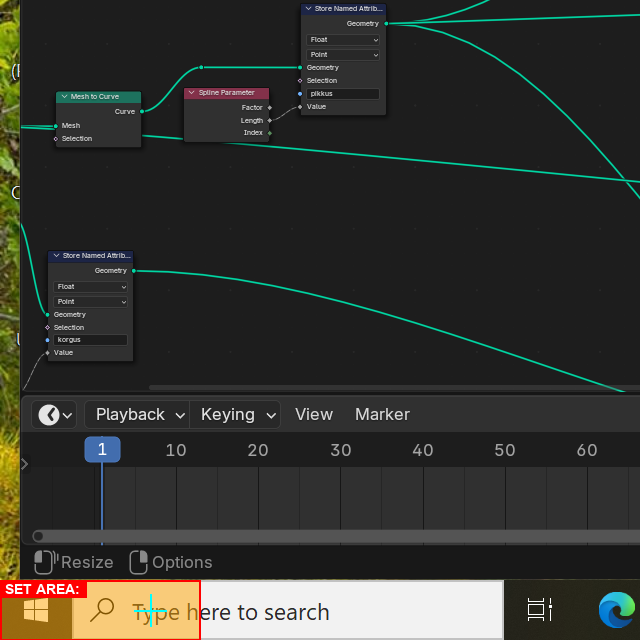

In [9]:
step.render_preview()

In [15]:
if step.found_locations:
    pyautogui.click(step.found_locations[0]['mouse_offset'])
    pyautogui.typewrite("Calculator")
    pyautogui.hotkey('enter')
    time.sleep(1)
    pyautogui.typewrite('5')
    pyautogui.hotkey('add')
    pyautogui.typewrite('11')
    pyautogui.hotkey('enter')
    time.sleep(1)
    pyautogui.hotkey('ctrl','c')
    pyautogui.hotkey('alt','f4')
    print("TEST output")
    print("calc_answer = "+pyperclip.paste())

TEST output
calc_answer = 16
